# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](img/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dogImages`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [5]:
import numpy as np
from glob import glob

# download dataset for dog images
!wget https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
!unzip dogImages
!rm -rf dogImages.zip

# download dataset for human images
!wget https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip
!unzip lfw
!rm -rf lfw.zip

# load filenames for human and dog images
human_files = np.array(glob("lfw/*/*"))
dog_files = np.array(glob("dogImages/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

--2020-07-05 17:29:22--  https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 52.219.120.8
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|52.219.120.8|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1132023110 (1.1G) [application/zip]
Saving to: ‘dogImages.zip’

dogImages.zip       100%[===================>]   1.05G  27.8MB/s    in 45s     

2020-07-05 17:30:07 (24.1 MB/s) - ‘dogImages.zip’ saved [1132023110/1132023110]

Archive:  dogImages.zip
   creating: dogImages/
   creating: dogImages/test/
   creating: dogImages/train/
   creating: dogImages/valid/
   creating: dogImages/test/001.Affenpinscher/
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00003.jpg  
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00023.jpg  
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00036.jpg  
  inflating: dogImages/test/001.Affe

  inflating: dogImages/test/014.Basenji/Basenji_00959.jpg  
  inflating: dogImages/test/014.Basenji/Basenji_00961.jpg  
  inflating: dogImages/test/014.Basenji/Basenji_00974.jpg  
  inflating: dogImages/test/014.Basenji/Basenji_00978.jpg  
  inflating: dogImages/test/014.Basenji/Basenji_00985.jpg  
  inflating: dogImages/test/014.Basenji/Basenji_00987.jpg  
  inflating: dogImages/test/014.Basenji/Basenji_01009.jpg  
  inflating: dogImages/test/014.Basenji/Basenji_01029.jpg  
   creating: dogImages/test/015.Basset_hound/
  inflating: dogImages/test/015.Basset_hound/Basset_hound_01034.jpg  
  inflating: dogImages/test/015.Basset_hound/Basset_hound_01044.jpg  
  inflating: dogImages/test/015.Basset_hound/Basset_hound_01059.jpg  
  inflating: dogImages/test/015.Basset_hound/Basset_hound_01067.jpg  
  inflating: dogImages/test/015.Basset_hound/Basset_hound_01071.jpg  
  inflating: dogImages/test/015.Basset_hound/Basset_hound_01080.jpg  
  inflating: dogImages/test/015.Basset_hound/Basset_ho

  inflating: dogImages/test/029.Border_collie/Border_collie_02035.jpg  
  inflating: dogImages/test/029.Border_collie/Border_collie_02039.jpg  
  inflating: dogImages/test/029.Border_collie/Border_collie_02051.jpg  
  inflating: dogImages/test/029.Border_collie/Border_collie_02053.jpg  
  inflating: dogImages/test/029.Border_collie/Border_collie_02056.jpg  
  inflating: dogImages/test/029.Border_collie/Border_collie_02077.jpg  
  inflating: dogImages/test/029.Border_collie/Border_collie_02081.jpg  
   creating: dogImages/test/030.Border_terrier/
  inflating: dogImages/test/030.Border_terrier/Border_terrier_02090.jpg  
  inflating: dogImages/test/030.Border_terrier/Border_terrier_02096.jpg  
  inflating: dogImages/test/030.Border_terrier/Border_terrier_02097.jpg  
  inflating: dogImages/test/030.Border_terrier/Border_terrier_02110.jpg  
  inflating: dogImages/test/030.Border_terrier/Border_terrier_02136.jpg  
  inflating: dogImages/test/030.Border_terrier/Border_terrier_02141.jpg  
  in

  inflating: dogImages/test/047.Chesapeake_bay_retriever/Chesapeake_bay_retriever_03358.jpg  
  inflating: dogImages/test/047.Chesapeake_bay_retriever/Chesapeake_bay_retriever_03361.jpg  
  inflating: dogImages/test/047.Chesapeake_bay_retriever/Chesapeake_bay_retriever_03374.jpg  
  inflating: dogImages/test/047.Chesapeake_bay_retriever/Chesapeake_bay_retriever_03386.jpg  
  inflating: dogImages/test/047.Chesapeake_bay_retriever/Chesapeake_bay_retriever_03390.jpg  
  inflating: dogImages/test/047.Chesapeake_bay_retriever/Chesapeake_bay_retriever_03395.jpg  
   creating: dogImages/test/048.Chihuahua/
  inflating: dogImages/test/048.Chihuahua/Chihuahua_03403.jpg  
  inflating: dogImages/test/048.Chihuahua/Chihuahua_03405.jpg  
  inflating: dogImages/test/048.Chihuahua/Chihuahua_03411.jpg  
  inflating: dogImages/test/048.Chihuahua/Chihuahua_03420.jpg  
  inflating: dogImages/test/048.Chihuahua/Chihuahua_03427.jpg  
  inflating: dogImages/test/048.Chihuahua/Chihuahua_03448.jpg  
  inflati

  inflating: dogImages/test/061.English_cocker_spaniel/English_cocker_spaniel_04354.jpg  
  inflating: dogImages/test/061.English_cocker_spaniel/English_cocker_spaniel_04359.jpg  
   creating: dogImages/test/062.English_setter/
  inflating: dogImages/test/062.English_setter/English_setter_04379.jpg  
  inflating: dogImages/test/062.English_setter/English_setter_04385.jpg  
  inflating: dogImages/test/062.English_setter/English_setter_04398.jpg  
  inflating: dogImages/test/062.English_setter/English_setter_04399.jpg  
  inflating: dogImages/test/062.English_setter/English_setter_04412.jpg  
  inflating: dogImages/test/062.English_setter/English_setter_04429.jpg  
   creating: dogImages/test/063.English_springer_spaniel/
  inflating: dogImages/test/063.English_springer_spaniel/English_springer_spaniel_04440.jpg  
  inflating: dogImages/test/063.English_springer_spaniel/English_springer_spaniel_04446.jpg  
  inflating: dogImages/test/063.English_springer_spaniel/English_springer_spaniel_

  inflating: dogImages/test/076.Golden_retriever/Golden_retriever_05258.jpg  
   creating: dogImages/test/077.Gordon_setter/
  inflating: dogImages/test/077.Gordon_setter/Gordon_setter_05265.jpg  
  inflating: dogImages/test/077.Gordon_setter/Gordon_setter_05274.jpg  
  inflating: dogImages/test/077.Gordon_setter/Gordon_setter_05280.jpg  
  inflating: dogImages/test/077.Gordon_setter/Gordon_setter_05310.jpg  
  inflating: dogImages/test/077.Gordon_setter/Gordon_setter_05312.jpg  
   creating: dogImages/test/078.Great_dane/
  inflating: dogImages/test/078.Great_dane/Great_dane_05322.jpg  
  inflating: dogImages/test/078.Great_dane/Great_dane_05323.jpg  
  inflating: dogImages/test/078.Great_dane/Great_dane_05326.jpg  
  inflating: dogImages/test/078.Great_dane/Great_dane_05329.jpg  
  inflating: dogImages/test/078.Great_dane/Great_dane_05363.jpg  
   creating: dogImages/test/079.Great_pyrenees/
  inflating: dogImages/test/079.Great_pyrenees/Great_pyrenees_05365.jpg  
  inflating: dogIma

  inflating: dogImages/test/096.Labrador_retriever/Labrador_retriever_06472.jpg  
  inflating: dogImages/test/096.Labrador_retriever/Labrador_retriever_06478.jpg  
   creating: dogImages/test/097.Lakeland_terrier/
  inflating: dogImages/test/097.Lakeland_terrier/Lakeland_terrier_06517.jpg  
  inflating: dogImages/test/097.Lakeland_terrier/Lakeland_terrier_06518.jpg  
  inflating: dogImages/test/097.Lakeland_terrier/Lakeland_terrier_06528.jpg  
  inflating: dogImages/test/097.Lakeland_terrier/Lakeland_terrier_06539.jpg  
  inflating: dogImages/test/097.Lakeland_terrier/Lakeland_terrier_06550.jpg  
  inflating: dogImages/test/097.Lakeland_terrier/Lakeland_terrier_06558.jpg  
   creating: dogImages/test/098.Leonberger/
  inflating: dogImages/test/098.Leonberger/Leonberger_06566.jpg  
  inflating: dogImages/test/098.Leonberger/Leonberger_06576.jpg  
  inflating: dogImages/test/098.Leonberger/Leonberger_06578.jpg  
  inflating: dogImages/test/098.Leonberger/Leonberger_06609.jpg  
  inflatin

  inflating: dogImages/test/116.Parson_russell_terrier/Parson_russell_terrier_07539.jpg  
  inflating: dogImages/test/116.Parson_russell_terrier/Parson_russell_terrier_07549.jpg  
   creating: dogImages/test/117.Pekingese/
  inflating: dogImages/test/117.Pekingese/Pekingese_07558.jpg  
  inflating: dogImages/test/117.Pekingese/Pekingese_07568.jpg  
  inflating: dogImages/test/117.Pekingese/Pekingese_07581.jpg  
  inflating: dogImages/test/117.Pekingese/Pekingese_07582.jpg  
  inflating: dogImages/test/117.Pekingese/Pekingese_07585.jpg  
  inflating: dogImages/test/117.Pekingese/Pekingese_07594.jpg  
   creating: dogImages/test/118.Pembroke_welsh_corgi/
  inflating: dogImages/test/118.Pembroke_welsh_corgi/Pembroke_welsh_corgi_07619.jpg  
  inflating: dogImages/test/118.Pembroke_welsh_corgi/Pembroke_welsh_corgi_07622.jpg  
  inflating: dogImages/test/118.Pembroke_welsh_corgi/Pembroke_welsh_corgi_07625.jpg  
  inflating: dogImages/test/118.Pembroke_welsh_corgi/Pembroke_welsh_corgi_07652.j

  inflating: dogImages/train/001.Affenpinscher/Affenpinscher_00073.jpg  
  inflating: dogImages/train/001.Affenpinscher/Affenpinscher_00075.jpg  
  inflating: dogImages/train/001.Affenpinscher/Affenpinscher_00076.jpg  
  inflating: dogImages/train/001.Affenpinscher/Affenpinscher_00077.jpg  
  inflating: dogImages/train/001.Affenpinscher/Affenpinscher_00079.jpg  
  inflating: dogImages/train/001.Affenpinscher/Affenpinscher_00080.jpg  
   creating: dogImages/train/002.Afghan_hound/
  inflating: dogImages/train/002.Afghan_hound/Afghan_hound_00081.jpg  
  inflating: dogImages/train/002.Afghan_hound/Afghan_hound_00082.jpg  
  inflating: dogImages/train/002.Afghan_hound/Afghan_hound_00083.jpg  
  inflating: dogImages/train/002.Afghan_hound/Afghan_hound_00084.jpg  
  inflating: dogImages/train/002.Afghan_hound/Afghan_hound_00085.jpg  
  inflating: dogImages/train/002.Afghan_hound/Afghan_hound_00086.jpg  
  inflating: dogImages/train/002.Afghan_hound/Afghan_hound_00087.jpg  
  inflating: dogIm

  inflating: dogImages/train/003.Airedale_terrier/Airedale_terrier_00218.jpg  
   creating: dogImages/train/004.Akita/
  inflating: dogImages/train/004.Akita/Akita_00220.jpg  
  inflating: dogImages/train/004.Akita/Akita_00221.jpg  
  inflating: dogImages/train/004.Akita/Akita_00222.jpg  
  inflating: dogImages/train/004.Akita/Akita_00223.jpg  
  inflating: dogImages/train/004.Akita/Akita_00224.jpg  
  inflating: dogImages/train/004.Akita/Akita_00225.jpg  
  inflating: dogImages/train/004.Akita/Akita_00226.jpg  
  inflating: dogImages/train/004.Akita/Akita_00228.jpg  
  inflating: dogImages/train/004.Akita/Akita_00229.jpg  
  inflating: dogImages/train/004.Akita/Akita_00230.jpg  
  inflating: dogImages/train/004.Akita/Akita_00231.jpg  
  inflating: dogImages/train/004.Akita/Akita_00232.jpg  
  inflating: dogImages/train/004.Akita/Akita_00233.jpg  
  inflating: dogImages/train/004.Akita/Akita_00234.jpg  
  inflating: dogImages/train/004.Akita/Akita_00236.jpg  
  inflating: dogImages/tra

  inflating: dogImages/train/005.Alaskan_malamute/Alaskan_malamute_00366.jpg  
  inflating: dogImages/train/005.Alaskan_malamute/Alaskan_malamute_00367.jpg  
  inflating: dogImages/train/005.Alaskan_malamute/Alaskan_malamute_00368.jpg  
  inflating: dogImages/train/005.Alaskan_malamute/Alaskan_malamute_00370.jpg  
  inflating: dogImages/train/005.Alaskan_malamute/Alaskan_malamute_00372.jpg  
  inflating: dogImages/train/005.Alaskan_malamute/Alaskan_malamute_00373.jpg  
  inflating: dogImages/train/005.Alaskan_malamute/Alaskan_malamute_00374.jpg  
  inflating: dogImages/train/005.Alaskan_malamute/Alaskan_malamute_00376.jpg  
  inflating: dogImages/train/005.Alaskan_malamute/Alaskan_malamute_00377.jpg  
  inflating: dogImages/train/005.Alaskan_malamute/Alaskan_malamute_00378.jpg  
  inflating: dogImages/train/005.Alaskan_malamute/Alaskan_malamute_00379.jpg  
  inflating: dogImages/train/005.Alaskan_malamute/Alaskan_malamute_00380.jpg  
  inflating: dogImages/train/005.Alaskan_malamute/Al

  inflating: dogImages/train/007.American_foxhound/American_foxhound_00503.jpg  
  inflating: dogImages/train/007.American_foxhound/American_foxhound_00504.jpg  
  inflating: dogImages/train/007.American_foxhound/American_foxhound_00506.jpg  
  inflating: dogImages/train/007.American_foxhound/American_foxhound_00507.jpg  
  inflating: dogImages/train/007.American_foxhound/American_foxhound_00508.jpg  
  inflating: dogImages/train/007.American_foxhound/American_foxhound_00509.jpg  
  inflating: dogImages/train/007.American_foxhound/American_foxhound_00510.jpg  
  inflating: dogImages/train/007.American_foxhound/American_foxhound_00511.jpg  
  inflating: dogImages/train/007.American_foxhound/American_foxhound_00513.jpg  
  inflating: dogImages/train/007.American_foxhound/American_foxhound_00514.jpg  
  inflating: dogImages/train/007.American_foxhound/American_foxhound_00515.jpg  
  inflating: dogImages/train/007.American_foxhound/American_foxhound_00516.jpg  
  inflating: dogImages/train

  inflating: dogImages/train/009.American_water_spaniel/American_water_spaniel_00621.jpg  
  inflating: dogImages/train/009.American_water_spaniel/American_water_spaniel_00622.jpg  
  inflating: dogImages/train/009.American_water_spaniel/American_water_spaniel_00623.jpg  
  inflating: dogImages/train/009.American_water_spaniel/American_water_spaniel_00625.jpg  
  inflating: dogImages/train/009.American_water_spaniel/American_water_spaniel_00626.jpg  
  inflating: dogImages/train/009.American_water_spaniel/American_water_spaniel_00627.jpg  
  inflating: dogImages/train/009.American_water_spaniel/American_water_spaniel_00628.jpg  
  inflating: dogImages/train/009.American_water_spaniel/American_water_spaniel_00629.jpg  
  inflating: dogImages/train/009.American_water_spaniel/American_water_spaniel_00630.jpg  
  inflating: dogImages/train/009.American_water_spaniel/American_water_spaniel_00632.jpg  
  inflating: dogImages/train/009.American_water_spaniel/American_water_spaniel_00634.jpg  

  inflating: dogImages/train/011.Australian_cattle_dog/Australian_cattle_dog_00764.jpg  
  inflating: dogImages/train/011.Australian_cattle_dog/Australian_cattle_dog_00765.jpg  
  inflating: dogImages/train/011.Australian_cattle_dog/Australian_cattle_dog_00766.jpg  
  inflating: dogImages/train/011.Australian_cattle_dog/Australian_cattle_dog_00768.jpg  
  inflating: dogImages/train/011.Australian_cattle_dog/Australian_cattle_dog_00769.jpg  
  inflating: dogImages/train/011.Australian_cattle_dog/Australian_cattle_dog_00770.jpg  
  inflating: dogImages/train/011.Australian_cattle_dog/Australian_cattle_dog_00771.jpg  
  inflating: dogImages/train/011.Australian_cattle_dog/Australian_cattle_dog_00772.jpg  
  inflating: dogImages/train/011.Australian_cattle_dog/Australian_cattle_dog_00773.jpg  
  inflating: dogImages/train/011.Australian_cattle_dog/Australian_cattle_dog_00774.jpg  
  inflating: dogImages/train/011.Australian_cattle_dog/Australian_cattle_dog_00775.jpg  
  inflating: dogImage

   creating: dogImages/train/013.Australian_terrier/
  inflating: dogImages/train/013.Australian_terrier/Australian_terrier_00889.jpg  
  inflating: dogImages/train/013.Australian_terrier/Australian_terrier_00890.jpg  
  inflating: dogImages/train/013.Australian_terrier/Australian_terrier_00891.jpg  
  inflating: dogImages/train/013.Australian_terrier/Australian_terrier_00892.jpg  
  inflating: dogImages/train/013.Australian_terrier/Australian_terrier_00894.jpg  
  inflating: dogImages/train/013.Australian_terrier/Australian_terrier_00895.jpg  
  inflating: dogImages/train/013.Australian_terrier/Australian_terrier_00898.jpg  
  inflating: dogImages/train/013.Australian_terrier/Australian_terrier_00899.jpg  
  inflating: dogImages/train/013.Australian_terrier/Australian_terrier_00901.jpg  
  inflating: dogImages/train/013.Australian_terrier/Australian_terrier_00902.jpg  
  inflating: dogImages/train/013.Australian_terrier/Australian_terrier_00903.jpg  
  inflating: dogImages/train/013.A

  inflating: dogImages/train/015.Basset_hound/Basset_hound_01039.jpg  
  inflating: dogImages/train/015.Basset_hound/Basset_hound_01040.jpg  
  inflating: dogImages/train/015.Basset_hound/Basset_hound_01041.jpg  
  inflating: dogImages/train/015.Basset_hound/Basset_hound_01042.jpg  
  inflating: dogImages/train/015.Basset_hound/Basset_hound_01043.jpg  
  inflating: dogImages/train/015.Basset_hound/Basset_hound_01045.jpg  
  inflating: dogImages/train/015.Basset_hound/Basset_hound_01046.jpg  
  inflating: dogImages/train/015.Basset_hound/Basset_hound_01047.jpg  
  inflating: dogImages/train/015.Basset_hound/Basset_hound_01048.jpg  
  inflating: dogImages/train/015.Basset_hound/Basset_hound_01049.jpg  
  inflating: dogImages/train/015.Basset_hound/Basset_hound_01050.jpg  
  inflating: dogImages/train/015.Basset_hound/Basset_hound_01051.jpg  
  inflating: dogImages/train/015.Basset_hound/Basset_hound_01052.jpg  
  inflating: dogImages/train/015.Basset_hound/Basset_hound_01054.jpg  
  infl

  inflating: dogImages/train/016.Beagle/Beagle_01194.jpg  
  inflating: dogImages/train/016.Beagle/Beagle_01195.jpg  
  inflating: dogImages/train/016.Beagle/Beagle_01198.jpg  
   creating: dogImages/train/017.Bearded_collie/
  inflating: dogImages/train/017.Bearded_collie/Bearded_collie_01199.jpg  
  inflating: dogImages/train/017.Bearded_collie/Bearded_collie_01200.jpg  
  inflating: dogImages/train/017.Bearded_collie/Bearded_collie_01201.jpg  
  inflating: dogImages/train/017.Bearded_collie/Bearded_collie_01202.jpg  
  inflating: dogImages/train/017.Bearded_collie/Bearded_collie_01203.jpg  
  inflating: dogImages/train/017.Bearded_collie/Bearded_collie_01204.jpg  
  inflating: dogImages/train/017.Bearded_collie/Bearded_collie_01206.jpg  
  inflating: dogImages/train/017.Bearded_collie/Bearded_collie_01207.jpg  
  inflating: dogImages/train/017.Bearded_collie/Bearded_collie_01208.jpg  
  inflating: dogImages/train/017.Bearded_collie/Bearded_collie_01209.jpg  
  inflating: dogImages/t

  inflating: dogImages/train/019.Bedlington_terrier/Bedlington_terrier_01380.jpg  
  inflating: dogImages/train/019.Bedlington_terrier/Bedlington_terrier_01382.jpg  
  inflating: dogImages/train/019.Bedlington_terrier/Bedlington_terrier_01383.jpg  
  inflating: dogImages/train/019.Bedlington_terrier/Bedlington_terrier_01384.jpg  
  inflating: dogImages/train/019.Bedlington_terrier/Bedlington_terrier_01385.jpg  
  inflating: dogImages/train/019.Bedlington_terrier/Bedlington_terrier_01386.jpg  
  inflating: dogImages/train/019.Bedlington_terrier/Bedlington_terrier_01387.jpg  
  inflating: dogImages/train/019.Bedlington_terrier/Bedlington_terrier_01388.jpg  
  inflating: dogImages/train/019.Bedlington_terrier/Bedlington_terrier_01389.jpg  
  inflating: dogImages/train/019.Bedlington_terrier/Bedlington_terrier_01390.jpg  
  inflating: dogImages/train/019.Bedlington_terrier/Bedlington_terrier_01391.jpg  
  inflating: dogImages/train/019.Bedlington_terrier/Bedlington_terrier_01393.jpg  
  in

  inflating: dogImages/train/022.Belgian_tervuren/Belgian_tervuren_01560.jpg  
  inflating: dogImages/train/022.Belgian_tervuren/Belgian_tervuren_01562.jpg  
  inflating: dogImages/train/022.Belgian_tervuren/Belgian_tervuren_01563.jpg  
  inflating: dogImages/train/022.Belgian_tervuren/Belgian_tervuren_01564.jpg  
  inflating: dogImages/train/022.Belgian_tervuren/Belgian_tervuren_01565.jpg  
  inflating: dogImages/train/022.Belgian_tervuren/Belgian_tervuren_01566.jpg  
  inflating: dogImages/train/022.Belgian_tervuren/Belgian_tervuren_01567.jpg  
  inflating: dogImages/train/022.Belgian_tervuren/Belgian_tervuren_01568.jpg  
  inflating: dogImages/train/022.Belgian_tervuren/Belgian_tervuren_01569.jpg  
  inflating: dogImages/train/022.Belgian_tervuren/Belgian_tervuren_01570.jpg  
  inflating: dogImages/train/022.Belgian_tervuren/Belgian_tervuren_01572.jpg  
  inflating: dogImages/train/022.Belgian_tervuren/Belgian_tervuren_01573.jpg  
  inflating: dogImages/train/022.Belgian_tervuren/Be

  inflating: dogImages/train/024.Bichon_frise/Bichon_frise_01709.jpg  
  inflating: dogImages/train/024.Bichon_frise/Bichon_frise_01711.jpg  
  inflating: dogImages/train/024.Bichon_frise/Bichon_frise_01712.jpg  
  inflating: dogImages/train/024.Bichon_frise/Bichon_frise_01713.jpg  
  inflating: dogImages/train/024.Bichon_frise/Bichon_frise_01714.jpg  
  inflating: dogImages/train/024.Bichon_frise/Bichon_frise_01715.jpg  
  inflating: dogImages/train/024.Bichon_frise/Bichon_frise_01716.jpg  
  inflating: dogImages/train/024.Bichon_frise/Bichon_frise_01717.jpg  
  inflating: dogImages/train/024.Bichon_frise/Bichon_frise_01718.jpg  
  inflating: dogImages/train/024.Bichon_frise/Bichon_frise_01720.jpg  
  inflating: dogImages/train/024.Bichon_frise/Bichon_frise_01721.jpg  
  inflating: dogImages/train/024.Bichon_frise/Bichon_frise_01722.jpg  
  inflating: dogImages/train/024.Bichon_frise/Bichon_frise_01723.jpg  
  inflating: dogImages/train/024.Bichon_frise/Bichon_frise_01724.jpg  
  infl

  inflating: dogImages/train/026.Black_russian_terrier/Black_russian_terrier_01863.jpg  
  inflating: dogImages/train/026.Black_russian_terrier/Black_russian_terrier_01864.jpg  
  inflating: dogImages/train/026.Black_russian_terrier/Black_russian_terrier_01865.jpg  
  inflating: dogImages/train/026.Black_russian_terrier/Black_russian_terrier_01866.jpg  
  inflating: dogImages/train/026.Black_russian_terrier/Black_russian_terrier_01867.jpg  
  inflating: dogImages/train/026.Black_russian_terrier/Black_russian_terrier_01869.jpg  
  inflating: dogImages/train/026.Black_russian_terrier/Black_russian_terrier_01870.jpg  
   creating: dogImages/train/027.Bloodhound/
  inflating: dogImages/train/027.Bloodhound/Bloodhound_01872.jpg  
  inflating: dogImages/train/027.Bloodhound/Bloodhound_01873.jpg  
  inflating: dogImages/train/027.Bloodhound/Bloodhound_01875.jpg  
  inflating: dogImages/train/027.Bloodhound/Bloodhound_01876.jpg  
  inflating: dogImages/train/027.Bloodhound/Bloodhound_01877.jpg

  inflating: dogImages/train/029.Border_collie/Border_collie_02018.jpg  
  inflating: dogImages/train/029.Border_collie/Border_collie_02019.jpg  
  inflating: dogImages/train/029.Border_collie/Border_collie_02020.jpg  
  inflating: dogImages/train/029.Border_collie/Border_collie_02021.jpg  
  inflating: dogImages/train/029.Border_collie/Border_collie_02022.jpg  
  inflating: dogImages/train/029.Border_collie/Border_collie_02023.jpg  
  inflating: dogImages/train/029.Border_collie/Border_collie_02024.jpg  
  inflating: dogImages/train/029.Border_collie/Border_collie_02025.jpg  
  inflating: dogImages/train/029.Border_collie/Border_collie_02026.jpg  
  inflating: dogImages/train/029.Border_collie/Border_collie_02027.jpg  
  inflating: dogImages/train/029.Border_collie/Border_collie_02028.jpg  
  inflating: dogImages/train/029.Border_collie/Border_collie_02029.jpg  
  inflating: dogImages/train/029.Border_collie/Border_collie_02031.jpg  
  inflating: dogImages/train/029.Border_collie/Bord

  inflating: dogImages/train/031.Borzoi/Borzoi_02184.jpg  
  inflating: dogImages/train/031.Borzoi/Borzoi_02185.jpg  
  inflating: dogImages/train/031.Borzoi/Borzoi_02186.jpg  
  inflating: dogImages/train/031.Borzoi/Borzoi_02187.jpg  
  inflating: dogImages/train/031.Borzoi/Borzoi_02188.jpg  
  inflating: dogImages/train/031.Borzoi/Borzoi_02189.jpg  
  inflating: dogImages/train/031.Borzoi/Borzoi_02190.jpg  
  inflating: dogImages/train/031.Borzoi/Borzoi_02191.jpg  
  inflating: dogImages/train/031.Borzoi/Borzoi_02192.jpg  
  inflating: dogImages/train/031.Borzoi/Borzoi_02194.jpg  
  inflating: dogImages/train/031.Borzoi/Borzoi_02195.jpg  
  inflating: dogImages/train/031.Borzoi/Borzoi_02196.jpg  
  inflating: dogImages/train/031.Borzoi/Borzoi_02197.jpg  
  inflating: dogImages/train/031.Borzoi/Borzoi_02198.jpg  
  inflating: dogImages/train/031.Borzoi/Borzoi_02199.jpg  
  inflating: dogImages/train/031.Borzoi/Borzoi_02200.jpg  
  inflating: dogImages/train/031.Borzoi/Borzoi_02201.jpg

  inflating: dogImages/train/034.Boxer/Boxer_02380.jpg  
  inflating: dogImages/train/034.Boxer/Boxer_02382.jpg  
  inflating: dogImages/train/034.Boxer/Boxer_02383.jpg  
  inflating: dogImages/train/034.Boxer/Boxer_02385.jpg  
  inflating: dogImages/train/034.Boxer/Boxer_02386.jpg  
  inflating: dogImages/train/034.Boxer/Boxer_02387.jpg  
  inflating: dogImages/train/034.Boxer/Boxer_02388.jpg  
  inflating: dogImages/train/034.Boxer/Boxer_02389.jpg  
  inflating: dogImages/train/034.Boxer/Boxer_02390.jpg  
  inflating: dogImages/train/034.Boxer/Boxer_02391.jpg  
  inflating: dogImages/train/034.Boxer/Boxer_02393.jpg  
  inflating: dogImages/train/034.Boxer/Boxer_02394.jpg  
  inflating: dogImages/train/034.Boxer/Boxer_02395.jpg  
  inflating: dogImages/train/034.Boxer/Boxer_02396.jpg  
  inflating: dogImages/train/034.Boxer/Boxer_02398.jpg  
  inflating: dogImages/train/034.Boxer/Boxer_02399.jpg  
  inflating: dogImages/train/034.Boxer/Boxer_02400.jpg  
  inflating: dogImages/train/03

  inflating: dogImages/train/036.Briard/Briard_02548.jpg  
  inflating: dogImages/train/036.Briard/Briard_02549.jpg  
  inflating: dogImages/train/036.Briard/Briard_02550.jpg  
  inflating: dogImages/train/036.Briard/Briard_02551.jpg  
  inflating: dogImages/train/036.Briard/Briard_02552.jpg  
  inflating: dogImages/train/036.Briard/Briard_02553.jpg  
  inflating: dogImages/train/036.Briard/Briard_02554.jpg  
  inflating: dogImages/train/036.Briard/Briard_02555.jpg  
  inflating: dogImages/train/036.Briard/Briard_02557.jpg  
  inflating: dogImages/train/036.Briard/Briard_02559.jpg  
  inflating: dogImages/train/036.Briard/Briard_02561.jpg  
  inflating: dogImages/train/036.Briard/Briard_02562.jpg  
  inflating: dogImages/train/036.Briard/Briard_02563.jpg  
  inflating: dogImages/train/036.Briard/Briard_02564.jpg  
  inflating: dogImages/train/036.Briard/Briard_02565.jpg  
  inflating: dogImages/train/036.Briard/Briard_02566.jpg  
  inflating: dogImages/train/036.Briard/Briard_02567.jpg

  inflating: dogImages/train/038.Brussels_griffon/Brussels_griffon_02694.jpg  
  inflating: dogImages/train/038.Brussels_griffon/Brussels_griffon_02696.jpg  
  inflating: dogImages/train/038.Brussels_griffon/Brussels_griffon_02698.jpg  
  inflating: dogImages/train/038.Brussels_griffon/Brussels_griffon_02700.jpg  
  inflating: dogImages/train/038.Brussels_griffon/Brussels_griffon_02702.jpg  
  inflating: dogImages/train/038.Brussels_griffon/Brussels_griffon_02704.jpg  
  inflating: dogImages/train/038.Brussels_griffon/Brussels_griffon_02705.jpg  
  inflating: dogImages/train/038.Brussels_griffon/Brussels_griffon_02706.jpg  
  inflating: dogImages/train/038.Brussels_griffon/Brussels_griffon_02708.jpg  
  inflating: dogImages/train/038.Brussels_griffon/Brussels_griffon_02709.jpg  
  inflating: dogImages/train/038.Brussels_griffon/Brussels_griffon_02710.jpg  
  inflating: dogImages/train/038.Brussels_griffon/Brussels_griffon_02711.jpg  
  inflating: dogImages/train/038.Brussels_griffon/Br

  inflating: dogImages/train/040.Bulldog/Bulldog_02865.jpg  
  inflating: dogImages/train/040.Bulldog/Bulldog_02866.jpg  
  inflating: dogImages/train/040.Bulldog/Bulldog_02867.jpg  
  inflating: dogImages/train/040.Bulldog/Bulldog_02868.jpg  
  inflating: dogImages/train/040.Bulldog/Bulldog_02869.jpg  
  inflating: dogImages/train/040.Bulldog/Bulldog_02870.jpg  
  inflating: dogImages/train/040.Bulldog/Bulldog_02871.jpg  
   creating: dogImages/train/041.Bullmastiff/
  inflating: dogImages/train/041.Bullmastiff/Bullmastiff_02873.jpg  
  inflating: dogImages/train/041.Bullmastiff/Bullmastiff_02874.jpg  
  inflating: dogImages/train/041.Bullmastiff/Bullmastiff_02877.jpg  
  inflating: dogImages/train/041.Bullmastiff/Bullmastiff_02878.jpg  
  inflating: dogImages/train/041.Bullmastiff/Bullmastiff_02879.jpg  
  inflating: dogImages/train/041.Bullmastiff/Bullmastiff_02882.jpg  
  inflating: dogImages/train/041.Bullmastiff/Bullmastiff_02883.jpg  
  inflating: dogImages/train/041.Bullmastiff

  inflating: dogImages/train/042.Cairn_terrier/Cairn_terrier_03011.jpg  
  inflating: dogImages/train/042.Cairn_terrier/Cairn_terrier_03014.jpg  
  inflating: dogImages/train/042.Cairn_terrier/Cairn_terrier_03015.jpg  
  inflating: dogImages/train/042.Cairn_terrier/Cairn_terrier_03016.jpg  
  inflating: dogImages/train/042.Cairn_terrier/Cairn_terrier_03017.jpg  
  inflating: dogImages/train/042.Cairn_terrier/Cairn_terrier_03018.jpg  
  inflating: dogImages/train/042.Cairn_terrier/Cairn_terrier_03019.jpg  
  inflating: dogImages/train/042.Cairn_terrier/Cairn_terrier_03020.jpg  
  inflating: dogImages/train/042.Cairn_terrier/Cairn_terrier_03021.jpg  
  inflating: dogImages/train/042.Cairn_terrier/Cairn_terrier_03024.jpg  
  inflating: dogImages/train/042.Cairn_terrier/Cairn_terrier_03025.jpg  
  inflating: dogImages/train/042.Cairn_terrier/Cairn_terrier_03026.jpg  
  inflating: dogImages/train/042.Cairn_terrier/Cairn_terrier_03027.jpg  
  inflating: dogImages/train/042.Cairn_terrier/Cair

  inflating: dogImages/train/045.Cardigan_welsh_corgi/Cardigan_welsh_corgi_03208.jpg  
  inflating: dogImages/train/045.Cardigan_welsh_corgi/Cardigan_welsh_corgi_03209.jpg  
  inflating: dogImages/train/045.Cardigan_welsh_corgi/Cardigan_welsh_corgi_03210.jpg  
  inflating: dogImages/train/045.Cardigan_welsh_corgi/Cardigan_welsh_corgi_03211.jpg  
  inflating: dogImages/train/045.Cardigan_welsh_corgi/Cardigan_welsh_corgi_03212.jpg  
  inflating: dogImages/train/045.Cardigan_welsh_corgi/Cardigan_welsh_corgi_03213.jpg  
  inflating: dogImages/train/045.Cardigan_welsh_corgi/Cardigan_welsh_corgi_03214.jpg  
  inflating: dogImages/train/045.Cardigan_welsh_corgi/Cardigan_welsh_corgi_03215.jpg  
  inflating: dogImages/train/045.Cardigan_welsh_corgi/Cardigan_welsh_corgi_03216.jpg  
  inflating: dogImages/train/045.Cardigan_welsh_corgi/Cardigan_welsh_corgi_03217.jpg  
  inflating: dogImages/train/045.Cardigan_welsh_corgi/Cardigan_welsh_corgi_03218.jpg  
  inflating: dogImages/train/045.Cardigan_w

  inflating: dogImages/train/047.Chesapeake_bay_retriever/Chesapeake_bay_retriever_03340.jpg  
  inflating: dogImages/train/047.Chesapeake_bay_retriever/Chesapeake_bay_retriever_03341.jpg  
  inflating: dogImages/train/047.Chesapeake_bay_retriever/Chesapeake_bay_retriever_03342.jpg  
  inflating: dogImages/train/047.Chesapeake_bay_retriever/Chesapeake_bay_retriever_03343.jpg  
  inflating: dogImages/train/047.Chesapeake_bay_retriever/Chesapeake_bay_retriever_03344.jpg  
  inflating: dogImages/train/047.Chesapeake_bay_retriever/Chesapeake_bay_retriever_03345.jpg  
  inflating: dogImages/train/047.Chesapeake_bay_retriever/Chesapeake_bay_retriever_03346.jpg  
  inflating: dogImages/train/047.Chesapeake_bay_retriever/Chesapeake_bay_retriever_03347.jpg  
  inflating: dogImages/train/047.Chesapeake_bay_retriever/Chesapeake_bay_retriever_03348.jpg  
  inflating: dogImages/train/047.Chesapeake_bay_retriever/Chesapeake_bay_retriever_03349.jpg  
  inflating: dogImages/train/047.Chesapeake_bay_re

  inflating: dogImages/train/049.Chinese_crested/Chinese_crested_03469.jpg  
  inflating: dogImages/train/049.Chinese_crested/Chinese_crested_03470.jpg  
  inflating: dogImages/train/049.Chinese_crested/Chinese_crested_03471.jpg  
  inflating: dogImages/train/049.Chinese_crested/Chinese_crested_03472.jpg  
  inflating: dogImages/train/049.Chinese_crested/Chinese_crested_03475.jpg  
  inflating: dogImages/train/049.Chinese_crested/Chinese_crested_03476.jpg  
  inflating: dogImages/train/049.Chinese_crested/Chinese_crested_03477.jpg  
  inflating: dogImages/train/049.Chinese_crested/Chinese_crested_03478.jpg  
  inflating: dogImages/train/049.Chinese_crested/Chinese_crested_03479.jpg  
  inflating: dogImages/train/049.Chinese_crested/Chinese_crested_03480.jpg  
  inflating: dogImages/train/049.Chinese_crested/Chinese_crested_03481.jpg  
  inflating: dogImages/train/049.Chinese_crested/Chinese_crested_03483.jpg  
  inflating: dogImages/train/049.Chinese_crested/Chinese_crested_03485.jpg  

  inflating: dogImages/train/051.Chow_chow/Chow_chow_03617.jpg  
  inflating: dogImages/train/051.Chow_chow/Chow_chow_03618.jpg  
  inflating: dogImages/train/051.Chow_chow/Chow_chow_03619.jpg  
  inflating: dogImages/train/051.Chow_chow/Chow_chow_03620.jpg  
  inflating: dogImages/train/051.Chow_chow/Chow_chow_03621.jpg  
  inflating: dogImages/train/051.Chow_chow/Chow_chow_03622.jpg  
  inflating: dogImages/train/051.Chow_chow/Chow_chow_03623.jpg  
  inflating: dogImages/train/051.Chow_chow/Chow_chow_03625.jpg  
  inflating: dogImages/train/051.Chow_chow/Chow_chow_03626.jpg  
  inflating: dogImages/train/051.Chow_chow/Chow_chow_03627.jpg  
  inflating: dogImages/train/051.Chow_chow/Chow_chow_03630.jpg  
  inflating: dogImages/train/051.Chow_chow/Chow_chow_03631.jpg  
  inflating: dogImages/train/051.Chow_chow/Chow_chow_03632.jpg  
  inflating: dogImages/train/051.Chow_chow/Chow_chow_03633.jpg  
  inflating: dogImages/train/051.Chow_chow/Chow_chow_03634.jpg  
  inflating: dogImages/tr

  inflating: dogImages/train/053.Cocker_spaniel/Cocker_spaniel_03758.jpg  
  inflating: dogImages/train/053.Cocker_spaniel/Cocker_spaniel_03760.jpg  
  inflating: dogImages/train/053.Cocker_spaniel/Cocker_spaniel_03761.jpg  
  inflating: dogImages/train/053.Cocker_spaniel/Cocker_spaniel_03762.jpg  
  inflating: dogImages/train/053.Cocker_spaniel/Cocker_spaniel_03763.jpg  
  inflating: dogImages/train/053.Cocker_spaniel/Cocker_spaniel_03764.jpg  
  inflating: dogImages/train/053.Cocker_spaniel/Cocker_spaniel_03767.jpg  
  inflating: dogImages/train/053.Cocker_spaniel/Cocker_spaniel_03768.jpg  
  inflating: dogImages/train/053.Cocker_spaniel/Cocker_spaniel_03770.jpg  
  inflating: dogImages/train/053.Cocker_spaniel/Cocker_spaniel_03771.jpg  
  inflating: dogImages/train/053.Cocker_spaniel/Cocker_spaniel_03772.jpg  
  inflating: dogImages/train/053.Cocker_spaniel/Cocker_spaniel_03773.jpg  
  inflating: dogImages/train/053.Cocker_spaniel/Cocker_spaniel_03774.jpg  
  inflating: dogImages/tr

  inflating: dogImages/train/056.Dachshund/Dachshund_03956.jpg  
  inflating: dogImages/train/056.Dachshund/Dachshund_03957.jpg  
  inflating: dogImages/train/056.Dachshund/Dachshund_03958.jpg  
  inflating: dogImages/train/056.Dachshund/Dachshund_03959.jpg  
  inflating: dogImages/train/056.Dachshund/Dachshund_03961.jpg  
  inflating: dogImages/train/056.Dachshund/Dachshund_03962.jpg  
  inflating: dogImages/train/056.Dachshund/Dachshund_03963.jpg  
  inflating: dogImages/train/056.Dachshund/Dachshund_03964.jpg  
  inflating: dogImages/train/056.Dachshund/Dachshund_03965.jpg  
  inflating: dogImages/train/056.Dachshund/Dachshund_03968.jpg  
  inflating: dogImages/train/056.Dachshund/Dachshund_03969.jpg  
  inflating: dogImages/train/056.Dachshund/Dachshund_03970.jpg  
  inflating: dogImages/train/056.Dachshund/Dachshund_03971.jpg  
  inflating: dogImages/train/056.Dachshund/Dachshund_03972.jpg  
  inflating: dogImages/train/056.Dachshund/Dachshund_03974.jpg  
  inflating: dogImages/tr

  inflating: dogImages/train/059.Doberman_pinscher/Doberman_pinscher_04163.jpg  
  inflating: dogImages/train/059.Doberman_pinscher/Doberman_pinscher_04164.jpg  
  inflating: dogImages/train/059.Doberman_pinscher/Doberman_pinscher_04166.jpg  
  inflating: dogImages/train/059.Doberman_pinscher/Doberman_pinscher_04167.jpg  
  inflating: dogImages/train/059.Doberman_pinscher/Doberman_pinscher_04168.jpg  
  inflating: dogImages/train/059.Doberman_pinscher/Doberman_pinscher_04170.jpg  
  inflating: dogImages/train/059.Doberman_pinscher/Doberman_pinscher_04171.jpg  
  inflating: dogImages/train/059.Doberman_pinscher/Doberman_pinscher_04172.jpg  
  inflating: dogImages/train/059.Doberman_pinscher/Doberman_pinscher_04173.jpg  
  inflating: dogImages/train/059.Doberman_pinscher/Doberman_pinscher_04174.jpg  
  inflating: dogImages/train/059.Doberman_pinscher/Doberman_pinscher_04175.jpg  
  inflating: dogImages/train/059.Doberman_pinscher/Doberman_pinscher_04176.jpg  
  inflating: dogImages/train

  inflating: dogImages/train/061.English_cocker_spaniel/English_cocker_spaniel_04329.jpg  
  inflating: dogImages/train/061.English_cocker_spaniel/English_cocker_spaniel_04331.jpg  
  inflating: dogImages/train/061.English_cocker_spaniel/English_cocker_spaniel_04332.jpg  
  inflating: dogImages/train/061.English_cocker_spaniel/English_cocker_spaniel_04334.jpg  
  inflating: dogImages/train/061.English_cocker_spaniel/English_cocker_spaniel_04335.jpg  
  inflating: dogImages/train/061.English_cocker_spaniel/English_cocker_spaniel_04336.jpg  
  inflating: dogImages/train/061.English_cocker_spaniel/English_cocker_spaniel_04337.jpg  
  inflating: dogImages/train/061.English_cocker_spaniel/English_cocker_spaniel_04339.jpg  
  inflating: dogImages/train/061.English_cocker_spaniel/English_cocker_spaniel_04340.jpg  
  inflating: dogImages/train/061.English_cocker_spaniel/English_cocker_spaniel_04342.jpg  
  inflating: dogImages/train/061.English_cocker_spaniel/English_cocker_spaniel_04343.jpg  

  inflating: dogImages/train/063.English_springer_spaniel/English_springer_spaniel_04479.jpg  
  inflating: dogImages/train/063.English_springer_spaniel/English_springer_spaniel_04480.jpg  
  inflating: dogImages/train/063.English_springer_spaniel/English_springer_spaniel_04481.jpg  
  inflating: dogImages/train/063.English_springer_spaniel/English_springer_spaniel_04482.jpg  
  inflating: dogImages/train/063.English_springer_spaniel/English_springer_spaniel_04483.jpg  
  inflating: dogImages/train/063.English_springer_spaniel/English_springer_spaniel_04485.jpg  
  inflating: dogImages/train/063.English_springer_spaniel/English_springer_spaniel_04487.jpg  
  inflating: dogImages/train/063.English_springer_spaniel/English_springer_spaniel_04488.jpg  
  inflating: dogImages/train/063.English_springer_spaniel/English_springer_spaniel_04489.jpg  
  inflating: dogImages/train/063.English_springer_spaniel/English_springer_spaniel_04490.jpg  
  inflating: dogImages/train/063.English_springer_

  inflating: dogImages/train/066.Field_spaniel/Field_spaniel_04605.jpg  
  inflating: dogImages/train/066.Field_spaniel/Field_spaniel_04606.jpg  
  inflating: dogImages/train/066.Field_spaniel/Field_spaniel_04607.jpg  
  inflating: dogImages/train/066.Field_spaniel/Field_spaniel_04609.jpg  
  inflating: dogImages/train/066.Field_spaniel/Field_spaniel_04612.jpg  
  inflating: dogImages/train/066.Field_spaniel/Field_spaniel_04613.jpg  
  inflating: dogImages/train/066.Field_spaniel/Field_spaniel_04615.jpg  
  inflating: dogImages/train/066.Field_spaniel/Field_spaniel_04617.jpg  
  inflating: dogImages/train/066.Field_spaniel/Field_spaniel_04618.jpg  
  inflating: dogImages/train/066.Field_spaniel/Field_spaniel_04620.jpg  
  inflating: dogImages/train/066.Field_spaniel/Field_spaniel_04621.jpg  
  inflating: dogImages/train/066.Field_spaniel/Field_spaniel_04623.jpg  
  inflating: dogImages/train/066.Field_spaniel/Field_spaniel_04624.jpg  
  inflating: dogImages/train/066.Field_spaniel/Fiel

  inflating: dogImages/train/069.French_bulldog/French_bulldog_04790.jpg  
  inflating: dogImages/train/069.French_bulldog/French_bulldog_04791.jpg  
  inflating: dogImages/train/069.French_bulldog/French_bulldog_04793.jpg  
  inflating: dogImages/train/069.French_bulldog/French_bulldog_04794.jpg  
  inflating: dogImages/train/069.French_bulldog/French_bulldog_04795.jpg  
  inflating: dogImages/train/069.French_bulldog/French_bulldog_04796.jpg  
  inflating: dogImages/train/069.French_bulldog/French_bulldog_04797.jpg  
  inflating: dogImages/train/069.French_bulldog/French_bulldog_04798.jpg  
  inflating: dogImages/train/069.French_bulldog/French_bulldog_04799.jpg  
  inflating: dogImages/train/069.French_bulldog/French_bulldog_04800.jpg  
  inflating: dogImages/train/069.French_bulldog/French_bulldog_04801.jpg  
  inflating: dogImages/train/069.French_bulldog/French_bulldog_04802.jpg  
  inflating: dogImages/train/069.French_bulldog/French_bulldog_04803.jpg  
  inflating: dogImages/tr

  inflating: dogImages/train/071.German_shepherd_dog/German_shepherd_dog_04946.jpg  
  inflating: dogImages/train/071.German_shepherd_dog/German_shepherd_dog_04948.jpg  
  inflating: dogImages/train/071.German_shepherd_dog/German_shepherd_dog_04949.jpg  
  inflating: dogImages/train/071.German_shepherd_dog/German_shepherd_dog_04950.jpg  
  inflating: dogImages/train/071.German_shepherd_dog/German_shepherd_dog_04951.jpg  
  inflating: dogImages/train/071.German_shepherd_dog/German_shepherd_dog_04952.jpg  
  inflating: dogImages/train/071.German_shepherd_dog/German_shepherd_dog_04953.jpg  
  inflating: dogImages/train/071.German_shepherd_dog/German_shepherd_dog_04954.jpg  
  inflating: dogImages/train/071.German_shepherd_dog/German_shepherd_dog_04956.jpg  
  inflating: dogImages/train/071.German_shepherd_dog/German_shepherd_dog_04957.jpg  
  inflating: dogImages/train/071.German_shepherd_dog/German_shepherd_dog_04958.jpg  
  inflating: dogImages/train/071.German_shepherd_dog/German_sheph

  inflating: dogImages/train/073.German_wirehaired_pointer/German_wirehaired_pointer_05061.jpg  
  inflating: dogImages/train/073.German_wirehaired_pointer/German_wirehaired_pointer_05063.jpg  
  inflating: dogImages/train/073.German_wirehaired_pointer/German_wirehaired_pointer_05065.jpg  
  inflating: dogImages/train/073.German_wirehaired_pointer/German_wirehaired_pointer_05066.jpg  
  inflating: dogImages/train/073.German_wirehaired_pointer/German_wirehaired_pointer_05067.jpg  
  inflating: dogImages/train/073.German_wirehaired_pointer/German_wirehaired_pointer_05068.jpg  
  inflating: dogImages/train/073.German_wirehaired_pointer/German_wirehaired_pointer_05069.jpg  
  inflating: dogImages/train/073.German_wirehaired_pointer/German_wirehaired_pointer_05071.jpg  
  inflating: dogImages/train/073.German_wirehaired_pointer/German_wirehaired_pointer_05072.jpg  
  inflating: dogImages/train/073.German_wirehaired_pointer/German_wirehaired_pointer_05073.jpg  
  inflating: dogImages/train/0

  inflating: dogImages/train/076.Golden_retriever/Golden_retriever_05232.jpg  
  inflating: dogImages/train/076.Golden_retriever/Golden_retriever_05233.jpg  
  inflating: dogImages/train/076.Golden_retriever/Golden_retriever_05235.jpg  
  inflating: dogImages/train/076.Golden_retriever/Golden_retriever_05236.jpg  
  inflating: dogImages/train/076.Golden_retriever/Golden_retriever_05237.jpg  
  inflating: dogImages/train/076.Golden_retriever/Golden_retriever_05238.jpg  
  inflating: dogImages/train/076.Golden_retriever/Golden_retriever_05239.jpg  
  inflating: dogImages/train/076.Golden_retriever/Golden_retriever_05242.jpg  
  inflating: dogImages/train/076.Golden_retriever/Golden_retriever_05243.jpg  
  inflating: dogImages/train/076.Golden_retriever/Golden_retriever_05244.jpg  
  inflating: dogImages/train/076.Golden_retriever/Golden_retriever_05246.jpg  
  inflating: dogImages/train/076.Golden_retriever/Golden_retriever_05247.jpg  
  inflating: dogImages/train/076.Golden_retriever/Go

  inflating: dogImages/train/079.Great_pyrenees/Great_pyrenees_05376.jpg  
  inflating: dogImages/train/079.Great_pyrenees/Great_pyrenees_05377.jpg  
  inflating: dogImages/train/079.Great_pyrenees/Great_pyrenees_05378.jpg  
  inflating: dogImages/train/079.Great_pyrenees/Great_pyrenees_05380.jpg  
  inflating: dogImages/train/079.Great_pyrenees/Great_pyrenees_05381.jpg  
  inflating: dogImages/train/079.Great_pyrenees/Great_pyrenees_05382.jpg  
  inflating: dogImages/train/079.Great_pyrenees/Great_pyrenees_05383.jpg  
  inflating: dogImages/train/079.Great_pyrenees/Great_pyrenees_05384.jpg  
  inflating: dogImages/train/079.Great_pyrenees/Great_pyrenees_05385.jpg  
  inflating: dogImages/train/079.Great_pyrenees/Great_pyrenees_05386.jpg  
  inflating: dogImages/train/079.Great_pyrenees/Great_pyrenees_05387.jpg  
  inflating: dogImages/train/079.Great_pyrenees/Great_pyrenees_05388.jpg  
  inflating: dogImages/train/079.Great_pyrenees/Great_pyrenees_05389.jpg  
  inflating: dogImages/tr

  inflating: dogImages/train/081.Greyhound/Greyhound_05524.jpg  
  inflating: dogImages/train/081.Greyhound/Greyhound_05525.jpg  
  inflating: dogImages/train/081.Greyhound/Greyhound_05527.jpg  
  inflating: dogImages/train/081.Greyhound/Greyhound_05529.jpg  
  inflating: dogImages/train/081.Greyhound/Greyhound_05532.jpg  
  inflating: dogImages/train/081.Greyhound/Greyhound_05533.jpg  
  inflating: dogImages/train/081.Greyhound/Greyhound_05534.jpg  
  inflating: dogImages/train/081.Greyhound/Greyhound_05535.jpg  
  inflating: dogImages/train/081.Greyhound/Greyhound_05536.jpg  
  inflating: dogImages/train/081.Greyhound/Greyhound_05537.jpg  
  inflating: dogImages/train/081.Greyhound/Greyhound_05538.jpg  
  inflating: dogImages/train/081.Greyhound/Greyhound_05540.jpg  
  inflating: dogImages/train/081.Greyhound/Greyhound_05541.jpg  
  inflating: dogImages/train/081.Greyhound/Greyhound_05543.jpg  
  inflating: dogImages/train/081.Greyhound/Greyhound_05544.jpg  
  inflating: dogImages/tr

  inflating: dogImages/train/083.Ibizan_hound/Ibizan_hound_05695.jpg  
  inflating: dogImages/train/083.Ibizan_hound/Ibizan_hound_05696.jpg  
  inflating: dogImages/train/083.Ibizan_hound/Ibizan_hound_05698.jpg  
  inflating: dogImages/train/083.Ibizan_hound/Ibizan_hound_05699.jpg  
   creating: dogImages/train/084.Icelandic_sheepdog/
  inflating: dogImages/train/084.Icelandic_sheepdog/Icelandic_sheepdog_05700.jpg  
  inflating: dogImages/train/084.Icelandic_sheepdog/Icelandic_sheepdog_05702.jpg  
  inflating: dogImages/train/084.Icelandic_sheepdog/Icelandic_sheepdog_05703.jpg  
  inflating: dogImages/train/084.Icelandic_sheepdog/Icelandic_sheepdog_05704.jpg  
  inflating: dogImages/train/084.Icelandic_sheepdog/Icelandic_sheepdog_05705.jpg  
  inflating: dogImages/train/084.Icelandic_sheepdog/Icelandic_sheepdog_05706.jpg  
  inflating: dogImages/train/084.Icelandic_sheepdog/Icelandic_sheepdog_05707.jpg  
  inflating: dogImages/train/084.Icelandic_sheepdog/Icelandic_sheepdog_05708.jpg  

  inflating: dogImages/train/086.Irish_setter/Irish_setter_05813.jpg  
  inflating: dogImages/train/086.Irish_setter/Irish_setter_05814.jpg  
  inflating: dogImages/train/086.Irish_setter/Irish_setter_05815.jpg  
  inflating: dogImages/train/086.Irish_setter/Irish_setter_05817.jpg  
  inflating: dogImages/train/086.Irish_setter/Irish_setter_05820.jpg  
  inflating: dogImages/train/086.Irish_setter/Irish_setter_05821.jpg  
  inflating: dogImages/train/086.Irish_setter/Irish_setter_05822.jpg  
  inflating: dogImages/train/086.Irish_setter/Irish_setter_05823.jpg  
  inflating: dogImages/train/086.Irish_setter/Irish_setter_05824.jpg  
  inflating: dogImages/train/086.Irish_setter/Irish_setter_05825.jpg  
  inflating: dogImages/train/086.Irish_setter/Irish_setter_05828.jpg  
  inflating: dogImages/train/086.Irish_setter/Irish_setter_05829.jpg  
  inflating: dogImages/train/086.Irish_setter/Irish_setter_05830.jpg  
  inflating: dogImages/train/086.Irish_setter/Irish_setter_05831.jpg  
  infl

  inflating: dogImages/train/088.Irish_water_spaniel/Irish_water_spaniel_05997.jpg  
  inflating: dogImages/train/088.Irish_water_spaniel/Irish_water_spaniel_05998.jpg  
  inflating: dogImages/train/088.Irish_water_spaniel/Irish_water_spaniel_05999.jpg  
  inflating: dogImages/train/088.Irish_water_spaniel/Irish_water_spaniel_06000.jpg  
  inflating: dogImages/train/088.Irish_water_spaniel/Irish_water_spaniel_06001.jpg  
  inflating: dogImages/train/088.Irish_water_spaniel/Irish_water_spaniel_06002.jpg  
  inflating: dogImages/train/088.Irish_water_spaniel/Irish_water_spaniel_06003.jpg  
  inflating: dogImages/train/088.Irish_water_spaniel/Irish_water_spaniel_06004.jpg  
  inflating: dogImages/train/088.Irish_water_spaniel/Irish_water_spaniel_06005.jpg  
  inflating: dogImages/train/088.Irish_water_spaniel/Irish_water_spaniel_06006.jpg  
  inflating: dogImages/train/088.Irish_water_spaniel/Irish_water_spaniel_06008.jpg  
  inflating: dogImages/train/088.Irish_water_spaniel/Irish_water_

  inflating: dogImages/train/090.Italian_greyhound/Italian_greyhound_06154.jpg  
  inflating: dogImages/train/090.Italian_greyhound/Italian_greyhound_06155.jpg  
  inflating: dogImages/train/090.Italian_greyhound/Italian_greyhound_06156.jpg  
  inflating: dogImages/train/090.Italian_greyhound/Italian_greyhound_06158.jpg  
   creating: dogImages/train/091.Japanese_chin/
  inflating: dogImages/train/091.Japanese_chin/Japanese_chin_06159.jpg  
  inflating: dogImages/train/091.Japanese_chin/Japanese_chin_06160.jpg  
  inflating: dogImages/train/091.Japanese_chin/Japanese_chin_06161.jpg  
  inflating: dogImages/train/091.Japanese_chin/Japanese_chin_06162.jpg  
  inflating: dogImages/train/091.Japanese_chin/Japanese_chin_06163.jpg  
  inflating: dogImages/train/091.Japanese_chin/Japanese_chin_06165.jpg  
  inflating: dogImages/train/091.Japanese_chin/Japanese_chin_06170.jpg  
  inflating: dogImages/train/091.Japanese_chin/Japanese_chin_06171.jpg  
  inflating: dogImages/train/091.Japanese_ch

  inflating: dogImages/train/093.Kerry_blue_terrier/Kerry_blue_terrier_06308.jpg  
  inflating: dogImages/train/093.Kerry_blue_terrier/Kerry_blue_terrier_06311.jpg  
  inflating: dogImages/train/093.Kerry_blue_terrier/Kerry_blue_terrier_06312.jpg  
  inflating: dogImages/train/093.Kerry_blue_terrier/Kerry_blue_terrier_06313.jpg  
  inflating: dogImages/train/093.Kerry_blue_terrier/Kerry_blue_terrier_06314.jpg  
  inflating: dogImages/train/093.Kerry_blue_terrier/Kerry_blue_terrier_06315.jpg  
  inflating: dogImages/train/093.Kerry_blue_terrier/Kerry_blue_terrier_06317.jpg  
  inflating: dogImages/train/093.Kerry_blue_terrier/Kerry_blue_terrier_06318.jpg  
  inflating: dogImages/train/093.Kerry_blue_terrier/Kerry_blue_terrier_06320.jpg  
  inflating: dogImages/train/093.Kerry_blue_terrier/Kerry_blue_terrier_06322.jpg  
  inflating: dogImages/train/093.Kerry_blue_terrier/Kerry_blue_terrier_06323.jpg  
  inflating: dogImages/train/093.Kerry_blue_terrier/Kerry_blue_terrier_06324.jpg  
  in

  inflating: dogImages/train/096.Labrador_retriever/Labrador_retriever_06496.jpg  
  inflating: dogImages/train/096.Labrador_retriever/Labrador_retriever_06497.jpg  
  inflating: dogImages/train/096.Labrador_retriever/Labrador_retriever_06498.jpg  
   creating: dogImages/train/097.Lakeland_terrier/
  inflating: dogImages/train/097.Lakeland_terrier/Lakeland_terrier_06499.jpg  
  inflating: dogImages/train/097.Lakeland_terrier/Lakeland_terrier_06500.jpg  
  inflating: dogImages/train/097.Lakeland_terrier/Lakeland_terrier_06501.jpg  
  inflating: dogImages/train/097.Lakeland_terrier/Lakeland_terrier_06503.jpg  
  inflating: dogImages/train/097.Lakeland_terrier/Lakeland_terrier_06504.jpg  
  inflating: dogImages/train/097.Lakeland_terrier/Lakeland_terrier_06505.jpg  
  inflating: dogImages/train/097.Lakeland_terrier/Lakeland_terrier_06506.jpg  
  inflating: dogImages/train/097.Lakeland_terrier/Lakeland_terrier_06507.jpg  
  inflating: dogImages/train/097.Lakeland_terrier/Lakeland_terrier_0

  inflating: dogImages/train/100.Lowchen/Lowchen_06690.jpg  
  inflating: dogImages/train/100.Lowchen/Lowchen_06691.jpg  
  inflating: dogImages/train/100.Lowchen/Lowchen_06692.jpg  
  inflating: dogImages/train/100.Lowchen/Lowchen_06693.jpg  
  inflating: dogImages/train/100.Lowchen/Lowchen_06695.jpg  
  inflating: dogImages/train/100.Lowchen/Lowchen_06697.jpg  
  inflating: dogImages/train/100.Lowchen/Lowchen_06698.jpg  
  inflating: dogImages/train/100.Lowchen/Lowchen_06700.jpg  
  inflating: dogImages/train/100.Lowchen/Lowchen_06701.jpg  
  inflating: dogImages/train/100.Lowchen/Lowchen_06702.jpg  
  inflating: dogImages/train/100.Lowchen/Lowchen_06703.jpg  
  inflating: dogImages/train/100.Lowchen/Lowchen_06704.jpg  
  inflating: dogImages/train/100.Lowchen/Lowchen_06705.jpg  
  inflating: dogImages/train/100.Lowchen/Lowchen_06706.jpg  
  inflating: dogImages/train/100.Lowchen/Lowchen_06707.jpg  
  inflating: dogImages/train/100.Lowchen/Lowchen_06709.jpg  
  inflating: dogImages/t

  inflating: dogImages/train/103.Mastiff/Mastiff_06870.jpg  
  inflating: dogImages/train/103.Mastiff/Mastiff_06871.jpg  
  inflating: dogImages/train/103.Mastiff/Mastiff_06872.jpg  
  inflating: dogImages/train/103.Mastiff/Mastiff_06874.jpg  
  inflating: dogImages/train/103.Mastiff/Mastiff_06875.jpg  
  inflating: dogImages/train/103.Mastiff/Mastiff_06876.jpg  
  inflating: dogImages/train/103.Mastiff/Mastiff_06877.jpg  
  inflating: dogImages/train/103.Mastiff/Mastiff_06879.jpg  
   creating: dogImages/train/104.Miniature_schnauzer/
  inflating: dogImages/train/104.Miniature_schnauzer/Miniature_schnauzer_06881.jpg  
  inflating: dogImages/train/104.Miniature_schnauzer/Miniature_schnauzer_06882.jpg  
  inflating: dogImages/train/104.Miniature_schnauzer/Miniature_schnauzer_06883.jpg  
  inflating: dogImages/train/104.Miniature_schnauzer/Miniature_schnauzer_06884.jpg  
  inflating: dogImages/train/104.Miniature_schnauzer/Miniature_schnauzer_06885.jpg  
  inflating: dogImages/train/104.

  inflating: dogImages/train/106.Newfoundland/Newfoundland_07014.jpg  
  inflating: dogImages/train/106.Newfoundland/Newfoundland_07016.jpg  
  inflating: dogImages/train/106.Newfoundland/Newfoundland_07017.jpg  
  inflating: dogImages/train/106.Newfoundland/Newfoundland_07018.jpg  
  inflating: dogImages/train/106.Newfoundland/Newfoundland_07019.jpg  
  inflating: dogImages/train/106.Newfoundland/Newfoundland_07021.jpg  
  inflating: dogImages/train/106.Newfoundland/Newfoundland_07022.jpg  
  inflating: dogImages/train/106.Newfoundland/Newfoundland_07023.jpg  
  inflating: dogImages/train/106.Newfoundland/Newfoundland_07024.jpg  
  inflating: dogImages/train/106.Newfoundland/Newfoundland_07025.jpg  
  inflating: dogImages/train/106.Newfoundland/Newfoundland_07026.jpg  
  inflating: dogImages/train/106.Newfoundland/Newfoundland_07027.jpg  
  inflating: dogImages/train/106.Newfoundland/Newfoundland_07028.jpg  
  inflating: dogImages/train/106.Newfoundland/Newfoundland_07030.jpg  
  infl

  inflating: dogImages/train/109.Norwegian_elkhound/Norwegian_elkhound_07174.jpg  
  inflating: dogImages/train/109.Norwegian_elkhound/Norwegian_elkhound_07175.jpg  
  inflating: dogImages/train/109.Norwegian_elkhound/Norwegian_elkhound_07176.jpg  
  inflating: dogImages/train/109.Norwegian_elkhound/Norwegian_elkhound_07177.jpg  
  inflating: dogImages/train/109.Norwegian_elkhound/Norwegian_elkhound_07179.jpg  
  inflating: dogImages/train/109.Norwegian_elkhound/Norwegian_elkhound_07181.jpg  
   creating: dogImages/train/110.Norwegian_lundehund/
  inflating: dogImages/train/110.Norwegian_lundehund/Norwegian_lundehund_07182.jpg  
  inflating: dogImages/train/110.Norwegian_lundehund/Norwegian_lundehund_07184.jpg  
  inflating: dogImages/train/110.Norwegian_lundehund/Norwegian_lundehund_07185.jpg  
  inflating: dogImages/train/110.Norwegian_lundehund/Norwegian_lundehund_07187.jpg  
  inflating: dogImages/train/110.Norwegian_lundehund/Norwegian_lundehund_07188.jpg  
  inflating: dogImages/

  inflating: dogImages/train/112.Nova_scotia_duck_tolling_retriever/Nova_scotia_duck_tolling_retriever_07303.jpg  
  inflating: dogImages/train/112.Nova_scotia_duck_tolling_retriever/Nova_scotia_duck_tolling_retriever_07304.jpg  
  inflating: dogImages/train/112.Nova_scotia_duck_tolling_retriever/Nova_scotia_duck_tolling_retriever_07305.jpg  
  inflating: dogImages/train/112.Nova_scotia_duck_tolling_retriever/Nova_scotia_duck_tolling_retriever_07306.jpg  
  inflating: dogImages/train/112.Nova_scotia_duck_tolling_retriever/Nova_scotia_duck_tolling_retriever_07307.jpg  
  inflating: dogImages/train/112.Nova_scotia_duck_tolling_retriever/Nova_scotia_duck_tolling_retriever_07308.jpg  
  inflating: dogImages/train/112.Nova_scotia_duck_tolling_retriever/Nova_scotia_duck_tolling_retriever_07310.jpg  
  inflating: dogImages/train/112.Nova_scotia_duck_tolling_retriever/Nova_scotia_duck_tolling_retriever_07311.jpg  
  inflating: dogImages/train/112.Nova_scotia_duck_tolling_retriever/Nova_scotia_

  inflating: dogImages/train/114.Otterhound/Otterhound_07418.jpg  
  inflating: dogImages/train/114.Otterhound/Otterhound_07419.jpg  
  inflating: dogImages/train/114.Otterhound/Otterhound_07420.jpg  
  inflating: dogImages/train/114.Otterhound/Otterhound_07422.jpg  
  inflating: dogImages/train/114.Otterhound/Otterhound_07423.jpg  
  inflating: dogImages/train/114.Otterhound/Otterhound_07424.jpg  
  inflating: dogImages/train/114.Otterhound/Otterhound_07425.jpg  
  inflating: dogImages/train/114.Otterhound/Otterhound_07426.jpg  
  inflating: dogImages/train/114.Otterhound/Otterhound_07427.jpg  
  inflating: dogImages/train/114.Otterhound/Otterhound_07428.jpg  
  inflating: dogImages/train/114.Otterhound/Otterhound_07429.jpg  
  inflating: dogImages/train/114.Otterhound/Otterhound_07431.jpg  
  inflating: dogImages/train/114.Otterhound/Otterhound_07432.jpg  
  inflating: dogImages/train/114.Otterhound/Otterhound_07433.jpg  
  inflating: dogImages/train/114.Otterhound/Otterhound_07434.j

  inflating: dogImages/train/117.Pekingese/Pekingese_07606.jpg  
  inflating: dogImages/train/117.Pekingese/Pekingese_07607.jpg  
  inflating: dogImages/train/117.Pekingese/Pekingese_07608.jpg  
  inflating: dogImages/train/117.Pekingese/Pekingese_07610.jpg  
  inflating: dogImages/train/117.Pekingese/Pekingese_07611.jpg  
  inflating: dogImages/train/117.Pekingese/Pekingese_07613.jpg  
  inflating: dogImages/train/117.Pekingese/Pekingese_07614.jpg  
   creating: dogImages/train/118.Pembroke_welsh_corgi/
  inflating: dogImages/train/118.Pembroke_welsh_corgi/Pembroke_welsh_corgi_07615.jpg  
  inflating: dogImages/train/118.Pembroke_welsh_corgi/Pembroke_welsh_corgi_07616.jpg  
  inflating: dogImages/train/118.Pembroke_welsh_corgi/Pembroke_welsh_corgi_07617.jpg  
  inflating: dogImages/train/118.Pembroke_welsh_corgi/Pembroke_welsh_corgi_07618.jpg  
  inflating: dogImages/train/118.Pembroke_welsh_corgi/Pembroke_welsh_corgi_07620.jpg  
  inflating: dogImages/train/118.Pembroke_welsh_corgi/P

  inflating: dogImages/train/120.Pharaoh_hound/Pharaoh_hound_07742.jpg  
  inflating: dogImages/train/120.Pharaoh_hound/Pharaoh_hound_07743.jpg  
  inflating: dogImages/train/120.Pharaoh_hound/Pharaoh_hound_07745.jpg  
  inflating: dogImages/train/120.Pharaoh_hound/Pharaoh_hound_07746.jpg  
  inflating: dogImages/train/120.Pharaoh_hound/Pharaoh_hound_07748.jpg  
  inflating: dogImages/train/120.Pharaoh_hound/Pharaoh_hound_07749.jpg  
  inflating: dogImages/train/120.Pharaoh_hound/Pharaoh_hound_07751.jpg  
  inflating: dogImages/train/120.Pharaoh_hound/Pharaoh_hound_07753.jpg  
  inflating: dogImages/train/120.Pharaoh_hound/Pharaoh_hound_07754.jpg  
  inflating: dogImages/train/120.Pharaoh_hound/Pharaoh_hound_07755.jpg  
  inflating: dogImages/train/120.Pharaoh_hound/Pharaoh_hound_07756.jpg  
  inflating: dogImages/train/120.Pharaoh_hound/Pharaoh_hound_07757.jpg  
  inflating: dogImages/train/120.Pharaoh_hound/Pharaoh_hound_07759.jpg  
  inflating: dogImages/train/120.Pharaoh_hound/Phar

  inflating: dogImages/train/124.Poodle/Poodle_07938.jpg  
  inflating: dogImages/train/124.Poodle/Poodle_07939.jpg  
  inflating: dogImages/train/124.Poodle/Poodle_07940.jpg  
  inflating: dogImages/train/124.Poodle/Poodle_07941.jpg  
  inflating: dogImages/train/124.Poodle/Poodle_07942.jpg  
  inflating: dogImages/train/124.Poodle/Poodle_07943.jpg  
  inflating: dogImages/train/124.Poodle/Poodle_07944.jpg  
  inflating: dogImages/train/124.Poodle/Poodle_07945.jpg  
  inflating: dogImages/train/124.Poodle/Poodle_07947.jpg  
  inflating: dogImages/train/124.Poodle/Poodle_07950.jpg  
  inflating: dogImages/train/124.Poodle/Poodle_07951.jpg  
  inflating: dogImages/train/124.Poodle/Poodle_07952.jpg  
  inflating: dogImages/train/124.Poodle/Poodle_07953.jpg  
  inflating: dogImages/train/124.Poodle/Poodle_07954.jpg  
  inflating: dogImages/train/124.Poodle/Poodle_07955.jpg  
  inflating: dogImages/train/124.Poodle/Poodle_07956.jpg  
  inflating: dogImages/train/124.Poodle/Poodle_07957.jpg

  inflating: dogImages/train/127.Silky_terrier/Silky_terrier_08068.jpg  
  inflating: dogImages/train/127.Silky_terrier/Silky_terrier_08070.jpg  
  inflating: dogImages/train/127.Silky_terrier/Silky_terrier_08071.jpg  
  inflating: dogImages/train/127.Silky_terrier/Silky_terrier_08072.jpg  
  inflating: dogImages/train/127.Silky_terrier/Silky_terrier_08073.jpg  
  inflating: dogImages/train/127.Silky_terrier/Silky_terrier_08075.jpg  
  inflating: dogImages/train/127.Silky_terrier/Silky_terrier_08076.jpg  
  inflating: dogImages/train/127.Silky_terrier/Silky_terrier_08078.jpg  
  inflating: dogImages/train/127.Silky_terrier/Silky_terrier_08079.jpg  
  inflating: dogImages/train/127.Silky_terrier/Silky_terrier_08080.jpg  
  inflating: dogImages/train/127.Silky_terrier/Silky_terrier_08081.jpg  
  inflating: dogImages/train/127.Silky_terrier/Silky_terrier_08082.jpg  
  inflating: dogImages/train/127.Silky_terrier/Silky_terrier_08083.jpg  
  inflating: dogImages/train/127.Silky_terrier/Silk

  inflating: dogImages/train/130.Welsh_springer_spaniel/Welsh_springer_spaniel_08223.jpg  
  inflating: dogImages/train/130.Welsh_springer_spaniel/Welsh_springer_spaniel_08224.jpg  
  inflating: dogImages/train/130.Welsh_springer_spaniel/Welsh_springer_spaniel_08225.jpg  
  inflating: dogImages/train/130.Welsh_springer_spaniel/Welsh_springer_spaniel_08226.jpg  
  inflating: dogImages/train/130.Welsh_springer_spaniel/Welsh_springer_spaniel_08229.jpg  
  inflating: dogImages/train/130.Welsh_springer_spaniel/Welsh_springer_spaniel_08230.jpg  
  inflating: dogImages/train/130.Welsh_springer_spaniel/Welsh_springer_spaniel_08231.jpg  
  inflating: dogImages/train/130.Welsh_springer_spaniel/Welsh_springer_spaniel_08232.jpg  
  inflating: dogImages/train/130.Welsh_springer_spaniel/Welsh_springer_spaniel_08233.jpg  
  inflating: dogImages/train/130.Welsh_springer_spaniel/Welsh_springer_spaniel_08234.jpg  
  inflating: dogImages/train/130.Welsh_springer_spaniel/Welsh_springer_spaniel_08236.jpg  

  inflating: dogImages/train/133.Yorkshire_terrier/Yorkshire_terrier_08351.jpg  
   creating: dogImages/valid/001.Affenpinscher/
  inflating: dogImages/valid/001.Affenpinscher/Affenpinscher_00038.jpg  
  inflating: dogImages/valid/001.Affenpinscher/Affenpinscher_00040.jpg  
  inflating: dogImages/valid/001.Affenpinscher/Affenpinscher_00041.jpg  
  inflating: dogImages/valid/001.Affenpinscher/Affenpinscher_00042.jpg  
  inflating: dogImages/valid/001.Affenpinscher/Affenpinscher_00049.jpg  
  inflating: dogImages/valid/001.Affenpinscher/Affenpinscher_00055.jpg  
  inflating: dogImages/valid/001.Affenpinscher/Affenpinscher_00068.jpg  
  inflating: dogImages/valid/001.Affenpinscher/Affenpinscher_00074.jpg  
   creating: dogImages/valid/002.Afghan_hound/
  inflating: dogImages/valid/002.Afghan_hound/Afghan_hound_00095.jpg  
  inflating: dogImages/valid/002.Afghan_hound/Afghan_hound_00100.jpg  
  inflating: dogImages/valid/002.Afghan_hound/Afghan_hound_00106.jpg  
  inflating: dogImages/vali

  inflating: dogImages/valid/015.Basset_hound/Basset_hound_01076.jpg  
  inflating: dogImages/valid/015.Basset_hound/Basset_hound_01093.jpg  
  inflating: dogImages/valid/015.Basset_hound/Basset_hound_01096.jpg  
  inflating: dogImages/valid/015.Basset_hound/Basset_hound_01109.jpg  
  inflating: dogImages/valid/015.Basset_hound/Basset_hound_01117.jpg  
  inflating: dogImages/valid/015.Basset_hound/Basset_hound_01124.jpg  
   creating: dogImages/valid/016.Beagle/
  inflating: dogImages/valid/016.Beagle/Beagle_01126.jpg  
  inflating: dogImages/valid/016.Beagle/Beagle_01137.jpg  
  inflating: dogImages/valid/016.Beagle/Beagle_01157.jpg  
  inflating: dogImages/valid/016.Beagle/Beagle_01176.jpg  
  inflating: dogImages/valid/016.Beagle/Beagle_01183.jpg  
  inflating: dogImages/valid/016.Beagle/Beagle_01184.jpg  
  inflating: dogImages/valid/016.Beagle/Beagle_01187.jpg  
   creating: dogImages/valid/017.Bearded_collie/
  inflating: dogImages/valid/017.Bearded_collie/Bearded_collie_01222.jp

  inflating: dogImages/valid/032.Boston_terrier/Boston_terrier_02261.jpg  
  inflating: dogImages/valid/032.Boston_terrier/Boston_terrier_02268.jpg  
  inflating: dogImages/valid/032.Boston_terrier/Boston_terrier_02269.jpg  
  inflating: dogImages/valid/032.Boston_terrier/Boston_terrier_02275.jpg  
  inflating: dogImages/valid/032.Boston_terrier/Boston_terrier_02283.jpg  
  inflating: dogImages/valid/032.Boston_terrier/Boston_terrier_02289.jpg  
  inflating: dogImages/valid/032.Boston_terrier/Boston_terrier_02299.jpg  
   creating: dogImages/valid/033.Bouvier_des_flandres/
  inflating: dogImages/valid/033.Bouvier_des_flandres/Bouvier_des_flandres_02322.jpg  
  inflating: dogImages/valid/033.Bouvier_des_flandres/Bouvier_des_flandres_02325.jpg  
  inflating: dogImages/valid/033.Bouvier_des_flandres/Bouvier_des_flandres_02329.jpg  
  inflating: dogImages/valid/033.Bouvier_des_flandres/Bouvier_des_flandres_02356.jpg  
  inflating: dogImages/valid/033.Bouvier_des_flandres/Bouvier_des_flandr

  inflating: dogImages/valid/047.Chesapeake_bay_retriever/Chesapeake_bay_retriever_03369.jpg  
  inflating: dogImages/valid/047.Chesapeake_bay_retriever/Chesapeake_bay_retriever_03373.jpg  
  inflating: dogImages/valid/047.Chesapeake_bay_retriever/Chesapeake_bay_retriever_03385.jpg  
  inflating: dogImages/valid/047.Chesapeake_bay_retriever/Chesapeake_bay_retriever_03391.jpg  
  inflating: dogImages/valid/047.Chesapeake_bay_retriever/Chesapeake_bay_retriever_03393.jpg  
   creating: dogImages/valid/048.Chihuahua/
  inflating: dogImages/valid/048.Chihuahua/Chihuahua_03397.jpg  
  inflating: dogImages/valid/048.Chihuahua/Chihuahua_03419.jpg  
  inflating: dogImages/valid/048.Chihuahua/Chihuahua_03422.jpg  
  inflating: dogImages/valid/048.Chihuahua/Chihuahua_03445.jpg  
  inflating: dogImages/valid/048.Chihuahua/Chihuahua_03457.jpg  
  inflating: dogImages/valid/048.Chihuahua/Chihuahua_03459.jpg  
  inflating: dogImages/valid/048.Chihuahua/Chihuahua_03464.jpg  
   creating: dogImages/val

  inflating: dogImages/valid/068.Flat-coated_retriever/Flat-coated_retriever_04699.jpg  
  inflating: dogImages/valid/068.Flat-coated_retriever/Flat-coated_retriever_04705.jpg  
  inflating: dogImages/valid/068.Flat-coated_retriever/Flat-coated_retriever_04718.jpg  
  inflating: dogImages/valid/068.Flat-coated_retriever/Flat-coated_retriever_04750.jpg  
  inflating: dogImages/valid/068.Flat-coated_retriever/Flat-coated_retriever_04758.jpg  
   creating: dogImages/valid/069.French_bulldog/
  inflating: dogImages/valid/069.French_bulldog/French_bulldog_04764.jpg  
  inflating: dogImages/valid/069.French_bulldog/French_bulldog_04770.jpg  
  inflating: dogImages/valid/069.French_bulldog/French_bulldog_04775.jpg  
  inflating: dogImages/valid/069.French_bulldog/French_bulldog_04784.jpg  
  inflating: dogImages/valid/069.French_bulldog/French_bulldog_04792.jpg  
  inflating: dogImages/valid/069.French_bulldog/French_bulldog_04807.jpg  
   creating: dogImages/valid/070.German_pinscher/
  infl

  inflating: dogImages/valid/087.Irish_terrier/Irish_terrier_05928.jpg  
  inflating: dogImages/valid/087.Irish_terrier/Irish_terrier_05937.jpg  
  inflating: dogImages/valid/087.Irish_terrier/Irish_terrier_05950.jpg  
   creating: dogImages/valid/088.Irish_water_spaniel/
  inflating: dogImages/valid/088.Irish_water_spaniel/Irish_water_spaniel_05956.jpg  
  inflating: dogImages/valid/088.Irish_water_spaniel/Irish_water_spaniel_05962.jpg  
  inflating: dogImages/valid/088.Irish_water_spaniel/Irish_water_spaniel_05964.jpg  
  inflating: dogImages/valid/088.Irish_water_spaniel/Irish_water_spaniel_05971.jpg  
  inflating: dogImages/valid/088.Irish_water_spaniel/Irish_water_spaniel_05986.jpg  
  inflating: dogImages/valid/088.Irish_water_spaniel/Irish_water_spaniel_05990.jpg  
  inflating: dogImages/valid/088.Irish_water_spaniel/Irish_water_spaniel_06007.jpg  
   creating: dogImages/valid/089.Irish_wolfhound/
  inflating: dogImages/valid/089.Irish_wolfhound/Irish_wolfhound_06033.jpg  
  inf

  inflating: dogImages/valid/106.Newfoundland/Newfoundland_07020.jpg  
  inflating: dogImages/valid/106.Newfoundland/Newfoundland_07029.jpg  
  inflating: dogImages/valid/106.Newfoundland/Newfoundland_07031.jpg  
   creating: dogImages/valid/107.Norfolk_terrier/
  inflating: dogImages/valid/107.Norfolk_terrier/Norfolk_terrier_07040.jpg  
  inflating: dogImages/valid/107.Norfolk_terrier/Norfolk_terrier_07077.jpg  
  inflating: dogImages/valid/107.Norfolk_terrier/Norfolk_terrier_07083.jpg  
  inflating: dogImages/valid/107.Norfolk_terrier/Norfolk_terrier_07084.jpg  
  inflating: dogImages/valid/107.Norfolk_terrier/Norfolk_terrier_07087.jpg  
  inflating: dogImages/valid/107.Norfolk_terrier/Norfolk_terrier_07092.jpg  
   creating: dogImages/valid/108.Norwegian_buhund/
  inflating: dogImages/valid/108.Norwegian_buhund/Norwegian_buhund_07094.jpg  
  inflating: dogImages/valid/108.Norwegian_buhund/Norwegian_buhund_07102.jpg  
  inflating: dogImages/valid/108.Norwegian_buhund/Norwegian_buhund

  inflating: dogImages/valid/129.Tibetan_mastiff/Tibetan_mastiff_08147.jpg  
  inflating: dogImages/valid/129.Tibetan_mastiff/Tibetan_mastiff_08170.jpg  
  inflating: dogImages/valid/129.Tibetan_mastiff/Tibetan_mastiff_08173.jpg  
  inflating: dogImages/valid/129.Tibetan_mastiff/Tibetan_mastiff_08174.jpg  
  inflating: dogImages/valid/129.Tibetan_mastiff/Tibetan_mastiff_08185.jpg  
   creating: dogImages/valid/130.Welsh_springer_spaniel/
  inflating: dogImages/valid/130.Welsh_springer_spaniel/Welsh_springer_spaniel_08201.jpg  
  inflating: dogImages/valid/130.Welsh_springer_spaniel/Welsh_springer_spaniel_08206.jpg  
  inflating: dogImages/valid/130.Welsh_springer_spaniel/Welsh_springer_spaniel_08222.jpg  
  inflating: dogImages/valid/130.Welsh_springer_spaniel/Welsh_springer_spaniel_08228.jpg  
  inflating: dogImages/valid/130.Welsh_springer_spaniel/Welsh_springer_spaniel_08235.jpg  
  inflating: dogImages/valid/130.Welsh_springer_spaniel/Welsh_springer_spaniel_08240.jpg  
   creating:

  inflating: __MACOSX/lfw/Abdullah_Gul/._Abdullah_Gul_0004.jpg  
  inflating: lfw/Abdullah_Gul/Abdullah_Gul_0005.jpg  
  inflating: __MACOSX/lfw/Abdullah_Gul/._Abdullah_Gul_0005.jpg  
  inflating: lfw/Abdullah_Gul/Abdullah_Gul_0006.jpg  
  inflating: __MACOSX/lfw/Abdullah_Gul/._Abdullah_Gul_0006.jpg  
  inflating: lfw/Abdullah_Gul/Abdullah_Gul_0007.jpg  
  inflating: __MACOSX/lfw/Abdullah_Gul/._Abdullah_Gul_0007.jpg  
  inflating: lfw/Abdullah_Gul/Abdullah_Gul_0008.jpg  
  inflating: __MACOSX/lfw/Abdullah_Gul/._Abdullah_Gul_0008.jpg  
  inflating: lfw/Abdullah_Gul/Abdullah_Gul_0009.jpg  
  inflating: __MACOSX/lfw/Abdullah_Gul/._Abdullah_Gul_0009.jpg  
  inflating: lfw/Abdullah_Gul/Abdullah_Gul_0010.jpg  
  inflating: __MACOSX/lfw/Abdullah_Gul/._Abdullah_Gul_0010.jpg  
  inflating: lfw/Abdullah_Gul/Abdullah_Gul_0011.jpg  
  inflating: __MACOSX/lfw/Abdullah_Gul/._Abdullah_Gul_0011.jpg  
  inflating: lfw/Abdullah_Gul/Abdullah_Gul_0012.jpg  
  inflating: __MACOSX/lfw/Abdullah_Gul/._Abdulla

  inflating: __MACOSX/lfw/Adrian_Nastase/._Adrian_Nastase_0001.jpg  
  inflating: lfw/Adrian_Nastase/Adrian_Nastase_0002.jpg  
  inflating: __MACOSX/lfw/Adrian_Nastase/._Adrian_Nastase_0002.jpg  
  inflating: __MACOSX/lfw/._Adrian_Nastase  
   creating: lfw/Adriana_Lima/
  inflating: lfw/Adriana_Lima/Adriana_Lima_0001.jpg  
   creating: __MACOSX/lfw/Adriana_Lima/
  inflating: __MACOSX/lfw/Adriana_Lima/._Adriana_Lima_0001.jpg  
  inflating: __MACOSX/lfw/._Adriana_Lima  
   creating: lfw/Adriana_Perez_Navarro/
  inflating: lfw/Adriana_Perez_Navarro/Adriana_Perez_Navarro_0001.jpg  
   creating: __MACOSX/lfw/Adriana_Perez_Navarro/
  inflating: __MACOSX/lfw/Adriana_Perez_Navarro/._Adriana_Perez_Navarro_0001.jpg  
  inflating: __MACOSX/lfw/._Adriana_Perez_Navarro  
   creating: lfw/Adrianna_Zuzic/
  inflating: lfw/Adrianna_Zuzic/Adrianna_Zuzic_0001.jpg  
   creating: __MACOSX/lfw/Adrianna_Zuzic/
  inflating: __MACOSX/lfw/Adrianna_Zuzic/._Adrianna_Zuzic_0001.jpg  
  inflating: __MACOSX/lfw/._

  inflating: __MACOSX/lfw/AJ_Lamas/._AJ_Lamas_0001.jpg  
  inflating: __MACOSX/lfw/._AJ_Lamas  
   creating: lfw/Ajit_Agarkar/
  inflating: lfw/Ajit_Agarkar/Ajit_Agarkar_0001.jpg  
   creating: __MACOSX/lfw/Ajit_Agarkar/
  inflating: __MACOSX/lfw/Ajit_Agarkar/._Ajit_Agarkar_0001.jpg  
  inflating: __MACOSX/lfw/._Ajit_Agarkar  
   creating: lfw/Akbar_Al_Baker/
  inflating: lfw/Akbar_Al_Baker/Akbar_Al_Baker_0001.jpg  
   creating: __MACOSX/lfw/Akbar_Al_Baker/
  inflating: __MACOSX/lfw/Akbar_Al_Baker/._Akbar_Al_Baker_0001.jpg  
  inflating: __MACOSX/lfw/._Akbar_Al_Baker  
   creating: lfw/Akbar_Hashemi_Rafsanjani/
  inflating: lfw/Akbar_Hashemi_Rafsanjani/Akbar_Hashemi_Rafsanjani_0001.jpg  
   creating: __MACOSX/lfw/Akbar_Hashemi_Rafsanjani/
  inflating: __MACOSX/lfw/Akbar_Hashemi_Rafsanjani/._Akbar_Hashemi_Rafsanjani_0001.jpg  
  inflating: lfw/Akbar_Hashemi_Rafsanjani/Akbar_Hashemi_Rafsanjani_0002.jpg  
  inflating: __MACOSX/lfw/Akbar_Hashemi_Rafsanjani/._Akbar_Hashemi_Rafsanjani_0002.j

  inflating: __MACOSX/lfw/Alastair_Campbell/._Alastair_Campbell_0005.jpg  
  inflating: __MACOSX/lfw/._Alastair_Campbell  
   creating: lfw/Alastair_Johnston/
  inflating: lfw/Alastair_Johnston/Alastair_Johnston_0001.jpg  
   creating: __MACOSX/lfw/Alastair_Johnston/
  inflating: __MACOSX/lfw/Alastair_Johnston/._Alastair_Johnston_0001.jpg  
  inflating: __MACOSX/lfw/._Alastair_Johnston  
   creating: lfw/Albaro_Recoba/
  inflating: lfw/Albaro_Recoba/Albaro_Recoba_0001.jpg  
   creating: __MACOSX/lfw/Albaro_Recoba/
  inflating: __MACOSX/lfw/Albaro_Recoba/._Albaro_Recoba_0001.jpg  
  inflating: __MACOSX/lfw/._Albaro_Recoba  
   creating: lfw/Albert_Brooks/
  inflating: lfw/Albert_Brooks/Albert_Brooks_0001.jpg  
   creating: __MACOSX/lfw/Albert_Brooks/
  inflating: __MACOSX/lfw/Albert_Brooks/._Albert_Brooks_0001.jpg  
  inflating: __MACOSX/lfw/._Albert_Brooks  
   creating: lfw/Albert_Costa/
  inflating: lfw/Albert_Costa/Albert_Costa_0001.jpg  
   creating: __MACOSX/lfw/Albert_Costa/
  in

  inflating: __MACOSX/lfw/Alejandro_Toledo/._Alejandro_Toledo_0026.jpg  
  inflating: lfw/Alejandro_Toledo/Alejandro_Toledo_0027.jpg  
  inflating: __MACOSX/lfw/Alejandro_Toledo/._Alejandro_Toledo_0027.jpg  
  inflating: lfw/Alejandro_Toledo/Alejandro_Toledo_0028.jpg  
  inflating: __MACOSX/lfw/Alejandro_Toledo/._Alejandro_Toledo_0028.jpg  
  inflating: lfw/Alejandro_Toledo/Alejandro_Toledo_0029.jpg  
  inflating: __MACOSX/lfw/Alejandro_Toledo/._Alejandro_Toledo_0029.jpg  
  inflating: lfw/Alejandro_Toledo/Alejandro_Toledo_0030.jpg  
  inflating: __MACOSX/lfw/Alejandro_Toledo/._Alejandro_Toledo_0030.jpg  
  inflating: lfw/Alejandro_Toledo/Alejandro_Toledo_0031.jpg  
  inflating: __MACOSX/lfw/Alejandro_Toledo/._Alejandro_Toledo_0031.jpg  
  inflating: lfw/Alejandro_Toledo/Alejandro_Toledo_0032.jpg  
  inflating: __MACOSX/lfw/Alejandro_Toledo/._Alejandro_Toledo_0032.jpg  
  inflating: lfw/Alejandro_Toledo/Alejandro_Toledo_0033.jpg  
  inflating: __MACOSX/lfw/Alejandro_Toledo/._Alejandro_

  inflating: __MACOSX/lfw/Alexandra_Vodjanikova/._Alexandra_Vodjanikova_0002.jpg  
  inflating: __MACOSX/lfw/._Alexandra_Vodjanikova  
   creating: lfw/Alexandre_Daigle/
  inflating: lfw/Alexandre_Daigle/Alexandre_Daigle_0001.jpg  
   creating: __MACOSX/lfw/Alexandre_Daigle/
  inflating: __MACOSX/lfw/Alexandre_Daigle/._Alexandre_Daigle_0001.jpg  
  inflating: __MACOSX/lfw/._Alexandre_Daigle  
   creating: lfw/Alexandre_Despatie/
  inflating: lfw/Alexandre_Despatie/Alexandre_Despatie_0001.jpg  
   creating: __MACOSX/lfw/Alexandre_Despatie/
  inflating: __MACOSX/lfw/Alexandre_Despatie/._Alexandre_Despatie_0001.jpg  
  inflating: __MACOSX/lfw/._Alexandre_Despatie  
   creating: lfw/Alexandre_Herchcovitch/
  inflating: lfw/Alexandre_Herchcovitch/Alexandre_Herchcovitch_0001.jpg  
   creating: __MACOSX/lfw/Alexandre_Herchcovitch/
  inflating: __MACOSX/lfw/Alexandre_Herchcovitch/._Alexandre_Herchcovitch_0001.jpg  
  inflating: __MACOSX/lfw/._Alexandre_Herchcovitch  
   creating: lfw/Alexandre

  inflating: __MACOSX/lfw/._Allan_Wagner  
   creating: lfw/Allen_Iverson/
  inflating: lfw/Allen_Iverson/Allen_Iverson_0001.jpg  
   creating: __MACOSX/lfw/Allen_Iverson/
  inflating: __MACOSX/lfw/Allen_Iverson/._Allen_Iverson_0001.jpg  
  inflating: lfw/Allen_Iverson/Allen_Iverson_0002.jpg  
  inflating: __MACOSX/lfw/Allen_Iverson/._Allen_Iverson_0002.jpg  
  inflating: __MACOSX/lfw/._Allen_Iverson  
   creating: lfw/Allen_Rock/
  inflating: lfw/Allen_Rock/Allen_Rock_0001.jpg  
   creating: __MACOSX/lfw/Allen_Rock/
  inflating: __MACOSX/lfw/Allen_Rock/._Allen_Rock_0001.jpg  
  inflating: __MACOSX/lfw/._Allen_Rock  
   creating: lfw/Allison_Janney/
  inflating: lfw/Allison_Janney/Allison_Janney_0001.jpg  
   creating: __MACOSX/lfw/Allison_Janney/
  inflating: __MACOSX/lfw/Allison_Janney/._Allison_Janney_0001.jpg  
  inflating: lfw/Allison_Janney/Allison_Janney_0002.jpg  
  inflating: __MACOSX/lfw/Allison_Janney/._Allison_Janney_0002.jpg  
  inflating: __MACOSX/lfw/._Allison_Janney  
 

  inflating: lfw/Amanda_Marsh/Amanda_Marsh_0001.jpg  
   creating: __MACOSX/lfw/Amanda_Marsh/
  inflating: __MACOSX/lfw/Amanda_Marsh/._Amanda_Marsh_0001.jpg  
  inflating: __MACOSX/lfw/._Amanda_Marsh  
   creating: lfw/Amanda_Plumer/
  inflating: lfw/Amanda_Plumer/Amanda_Plumer_0001.jpg  
   creating: __MACOSX/lfw/Amanda_Plumer/
  inflating: __MACOSX/lfw/Amanda_Plumer/._Amanda_Plumer_0001.jpg  
  inflating: __MACOSX/lfw/._Amanda_Plumer  
   creating: lfw/Amber_Frey/
  inflating: lfw/Amber_Frey/Amber_Frey_0001.jpg  
   creating: __MACOSX/lfw/Amber_Frey/
  inflating: __MACOSX/lfw/Amber_Frey/._Amber_Frey_0001.jpg  
  inflating: __MACOSX/lfw/._Amber_Frey  
   creating: lfw/Amber_Tamblyn/
  inflating: lfw/Amber_Tamblyn/Amber_Tamblyn_0001.jpg  
   creating: __MACOSX/lfw/Amber_Tamblyn/
  inflating: __MACOSX/lfw/Amber_Tamblyn/._Amber_Tamblyn_0001.jpg  
  inflating: lfw/Amber_Tamblyn/Amber_Tamblyn_0002.jpg  
  inflating: __MACOSX/lfw/Amber_Tamblyn/._Amber_Tamblyn_0002.jpg  
  inflating: __MACOS

  inflating: lfw/Ana_Paula_Gerard/Ana_Paula_Gerard_0001.jpg  
   creating: __MACOSX/lfw/Ana_Paula_Gerard/
  inflating: __MACOSX/lfw/Ana_Paula_Gerard/._Ana_Paula_Gerard_0001.jpg  
  inflating: __MACOSX/lfw/._Ana_Paula_Gerard  
   creating: lfw/Ana_Sebastiao/
  inflating: lfw/Ana_Sebastiao/Ana_Sebastiao_0001.jpg  
   creating: __MACOSX/lfw/Ana_Sebastiao/
  inflating: __MACOSX/lfw/Ana_Sebastiao/._Ana_Sebastiao_0001.jpg  
  inflating: __MACOSX/lfw/._Ana_Sebastiao  
   creating: lfw/Anastasia_Kelesidou/
  inflating: lfw/Anastasia_Kelesidou/Anastasia_Kelesidou_0001.jpg  
   creating: __MACOSX/lfw/Anastasia_Kelesidou/
  inflating: __MACOSX/lfw/Anastasia_Kelesidou/._Anastasia_Kelesidou_0001.jpg  
  inflating: __MACOSX/lfw/._Anastasia_Kelesidou  
   creating: lfw/Anastasia_Myskina/
  inflating: lfw/Anastasia_Myskina/Anastasia_Myskina_0001.jpg  
   creating: __MACOSX/lfw/Anastasia_Myskina/
  inflating: __MACOSX/lfw/Anastasia_Myskina/._Anastasia_Myskina_0001.jpg  
  inflating: lfw/Anastasia_Myski

  inflating: __MACOSX/lfw/._Andres_Pastrana  
   creating: lfw/Andrew_Bernard/
  inflating: lfw/Andrew_Bernard/Andrew_Bernard_0001.jpg  
   creating: __MACOSX/lfw/Andrew_Bernard/
  inflating: __MACOSX/lfw/Andrew_Bernard/._Andrew_Bernard_0001.jpg  
  inflating: __MACOSX/lfw/._Andrew_Bernard  
   creating: lfw/Andrew_Bunner/
  inflating: lfw/Andrew_Bunner/Andrew_Bunner_0001.jpg  
   creating: __MACOSX/lfw/Andrew_Bunner/
  inflating: __MACOSX/lfw/Andrew_Bunner/._Andrew_Bunner_0001.jpg  
  inflating: lfw/Andrew_Bunner/Andrew_Bunner_0002.jpg  
  inflating: __MACOSX/lfw/Andrew_Bunner/._Andrew_Bunner_0002.jpg  
  inflating: __MACOSX/lfw/._Andrew_Bunner  
   creating: lfw/Andrew_Caldecott/
  inflating: lfw/Andrew_Caldecott/Andrew_Caldecott_0001.jpg  
   creating: __MACOSX/lfw/Andrew_Caldecott/
  inflating: __MACOSX/lfw/Andrew_Caldecott/._Andrew_Caldecott_0001.jpg  
  inflating: __MACOSX/lfw/._Andrew_Caldecott  
   creating: lfw/Andrew_Cuomo/
  inflating: lfw/Andrew_Cuomo/Andrew_Cuomo_0001.jpg 

  inflating: lfw/Angel_Lockward/Angel_Lockward_0001.jpg  
   creating: __MACOSX/lfw/Angel_Lockward/
  inflating: __MACOSX/lfw/Angel_Lockward/._Angel_Lockward_0001.jpg  
  inflating: __MACOSX/lfw/._Angel_Lockward  
   creating: lfw/Angel_Maza/
  inflating: lfw/Angel_Maza/Angel_Maza_0001.jpg  
   creating: __MACOSX/lfw/Angel_Maza/
  inflating: __MACOSX/lfw/Angel_Maza/._Angel_Maza_0001.jpg  
  inflating: __MACOSX/lfw/._Angel_Maza  
   creating: lfw/Angela_Alvarado_Rosa/
  inflating: lfw/Angela_Alvarado_Rosa/Angela_Alvarado_Rosa_0001.jpg  
   creating: __MACOSX/lfw/Angela_Alvarado_Rosa/
  inflating: __MACOSX/lfw/Angela_Alvarado_Rosa/._Angela_Alvarado_Rosa_0001.jpg  
  inflating: __MACOSX/lfw/._Angela_Alvarado_Rosa  
   creating: lfw/Angela_Bassett/
  inflating: lfw/Angela_Bassett/Angela_Bassett_0001.jpg  
   creating: __MACOSX/lfw/Angela_Bassett/
  inflating: __MACOSX/lfw/Angela_Bassett/._Angela_Bassett_0001.jpg  
  inflating: lfw/Angela_Bassett/Angela_Bassett_0002.jpg  
  inflating: __MAC

  inflating: lfw/Ann_Veneman/Ann_Veneman_0008.jpg  
  inflating: __MACOSX/lfw/Ann_Veneman/._Ann_Veneman_0008.jpg  
  inflating: lfw/Ann_Veneman/Ann_Veneman_0009.jpg  
  inflating: __MACOSX/lfw/Ann_Veneman/._Ann_Veneman_0009.jpg  
  inflating: lfw/Ann_Veneman/Ann_Veneman_0010.jpg  
  inflating: __MACOSX/lfw/Ann_Veneman/._Ann_Veneman_0010.jpg  
  inflating: lfw/Ann_Veneman/Ann_Veneman_0011.jpg  
  inflating: __MACOSX/lfw/Ann_Veneman/._Ann_Veneman_0011.jpg  
  inflating: __MACOSX/lfw/._Ann_Veneman  
   creating: lfw/Anna_Chicherova/
  inflating: lfw/Anna_Chicherova/Anna_Chicherova_0001.jpg  
   creating: __MACOSX/lfw/Anna_Chicherova/
  inflating: __MACOSX/lfw/Anna_Chicherova/._Anna_Chicherova_0001.jpg  
  inflating: __MACOSX/lfw/._Anna_Chicherova  
   creating: lfw/Anna_Faris/
  inflating: lfw/Anna_Faris/Anna_Faris_0001.jpg  
   creating: __MACOSX/lfw/Anna_Faris/
  inflating: __MACOSX/lfw/Anna_Faris/._Anna_Faris_0001.jpg  
  inflating: __MACOSX/lfw/._Anna_Faris  
   creating: lfw/Anna_Jon

  inflating: lfw/Anthony_Rackauckas/Anthony_Rackauckas_0001.jpg  
   creating: __MACOSX/lfw/Anthony_Rackauckas/
  inflating: __MACOSX/lfw/Anthony_Rackauckas/._Anthony_Rackauckas_0001.jpg  
  inflating: __MACOSX/lfw/._Anthony_Rackauckas  
   creating: lfw/Anthony_Scott_Miller/
  inflating: lfw/Anthony_Scott_Miller/Anthony_Scott_Miller_0001.jpg  
   creating: __MACOSX/lfw/Anthony_Scott_Miller/
  inflating: __MACOSX/lfw/Anthony_Scott_Miller/._Anthony_Scott_Miller_0001.jpg  
  inflating: __MACOSX/lfw/._Anthony_Scott_Miller  
   creating: lfw/Antje_Buschschulte/
  inflating: lfw/Antje_Buschschulte/Antje_Buschschulte_0001.jpg  
   creating: __MACOSX/lfw/Antje_Buschschulte/
  inflating: __MACOSX/lfw/Antje_Buschschulte/._Antje_Buschschulte_0001.jpg  
  inflating: __MACOSX/lfw/._Antje_Buschschulte  
   creating: lfw/Anton_Balasingham/
  inflating: lfw/Anton_Balasingham/Anton_Balasingham_0001.jpg  
   creating: __MACOSX/lfw/Anton_Balasingham/
  inflating: __MACOSX/lfw/Anton_Balasingham/._Anton_B

  inflating: lfw/Ariel_Sharon/Ariel_Sharon_0009.jpg  
  inflating: __MACOSX/lfw/Ariel_Sharon/._Ariel_Sharon_0009.jpg  
  inflating: lfw/Ariel_Sharon/Ariel_Sharon_0010.jpg  
  inflating: __MACOSX/lfw/Ariel_Sharon/._Ariel_Sharon_0010.jpg  
  inflating: lfw/Ariel_Sharon/Ariel_Sharon_0011.jpg  
  inflating: __MACOSX/lfw/Ariel_Sharon/._Ariel_Sharon_0011.jpg  
  inflating: lfw/Ariel_Sharon/Ariel_Sharon_0012.jpg  
  inflating: __MACOSX/lfw/Ariel_Sharon/._Ariel_Sharon_0012.jpg  
  inflating: lfw/Ariel_Sharon/Ariel_Sharon_0013.jpg  
  inflating: __MACOSX/lfw/Ariel_Sharon/._Ariel_Sharon_0013.jpg  
  inflating: lfw/Ariel_Sharon/Ariel_Sharon_0014.jpg  
  inflating: __MACOSX/lfw/Ariel_Sharon/._Ariel_Sharon_0014.jpg  
  inflating: lfw/Ariel_Sharon/Ariel_Sharon_0015.jpg  
  inflating: __MACOSX/lfw/Ariel_Sharon/._Ariel_Sharon_0015.jpg  
  inflating: lfw/Ariel_Sharon/Ariel_Sharon_0016.jpg  
  inflating: __MACOSX/lfw/Ariel_Sharon/._Ariel_Sharon_0016.jpg  
  inflating: lfw/Ariel_Sharon/Ariel_Sharon_0017.

  inflating: lfw/Armando_Carrillo/Armando_Carrillo_0001.jpg  
   creating: __MACOSX/lfw/Armando_Carrillo/
  inflating: __MACOSX/lfw/Armando_Carrillo/._Armando_Carrillo_0001.jpg  
  inflating: __MACOSX/lfw/._Armando_Carrillo  
   creating: lfw/Arminio_Fraga/
  inflating: lfw/Arminio_Fraga/Arminio_Fraga_0001.jpg  
   creating: __MACOSX/lfw/Arminio_Fraga/
  inflating: __MACOSX/lfw/Arminio_Fraga/._Arminio_Fraga_0001.jpg  
  inflating: lfw/Arminio_Fraga/Arminio_Fraga_0002.jpg  
  inflating: __MACOSX/lfw/Arminio_Fraga/._Arminio_Fraga_0002.jpg  
  inflating: lfw/Arminio_Fraga/Arminio_Fraga_0003.jpg  
  inflating: __MACOSX/lfw/Arminio_Fraga/._Arminio_Fraga_0003.jpg  
  inflating: lfw/Arminio_Fraga/Arminio_Fraga_0004.jpg  
  inflating: __MACOSX/lfw/Arminio_Fraga/._Arminio_Fraga_0004.jpg  
  inflating: lfw/Arminio_Fraga/Arminio_Fraga_0005.jpg  
  inflating: __MACOSX/lfw/Arminio_Fraga/._Arminio_Fraga_0005.jpg  
  inflating: lfw/Arminio_Fraga/Arminio_Fraga_0006.jpg  
  inflating: __MACOSX/lfw/Armi

  inflating: __MACOSX/lfw/._Art_Howe  
   creating: lfw/Art_Lopez/
  inflating: lfw/Art_Lopez/Art_Lopez_0001.jpg  
   creating: __MACOSX/lfw/Art_Lopez/
  inflating: __MACOSX/lfw/Art_Lopez/._Art_Lopez_0001.jpg  
  inflating: __MACOSX/lfw/._Art_Lopez  
   creating: lfw/Arthur_Johnson/
  inflating: lfw/Arthur_Johnson/Arthur_Johnson_0001.jpg  
   creating: __MACOSX/lfw/Arthur_Johnson/
  inflating: __MACOSX/lfw/Arthur_Johnson/._Arthur_Johnson_0001.jpg  
  inflating: __MACOSX/lfw/._Arthur_Johnson  
   creating: lfw/Arthur_Martinez/
  inflating: lfw/Arthur_Martinez/Arthur_Martinez_0001.jpg  
   creating: __MACOSX/lfw/Arthur_Martinez/
  inflating: __MACOSX/lfw/Arthur_Martinez/._Arthur_Martinez_0001.jpg  
  inflating: __MACOSX/lfw/._Arthur_Martinez  
   creating: lfw/Artieas_Shanks/
  inflating: lfw/Artieas_Shanks/Artieas_Shanks_0001.jpg  
   creating: __MACOSX/lfw/Artieas_Shanks/
  inflating: __MACOSX/lfw/Artieas_Shanks/._Artieas_Shanks_0001.jpg  
  inflating: __MACOSX/lfw/._Artieas_Shanks  
 

  inflating: lfw/Aung_San_Suu_Kyi/Aung_San_Suu_Kyi_0001.jpg  
   creating: __MACOSX/lfw/Aung_San_Suu_Kyi/
  inflating: __MACOSX/lfw/Aung_San_Suu_Kyi/._Aung_San_Suu_Kyi_0001.jpg  
  inflating: lfw/Aung_San_Suu_Kyi/Aung_San_Suu_Kyi_0002.jpg  
  inflating: __MACOSX/lfw/Aung_San_Suu_Kyi/._Aung_San_Suu_Kyi_0002.jpg  
  inflating: __MACOSX/lfw/._Aung_San_Suu_Kyi  
   creating: lfw/Austin_Kearns/
  inflating: lfw/Austin_Kearns/Austin_Kearns_0001.jpg  
   creating: __MACOSX/lfw/Austin_Kearns/
  inflating: __MACOSX/lfw/Austin_Kearns/._Austin_Kearns_0001.jpg  
  inflating: __MACOSX/lfw/._Austin_Kearns  
   creating: lfw/Avril_Lavigne/
  inflating: lfw/Avril_Lavigne/Avril_Lavigne_0001.jpg  
   creating: __MACOSX/lfw/Avril_Lavigne/
  inflating: __MACOSX/lfw/Avril_Lavigne/._Avril_Lavigne_0001.jpg  
  inflating: __MACOSX/lfw/._Avril_Lavigne  
   creating: lfw/Azmi_Bishara/
  inflating: lfw/Azmi_Bishara/Azmi_Bishara_0001.jpg  
   creating: __MACOSX/lfw/Azmi_Bishara/
  inflating: __MACOSX/lfw/Azmi_Bis

  inflating: lfw/Bashar_Assad/Bashar_Assad_0001.jpg  
   creating: __MACOSX/lfw/Bashar_Assad/
  inflating: __MACOSX/lfw/Bashar_Assad/._Bashar_Assad_0001.jpg  
  inflating: lfw/Bashar_Assad/Bashar_Assad_0002.jpg  
  inflating: __MACOSX/lfw/Bashar_Assad/._Bashar_Assad_0002.jpg  
  inflating: lfw/Bashar_Assad/Bashar_Assad_0003.jpg  
  inflating: __MACOSX/lfw/Bashar_Assad/._Bashar_Assad_0003.jpg  
  inflating: lfw/Bashar_Assad/Bashar_Assad_0004.jpg  
  inflating: __MACOSX/lfw/Bashar_Assad/._Bashar_Assad_0004.jpg  
  inflating: __MACOSX/lfw/._Bashar_Assad  
   creating: lfw/Baz_Luhrmann/
  inflating: lfw/Baz_Luhrmann/Baz_Luhrmann_0001.jpg  
   creating: __MACOSX/lfw/Baz_Luhrmann/
  inflating: __MACOSX/lfw/Baz_Luhrmann/._Baz_Luhrmann_0001.jpg  
  inflating: __MACOSX/lfw/._Baz_Luhrmann  
   creating: lfw/BB_King/
  inflating: lfw/BB_King/BB_King_0001.jpg  
   creating: __MACOSX/lfw/BB_King/
  inflating: __MACOSX/lfw/BB_King/._BB_King_0001.jpg  
  inflating: __MACOSX/lfw/._BB_King  
   creatin

   creating: __MACOSX/lfw/Benjamin_Neulander/
  inflating: __MACOSX/lfw/Benjamin_Neulander/._Benjamin_Neulander_0001.jpg  
  inflating: __MACOSX/lfw/._Benjamin_Neulander  
   creating: lfw/Bernadette_Peters/
  inflating: lfw/Bernadette_Peters/Bernadette_Peters_0001.jpg  
   creating: __MACOSX/lfw/Bernadette_Peters/
  inflating: __MACOSX/lfw/Bernadette_Peters/._Bernadette_Peters_0001.jpg  
  inflating: __MACOSX/lfw/._Bernadette_Peters  
   creating: lfw/Bernard_Ebbers/
  inflating: lfw/Bernard_Ebbers/Bernard_Ebbers_0001.jpg  
   creating: __MACOSX/lfw/Bernard_Ebbers/
  inflating: __MACOSX/lfw/Bernard_Ebbers/._Bernard_Ebbers_0001.jpg  
  inflating: __MACOSX/lfw/._Bernard_Ebbers  
   creating: lfw/Bernard_Giraudeau/
  inflating: lfw/Bernard_Giraudeau/Bernard_Giraudeau_0001.jpg  
   creating: __MACOSX/lfw/Bernard_Giraudeau/
  inflating: __MACOSX/lfw/Bernard_Giraudeau/._Bernard_Giraudeau_0001.jpg  
  inflating: __MACOSX/lfw/._Bernard_Giraudeau  
   creating: lfw/Bernard_Kerik/
  inflating: 

  inflating: lfw/Bill_Carmody/Bill_Carmody_0001.jpg  
   creating: __MACOSX/lfw/Bill_Carmody/
  inflating: __MACOSX/lfw/Bill_Carmody/._Bill_Carmody_0001.jpg  
  inflating: __MACOSX/lfw/._Bill_Carmody  
   creating: lfw/Bill_Cartwright/
  inflating: lfw/Bill_Cartwright/Bill_Cartwright_0001.jpg  
   creating: __MACOSX/lfw/Bill_Cartwright/
  inflating: __MACOSX/lfw/Bill_Cartwright/._Bill_Cartwright_0001.jpg  
  inflating: __MACOSX/lfw/._Bill_Cartwright  
   creating: lfw/Bill_Clancy/
  inflating: lfw/Bill_Clancy/Bill_Clancy_0001.jpg  
   creating: __MACOSX/lfw/Bill_Clancy/
  inflating: __MACOSX/lfw/Bill_Clancy/._Bill_Clancy_0001.jpg  
  inflating: __MACOSX/lfw/._Bill_Clancy  
   creating: lfw/Bill_Clinton/
  inflating: lfw/Bill_Clinton/Bill_Clinton_0001.jpg  
   creating: __MACOSX/lfw/Bill_Clinton/
  inflating: __MACOSX/lfw/Bill_Clinton/._Bill_Clinton_0001.jpg  
  inflating: lfw/Bill_Clinton/Bill_Clinton_0002.jpg  
  inflating: __MACOSX/lfw/Bill_Clinton/._Bill_Clinton_0002.jpg  
  inflati

  inflating: __MACOSX/lfw/Bill_Herrion/._Bill_Herrion_0001.jpg  
  inflating: __MACOSX/lfw/._Bill_Herrion  
   creating: lfw/Bill_Hughes/
  inflating: lfw/Bill_Hughes/Bill_Hughes_0001.jpg  
   creating: __MACOSX/lfw/Bill_Hughes/
  inflating: __MACOSX/lfw/Bill_Hughes/._Bill_Hughes_0001.jpg  
  inflating: __MACOSX/lfw/._Bill_Hughes  
   creating: lfw/Bill_King/
  inflating: lfw/Bill_King/Bill_King_0001.jpg  
   creating: __MACOSX/lfw/Bill_King/
  inflating: __MACOSX/lfw/Bill_King/._Bill_King_0001.jpg  
  inflating: __MACOSX/lfw/._Bill_King  
   creating: lfw/Bill_Kollar/
  inflating: lfw/Bill_Kollar/Bill_Kollar_0001.jpg  
   creating: __MACOSX/lfw/Bill_Kollar/
  inflating: __MACOSX/lfw/Bill_Kollar/._Bill_Kollar_0001.jpg  
  inflating: __MACOSX/lfw/._Bill_Kollar  
   creating: lfw/Bill_Kong/
  inflating: lfw/Bill_Kong/Bill_Kong_0001.jpg  
   creating: __MACOSX/lfw/Bill_Kong/
  inflating: __MACOSX/lfw/Bill_Kong/._Bill_Kong_0001.jpg  
  inflating: __MACOSX/lfw/._Bill_Kong  
   creating: lfw

  inflating: lfw/Billy_Crystal/Billy_Crystal_0001.jpg  
   creating: __MACOSX/lfw/Billy_Crystal/
  inflating: __MACOSX/lfw/Billy_Crystal/._Billy_Crystal_0001.jpg  
  inflating: lfw/Billy_Crystal/Billy_Crystal_0002.jpg  
  inflating: __MACOSX/lfw/Billy_Crystal/._Billy_Crystal_0002.jpg  
  inflating: lfw/Billy_Crystal/Billy_Crystal_0003.jpg  
  inflating: __MACOSX/lfw/Billy_Crystal/._Billy_Crystal_0003.jpg  
  inflating: lfw/Billy_Crystal/Billy_Crystal_0004.jpg  
  inflating: __MACOSX/lfw/Billy_Crystal/._Billy_Crystal_0004.jpg  
  inflating: lfw/Billy_Crystal/Billy_Crystal_0005.jpg  
  inflating: __MACOSX/lfw/Billy_Crystal/._Billy_Crystal_0005.jpg  
  inflating: lfw/Billy_Crystal/Billy_Crystal_0006.jpg  
  inflating: __MACOSX/lfw/Billy_Crystal/._Billy_Crystal_0006.jpg  
  inflating: __MACOSX/lfw/._Billy_Crystal  
   creating: lfw/Billy_Donovan/
  inflating: lfw/Billy_Donovan/Billy_Donovan_0001.jpg  
   creating: __MACOSX/lfw/Billy_Donovan/
  inflating: __MACOSX/lfw/Billy_Donovan/._Billy_

  inflating: lfw/Bob_Graham/Bob_Graham_0005.jpg  
  inflating: __MACOSX/lfw/Bob_Graham/._Bob_Graham_0005.jpg  
  inflating: lfw/Bob_Graham/Bob_Graham_0006.jpg  
  inflating: __MACOSX/lfw/Bob_Graham/._Bob_Graham_0006.jpg  
  inflating: __MACOSX/lfw/._Bob_Graham  
   creating: lfw/Bob_Guccione/
  inflating: lfw/Bob_Guccione/Bob_Guccione_0001.jpg  
   creating: __MACOSX/lfw/Bob_Guccione/
  inflating: __MACOSX/lfw/Bob_Guccione/._Bob_Guccione_0001.jpg  
  inflating: __MACOSX/lfw/._Bob_Guccione  
   creating: lfw/Bob_Hartley/
  inflating: lfw/Bob_Hartley/Bob_Hartley_0001.jpg  
   creating: __MACOSX/lfw/Bob_Hartley/
  inflating: __MACOSX/lfw/Bob_Hartley/._Bob_Hartley_0001.jpg  
  inflating: __MACOSX/lfw/._Bob_Hartley  
   creating: lfw/Bob_Hayes/
  inflating: lfw/Bob_Hayes/Bob_Hayes_0001.jpg  
   creating: __MACOSX/lfw/Bob_Hayes/
  inflating: __MACOSX/lfw/Bob_Hayes/._Bob_Hayes_0001.jpg  
  inflating: __MACOSX/lfw/._Bob_Hayes  
   creating: lfw/Bob_Herz/
  inflating: lfw/Bob_Herz/Bob_Herz_0001

  inflating: __MACOSX/lfw/._Boris_Berezovsky  
   creating: lfw/Boris_Henry/
  inflating: lfw/Boris_Henry/Boris_Henry_0001.jpg  
   creating: __MACOSX/lfw/Boris_Henry/
  inflating: __MACOSX/lfw/Boris_Henry/._Boris_Henry_0001.jpg  
  inflating: __MACOSX/lfw/._Boris_Henry  
   creating: lfw/Boris_Jordan/
  inflating: lfw/Boris_Jordan/Boris_Jordan_0001.jpg  
   creating: __MACOSX/lfw/Boris_Jordan/
  inflating: __MACOSX/lfw/Boris_Jordan/._Boris_Jordan_0001.jpg  
  inflating: __MACOSX/lfw/._Boris_Jordan  
   creating: lfw/Boris_Trajkovski/
  inflating: lfw/Boris_Trajkovski/Boris_Trajkovski_0001.jpg  
   creating: __MACOSX/lfw/Boris_Trajkovski/
  inflating: __MACOSX/lfw/Boris_Trajkovski/._Boris_Trajkovski_0001.jpg  
  inflating: __MACOSX/lfw/._Boris_Trajkovski  
   creating: lfw/Boris_Yeltsin/
  inflating: lfw/Boris_Yeltsin/Boris_Yeltsin_0001.jpg  
   creating: __MACOSX/lfw/Boris_Yeltsin/
  inflating: __MACOSX/lfw/Boris_Yeltsin/._Boris_Yeltsin_0001.jpg  
  inflating: lfw/Boris_Yeltsin/Boris_

  inflating: __MACOSX/lfw/Brennon_Leighton/._Brennon_Leighton_0001.jpg  
  inflating: __MACOSX/lfw/._Brennon_Leighton  
   creating: lfw/Brent_Coles/
  inflating: lfw/Brent_Coles/Brent_Coles_0001.jpg  
   creating: __MACOSX/lfw/Brent_Coles/
  inflating: __MACOSX/lfw/Brent_Coles/._Brent_Coles_0001.jpg  
  inflating: __MACOSX/lfw/._Brent_Coles  
   creating: lfw/Brett_Boone/
  inflating: lfw/Brett_Boone/Brett_Boone_0001.jpg  
   creating: __MACOSX/lfw/Brett_Boone/
  inflating: __MACOSX/lfw/Brett_Boone/._Brett_Boone_0001.jpg  
  inflating: __MACOSX/lfw/._Brett_Boone  
   creating: lfw/Brett_Hawke/
  inflating: lfw/Brett_Hawke/Brett_Hawke_0001.jpg  
   creating: __MACOSX/lfw/Brett_Hawke/
  inflating: __MACOSX/lfw/Brett_Hawke/._Brett_Hawke_0001.jpg  
  inflating: __MACOSX/lfw/._Brett_Hawke  
   creating: lfw/Brett_Hull/
  inflating: lfw/Brett_Hull/Brett_Hull_0001.jpg  
   creating: __MACOSX/lfw/Brett_Hull/
  inflating: __MACOSX/lfw/Brett_Hull/._Brett_Hull_0001.jpg  
  inflating: __MACOSX/lf

  inflating: lfw/Britney_Spears/Britney_Spears_0010.jpg  
  inflating: __MACOSX/lfw/Britney_Spears/._Britney_Spears_0010.jpg  
  inflating: lfw/Britney_Spears/Britney_Spears_0011.jpg  
  inflating: __MACOSX/lfw/Britney_Spears/._Britney_Spears_0011.jpg  
  inflating: lfw/Britney_Spears/Britney_Spears_0012.jpg  
  inflating: __MACOSX/lfw/Britney_Spears/._Britney_Spears_0012.jpg  
  inflating: lfw/Britney_Spears/Britney_Spears_0013.jpg  
  inflating: __MACOSX/lfw/Britney_Spears/._Britney_Spears_0013.jpg  
  inflating: lfw/Britney_Spears/Britney_Spears_0014.jpg  
  inflating: __MACOSX/lfw/Britney_Spears/._Britney_Spears_0014.jpg  
  inflating: __MACOSX/lfw/._Britney_Spears  
   creating: lfw/Brittany_Snow/
  inflating: lfw/Brittany_Snow/Brittany_Snow_0001.jpg  
   creating: __MACOSX/lfw/Brittany_Snow/
  inflating: __MACOSX/lfw/Brittany_Snow/._Brittany_Snow_0001.jpg  
  inflating: __MACOSX/lfw/._Brittany_Snow  
   creating: lfw/Brock_Berlin/
  inflating: lfw/Brock_Berlin/Brock_Berlin_0001.j

   creating: __MACOSX/lfw/Caio_Blat/
  inflating: __MACOSX/lfw/Caio_Blat/._Caio_Blat_0001.jpg  
  inflating: __MACOSX/lfw/._Caio_Blat  
   creating: lfw/Calbert_Cheaney/
  inflating: lfw/Calbert_Cheaney/Calbert_Cheaney_0001.jpg  
   creating: __MACOSX/lfw/Calbert_Cheaney/
  inflating: __MACOSX/lfw/Calbert_Cheaney/._Calbert_Cheaney_0001.jpg  
  inflating: __MACOSX/lfw/._Calbert_Cheaney  
   creating: lfw/Calista_Flockhart/
  inflating: lfw/Calista_Flockhart/Calista_Flockhart_0001.jpg  
   creating: __MACOSX/lfw/Calista_Flockhart/
  inflating: __MACOSX/lfw/Calista_Flockhart/._Calista_Flockhart_0001.jpg  
  inflating: lfw/Calista_Flockhart/Calista_Flockhart_0002.jpg  
  inflating: __MACOSX/lfw/Calista_Flockhart/._Calista_Flockhart_0002.jpg  
  inflating: lfw/Calista_Flockhart/Calista_Flockhart_0003.jpg  
  inflating: __MACOSX/lfw/Calista_Flockhart/._Calista_Flockhart_0003.jpg  
  inflating: lfw/Calista_Flockhart/Calista_Flockhart_0004.jpg  
  inflating: __MACOSX/lfw/Calista_Flockhart/._Ca

   creating: lfw/Carlos_Arroyo/
  inflating: lfw/Carlos_Arroyo/Carlos_Arroyo_0001.jpg  
   creating: __MACOSX/lfw/Carlos_Arroyo/
  inflating: __MACOSX/lfw/Carlos_Arroyo/._Carlos_Arroyo_0001.jpg  
  inflating: __MACOSX/lfw/._Carlos_Arroyo  
   creating: lfw/Carlos_Barra/
  inflating: lfw/Carlos_Barra/Carlos_Barra_0001.jpg  
   creating: __MACOSX/lfw/Carlos_Barra/
  inflating: __MACOSX/lfw/Carlos_Barra/._Carlos_Barra_0001.jpg  
  inflating: __MACOSX/lfw/._Carlos_Barra  
   creating: lfw/Carlos_Barragan/
  inflating: lfw/Carlos_Barragan/Carlos_Barragan_0001.jpg  
   creating: __MACOSX/lfw/Carlos_Barragan/
  inflating: __MACOSX/lfw/Carlos_Barragan/._Carlos_Barragan_0001.jpg  
  inflating: __MACOSX/lfw/._Carlos_Barragan  
   creating: lfw/Carlos_Beltran/
  inflating: lfw/Carlos_Beltran/Carlos_Beltran_0001.jpg  
   creating: __MACOSX/lfw/Carlos_Beltran/
  inflating: __MACOSX/lfw/Carlos_Beltran/._Carlos_Beltran_0001.jpg  
  inflating: __MACOSX/lfw/._Carlos_Beltran  
   creating: lfw/Carlos_Bi

   creating: __MACOSX/lfw/Carlos_Ruckauf/
  inflating: __MACOSX/lfw/Carlos_Ruckauf/._Carlos_Ruckauf_0001.jpg  
  inflating: __MACOSX/lfw/._Carlos_Ruckauf  
   creating: lfw/Carlos_Ruiz/
  inflating: lfw/Carlos_Ruiz/Carlos_Ruiz_0001.jpg  
   creating: __MACOSX/lfw/Carlos_Ruiz/
  inflating: __MACOSX/lfw/Carlos_Ruiz/._Carlos_Ruiz_0001.jpg  
  inflating: lfw/Carlos_Ruiz/Carlos_Ruiz_0002.jpg  
  inflating: __MACOSX/lfw/Carlos_Ruiz/._Carlos_Ruiz_0002.jpg  
  inflating: lfw/Carlos_Ruiz/Carlos_Ruiz_0003.jpg  
  inflating: __MACOSX/lfw/Carlos_Ruiz/._Carlos_Ruiz_0003.jpg  
  inflating: __MACOSX/lfw/._Carlos_Ruiz  
   creating: lfw/Carlos_Salinas/
  inflating: lfw/Carlos_Salinas/Carlos_Salinas_0001.jpg  
   creating: __MACOSX/lfw/Carlos_Salinas/
  inflating: __MACOSX/lfw/Carlos_Salinas/._Carlos_Salinas_0001.jpg  
  inflating: __MACOSX/lfw/._Carlos_Salinas  
   creating: lfw/Carlos_Savedra/
  inflating: lfw/Carlos_Savedra/Carlos_Savedra_0001.jpg  
   creating: __MACOSX/lfw/Carlos_Savedra/
  inflat

   creating: __MACOSX/lfw/Cass_Ballenger/
  inflating: __MACOSX/lfw/Cass_Ballenger/._Cass_Ballenger_0001.jpg  
  inflating: __MACOSX/lfw/._Cass_Ballenger  
   creating: lfw/Cassandra_Heise/
  inflating: lfw/Cassandra_Heise/Cassandra_Heise_0001.jpg  
   creating: __MACOSX/lfw/Cassandra_Heise/
  inflating: __MACOSX/lfw/Cassandra_Heise/._Cassandra_Heise_0001.jpg  
  inflating: __MACOSX/lfw/._Cassandra_Heise  
   creating: lfw/Casy_Preslar/
  inflating: lfw/Casy_Preslar/Casy_Preslar_0001.jpg  
   creating: __MACOSX/lfw/Casy_Preslar/
  inflating: __MACOSX/lfw/Casy_Preslar/._Casy_Preslar_0001.jpg  
  inflating: __MACOSX/lfw/._Casy_Preslar  
   creating: lfw/Cate_Blanchett/
  inflating: lfw/Cate_Blanchett/Cate_Blanchett_0001.jpg  
   creating: __MACOSX/lfw/Cate_Blanchett/
  inflating: __MACOSX/lfw/Cate_Blanchett/._Cate_Blanchett_0001.jpg  
  inflating: lfw/Cate_Blanchett/Cate_Blanchett_0002.jpg  
  inflating: __MACOSX/lfw/Cate_Blanchett/._Cate_Blanchett_0002.jpg  
  inflating: lfw/Cate_Blanch

  inflating: __MACOSX/lfw/Chang_Tso/._Chang_Tso_0001.jpg  
  inflating: __MACOSX/lfw/._Chang_Tso  
   creating: lfw/Chante_Jawan_Mallard/
  inflating: lfw/Chante_Jawan_Mallard/Chante_Jawan_Mallard_0001.jpg  
   creating: __MACOSX/lfw/Chante_Jawan_Mallard/
  inflating: __MACOSX/lfw/Chante_Jawan_Mallard/._Chante_Jawan_Mallard_0001.jpg  
  inflating: __MACOSX/lfw/._Chante_Jawan_Mallard  
   creating: lfw/Charla_Moye/
  inflating: lfw/Charla_Moye/Charla_Moye_0001.jpg  
   creating: __MACOSX/lfw/Charla_Moye/
  inflating: __MACOSX/lfw/Charla_Moye/._Charla_Moye_0001.jpg  
  inflating: __MACOSX/lfw/._Charla_Moye  
   creating: lfw/Charlene_Barshefsky/
  inflating: lfw/Charlene_Barshefsky/Charlene_Barshefsky_0001.jpg  
   creating: __MACOSX/lfw/Charlene_Barshefsky/
  inflating: __MACOSX/lfw/Charlene_Barshefsky/._Charlene_Barshefsky_0001.jpg  
  inflating: __MACOSX/lfw/._Charlene_Barshefsky  
   creating: lfw/Charles_Bell/
  inflating: lfw/Charles_Bell/Charles_Bell_0001.jpg  
   creating: __MACO

  inflating: __MACOSX/lfw/Charlie_Williams/._Charlie_Williams_0001.jpg  
  inflating: __MACOSX/lfw/._Charlie_Williams  
   creating: lfw/Charlie_Zaa/
  inflating: lfw/Charlie_Zaa/Charlie_Zaa_0001.jpg  
   creating: __MACOSX/lfw/Charlie_Zaa/
  inflating: __MACOSX/lfw/Charlie_Zaa/._Charlie_Zaa_0001.jpg  
  inflating: lfw/Charlie_Zaa/Charlie_Zaa_0002.jpg  
  inflating: __MACOSX/lfw/Charlie_Zaa/._Charlie_Zaa_0002.jpg  
  inflating: __MACOSX/lfw/._Charlie_Zaa  
   creating: lfw/Charlize_Theron/
  inflating: lfw/Charlize_Theron/Charlize_Theron_0001.jpg  
   creating: __MACOSX/lfw/Charlize_Theron/
  inflating: __MACOSX/lfw/Charlize_Theron/._Charlize_Theron_0001.jpg  
  inflating: __MACOSX/lfw/._Charlize_Theron  
   creating: lfw/Charlotte_Casiraghi/
  inflating: lfw/Charlotte_Casiraghi/Charlotte_Casiraghi_0001.jpg  
   creating: __MACOSX/lfw/Charlotte_Casiraghi/
  inflating: __MACOSX/lfw/Charlotte_Casiraghi/._Charlotte_Casiraghi_0001.jpg  
  inflating: __MACOSX/lfw/._Charlotte_Casiraghi  
   

  inflating: __MACOSX/lfw/Choi_Sung-hong/._Choi_Sung-hong_0004.jpg  
  inflating: lfw/Choi_Sung-hong/Choi_Sung-hong_0005.jpg  
  inflating: __MACOSX/lfw/Choi_Sung-hong/._Choi_Sung-hong_0005.jpg  
  inflating: __MACOSX/lfw/._Choi_Sung-hong  
   creating: lfw/Choi_Yun-yong/
  inflating: lfw/Choi_Yun-yong/Choi_Yun-yong_0001.jpg  
   creating: __MACOSX/lfw/Choi_Yun-yong/
  inflating: __MACOSX/lfw/Choi_Yun-yong/._Choi_Yun-yong_0001.jpg  
  inflating: __MACOSX/lfw/._Choi_Yun-yong  
   creating: lfw/Chok_Tong_Goh/
  inflating: lfw/Chok_Tong_Goh/Chok_Tong_Goh_0001.jpg  
   creating: __MACOSX/lfw/Chok_Tong_Goh/
  inflating: __MACOSX/lfw/Chok_Tong_Goh/._Chok_Tong_Goh_0001.jpg  
  inflating: lfw/Chok_Tong_Goh/Chok_Tong_Goh_0002.jpg  
  inflating: __MACOSX/lfw/Chok_Tong_Goh/._Chok_Tong_Goh_0002.jpg  
  inflating: __MACOSX/lfw/._Chok_Tong_Goh  
   creating: lfw/Chris_Andrews/
  inflating: lfw/Chris_Andrews/Chris_Andrews_0001.jpg  
   creating: __MACOSX/lfw/Chris_Andrews/
  inflating: __MACOSX/lfw/C

   creating: __MACOSX/lfw/Christian_Olsson/
  inflating: __MACOSX/lfw/Christian_Olsson/._Christian_Olsson_0001.jpg  
  inflating: __MACOSX/lfw/._Christian_Olsson  
   creating: lfw/Christian_Patino/
  inflating: lfw/Christian_Patino/Christian_Patino_0001.jpg  
   creating: __MACOSX/lfw/Christian_Patino/
  inflating: __MACOSX/lfw/Christian_Patino/._Christian_Patino_0001.jpg  
  inflating: __MACOSX/lfw/._Christian_Patino  
   creating: lfw/Christian_Von_Wernich/
  inflating: lfw/Christian_Von_Wernich/Christian_Von_Wernich_0001.jpg  
   creating: __MACOSX/lfw/Christian_Von_Wernich/
  inflating: __MACOSX/lfw/Christian_Von_Wernich/._Christian_Von_Wernich_0001.jpg  
  inflating: __MACOSX/lfw/._Christian_Von_Wernich  
   creating: lfw/Christian_Wulff/
  inflating: lfw/Christian_Wulff/Christian_Wulff_0001.jpg  
   creating: __MACOSX/lfw/Christian_Wulff/
  inflating: __MACOSX/lfw/Christian_Wulff/._Christian_Wulff_0001.jpg  
  inflating: lfw/Christian_Wulff/Christian_Wulff_0002.jpg  
  inflating

  inflating: lfw/Chuck_Amato/Chuck_Amato_0002.jpg  
  inflating: __MACOSX/lfw/Chuck_Amato/._Chuck_Amato_0002.jpg  
  inflating: __MACOSX/lfw/._Chuck_Amato  
   creating: lfw/Chuck_Bednarik/
  inflating: lfw/Chuck_Bednarik/Chuck_Bednarik_0001.jpg  
   creating: __MACOSX/lfw/Chuck_Bednarik/
  inflating: __MACOSX/lfw/Chuck_Bednarik/._Chuck_Bednarik_0001.jpg  
  inflating: __MACOSX/lfw/._Chuck_Bednarik  
   creating: lfw/Chuck_Eidson/
  inflating: lfw/Chuck_Eidson/Chuck_Eidson_0001.jpg  
   creating: __MACOSX/lfw/Chuck_Eidson/
  inflating: __MACOSX/lfw/Chuck_Eidson/._Chuck_Eidson_0001.jpg  
  inflating: __MACOSX/lfw/._Chuck_Eidson  
   creating: lfw/Chuck_Finley/
  inflating: lfw/Chuck_Finley/Chuck_Finley_0001.jpg  
   creating: __MACOSX/lfw/Chuck_Finley/
  inflating: __MACOSX/lfw/Chuck_Finley/._Chuck_Finley_0001.jpg  
  inflating: __MACOSX/lfw/._Chuck_Finley  
   creating: lfw/Chuck_Hagel/
  inflating: lfw/Chuck_Hagel/Chuck_Hagel_0001.jpg  
   creating: __MACOSX/lfw/Chuck_Hagel/
  inflati

  inflating: lfw/Claudia_Schiffer/Claudia_Schiffer_0003.jpg  
  inflating: __MACOSX/lfw/Claudia_Schiffer/._Claudia_Schiffer_0003.jpg  
  inflating: __MACOSX/lfw/._Claudia_Schiffer  
   creating: lfw/Claudine_Farrell/
  inflating: lfw/Claudine_Farrell/Claudine_Farrell_0001.jpg  
   creating: __MACOSX/lfw/Claudine_Farrell/
  inflating: __MACOSX/lfw/Claudine_Farrell/._Claudine_Farrell_0001.jpg  
  inflating: __MACOSX/lfw/._Claudine_Farrell  
   creating: lfw/Claudio_Abbado/
  inflating: lfw/Claudio_Abbado/Claudio_Abbado_0001.jpg  
   creating: __MACOSX/lfw/Claudio_Abbado/
  inflating: __MACOSX/lfw/Claudio_Abbado/._Claudio_Abbado_0001.jpg  
  inflating: __MACOSX/lfw/._Claudio_Abbado  
   creating: lfw/Claudio_Lopez/
  inflating: lfw/Claudio_Lopez/Claudio_Lopez_0001.jpg  
   creating: __MACOSX/lfw/Claudio_Lopez/
  inflating: __MACOSX/lfw/Claudio_Lopez/._Claudio_Lopez_0001.jpg  
  inflating: __MACOSX/lfw/._Claudio_Lopez  
   creating: lfw/Claudio_Ranieri/
  inflating: lfw/Claudio_Ranieri/Cla

  inflating: __MACOSX/lfw/Colin_Powell/._Colin_Powell_0013.jpg  
  inflating: lfw/Colin_Powell/Colin_Powell_0014.jpg  
  inflating: __MACOSX/lfw/Colin_Powell/._Colin_Powell_0014.jpg  
  inflating: lfw/Colin_Powell/Colin_Powell_0015.jpg  
  inflating: __MACOSX/lfw/Colin_Powell/._Colin_Powell_0015.jpg  
  inflating: lfw/Colin_Powell/Colin_Powell_0016.jpg  
  inflating: __MACOSX/lfw/Colin_Powell/._Colin_Powell_0016.jpg  
  inflating: lfw/Colin_Powell/Colin_Powell_0017.jpg  
  inflating: __MACOSX/lfw/Colin_Powell/._Colin_Powell_0017.jpg  
  inflating: lfw/Colin_Powell/Colin_Powell_0018.jpg  
  inflating: __MACOSX/lfw/Colin_Powell/._Colin_Powell_0018.jpg  
  inflating: lfw/Colin_Powell/Colin_Powell_0019.jpg  
  inflating: __MACOSX/lfw/Colin_Powell/._Colin_Powell_0019.jpg  
  inflating: lfw/Colin_Powell/Colin_Powell_0020.jpg  
  inflating: __MACOSX/lfw/Colin_Powell/._Colin_Powell_0020.jpg  
  inflating: lfw/Colin_Powell/Colin_Powell_0021.jpg  
  inflating: __MACOSX/lfw/Colin_Powell/._Colin_P

  inflating: __MACOSX/lfw/Colin_Powell/._Colin_Powell_0099.jpg  
  inflating: lfw/Colin_Powell/Colin_Powell_0100.jpg  
  inflating: __MACOSX/lfw/Colin_Powell/._Colin_Powell_0100.jpg  
  inflating: lfw/Colin_Powell/Colin_Powell_0101.jpg  
  inflating: __MACOSX/lfw/Colin_Powell/._Colin_Powell_0101.jpg  
  inflating: lfw/Colin_Powell/Colin_Powell_0102.jpg  
  inflating: __MACOSX/lfw/Colin_Powell/._Colin_Powell_0102.jpg  
  inflating: lfw/Colin_Powell/Colin_Powell_0103.jpg  
  inflating: __MACOSX/lfw/Colin_Powell/._Colin_Powell_0103.jpg  
  inflating: lfw/Colin_Powell/Colin_Powell_0104.jpg  
  inflating: __MACOSX/lfw/Colin_Powell/._Colin_Powell_0104.jpg  
  inflating: lfw/Colin_Powell/Colin_Powell_0105.jpg  
  inflating: __MACOSX/lfw/Colin_Powell/._Colin_Powell_0105.jpg  
  inflating: lfw/Colin_Powell/Colin_Powell_0106.jpg  
  inflating: __MACOSX/lfw/Colin_Powell/._Colin_Powell_0106.jpg  
  inflating: lfw/Colin_Powell/Colin_Powell_0107.jpg  
  inflating: __MACOSX/lfw/Colin_Powell/._Colin_P

  inflating: __MACOSX/lfw/Colin_Powell/._Colin_Powell_0176.jpg  
  inflating: lfw/Colin_Powell/Colin_Powell_0177.jpg  
  inflating: __MACOSX/lfw/Colin_Powell/._Colin_Powell_0177.jpg  
  inflating: lfw/Colin_Powell/Colin_Powell_0178.jpg  
  inflating: __MACOSX/lfw/Colin_Powell/._Colin_Powell_0178.jpg  
  inflating: lfw/Colin_Powell/Colin_Powell_0179.jpg  
  inflating: __MACOSX/lfw/Colin_Powell/._Colin_Powell_0179.jpg  
  inflating: lfw/Colin_Powell/Colin_Powell_0180.jpg  
  inflating: __MACOSX/lfw/Colin_Powell/._Colin_Powell_0180.jpg  
  inflating: lfw/Colin_Powell/Colin_Powell_0181.jpg  
  inflating: __MACOSX/lfw/Colin_Powell/._Colin_Powell_0181.jpg  
  inflating: lfw/Colin_Powell/Colin_Powell_0182.jpg  
  inflating: __MACOSX/lfw/Colin_Powell/._Colin_Powell_0182.jpg  
  inflating: lfw/Colin_Powell/Colin_Powell_0183.jpg  
  inflating: __MACOSX/lfw/Colin_Powell/._Colin_Powell_0183.jpg  
  inflating: lfw/Colin_Powell/Colin_Powell_0184.jpg  
  inflating: __MACOSX/lfw/Colin_Powell/._Colin_P

   creating: __MACOSX/lfw/Conchita_Martinez/
  inflating: __MACOSX/lfw/Conchita_Martinez/._Conchita_Martinez_0001.jpg  
  inflating: lfw/Conchita_Martinez/Conchita_Martinez_0002.jpg  
  inflating: __MACOSX/lfw/Conchita_Martinez/._Conchita_Martinez_0002.jpg  
  inflating: lfw/Conchita_Martinez/Conchita_Martinez_0003.jpg  
  inflating: __MACOSX/lfw/Conchita_Martinez/._Conchita_Martinez_0003.jpg  
  inflating: __MACOSX/lfw/._Conchita_Martinez  
   creating: lfw/Condoleezza_Rice/
  inflating: lfw/Condoleezza_Rice/Condoleezza_Rice_0001.jpg  
   creating: __MACOSX/lfw/Condoleezza_Rice/
  inflating: __MACOSX/lfw/Condoleezza_Rice/._Condoleezza_Rice_0001.jpg  
  inflating: lfw/Condoleezza_Rice/Condoleezza_Rice_0002.jpg  
  inflating: __MACOSX/lfw/Condoleezza_Rice/._Condoleezza_Rice_0002.jpg  
  inflating: lfw/Condoleezza_Rice/Condoleezza_Rice_0003.jpg  
  inflating: __MACOSX/lfw/Condoleezza_Rice/._Condoleezza_Rice_0003.jpg  
  inflating: lfw/Condoleezza_Rice/Condoleezza_Rice_0004.jpg  
  inflat

  inflating: __MACOSX/lfw/._Cristina_Saralegui  
   creating: lfw/Cristina_Torrens_Valero/
  inflating: lfw/Cristina_Torrens_Valero/Cristina_Torrens_Valero_0001.jpg  
   creating: __MACOSX/lfw/Cristina_Torrens_Valero/
  inflating: __MACOSX/lfw/Cristina_Torrens_Valero/._Cristina_Torrens_Valero_0001.jpg  
  inflating: __MACOSX/lfw/._Cristina_Torrens_Valero  
   creating: lfw/Cruz_Bustamante/
  inflating: lfw/Cruz_Bustamante/Cruz_Bustamante_0001.jpg  
   creating: __MACOSX/lfw/Cruz_Bustamante/
  inflating: __MACOSX/lfw/Cruz_Bustamante/._Cruz_Bustamante_0001.jpg  
  inflating: lfw/Cruz_Bustamante/Cruz_Bustamante_0002.jpg  
  inflating: __MACOSX/lfw/Cruz_Bustamante/._Cruz_Bustamante_0002.jpg  
  inflating: lfw/Cruz_Bustamante/Cruz_Bustamante_0003.jpg  
  inflating: __MACOSX/lfw/Cruz_Bustamante/._Cruz_Bustamante_0003.jpg  
  inflating: lfw/Cruz_Bustamante/Cruz_Bustamante_0004.jpg  
  inflating: __MACOSX/lfw/Cruz_Bustamante/._Cruz_Bustamante_0004.jpg  
  inflating: lfw/Cruz_Bustamante/Cruz_Bu

  inflating: lfw/Dan_Prinster/Dan_Prinster_0001.jpg  
   creating: __MACOSX/lfw/Dan_Prinster/
  inflating: __MACOSX/lfw/Dan_Prinster/._Dan_Prinster_0001.jpg  
  inflating: __MACOSX/lfw/._Dan_Prinster  
   creating: lfw/Dan_Quayle/
  inflating: lfw/Dan_Quayle/Dan_Quayle_0001.jpg  
   creating: __MACOSX/lfw/Dan_Quayle/
  inflating: __MACOSX/lfw/Dan_Quayle/._Dan_Quayle_0001.jpg  
  inflating: __MACOSX/lfw/._Dan_Quayle  
   creating: lfw/Dan_Reeves/
  inflating: lfw/Dan_Reeves/Dan_Reeves_0001.jpg  
   creating: __MACOSX/lfw/Dan_Reeves/
  inflating: __MACOSX/lfw/Dan_Reeves/._Dan_Reeves_0001.jpg  
  inflating: __MACOSX/lfw/._Dan_Reeves  
   creating: lfw/Dan_Snyder/
  inflating: lfw/Dan_Snyder/Dan_Snyder_0001.jpg  
   creating: __MACOSX/lfw/Dan_Snyder/
  inflating: __MACOSX/lfw/Dan_Snyder/._Dan_Snyder_0001.jpg  
  inflating: __MACOSX/lfw/._Dan_Snyder  
   creating: lfw/Dan_Wheldon/
  inflating: lfw/Dan_Wheldon/Dan_Wheldon_0001.jpg  
   creating: __MACOSX/lfw/Dan_Wheldon/
  inflating: __MACOS

  inflating: lfw/Dario_Camuffo/Dario_Camuffo_0001.jpg  
   creating: __MACOSX/lfw/Dario_Camuffo/
  inflating: __MACOSX/lfw/Dario_Camuffo/._Dario_Camuffo_0001.jpg  
  inflating: __MACOSX/lfw/._Dario_Camuffo  
   creating: lfw/Dario_Franchitti/
  inflating: lfw/Dario_Franchitti/Dario_Franchitti_0001.jpg  
   creating: __MACOSX/lfw/Dario_Franchitti/
  inflating: __MACOSX/lfw/Dario_Franchitti/._Dario_Franchitti_0001.jpg  
  inflating: __MACOSX/lfw/._Dario_Franchitti  
   creating: lfw/Dariusz_Michalczewski/
  inflating: lfw/Dariusz_Michalczewski/Dariusz_Michalczewski_0001.jpg  
   creating: __MACOSX/lfw/Dariusz_Michalczewski/
  inflating: __MACOSX/lfw/Dariusz_Michalczewski/._Dariusz_Michalczewski_0001.jpg  
  inflating: __MACOSX/lfw/._Dariusz_Michalczewski  
   creating: lfw/Darko_Milicic/
  inflating: lfw/Darko_Milicic/Darko_Milicic_0001.jpg  
   creating: __MACOSX/lfw/Darko_Milicic/
  inflating: __MACOSX/lfw/Darko_Milicic/._Darko_Milicic_0001.jpg  
  inflating: __MACOSX/lfw/._Darko_Milic

  inflating: __MACOSX/lfw/David_Beckham/._David_Beckham_0002.jpg  
  inflating: lfw/David_Beckham/David_Beckham_0003.jpg  
  inflating: __MACOSX/lfw/David_Beckham/._David_Beckham_0003.jpg  
  inflating: lfw/David_Beckham/David_Beckham_0004.jpg  
  inflating: __MACOSX/lfw/David_Beckham/._David_Beckham_0004.jpg  
  inflating: lfw/David_Beckham/David_Beckham_0005.jpg  
  inflating: __MACOSX/lfw/David_Beckham/._David_Beckham_0005.jpg  
  inflating: lfw/David_Beckham/David_Beckham_0006.jpg  
  inflating: __MACOSX/lfw/David_Beckham/._David_Beckham_0006.jpg  
  inflating: lfw/David_Beckham/David_Beckham_0007.jpg  
  inflating: __MACOSX/lfw/David_Beckham/._David_Beckham_0007.jpg  
  inflating: lfw/David_Beckham/David_Beckham_0008.jpg  
  inflating: __MACOSX/lfw/David_Beckham/._David_Beckham_0008.jpg  
  inflating: lfw/David_Beckham/David_Beckham_0009.jpg  
  inflating: __MACOSX/lfw/David_Beckham/._David_Beckham_0009.jpg  
  inflating: lfw/David_Beckham/David_Beckham_0010.jpg  
  inflating: __M

  inflating: __MACOSX/lfw/._David_Glenn  
   creating: lfw/David_Hannay/
  inflating: lfw/David_Hannay/David_Hannay_0001.jpg  
   creating: __MACOSX/lfw/David_Hannay/
  inflating: __MACOSX/lfw/David_Hannay/._David_Hannay_0001.jpg  
  inflating: __MACOSX/lfw/._David_Hannay  
   creating: lfw/David_Hanson/
  inflating: lfw/David_Hanson/David_Hanson_0001.jpg  
   creating: __MACOSX/lfw/David_Hanson/
  inflating: __MACOSX/lfw/David_Hanson/._David_Hanson_0001.jpg  
  inflating: __MACOSX/lfw/._David_Hanson  
   creating: lfw/David_Hasselhoff/
  inflating: lfw/David_Hasselhoff/David_Hasselhoff_0001.jpg  
   creating: __MACOSX/lfw/David_Hasselhoff/
  inflating: __MACOSX/lfw/David_Hasselhoff/._David_Hasselhoff_0001.jpg  
  inflating: __MACOSX/lfw/._David_Hasselhoff  
   creating: lfw/David_Heyman/
  inflating: lfw/David_Heyman/David_Heyman_0001.jpg  
   creating: __MACOSX/lfw/David_Heyman/
  inflating: __MACOSX/lfw/David_Heyman/._David_Heyman_0001.jpg  
  inflating: lfw/David_Heyman/David_Heyma

  inflating: __MACOSX/lfw/David_Stern/._David_Stern_0002.jpg  
  inflating: lfw/David_Stern/David_Stern_0003.jpg  
  inflating: __MACOSX/lfw/David_Stern/._David_Stern_0003.jpg  
  inflating: lfw/David_Stern/David_Stern_0004.jpg  
  inflating: __MACOSX/lfw/David_Stern/._David_Stern_0004.jpg  
  inflating: __MACOSX/lfw/._David_Stern  
   creating: lfw/David_Suazo/
  inflating: lfw/David_Suazo/David_Suazo_0001.jpg  
   creating: __MACOSX/lfw/David_Suazo/
  inflating: __MACOSX/lfw/David_Suazo/._David_Suazo_0001.jpg  
  inflating: __MACOSX/lfw/._David_Suazo  
   creating: lfw/David_Surrett/
  inflating: lfw/David_Surrett/David_Surrett_0001.jpg  
   creating: __MACOSX/lfw/David_Surrett/
  inflating: __MACOSX/lfw/David_Surrett/._David_Surrett_0001.jpg  
  inflating: __MACOSX/lfw/._David_Surrett  
   creating: lfw/David_Tornberg/
  inflating: lfw/David_Tornberg/David_Tornberg_0001.jpg  
   creating: __MACOSX/lfw/David_Tornberg/
  inflating: __MACOSX/lfw/David_Tornberg/._David_Tornberg_0001.jpg

  inflating: __MACOSX/lfw/Demi_Moore/._Demi_Moore_0003.jpg  
  inflating: lfw/Demi_Moore/Demi_Moore_0004.jpg  
  inflating: __MACOSX/lfw/Demi_Moore/._Demi_Moore_0004.jpg  
  inflating: __MACOSX/lfw/._Demi_Moore  
   creating: lfw/Denis_Coderre/
  inflating: lfw/Denis_Coderre/Denis_Coderre_0001.jpg  
   creating: __MACOSX/lfw/Denis_Coderre/
  inflating: __MACOSX/lfw/Denis_Coderre/._Denis_Coderre_0001.jpg  
  inflating: __MACOSX/lfw/._Denis_Coderre  
   creating: lfw/Denis_Fassou-Nguesso/
  inflating: lfw/Denis_Fassou-Nguesso/Denis_Fassou-Nguesso_0001.jpg  
   creating: __MACOSX/lfw/Denis_Fassou-Nguesso/
  inflating: __MACOSX/lfw/Denis_Fassou-Nguesso/._Denis_Fassou-Nguesso_0001.jpg  
  inflating: __MACOSX/lfw/._Denis_Fassou-Nguesso  
   creating: lfw/Denise_Johnson/
  inflating: lfw/Denise_Johnson/Denise_Johnson_0001.jpg  
   creating: __MACOSX/lfw/Denise_Johnson/
  inflating: __MACOSX/lfw/Denise_Johnson/._Denise_Johnson_0001.jpg  
  inflating: lfw/Denise_Johnson/Denise_Johnson_0002.jpg 

   creating: __MACOSX/lfw/Desiree_Lemosi/
  inflating: __MACOSX/lfw/Desiree_Lemosi/._Desiree_Lemosi_0001.jpg  
  inflating: lfw/Desiree_Lemosi/Desiree_Lemosi_0002.jpg  
  inflating: __MACOSX/lfw/Desiree_Lemosi/._Desiree_Lemosi_0002.jpg  
  inflating: __MACOSX/lfw/._Desiree_Lemosi  
   creating: lfw/Desiree_McKenzie/
  inflating: lfw/Desiree_McKenzie/Desiree_McKenzie_0001.jpg  
   creating: __MACOSX/lfw/Desiree_McKenzie/
  inflating: __MACOSX/lfw/Desiree_McKenzie/._Desiree_McKenzie_0001.jpg  
  inflating: __MACOSX/lfw/._Desiree_McKenzie  
   creating: lfw/Desmon_Farmer/
  inflating: lfw/Desmon_Farmer/Desmon_Farmer_0001.jpg  
   creating: __MACOSX/lfw/Desmon_Farmer/
  inflating: __MACOSX/lfw/Desmon_Farmer/._Desmon_Farmer_0001.jpg  
  inflating: __MACOSX/lfw/._Desmon_Farmer  
   creating: lfw/Devin_Harris/
  inflating: lfw/Devin_Harris/Devin_Harris_0001.jpg  
   creating: __MACOSX/lfw/Devin_Harris/
  inflating: __MACOSX/lfw/Devin_Harris/._Devin_Harris_0001.jpg  
  inflating: __MACOSX/lfw/

   creating: __MACOSX/lfw/Dick_Vermeil/
  inflating: __MACOSX/lfw/Dick_Vermeil/._Dick_Vermeil_0001.jpg  
  inflating: lfw/Dick_Vermeil/Dick_Vermeil_0002.jpg  
  inflating: __MACOSX/lfw/Dick_Vermeil/._Dick_Vermeil_0002.jpg  
  inflating: __MACOSX/lfw/._Dick_Vermeil  
   creating: lfw/Didier_Defago/
  inflating: lfw/Didier_Defago/Didier_Defago_0001.jpg  
   creating: __MACOSX/lfw/Didier_Defago/
  inflating: __MACOSX/lfw/Didier_Defago/._Didier_Defago_0001.jpg  
  inflating: __MACOSX/lfw/._Didier_Defago  
   creating: lfw/Diego_Armando_Maradona/
  inflating: lfw/Diego_Armando_Maradona/Diego_Armando_Maradona_0001.jpg  
   creating: __MACOSX/lfw/Diego_Armando_Maradona/
  inflating: __MACOSX/lfw/Diego_Armando_Maradona/._Diego_Armando_Maradona_0001.jpg  
  inflating: __MACOSX/lfw/._Diego_Armando_Maradona  
   creating: lfw/Diego_Colorado/
  inflating: lfw/Diego_Colorado/Diego_Colorado_0001.jpg  
   creating: __MACOSX/lfw/Diego_Colorado/
  inflating: __MACOSX/lfw/Diego_Colorado/._Diego_Colorado

  inflating: __MACOSX/lfw/._Don_King  
   creating: lfw/Don_Lake/
  inflating: lfw/Don_Lake/Don_Lake_0001.jpg  
   creating: __MACOSX/lfw/Don_Lake/
  inflating: __MACOSX/lfw/Don_Lake/._Don_Lake_0001.jpg  
  inflating: __MACOSX/lfw/._Don_Lake  
   creating: lfw/Don_Matthews/
  inflating: lfw/Don_Matthews/Don_Matthews_0001.jpg  
   creating: __MACOSX/lfw/Don_Matthews/
  inflating: __MACOSX/lfw/Don_Matthews/._Don_Matthews_0001.jpg  
  inflating: __MACOSX/lfw/._Don_Matthews  
   creating: lfw/Don_Meredith/
  inflating: lfw/Don_Meredith/Don_Meredith_0001.jpg  
   creating: __MACOSX/lfw/Don_Meredith/
  inflating: __MACOSX/lfw/Don_Meredith/._Don_Meredith_0001.jpg  
  inflating: __MACOSX/lfw/._Don_Meredith  
   creating: lfw/Don_Nickles/
  inflating: lfw/Don_Nickles/Don_Nickles_0001.jpg  
   creating: __MACOSX/lfw/Don_Nickles/
  inflating: __MACOSX/lfw/Don_Nickles/._Don_Nickles_0001.jpg  
  inflating: lfw/Don_Nickles/Don_Nickles_0002.jpg  
  inflating: __MACOSX/lfw/Don_Nickles/._Don_Nickles_00

  inflating: lfw/Donald_Rumsfeld/Donald_Rumsfeld_0046.jpg  
  inflating: __MACOSX/lfw/Donald_Rumsfeld/._Donald_Rumsfeld_0046.jpg  
  inflating: lfw/Donald_Rumsfeld/Donald_Rumsfeld_0047.jpg  
  inflating: __MACOSX/lfw/Donald_Rumsfeld/._Donald_Rumsfeld_0047.jpg  
  inflating: lfw/Donald_Rumsfeld/Donald_Rumsfeld_0048.jpg  
  inflating: __MACOSX/lfw/Donald_Rumsfeld/._Donald_Rumsfeld_0048.jpg  
  inflating: lfw/Donald_Rumsfeld/Donald_Rumsfeld_0049.jpg  
  inflating: __MACOSX/lfw/Donald_Rumsfeld/._Donald_Rumsfeld_0049.jpg  
  inflating: lfw/Donald_Rumsfeld/Donald_Rumsfeld_0050.jpg  
  inflating: __MACOSX/lfw/Donald_Rumsfeld/._Donald_Rumsfeld_0050.jpg  
  inflating: lfw/Donald_Rumsfeld/Donald_Rumsfeld_0051.jpg  
  inflating: __MACOSX/lfw/Donald_Rumsfeld/._Donald_Rumsfeld_0051.jpg  
  inflating: lfw/Donald_Rumsfeld/Donald_Rumsfeld_0052.jpg  
  inflating: __MACOSX/lfw/Donald_Rumsfeld/._Donald_Rumsfeld_0052.jpg  
  inflating: lfw/Donald_Rumsfeld/Donald_Rumsfeld_0053.jpg  
  inflating: __MACOSX/l

  inflating: lfw/Donna_Barrera/Donna_Barrera_0001.jpg  
   creating: __MACOSX/lfw/Donna_Barrera/
  inflating: __MACOSX/lfw/Donna_Barrera/._Donna_Barrera_0001.jpg  
  inflating: __MACOSX/lfw/._Donna_Barrera  
   creating: lfw/Donna_Brazile/
  inflating: lfw/Donna_Brazile/Donna_Brazile_0001.jpg  
   creating: __MACOSX/lfw/Donna_Brazile/
  inflating: __MACOSX/lfw/Donna_Brazile/._Donna_Brazile_0001.jpg  
  inflating: __MACOSX/lfw/._Donna_Brazile  
   creating: lfw/Donna_Morrissey/
  inflating: lfw/Donna_Morrissey/Donna_Morrissey_0001.jpg  
   creating: __MACOSX/lfw/Donna_Morrissey/
  inflating: __MACOSX/lfw/Donna_Morrissey/._Donna_Morrissey_0001.jpg  
  inflating: __MACOSX/lfw/._Donna_Morrissey  
   creating: lfw/Donna_Ralston/
  inflating: lfw/Donna_Ralston/Donna_Ralston_0001.jpg  
   creating: __MACOSX/lfw/Donna_Ralston/
  inflating: __MACOSX/lfw/Donna_Ralston/._Donna_Ralston_0001.jpg  
  inflating: __MACOSX/lfw/._Donna_Ralston  
   creating: lfw/Donna_Shalala/
  inflating: lfw/Donna_Sha

   creating: __MACOSX/lfw/Dusty_Baker/
  inflating: __MACOSX/lfw/Dusty_Baker/._Dusty_Baker_0001.jpg  
  inflating: __MACOSX/lfw/._Dusty_Baker  
   creating: lfw/Dwain_Kyles/
  inflating: lfw/Dwain_Kyles/Dwain_Kyles_0001.jpg  
   creating: __MACOSX/lfw/Dwain_Kyles/
  inflating: __MACOSX/lfw/Dwain_Kyles/._Dwain_Kyles_0001.jpg  
  inflating: __MACOSX/lfw/._Dwain_Kyles  
   creating: lfw/Dwayne_Johnson/
  inflating: lfw/Dwayne_Johnson/Dwayne_Johnson_0001.jpg  
   creating: __MACOSX/lfw/Dwayne_Johnson/
  inflating: __MACOSX/lfw/Dwayne_Johnson/._Dwayne_Johnson_0001.jpg  
  inflating: lfw/Dwayne_Johnson/Dwayne_Johnson_0002.jpg  
  inflating: __MACOSX/lfw/Dwayne_Johnson/._Dwayne_Johnson_0002.jpg  
  inflating: __MACOSX/lfw/._Dwayne_Johnson  
   creating: lfw/Dwayne_Wade/
  inflating: lfw/Dwayne_Wade/Dwayne_Wade_0001.jpg  
   creating: __MACOSX/lfw/Dwayne_Wade/
  inflating: __MACOSX/lfw/Dwayne_Wade/._Dwayne_Wade_0001.jpg  
  inflating: __MACOSX/lfw/._Dwayne_Wade  
   creating: lfw/Dwayne_Willia

  inflating: __MACOSX/lfw/._Edmund_Stoiber  
   creating: lfw/Edouard_Michelin/
  inflating: lfw/Edouard_Michelin/Edouard_Michelin_0001.jpg  
   creating: __MACOSX/lfw/Edouard_Michelin/
  inflating: __MACOSX/lfw/Edouard_Michelin/._Edouard_Michelin_0001.jpg  
  inflating: __MACOSX/lfw/._Edouard_Michelin  
   creating: lfw/Eduard_Limonov/
  inflating: lfw/Eduard_Limonov/Eduard_Limonov_0001.jpg  
   creating: __MACOSX/lfw/Eduard_Limonov/
  inflating: __MACOSX/lfw/Eduard_Limonov/._Eduard_Limonov_0001.jpg  
  inflating: __MACOSX/lfw/._Eduard_Limonov  
   creating: lfw/Eduard_Shevardnadze/
  inflating: lfw/Eduard_Shevardnadze/Eduard_Shevardnadze_0001.jpg  
   creating: __MACOSX/lfw/Eduard_Shevardnadze/
  inflating: __MACOSX/lfw/Eduard_Shevardnadze/._Eduard_Shevardnadze_0001.jpg  
  inflating: lfw/Eduard_Shevardnadze/Eduard_Shevardnadze_0002.jpg  
  inflating: __MACOSX/lfw/Eduard_Shevardnadze/._Eduard_Shevardnadze_0002.jpg  
  inflating: lfw/Eduard_Shevardnadze/Eduard_Shevardnadze_0003.jpg  


  inflating: __MACOSX/lfw/Eileen_Coparropa/._Eileen_Coparropa_0002.jpg  
  inflating: lfw/Eileen_Coparropa/Eileen_Coparropa_0003.jpg  
  inflating: __MACOSX/lfw/Eileen_Coparropa/._Eileen_Coparropa_0003.jpg  
  inflating: __MACOSX/lfw/._Eileen_Coparropa  
   creating: lfw/Eileen_Spina/
  inflating: lfw/Eileen_Spina/Eileen_Spina_0001.jpg  
   creating: __MACOSX/lfw/Eileen_Spina/
  inflating: __MACOSX/lfw/Eileen_Spina/._Eileen_Spina_0001.jpg  
  inflating: __MACOSX/lfw/._Eileen_Spina  
   creating: lfw/Einars_Repse/
  inflating: lfw/Einars_Repse/Einars_Repse_0001.jpg  
   creating: __MACOSX/lfw/Einars_Repse/
  inflating: __MACOSX/lfw/Einars_Repse/._Einars_Repse_0001.jpg  
  inflating: __MACOSX/lfw/._Einars_Repse  
   creating: lfw/Ekaterina_Dmitriev/
  inflating: lfw/Ekaterina_Dmitriev/Ekaterina_Dmitriev_0001.jpg  
   creating: __MACOSX/lfw/Ekaterina_Dmitriev/
  inflating: __MACOSX/lfw/Ekaterina_Dmitriev/._Ekaterina_Dmitriev_0001.jpg  
  inflating: __MACOSX/lfw/._Ekaterina_Dmitriev  
   c

  inflating: __MACOSX/lfw/._Elizabeth_Pena  
   creating: lfw/Elizabeth_Regan/
  inflating: lfw/Elizabeth_Regan/Elizabeth_Regan_0001.jpg  
   creating: __MACOSX/lfw/Elizabeth_Regan/
  inflating: __MACOSX/lfw/Elizabeth_Regan/._Elizabeth_Regan_0001.jpg  
  inflating: __MACOSX/lfw/._Elizabeth_Regan  
   creating: lfw/Elizabeth_Shue/
  inflating: lfw/Elizabeth_Shue/Elizabeth_Shue_0001.jpg  
   creating: __MACOSX/lfw/Elizabeth_Shue/
  inflating: __MACOSX/lfw/Elizabeth_Shue/._Elizabeth_Shue_0001.jpg  
  inflating: lfw/Elizabeth_Shue/Elizabeth_Shue_0002.jpg  
  inflating: __MACOSX/lfw/Elizabeth_Shue/._Elizabeth_Shue_0002.jpg  
  inflating: __MACOSX/lfw/._Elizabeth_Shue  
   creating: lfw/Elizabeth_Smart/
  inflating: lfw/Elizabeth_Smart/Elizabeth_Smart_0001.jpg  
   creating: __MACOSX/lfw/Elizabeth_Smart/
  inflating: __MACOSX/lfw/Elizabeth_Smart/._Elizabeth_Smart_0001.jpg  
  inflating: lfw/Elizabeth_Smart/Elizabeth_Smart_0002.jpg  
  inflating: __MACOSX/lfw/Elizabeth_Smart/._Elizabeth_Smart

  inflating: __MACOSX/lfw/Emma_Nicholson/._Emma_Nicholson_0001.jpg  
  inflating: __MACOSX/lfw/._Emma_Nicholson  
   creating: lfw/Emma_Thompson/
  inflating: lfw/Emma_Thompson/Emma_Thompson_0001.jpg  
   creating: __MACOSX/lfw/Emma_Thompson/
  inflating: __MACOSX/lfw/Emma_Thompson/._Emma_Thompson_0001.jpg  
  inflating: lfw/Emma_Thompson/Emma_Thompson_0002.jpg  
  inflating: __MACOSX/lfw/Emma_Thompson/._Emma_Thompson_0002.jpg  
  inflating: lfw/Emma_Thompson/Emma_Thompson_0003.jpg  
  inflating: __MACOSX/lfw/Emma_Thompson/._Emma_Thompson_0003.jpg  
  inflating: __MACOSX/lfw/._Emma_Thompson  
   creating: lfw/Emma_Watson/
  inflating: lfw/Emma_Watson/Emma_Watson_0001.jpg  
   creating: __MACOSX/lfw/Emma_Watson/
  inflating: __MACOSX/lfw/Emma_Watson/._Emma_Watson_0001.jpg  
  inflating: lfw/Emma_Watson/Emma_Watson_0002.jpg  
  inflating: __MACOSX/lfw/Emma_Watson/._Emma_Watson_0002.jpg  
  inflating: lfw/Emma_Watson/Emma_Watson_0003.jpg  
  inflating: __MACOSX/lfw/Emma_Watson/._Emma_Wats

   creating: __MACOSX/lfw/Eric_Snow/
  inflating: __MACOSX/lfw/Eric_Snow/._Eric_Snow_0001.jpg  
  inflating: __MACOSX/lfw/._Eric_Snow  
   creating: lfw/Eric_Staal/
  inflating: lfw/Eric_Staal/Eric_Staal_0001.jpg  
   creating: __MACOSX/lfw/Eric_Staal/
  inflating: __MACOSX/lfw/Eric_Staal/._Eric_Staal_0001.jpg  
  inflating: __MACOSX/lfw/._Eric_Staal  
   creating: lfw/Eric_Taino/
  inflating: lfw/Eric_Taino/Eric_Taino_0001.jpg  
   creating: __MACOSX/lfw/Eric_Taino/
  inflating: __MACOSX/lfw/Eric_Taino/._Eric_Taino_0001.jpg  
  inflating: __MACOSX/lfw/._Eric_Taino  
   creating: lfw/Eric_Vigouroux/
  inflating: lfw/Eric_Vigouroux/Eric_Vigouroux_0001.jpg  
   creating: __MACOSX/lfw/Eric_Vigouroux/
  inflating: __MACOSX/lfw/Eric_Vigouroux/._Eric_Vigouroux_0001.jpg  
  inflating: __MACOSX/lfw/._Eric_Vigouroux  
   creating: lfw/Eric_Wedge/
  inflating: lfw/Eric_Wedge/Eric_Wedge_0001.jpg  
   creating: __MACOSX/lfw/Eric_Wedge/
  inflating: __MACOSX/lfw/Eric_Wedge/._Eric_Wedge_0001.jpg  
 

  inflating: __MACOSX/lfw/Eugene_Melnyk/._Eugene_Melnyk_0001.jpg  
  inflating: __MACOSX/lfw/._Eugene_Melnyk  
   creating: lfw/Eugene_Teslovic/
  inflating: lfw/Eugene_Teslovic/Eugene_Teslovic_0001.jpg  
   creating: __MACOSX/lfw/Eugene_Teslovic/
  inflating: __MACOSX/lfw/Eugene_Teslovic/._Eugene_Teslovic_0001.jpg  
  inflating: __MACOSX/lfw/._Eugene_Teslovic  
   creating: lfw/Eunice_Barber/
  inflating: lfw/Eunice_Barber/Eunice_Barber_0001.jpg  
   creating: __MACOSX/lfw/Eunice_Barber/
  inflating: __MACOSX/lfw/Eunice_Barber/._Eunice_Barber_0001.jpg  
  inflating: lfw/Eunice_Barber/Eunice_Barber_0002.jpg  
  inflating: __MACOSX/lfw/Eunice_Barber/._Eunice_Barber_0002.jpg  
  inflating: __MACOSX/lfw/._Eunice_Barber  
   creating: lfw/Eurico_Guterres/
  inflating: lfw/Eurico_Guterres/Eurico_Guterres_0001.jpg  
   creating: __MACOSX/lfw/Eurico_Guterres/
  inflating: __MACOSX/lfw/Eurico_Guterres/._Eurico_Guterres_0001.jpg  
  inflating: __MACOSX/lfw/._Eurico_Guterres  
   creating: lfw/E

   creating: __MACOSX/lfw/Federico_Castelan_Sayre/
  inflating: __MACOSX/lfw/Federico_Castelan_Sayre/._Federico_Castelan_Sayre_0001.jpg  
  inflating: __MACOSX/lfw/._Federico_Castelan_Sayre  
   creating: lfw/Federico_Fellini/
  inflating: lfw/Federico_Fellini/Federico_Fellini_0001.jpg  
   creating: __MACOSX/lfw/Federico_Fellini/
  inflating: __MACOSX/lfw/Federico_Fellini/._Federico_Fellini_0001.jpg  
  inflating: __MACOSX/lfw/._Federico_Fellini  
   creating: lfw/Federico_Trillo/
  inflating: lfw/Federico_Trillo/Federico_Trillo_0001.jpg  
   creating: __MACOSX/lfw/Federico_Trillo/
  inflating: __MACOSX/lfw/Federico_Trillo/._Federico_Trillo_0001.jpg  
  inflating: lfw/Federico_Trillo/Federico_Trillo_0002.jpg  
  inflating: __MACOSX/lfw/Federico_Trillo/._Federico_Trillo_0002.jpg  
  inflating: lfw/Federico_Trillo/Federico_Trillo_0003.jpg  
  inflating: __MACOSX/lfw/Federico_Trillo/._Federico_Trillo_0003.jpg  
  inflating: __MACOSX/lfw/._Federico_Trillo  
   creating: lfw/Feliciano_Lope

  inflating: __MACOSX/lfw/Fidel_Castro/._Fidel_Castro_0013.jpg  
  inflating: lfw/Fidel_Castro/Fidel_Castro_0014.jpg  
  inflating: __MACOSX/lfw/Fidel_Castro/._Fidel_Castro_0014.jpg  
  inflating: lfw/Fidel_Castro/Fidel_Castro_0015.jpg  
  inflating: __MACOSX/lfw/Fidel_Castro/._Fidel_Castro_0015.jpg  
  inflating: lfw/Fidel_Castro/Fidel_Castro_0016.jpg  
  inflating: __MACOSX/lfw/Fidel_Castro/._Fidel_Castro_0016.jpg  
  inflating: lfw/Fidel_Castro/Fidel_Castro_0017.jpg  
  inflating: __MACOSX/lfw/Fidel_Castro/._Fidel_Castro_0017.jpg  
  inflating: lfw/Fidel_Castro/Fidel_Castro_0018.jpg  
  inflating: __MACOSX/lfw/Fidel_Castro/._Fidel_Castro_0018.jpg  
  inflating: __MACOSX/lfw/._Fidel_Castro  
   creating: lfw/Fidel_Castro_Daiz-Balart/
  inflating: lfw/Fidel_Castro_Daiz-Balart/Fidel_Castro_Daiz-Balart_0001.jpg  
   creating: __MACOSX/lfw/Fidel_Castro_Daiz-Balart/
  inflating: __MACOSX/lfw/Fidel_Castro_Daiz-Balart/._Fidel_Castro_Daiz-Balart_0001.jpg  
  inflating: __MACOSX/lfw/._Fidel_C

   creating: lfw/Francois_Pienaar/
  inflating: lfw/Francois_Pienaar/Francois_Pienaar_0001.jpg  
   creating: __MACOSX/lfw/Francois_Pienaar/
  inflating: __MACOSX/lfw/Francois_Pienaar/._Francois_Pienaar_0001.jpg  
  inflating: __MACOSX/lfw/._Francois_Pienaar  
   creating: lfw/Frank_Abagnale_Jr/
  inflating: lfw/Frank_Abagnale_Jr/Frank_Abagnale_Jr_0001.jpg  
   creating: __MACOSX/lfw/Frank_Abagnale_Jr/
  inflating: __MACOSX/lfw/Frank_Abagnale_Jr/._Frank_Abagnale_Jr_0001.jpg  
  inflating: __MACOSX/lfw/._Frank_Abagnale_Jr  
   creating: lfw/Frank_Beamer/
  inflating: lfw/Frank_Beamer/Frank_Beamer_0001.jpg  
   creating: __MACOSX/lfw/Frank_Beamer/
  inflating: __MACOSX/lfw/Frank_Beamer/._Frank_Beamer_0001.jpg  
  inflating: __MACOSX/lfw/._Frank_Beamer  
   creating: lfw/Frank_Bell/
  inflating: lfw/Frank_Bell/Frank_Bell_0001.jpg  
   creating: __MACOSX/lfw/Frank_Bell/
  inflating: __MACOSX/lfw/Frank_Bell/._Frank_Bell_0001.jpg  
  inflating: __MACOSX/lfw/._Frank_Bell  
   creating: lfw/Fr

  inflating: __MACOSX/lfw/._Fred_Funk  
   creating: lfw/Fred_Huff/
  inflating: lfw/Fred_Huff/Fred_Huff_0001.jpg  
   creating: __MACOSX/lfw/Fred_Huff/
  inflating: __MACOSX/lfw/Fred_Huff/._Fred_Huff_0001.jpg  
  inflating: __MACOSX/lfw/._Fred_Huff  
   creating: lfw/Fred_Rogers/
  inflating: lfw/Fred_Rogers/Fred_Rogers_0001.jpg  
   creating: __MACOSX/lfw/Fred_Rogers/
  inflating: __MACOSX/lfw/Fred_Rogers/._Fred_Rogers_0001.jpg  
  inflating: __MACOSX/lfw/._Fred_Rogers  
   creating: lfw/Fred_Swan/
  inflating: lfw/Fred_Swan/Fred_Swan_0001.jpg  
   creating: __MACOSX/lfw/Fred_Swan/
  inflating: __MACOSX/lfw/Fred_Swan/._Fred_Swan_0001.jpg  
  inflating: __MACOSX/lfw/._Fred_Swan  
   creating: lfw/Fred_Thompson/
  inflating: lfw/Fred_Thompson/Fred_Thompson_0001.jpg  
   creating: __MACOSX/lfw/Fred_Thompson/
  inflating: __MACOSX/lfw/Fred_Thompson/._Fred_Thompson_0001.jpg  
  inflating: lfw/Fred_Thompson/Fred_Thompson_0002.jpg  
  inflating: __MACOSX/lfw/Fred_Thompson/._Fred_Thompson_00

  inflating: __MACOSX/lfw/._Gary_Bergeron  
   creating: lfw/Gary_Bettman/
  inflating: lfw/Gary_Bettman/Gary_Bettman_0001.jpg  
   creating: __MACOSX/lfw/Gary_Bettman/
  inflating: __MACOSX/lfw/Gary_Bettman/._Gary_Bettman_0001.jpg  
  inflating: __MACOSX/lfw/._Gary_Bettman  
   creating: lfw/Gary_Carter/
  inflating: lfw/Gary_Carter/Gary_Carter_0001.jpg  
   creating: __MACOSX/lfw/Gary_Carter/
  inflating: __MACOSX/lfw/Gary_Carter/._Gary_Carter_0001.jpg  
  inflating: lfw/Gary_Carter/Gary_Carter_0002.jpg  
  inflating: __MACOSX/lfw/Gary_Carter/._Gary_Carter_0002.jpg  
  inflating: lfw/Gary_Carter/Gary_Carter_0003.jpg  
  inflating: __MACOSX/lfw/Gary_Carter/._Gary_Carter_0003.jpg  
  inflating: __MACOSX/lfw/._Gary_Carter  
   creating: lfw/Gary_Coleman/
  inflating: lfw/Gary_Coleman/Gary_Coleman_0001.jpg  
   creating: __MACOSX/lfw/Gary_Coleman/
  inflating: __MACOSX/lfw/Gary_Coleman/._Gary_Coleman_0001.jpg  
  inflating: __MACOSX/lfw/._Gary_Coleman  
   creating: lfw/Gary_Condit/
  in

   creating: __MACOSX/lfw/Geoffrey_Davis/
  inflating: __MACOSX/lfw/Geoffrey_Davis/._Geoffrey_Davis_0001.jpg  
  inflating: __MACOSX/lfw/._Geoffrey_Davis  
   creating: lfw/Geoffrey_Rush/
  inflating: lfw/Geoffrey_Rush/Geoffrey_Rush_0001.jpg  
   creating: __MACOSX/lfw/Geoffrey_Rush/
  inflating: __MACOSX/lfw/Geoffrey_Rush/._Geoffrey_Rush_0001.jpg  
  inflating: __MACOSX/lfw/._Geoffrey_Rush  
   creating: lfw/George_Allen/
  inflating: lfw/George_Allen/George_Allen_0001.jpg  
   creating: __MACOSX/lfw/George_Allen/
  inflating: __MACOSX/lfw/George_Allen/._George_Allen_0001.jpg  
  inflating: __MACOSX/lfw/._George_Allen  
   creating: lfw/George_Blaney/
  inflating: lfw/George_Blaney/George_Blaney_0001.jpg  
   creating: __MACOSX/lfw/George_Blaney/
  inflating: __MACOSX/lfw/George_Blaney/._George_Blaney_0001.jpg  
  inflating: __MACOSX/lfw/._George_Blaney  
   creating: lfw/George_Bovell/
  inflating: lfw/George_Bovell/George_Bovell_0001.jpg  
   creating: __MACOSX/lfw/George_Bovell/
  

  inflating: __MACOSX/lfw/George_Robertson/._George_Robertson_0001.jpg  
  inflating: lfw/George_Robertson/George_Robertson_0002.jpg  
  inflating: __MACOSX/lfw/George_Robertson/._George_Robertson_0002.jpg  
  inflating: lfw/George_Robertson/George_Robertson_0003.jpg  
  inflating: __MACOSX/lfw/George_Robertson/._George_Robertson_0003.jpg  
  inflating: lfw/George_Robertson/George_Robertson_0004.jpg  
  inflating: __MACOSX/lfw/George_Robertson/._George_Robertson_0004.jpg  
  inflating: lfw/George_Robertson/George_Robertson_0005.jpg  
  inflating: __MACOSX/lfw/George_Robertson/._George_Robertson_0005.jpg  
  inflating: lfw/George_Robertson/George_Robertson_0006.jpg  
  inflating: __MACOSX/lfw/George_Robertson/._George_Robertson_0006.jpg  
  inflating: lfw/George_Robertson/George_Robertson_0007.jpg  
  inflating: __MACOSX/lfw/George_Robertson/._George_Robertson_0007.jpg  
  inflating: lfw/George_Robertson/George_Robertson_0008.jpg  
  inflating: __MACOSX/lfw/George_Robertson/._George_Rob

  inflating: lfw/George_W_Bush/George_W_Bush_0044.jpg  
  inflating: __MACOSX/lfw/George_W_Bush/._George_W_Bush_0044.jpg  
  inflating: lfw/George_W_Bush/George_W_Bush_0045.jpg  
  inflating: __MACOSX/lfw/George_W_Bush/._George_W_Bush_0045.jpg  
  inflating: lfw/George_W_Bush/George_W_Bush_0046.jpg  
  inflating: __MACOSX/lfw/George_W_Bush/._George_W_Bush_0046.jpg  
  inflating: lfw/George_W_Bush/George_W_Bush_0047.jpg  
  inflating: __MACOSX/lfw/George_W_Bush/._George_W_Bush_0047.jpg  
  inflating: lfw/George_W_Bush/George_W_Bush_0048.jpg  
  inflating: __MACOSX/lfw/George_W_Bush/._George_W_Bush_0048.jpg  
  inflating: lfw/George_W_Bush/George_W_Bush_0049.jpg  
  inflating: __MACOSX/lfw/George_W_Bush/._George_W_Bush_0049.jpg  
  inflating: lfw/George_W_Bush/George_W_Bush_0050.jpg  
  inflating: __MACOSX/lfw/George_W_Bush/._George_W_Bush_0050.jpg  
  inflating: lfw/George_W_Bush/George_W_Bush_0051.jpg  
  inflating: __MACOSX/lfw/George_W_Bush/._George_W_Bush_0051.jpg  
  inflating: lfw

  inflating: __MACOSX/lfw/George_W_Bush/._George_W_Bush_0126.jpg  
  inflating: lfw/George_W_Bush/George_W_Bush_0127.jpg  
  inflating: __MACOSX/lfw/George_W_Bush/._George_W_Bush_0127.jpg  
  inflating: lfw/George_W_Bush/George_W_Bush_0128.jpg  
  inflating: __MACOSX/lfw/George_W_Bush/._George_W_Bush_0128.jpg  
  inflating: lfw/George_W_Bush/George_W_Bush_0129.jpg  
  inflating: __MACOSX/lfw/George_W_Bush/._George_W_Bush_0129.jpg  
  inflating: lfw/George_W_Bush/George_W_Bush_0130.jpg  
  inflating: __MACOSX/lfw/George_W_Bush/._George_W_Bush_0130.jpg  
  inflating: lfw/George_W_Bush/George_W_Bush_0131.jpg  
  inflating: __MACOSX/lfw/George_W_Bush/._George_W_Bush_0131.jpg  
  inflating: lfw/George_W_Bush/George_W_Bush_0132.jpg  
  inflating: __MACOSX/lfw/George_W_Bush/._George_W_Bush_0132.jpg  
  inflating: lfw/George_W_Bush/George_W_Bush_0133.jpg  
  inflating: __MACOSX/lfw/George_W_Bush/._George_W_Bush_0133.jpg  
  inflating: lfw/George_W_Bush/George_W_Bush_0134.jpg  
  inflating: __M

  inflating: __MACOSX/lfw/George_W_Bush/._George_W_Bush_0211.jpg  
  inflating: lfw/George_W_Bush/George_W_Bush_0212.jpg  
  inflating: __MACOSX/lfw/George_W_Bush/._George_W_Bush_0212.jpg  
  inflating: lfw/George_W_Bush/George_W_Bush_0213.jpg  
  inflating: __MACOSX/lfw/George_W_Bush/._George_W_Bush_0213.jpg  
  inflating: lfw/George_W_Bush/George_W_Bush_0214.jpg  
  inflating: __MACOSX/lfw/George_W_Bush/._George_W_Bush_0214.jpg  
  inflating: lfw/George_W_Bush/George_W_Bush_0215.jpg  
  inflating: __MACOSX/lfw/George_W_Bush/._George_W_Bush_0215.jpg  
  inflating: lfw/George_W_Bush/George_W_Bush_0216.jpg  
  inflating: __MACOSX/lfw/George_W_Bush/._George_W_Bush_0216.jpg  
  inflating: lfw/George_W_Bush/George_W_Bush_0217.jpg  
  inflating: __MACOSX/lfw/George_W_Bush/._George_W_Bush_0217.jpg  
  inflating: lfw/George_W_Bush/George_W_Bush_0218.jpg  
  inflating: __MACOSX/lfw/George_W_Bush/._George_W_Bush_0218.jpg  
  inflating: lfw/George_W_Bush/George_W_Bush_0219.jpg  
  inflating: __M

  inflating: __MACOSX/lfw/George_W_Bush/._George_W_Bush_0290.jpg  
  inflating: lfw/George_W_Bush/George_W_Bush_0291.jpg  
  inflating: __MACOSX/lfw/George_W_Bush/._George_W_Bush_0291.jpg  
  inflating: lfw/George_W_Bush/George_W_Bush_0292.jpg  
  inflating: __MACOSX/lfw/George_W_Bush/._George_W_Bush_0292.jpg  
  inflating: lfw/George_W_Bush/George_W_Bush_0293.jpg  
  inflating: __MACOSX/lfw/George_W_Bush/._George_W_Bush_0293.jpg  
  inflating: lfw/George_W_Bush/George_W_Bush_0294.jpg  
  inflating: __MACOSX/lfw/George_W_Bush/._George_W_Bush_0294.jpg  
  inflating: lfw/George_W_Bush/George_W_Bush_0295.jpg  
  inflating: __MACOSX/lfw/George_W_Bush/._George_W_Bush_0295.jpg  
  inflating: lfw/George_W_Bush/George_W_Bush_0296.jpg  
  inflating: __MACOSX/lfw/George_W_Bush/._George_W_Bush_0296.jpg  
  inflating: lfw/George_W_Bush/George_W_Bush_0297.jpg  
  inflating: __MACOSX/lfw/George_W_Bush/._George_W_Bush_0297.jpg  
  inflating: lfw/George_W_Bush/George_W_Bush_0298.jpg  
  inflating: __M

  inflating: __MACOSX/lfw/George_W_Bush/._George_W_Bush_0374.jpg  
  inflating: lfw/George_W_Bush/George_W_Bush_0375.jpg  
  inflating: __MACOSX/lfw/George_W_Bush/._George_W_Bush_0375.jpg  
  inflating: lfw/George_W_Bush/George_W_Bush_0376.jpg  
  inflating: __MACOSX/lfw/George_W_Bush/._George_W_Bush_0376.jpg  
  inflating: lfw/George_W_Bush/George_W_Bush_0377.jpg  
  inflating: __MACOSX/lfw/George_W_Bush/._George_W_Bush_0377.jpg  
  inflating: lfw/George_W_Bush/George_W_Bush_0378.jpg  
  inflating: __MACOSX/lfw/George_W_Bush/._George_W_Bush_0378.jpg  
  inflating: lfw/George_W_Bush/George_W_Bush_0379.jpg  
  inflating: __MACOSX/lfw/George_W_Bush/._George_W_Bush_0379.jpg  
  inflating: lfw/George_W_Bush/George_W_Bush_0380.jpg  
  inflating: __MACOSX/lfw/George_W_Bush/._George_W_Bush_0380.jpg  
  inflating: lfw/George_W_Bush/George_W_Bush_0381.jpg  
  inflating: __MACOSX/lfw/George_W_Bush/._George_W_Bush_0381.jpg  
  inflating: lfw/George_W_Bush/George_W_Bush_0382.jpg  
  inflating: __M

  inflating: __MACOSX/lfw/George_W_Bush/._George_W_Bush_0455.jpg  
  inflating: lfw/George_W_Bush/George_W_Bush_0456.jpg  
  inflating: __MACOSX/lfw/George_W_Bush/._George_W_Bush_0456.jpg  
  inflating: lfw/George_W_Bush/George_W_Bush_0457.jpg  
  inflating: __MACOSX/lfw/George_W_Bush/._George_W_Bush_0457.jpg  
  inflating: lfw/George_W_Bush/George_W_Bush_0458.jpg  
  inflating: __MACOSX/lfw/George_W_Bush/._George_W_Bush_0458.jpg  
  inflating: lfw/George_W_Bush/George_W_Bush_0459.jpg  
  inflating: __MACOSX/lfw/George_W_Bush/._George_W_Bush_0459.jpg  
  inflating: lfw/George_W_Bush/George_W_Bush_0460.jpg  
  inflating: __MACOSX/lfw/George_W_Bush/._George_W_Bush_0460.jpg  
  inflating: lfw/George_W_Bush/George_W_Bush_0461.jpg  
  inflating: __MACOSX/lfw/George_W_Bush/._George_W_Bush_0461.jpg  
  inflating: lfw/George_W_Bush/George_W_Bush_0462.jpg  
  inflating: __MACOSX/lfw/George_W_Bush/._George_W_Bush_0462.jpg  
  inflating: lfw/George_W_Bush/George_W_Bush_0463.jpg  
  inflating: __M

  inflating: __MACOSX/lfw/Georgi_Parvanov/._Georgi_Parvanov_0002.jpg  
  inflating: __MACOSX/lfw/._Georgi_Parvanov  
   creating: lfw/Georgia_Giddings/
  inflating: lfw/Georgia_Giddings/Georgia_Giddings_0001.jpg  
   creating: __MACOSX/lfw/Georgia_Giddings/
  inflating: __MACOSX/lfw/Georgia_Giddings/._Georgia_Giddings_0001.jpg  
  inflating: __MACOSX/lfw/._Georgia_Giddings  
   creating: lfw/Georgina_Bardach/
  inflating: lfw/Georgina_Bardach/Georgina_Bardach_0001.jpg  
   creating: __MACOSX/lfw/Georgina_Bardach/
  inflating: __MACOSX/lfw/Georgina_Bardach/._Georgina_Bardach_0001.jpg  
  inflating: __MACOSX/lfw/._Georgina_Bardach  
   creating: lfw/Georgina_Papin/
  inflating: lfw/Georgina_Papin/Georgina_Papin_0001.jpg  
   creating: __MACOSX/lfw/Georgina_Papin/
  inflating: __MACOSX/lfw/Georgina_Papin/._Georgina_Papin_0001.jpg  
  inflating: __MACOSX/lfw/._Georgina_Papin  
   creating: lfw/Geovani_Lapentti/
  inflating: lfw/Geovani_Lapentti/Geovani_Lapentti_0001.jpg  
   creating: __MA

  inflating: __MACOSX/lfw/Gerhard_Schroeder/._Gerhard_Schroeder_0041.jpg  
  inflating: lfw/Gerhard_Schroeder/Gerhard_Schroeder_0042.jpg  
  inflating: __MACOSX/lfw/Gerhard_Schroeder/._Gerhard_Schroeder_0042.jpg  
  inflating: lfw/Gerhard_Schroeder/Gerhard_Schroeder_0043.jpg  
  inflating: __MACOSX/lfw/Gerhard_Schroeder/._Gerhard_Schroeder_0043.jpg  
  inflating: lfw/Gerhard_Schroeder/Gerhard_Schroeder_0044.jpg  
  inflating: __MACOSX/lfw/Gerhard_Schroeder/._Gerhard_Schroeder_0044.jpg  
  inflating: lfw/Gerhard_Schroeder/Gerhard_Schroeder_0045.jpg  
  inflating: __MACOSX/lfw/Gerhard_Schroeder/._Gerhard_Schroeder_0045.jpg  
  inflating: lfw/Gerhard_Schroeder/Gerhard_Schroeder_0046.jpg  
  inflating: __MACOSX/lfw/Gerhard_Schroeder/._Gerhard_Schroeder_0046.jpg  
  inflating: lfw/Gerhard_Schroeder/Gerhard_Schroeder_0047.jpg  
  inflating: __MACOSX/lfw/Gerhard_Schroeder/._Gerhard_Schroeder_0047.jpg  
  inflating: lfw/Gerhard_Schroeder/Gerhard_Schroeder_0048.jpg  
  inflating: __MACOSX/lfw/G

  inflating: __MACOSX/lfw/Gerry_Adams/._Gerry_Adams_0008.jpg  
  inflating: __MACOSX/lfw/._Gerry_Adams  
   creating: lfw/Gerry_Kelly/
  inflating: lfw/Gerry_Kelly/Gerry_Kelly_0001.jpg  
   creating: __MACOSX/lfw/Gerry_Kelly/
  inflating: __MACOSX/lfw/Gerry_Kelly/._Gerry_Kelly_0001.jpg  
  inflating: __MACOSX/lfw/._Gerry_Kelly  
   creating: lfw/Gerry_Parsky/
  inflating: lfw/Gerry_Parsky/Gerry_Parsky_0001.jpg  
   creating: __MACOSX/lfw/Gerry_Parsky/
  inflating: __MACOSX/lfw/Gerry_Parsky/._Gerry_Parsky_0001.jpg  
  inflating: lfw/Gerry_Parsky/Gerry_Parsky_0002.jpg  
  inflating: __MACOSX/lfw/Gerry_Parsky/._Gerry_Parsky_0002.jpg  
  inflating: __MACOSX/lfw/._Gerry_Parsky  
   creating: lfw/Ghassan_Elashi/
  inflating: lfw/Ghassan_Elashi/Ghassan_Elashi_0001.jpg  
   creating: __MACOSX/lfw/Ghassan_Elashi/
  inflating: __MACOSX/lfw/Ghassan_Elashi/._Ghassan_Elashi_0001.jpg  
  inflating: __MACOSX/lfw/._Ghassan_Elashi  
   creating: lfw/Gholamreza_Aghazadeh/
  inflating: lfw/Gholamreza_Agh

  inflating: __MACOSX/lfw/Glen_Clark/._Glen_Clark_0001.jpg  
  inflating: __MACOSX/lfw/._Glen_Clark  
   creating: lfw/Glen_DaSilva/
  inflating: lfw/Glen_DaSilva/Glen_DaSilva_0001.jpg  
   creating: __MACOSX/lfw/Glen_DaSilva/
  inflating: __MACOSX/lfw/Glen_DaSilva/._Glen_DaSilva_0001.jpg  
  inflating: __MACOSX/lfw/._Glen_DaSilva  
   creating: lfw/Glen_Sather/
  inflating: lfw/Glen_Sather/Glen_Sather_0001.jpg  
   creating: __MACOSX/lfw/Glen_Sather/
  inflating: __MACOSX/lfw/Glen_Sather/._Glen_Sather_0001.jpg  
  inflating: __MACOSX/lfw/._Glen_Sather  
   creating: lfw/Glenn_Plummer/
  inflating: lfw/Glenn_Plummer/Glenn_Plummer_0001.jpg  
   creating: __MACOSX/lfw/Glenn_Plummer/
  inflating: __MACOSX/lfw/Glenn_Plummer/._Glenn_Plummer_0001.jpg  
  inflating: __MACOSX/lfw/._Glenn_Plummer  
   creating: lfw/Glenn_Rivers/
  inflating: lfw/Glenn_Rivers/Glenn_Rivers_0001.jpg  
   creating: __MACOSX/lfw/Glenn_Rivers/
  inflating: __MACOSX/lfw/Glenn_Rivers/._Glenn_Rivers_0001.jpg  
  inflati

  inflating: __MACOSX/lfw/._Gordon_Cooper  
   creating: lfw/Gordon_Lightfoot/
  inflating: lfw/Gordon_Lightfoot/Gordon_Lightfoot_0001.jpg  
   creating: __MACOSX/lfw/Gordon_Lightfoot/
  inflating: __MACOSX/lfw/Gordon_Lightfoot/._Gordon_Lightfoot_0001.jpg  
  inflating: __MACOSX/lfw/._Gordon_Lightfoot  
   creating: lfw/Gordon_McDonald/
  inflating: lfw/Gordon_McDonald/Gordon_McDonald_0001.jpg  
   creating: __MACOSX/lfw/Gordon_McDonald/
  inflating: __MACOSX/lfw/Gordon_McDonald/._Gordon_McDonald_0001.jpg  
  inflating: __MACOSX/lfw/._Gordon_McDonald  
   creating: lfw/Gore_Verbinski/
  inflating: lfw/Gore_Verbinski/Gore_Verbinski_0001.jpg  
   creating: __MACOSX/lfw/Gore_Verbinski/
  inflating: __MACOSX/lfw/Gore_Verbinski/._Gore_Verbinski_0001.jpg  
  inflating: __MACOSX/lfw/._Gore_Verbinski  
   creating: lfw/Gore_Vidal/
  inflating: lfw/Gore_Vidal/Gore_Vidal_0001.jpg  
   creating: __MACOSX/lfw/Gore_Vidal/
  inflating: __MACOSX/lfw/Gore_Vidal/._Gore_Vidal_0001.jpg  
  inflating: __M

  inflating: __MACOSX/lfw/._Greg_Kinsey  
   creating: lfw/Greg_Ostertag/
  inflating: lfw/Greg_Ostertag/Greg_Ostertag_0001.jpg  
   creating: __MACOSX/lfw/Greg_Ostertag/
  inflating: __MACOSX/lfw/Greg_Ostertag/._Greg_Ostertag_0001.jpg  
  inflating: lfw/Greg_Ostertag/Greg_Ostertag_0002.jpg  
  inflating: __MACOSX/lfw/Greg_Ostertag/._Greg_Ostertag_0002.jpg  
  inflating: __MACOSX/lfw/._Greg_Ostertag  
   creating: lfw/Greg_Owen/
  inflating: lfw/Greg_Owen/Greg_Owen_0001.jpg  
   creating: __MACOSX/lfw/Greg_Owen/
  inflating: __MACOSX/lfw/Greg_Owen/._Greg_Owen_0001.jpg  
  inflating: lfw/Greg_Owen/Greg_Owen_0002.jpg  
  inflating: __MACOSX/lfw/Greg_Owen/._Greg_Owen_0002.jpg  
  inflating: __MACOSX/lfw/._Greg_Owen  
   creating: lfw/Greg_Rusedski/
  inflating: lfw/Greg_Rusedski/Greg_Rusedski_0001.jpg  
   creating: __MACOSX/lfw/Greg_Rusedski/
  inflating: __MACOSX/lfw/Greg_Rusedski/._Greg_Rusedski_0001.jpg  
  inflating: lfw/Greg_Rusedski/Greg_Rusedski_0002.jpg  
  inflating: __MACOSX/lf

  inflating: lfw/Guillermo_Coria/Guillermo_Coria_0027.jpg  
  inflating: __MACOSX/lfw/Guillermo_Coria/._Guillermo_Coria_0027.jpg  
  inflating: lfw/Guillermo_Coria/Guillermo_Coria_0028.jpg  
  inflating: __MACOSX/lfw/Guillermo_Coria/._Guillermo_Coria_0028.jpg  
  inflating: lfw/Guillermo_Coria/Guillermo_Coria_0029.jpg  
  inflating: __MACOSX/lfw/Guillermo_Coria/._Guillermo_Coria_0029.jpg  
  inflating: lfw/Guillermo_Coria/Guillermo_Coria_0030.jpg  
  inflating: __MACOSX/lfw/Guillermo_Coria/._Guillermo_Coria_0030.jpg  
  inflating: __MACOSX/lfw/._Guillermo_Coria  
   creating: lfw/Guillermo_Monroy/
  inflating: lfw/Guillermo_Monroy/Guillermo_Monroy_0001.jpg  
   creating: __MACOSX/lfw/Guillermo_Monroy/
  inflating: __MACOSX/lfw/Guillermo_Monroy/._Guillermo_Monroy_0001.jpg  
  inflating: __MACOSX/lfw/._Guillermo_Monroy  
   creating: lfw/Guillermo_Ortiz/
  inflating: lfw/Guillermo_Ortiz/Guillermo_Ortiz_0001.jpg  
   creating: __MACOSX/lfw/Guillermo_Ortiz/
  inflating: __MACOSX/lfw/Guille

  inflating: __MACOSX/lfw/Halbert_Fillinger/._Halbert_Fillinger_0001.jpg  
  inflating: __MACOSX/lfw/._Halbert_Fillinger  
   creating: lfw/Halle_Berry/
  inflating: lfw/Halle_Berry/Halle_Berry_0001.jpg  
   creating: __MACOSX/lfw/Halle_Berry/
  inflating: __MACOSX/lfw/Halle_Berry/._Halle_Berry_0001.jpg  
  inflating: lfw/Halle_Berry/Halle_Berry_0002.jpg  
  inflating: __MACOSX/lfw/Halle_Berry/._Halle_Berry_0002.jpg  
  inflating: lfw/Halle_Berry/Halle_Berry_0003.jpg  
  inflating: __MACOSX/lfw/Halle_Berry/._Halle_Berry_0003.jpg  
  inflating: lfw/Halle_Berry/Halle_Berry_0004.jpg  
  inflating: __MACOSX/lfw/Halle_Berry/._Halle_Berry_0004.jpg  
  inflating: lfw/Halle_Berry/Halle_Berry_0005.jpg  
  inflating: __MACOSX/lfw/Halle_Berry/._Halle_Berry_0005.jpg  
  inflating: lfw/Halle_Berry/Halle_Berry_0006.jpg  
  inflating: __MACOSX/lfw/Halle_Berry/._Halle_Berry_0006.jpg  
  inflating: lfw/Halle_Berry/Halle_Berry_0007.jpg  
  inflating: __MACOSX/lfw/Halle_Berry/._Halle_Berry_0007.jpg  
  i

   creating: __MACOSX/lfw/Hans_Blix/
  inflating: __MACOSX/lfw/Hans_Blix/._Hans_Blix_0001.jpg  
  inflating: lfw/Hans_Blix/Hans_Blix_0002.jpg  
  inflating: __MACOSX/lfw/Hans_Blix/._Hans_Blix_0002.jpg  
  inflating: lfw/Hans_Blix/Hans_Blix_0003.jpg  
  inflating: __MACOSX/lfw/Hans_Blix/._Hans_Blix_0003.jpg  
  inflating: lfw/Hans_Blix/Hans_Blix_0004.jpg  
  inflating: __MACOSX/lfw/Hans_Blix/._Hans_Blix_0004.jpg  
  inflating: lfw/Hans_Blix/Hans_Blix_0005.jpg  
  inflating: __MACOSX/lfw/Hans_Blix/._Hans_Blix_0005.jpg  
  inflating: lfw/Hans_Blix/Hans_Blix_0006.jpg  
  inflating: __MACOSX/lfw/Hans_Blix/._Hans_Blix_0006.jpg  
  inflating: lfw/Hans_Blix/Hans_Blix_0007.jpg  
  inflating: __MACOSX/lfw/Hans_Blix/._Hans_Blix_0007.jpg  
  inflating: lfw/Hans_Blix/Hans_Blix_0008.jpg  
  inflating: __MACOSX/lfw/Hans_Blix/._Hans_Blix_0008.jpg  
  inflating: lfw/Hans_Blix/Hans_Blix_0009.jpg  
  inflating: __MACOSX/lfw/Hans_Blix/._Hans_Blix_0009.jpg  
  inflating: lfw/Hans_Blix/Hans_Blix_0010.jpg  


  inflating: lfw/Harry_Belafonte/Harry_Belafonte_0001.jpg  
   creating: __MACOSX/lfw/Harry_Belafonte/
  inflating: __MACOSX/lfw/Harry_Belafonte/._Harry_Belafonte_0001.jpg  
  inflating: lfw/Harry_Belafonte/Harry_Belafonte_0002.jpg  
  inflating: __MACOSX/lfw/Harry_Belafonte/._Harry_Belafonte_0002.jpg  
  inflating: __MACOSX/lfw/._Harry_Belafonte  
   creating: lfw/Harry_Kalas/
  inflating: lfw/Harry_Kalas/Harry_Kalas_0001.jpg  
   creating: __MACOSX/lfw/Harry_Kalas/
  inflating: __MACOSX/lfw/Harry_Kalas/._Harry_Kalas_0001.jpg  
  inflating: lfw/Harry_Kalas/Harry_Kalas_0002.jpg  
  inflating: __MACOSX/lfw/Harry_Kalas/._Harry_Kalas_0002.jpg  
  inflating: __MACOSX/lfw/._Harry_Kalas  
   creating: lfw/Harry_Schmidt/
  inflating: lfw/Harry_Schmidt/Harry_Schmidt_0001.jpg  
   creating: __MACOSX/lfw/Harry_Schmidt/
  inflating: __MACOSX/lfw/Harry_Schmidt/._Harry_Schmidt_0001.jpg  
  inflating: lfw/Harry_Schmidt/Harry_Schmidt_0002.jpg  
  inflating: __MACOSX/lfw/Harry_Schmidt/._Harry_Schmidt_

  inflating: __MACOSX/lfw/Hee-Won_Han/._Hee-Won_Han_0001.jpg  
  inflating: lfw/Hee-Won_Han/Hee-Won_Han_0002.jpg  
  inflating: __MACOSX/lfw/Hee-Won_Han/._Hee-Won_Han_0002.jpg  
  inflating: lfw/Hee-Won_Han/Hee-Won_Han_0003.jpg  
  inflating: __MACOSX/lfw/Hee-Won_Han/._Hee-Won_Han_0003.jpg  
  inflating: __MACOSX/lfw/._Hee-Won_Han  
   creating: lfw/Heidi_Fleiss/
  inflating: lfw/Heidi_Fleiss/Heidi_Fleiss_0001.jpg  
   creating: __MACOSX/lfw/Heidi_Fleiss/
  inflating: __MACOSX/lfw/Heidi_Fleiss/._Heidi_Fleiss_0001.jpg  
  inflating: lfw/Heidi_Fleiss/Heidi_Fleiss_0002.jpg  
  inflating: __MACOSX/lfw/Heidi_Fleiss/._Heidi_Fleiss_0002.jpg  
  inflating: lfw/Heidi_Fleiss/Heidi_Fleiss_0003.jpg  
  inflating: __MACOSX/lfw/Heidi_Fleiss/._Heidi_Fleiss_0003.jpg  
  inflating: lfw/Heidi_Fleiss/Heidi_Fleiss_0004.jpg  
  inflating: __MACOSX/lfw/Heidi_Fleiss/._Heidi_Fleiss_0004.jpg  
  inflating: __MACOSX/lfw/._Heidi_Fleiss  
   creating: lfw/Heidi_Klum/
  inflating: lfw/Heidi_Klum/Heidi_Klum_0001.jp

  inflating: lfw/Herman_Edwards/Herman_Edwards_0001.jpg  
   creating: __MACOSX/lfw/Herman_Edwards/
  inflating: __MACOSX/lfw/Herman_Edwards/._Herman_Edwards_0001.jpg  
  inflating: __MACOSX/lfw/._Herman_Edwards  
   creating: lfw/Herman_Moore/
  inflating: lfw/Herman_Moore/Herman_Moore_0001.jpg  
   creating: __MACOSX/lfw/Herman_Moore/
  inflating: __MACOSX/lfw/Herman_Moore/._Herman_Moore_0001.jpg  
  inflating: __MACOSX/lfw/._Herman_Moore  
   creating: lfw/Hermando_Harton/
  inflating: lfw/Hermando_Harton/Hermando_Harton_0001.jpg  
   creating: __MACOSX/lfw/Hermando_Harton/
  inflating: __MACOSX/lfw/Hermando_Harton/._Hermando_Harton_0001.jpg  
  inflating: __MACOSX/lfw/._Hermando_Harton  
   creating: lfw/Hermann_Maier/
  inflating: lfw/Hermann_Maier/Hermann_Maier_0001.jpg  
   creating: __MACOSX/lfw/Hermann_Maier/
  inflating: __MACOSX/lfw/Hermann_Maier/._Hermann_Maier_0001.jpg  
  inflating: lfw/Hermann_Maier/Hermann_Maier_0002.jpg  
  inflating: __MACOSX/lfw/Hermann_Maier/._Herma

   creating: __MACOSX/lfw/Hitoshi_Oshitani/
  inflating: __MACOSX/lfw/Hitoshi_Oshitani/._Hitoshi_Oshitani_0001.jpg  
  inflating: __MACOSX/lfw/._Hitoshi_Oshitani  
   creating: lfw/Hitoshi_Tanaka/
  inflating: lfw/Hitoshi_Tanaka/Hitoshi_Tanaka_0001.jpg  
   creating: __MACOSX/lfw/Hitoshi_Tanaka/
  inflating: __MACOSX/lfw/Hitoshi_Tanaka/._Hitoshi_Tanaka_0001.jpg  
  inflating: __MACOSX/lfw/._Hitoshi_Tanaka  
   creating: lfw/Hoda_Asfor/
  inflating: lfw/Hoda_Asfor/Hoda_Asfor_0001.jpg  
   creating: __MACOSX/lfw/Hoda_Asfor/
  inflating: __MACOSX/lfw/Hoda_Asfor/._Hoda_Asfor_0001.jpg  
  inflating: __MACOSX/lfw/._Hoda_Asfor  
   creating: lfw/Holly_Hunter/
  inflating: lfw/Holly_Hunter/Holly_Hunter_0001.jpg  
   creating: __MACOSX/lfw/Holly_Hunter/
  inflating: __MACOSX/lfw/Holly_Hunter/._Holly_Hunter_0001.jpg  
  inflating: lfw/Holly_Hunter/Holly_Hunter_0002.jpg  
  inflating: __MACOSX/lfw/Holly_Hunter/._Holly_Hunter_0002.jpg  
  inflating: lfw/Holly_Hunter/Holly_Hunter_0003.jpg  
  infla

  inflating: __MACOSX/lfw/Huan_Chung_Yi/._Huan_Chung_Yi_0001.jpg  
  inflating: __MACOSX/lfw/._Huan_Chung_Yi  
   creating: lfw/Huang_Suey-Sheng/
  inflating: lfw/Huang_Suey-Sheng/Huang_Suey-Sheng_0001.jpg  
   creating: __MACOSX/lfw/Huang_Suey-Sheng/
  inflating: __MACOSX/lfw/Huang_Suey-Sheng/._Huang_Suey-Sheng_0001.jpg  
  inflating: __MACOSX/lfw/._Huang_Suey-Sheng  
   creating: lfw/Hubert_Green/
  inflating: lfw/Hubert_Green/Hubert_Green_0001.jpg  
   creating: __MACOSX/lfw/Hubert_Green/
  inflating: __MACOSX/lfw/Hubert_Green/._Hubert_Green_0001.jpg  
  inflating: __MACOSX/lfw/._Hubert_Green  
   creating: lfw/Hubie_Brown/
  inflating: lfw/Hubie_Brown/Hubie_Brown_0001.jpg  
   creating: __MACOSX/lfw/Hubie_Brown/
  inflating: __MACOSX/lfw/Hubie_Brown/._Hubie_Brown_0001.jpg  
  inflating: __MACOSX/lfw/._Hubie_Brown  
   creating: lfw/Hugh_Campbell/
  inflating: lfw/Hugh_Campbell/Hugh_Campbell_0001.jpg  
   creating: __MACOSX/lfw/Hugh_Campbell/
  inflating: __MACOSX/lfw/Hugh_Campbell/

  inflating: lfw/Hugo_Chavez/Hugo_Chavez_0053.jpg  
  inflating: __MACOSX/lfw/Hugo_Chavez/._Hugo_Chavez_0053.jpg  
  inflating: lfw/Hugo_Chavez/Hugo_Chavez_0054.jpg  
  inflating: __MACOSX/lfw/Hugo_Chavez/._Hugo_Chavez_0054.jpg  
  inflating: lfw/Hugo_Chavez/Hugo_Chavez_0055.jpg  
  inflating: __MACOSX/lfw/Hugo_Chavez/._Hugo_Chavez_0055.jpg  
  inflating: lfw/Hugo_Chavez/Hugo_Chavez_0056.jpg  
  inflating: __MACOSX/lfw/Hugo_Chavez/._Hugo_Chavez_0056.jpg  
  inflating: lfw/Hugo_Chavez/Hugo_Chavez_0057.jpg  
  inflating: __MACOSX/lfw/Hugo_Chavez/._Hugo_Chavez_0057.jpg  
  inflating: lfw/Hugo_Chavez/Hugo_Chavez_0058.jpg  
  inflating: __MACOSX/lfw/Hugo_Chavez/._Hugo_Chavez_0058.jpg  
  inflating: lfw/Hugo_Chavez/Hugo_Chavez_0059.jpg  
  inflating: __MACOSX/lfw/Hugo_Chavez/._Hugo_Chavez_0059.jpg  
  inflating: lfw/Hugo_Chavez/Hugo_Chavez_0060.jpg  
  inflating: __MACOSX/lfw/Hugo_Chavez/._Hugo_Chavez_0060.jpg  
  inflating: lfw/Hugo_Chavez/Hugo_Chavez_0061.jpg  
  inflating: __MACOSX/lfw/Hu

  inflating: __MACOSX/lfw/Iban_Mayo/._Iban_Mayo_0002.jpg  
  inflating: __MACOSX/lfw/._Iban_Mayo  
   creating: lfw/Ibrahim_Al-Marashi/
  inflating: lfw/Ibrahim_Al-Marashi/Ibrahim_Al-Marashi_0001.jpg  
   creating: __MACOSX/lfw/Ibrahim_Al-Marashi/
  inflating: __MACOSX/lfw/Ibrahim_Al-Marashi/._Ibrahim_Al-Marashi_0001.jpg  
  inflating: __MACOSX/lfw/._Ibrahim_Al-Marashi  
   creating: lfw/Ibrahim_Haddad/
  inflating: lfw/Ibrahim_Haddad/Ibrahim_Haddad_0001.jpg  
   creating: __MACOSX/lfw/Ibrahim_Haddad/
  inflating: __MACOSX/lfw/Ibrahim_Haddad/._Ibrahim_Haddad_0001.jpg  
  inflating: __MACOSX/lfw/._Ibrahim_Haddad  
   creating: lfw/Ibrahim_Hilal/
  inflating: lfw/Ibrahim_Hilal/Ibrahim_Hilal_0001.jpg  
   creating: __MACOSX/lfw/Ibrahim_Hilal/
  inflating: __MACOSX/lfw/Ibrahim_Hilal/._Ibrahim_Hilal_0001.jpg  
  inflating: __MACOSX/lfw/._Ibrahim_Hilal  
   creating: lfw/Ibrahim_Jaafari/
  inflating: lfw/Ibrahim_Jaafari/Ibrahim_Jaafari_0001.jpg  
   creating: __MACOSX/lfw/Ibrahim_Jaafari/
  

  inflating: lfw/Irene_Kahn/Irene_Kahn_0001.jpg  
   creating: __MACOSX/lfw/Irene_Kahn/
  inflating: __MACOSX/lfw/Irene_Kahn/._Irene_Kahn_0001.jpg  
  inflating: __MACOSX/lfw/._Irene_Kahn  
   creating: lfw/Irfan_Ahmed/
  inflating: lfw/Irfan_Ahmed/Irfan_Ahmed_0001.jpg  
   creating: __MACOSX/lfw/Irfan_Ahmed/
  inflating: __MACOSX/lfw/Irfan_Ahmed/._Irfan_Ahmed_0001.jpg  
  inflating: __MACOSX/lfw/._Irfan_Ahmed  
   creating: lfw/Irina_Framtsova/
  inflating: lfw/Irina_Framtsova/Irina_Framtsova_0001.jpg  
   creating: __MACOSX/lfw/Irina_Framtsova/
  inflating: __MACOSX/lfw/Irina_Framtsova/._Irina_Framtsova_0001.jpg  
  inflating: __MACOSX/lfw/._Irina_Framtsova  
   creating: lfw/Irina_Lobacheva/
  inflating: lfw/Irina_Lobacheva/Irina_Lobacheva_0001.jpg  
   creating: __MACOSX/lfw/Irina_Lobacheva/
  inflating: __MACOSX/lfw/Irina_Lobacheva/._Irina_Lobacheva_0001.jpg  
  inflating: __MACOSX/lfw/._Irina_Lobacheva  
   creating: lfw/Irina_Yatchenko/
  inflating: lfw/Irina_Yatchenko/Irina_Yat

  inflating: __MACOSX/lfw/Jack_Straw/._Jack_Straw_0004.jpg  
  inflating: lfw/Jack_Straw/Jack_Straw_0005.jpg  
  inflating: __MACOSX/lfw/Jack_Straw/._Jack_Straw_0005.jpg  
  inflating: lfw/Jack_Straw/Jack_Straw_0006.jpg  
  inflating: __MACOSX/lfw/Jack_Straw/._Jack_Straw_0006.jpg  
  inflating: lfw/Jack_Straw/Jack_Straw_0007.jpg  
  inflating: __MACOSX/lfw/Jack_Straw/._Jack_Straw_0007.jpg  
  inflating: lfw/Jack_Straw/Jack_Straw_0008.jpg  
  inflating: __MACOSX/lfw/Jack_Straw/._Jack_Straw_0008.jpg  
  inflating: lfw/Jack_Straw/Jack_Straw_0009.jpg  
  inflating: __MACOSX/lfw/Jack_Straw/._Jack_Straw_0009.jpg  
  inflating: lfw/Jack_Straw/Jack_Straw_0010.jpg  
  inflating: __MACOSX/lfw/Jack_Straw/._Jack_Straw_0010.jpg  
  inflating: lfw/Jack_Straw/Jack_Straw_0011.jpg  
  inflating: __MACOSX/lfw/Jack_Straw/._Jack_Straw_0011.jpg  
  inflating: lfw/Jack_Straw/Jack_Straw_0012.jpg  
  inflating: __MACOSX/lfw/Jack_Straw/._Jack_Straw_0012.jpg  
  inflating: lfw/Jack_Straw/Jack_Straw_0013.jpg  
 

  inflating: lfw/Jacques_Chirac/Jacques_Chirac_0028.jpg  
  inflating: __MACOSX/lfw/Jacques_Chirac/._Jacques_Chirac_0028.jpg  
  inflating: lfw/Jacques_Chirac/Jacques_Chirac_0029.jpg  
  inflating: __MACOSX/lfw/Jacques_Chirac/._Jacques_Chirac_0029.jpg  
  inflating: lfw/Jacques_Chirac/Jacques_Chirac_0030.jpg  
  inflating: __MACOSX/lfw/Jacques_Chirac/._Jacques_Chirac_0030.jpg  
  inflating: lfw/Jacques_Chirac/Jacques_Chirac_0031.jpg  
  inflating: __MACOSX/lfw/Jacques_Chirac/._Jacques_Chirac_0031.jpg  
  inflating: lfw/Jacques_Chirac/Jacques_Chirac_0032.jpg  
  inflating: __MACOSX/lfw/Jacques_Chirac/._Jacques_Chirac_0032.jpg  
  inflating: lfw/Jacques_Chirac/Jacques_Chirac_0033.jpg  
  inflating: __MACOSX/lfw/Jacques_Chirac/._Jacques_Chirac_0033.jpg  
  inflating: lfw/Jacques_Chirac/Jacques_Chirac_0034.jpg  
  inflating: __MACOSX/lfw/Jacques_Chirac/._Jacques_Chirac_0034.jpg  
  inflating: lfw/Jacques_Chirac/Jacques_Chirac_0035.jpg  
  inflating: __MACOSX/lfw/Jacques_Chirac/._Jacques_Ch

  inflating: lfw/James_Blake/James_Blake_0012.jpg  
  inflating: __MACOSX/lfw/James_Blake/._James_Blake_0012.jpg  
  inflating: lfw/James_Blake/James_Blake_0013.jpg  
  inflating: __MACOSX/lfw/James_Blake/._James_Blake_0013.jpg  
  inflating: lfw/James_Blake/James_Blake_0014.jpg  
  inflating: __MACOSX/lfw/James_Blake/._James_Blake_0014.jpg  
  inflating: __MACOSX/lfw/._James_Blake  
   creating: lfw/James_Brazelton/
  inflating: lfw/James_Brazelton/James_Brazelton_0001.jpg  
   creating: __MACOSX/lfw/James_Brazelton/
  inflating: __MACOSX/lfw/James_Brazelton/._James_Brazelton_0001.jpg  
  inflating: __MACOSX/lfw/._James_Brazelton  
   creating: lfw/James_Brosnahan/
  inflating: lfw/James_Brosnahan/James_Brosnahan_0001.jpg  
   creating: __MACOSX/lfw/James_Brosnahan/
  inflating: __MACOSX/lfw/James_Brosnahan/._James_Brosnahan_0001.jpg  
  inflating: __MACOSX/lfw/._James_Brosnahan  
   creating: lfw/James_Brown/
  inflating: lfw/James_Brown/James_Brown_0001.jpg  
   creating: __MACOSX/l

  inflating: lfw/James_Mathis/James_Mathis_0001.jpg  
   creating: __MACOSX/lfw/James_Mathis/
  inflating: __MACOSX/lfw/James_Mathis/._James_Mathis_0001.jpg  
  inflating: __MACOSX/lfw/._James_Mathis  
   creating: lfw/James_May/
  inflating: lfw/James_May/James_May_0001.jpg  
   creating: __MACOSX/lfw/James_May/
  inflating: __MACOSX/lfw/James_May/._James_May_0001.jpg  
  inflating: __MACOSX/lfw/._James_May  
   creating: lfw/James_McGreevey/
  inflating: lfw/James_McGreevey/James_McGreevey_0001.jpg  
   creating: __MACOSX/lfw/James_McGreevey/
  inflating: __MACOSX/lfw/James_McGreevey/._James_McGreevey_0001.jpg  
  inflating: lfw/James_McGreevey/James_McGreevey_0002.jpg  
  inflating: __MACOSX/lfw/James_McGreevey/._James_McGreevey_0002.jpg  
  inflating: lfw/James_McGreevey/James_McGreevey_0003.jpg  
  inflating: __MACOSX/lfw/James_McGreevey/._James_McGreevey_0003.jpg  
  inflating: lfw/James_McGreevey/James_McGreevey_0004.jpg  
  inflating: __MACOSX/lfw/James_McGreevey/._James_McGree

  inflating: lfw/Jan-Michael_Gambill/Jan-Michael_Gambill_0003.jpg  
  inflating: __MACOSX/lfw/Jan-Michael_Gambill/._Jan-Michael_Gambill_0003.jpg  
  inflating: __MACOSX/lfw/._Jan-Michael_Gambill  
   creating: lfw/Jan_Bjoerklund/
  inflating: lfw/Jan_Bjoerklund/Jan_Bjoerklund_0001.jpg  
   creating: __MACOSX/lfw/Jan_Bjoerklund/
  inflating: __MACOSX/lfw/Jan_Bjoerklund/._Jan_Bjoerklund_0001.jpg  
  inflating: __MACOSX/lfw/._Jan_Bjoerklund  
   creating: lfw/Jan_De_Bont/
  inflating: lfw/Jan_De_Bont/Jan_De_Bont_0001.jpg  
   creating: __MACOSX/lfw/Jan_De_Bont/
  inflating: __MACOSX/lfw/Jan_De_Bont/._Jan_De_Bont_0001.jpg  
  inflating: __MACOSX/lfw/._Jan_De_Bont  
   creating: lfw/Jan_Paul_Miller/
  inflating: lfw/Jan_Paul_Miller/Jan_Paul_Miller_0001.jpg  
   creating: __MACOSX/lfw/Jan_Paul_Miller/
  inflating: __MACOSX/lfw/Jan_Paul_Miller/._Jan_Paul_Miller_0001.jpg  
  inflating: __MACOSX/lfw/._Jan_Paul_Miller  
   creating: lfw/Jan_Peter_Balkenende/
  inflating: lfw/Jan_Peter_Balkenende

  inflating: __MACOSX/lfw/._Janis_Ruth_Coulter  
   creating: lfw/Janusz_Kaminski/
  inflating: lfw/Janusz_Kaminski/Janusz_Kaminski_0001.jpg  
   creating: __MACOSX/lfw/Janusz_Kaminski/
  inflating: __MACOSX/lfw/Janusz_Kaminski/._Janusz_Kaminski_0001.jpg  
  inflating: __MACOSX/lfw/._Janusz_Kaminski  
   creating: lfw/Jaouad_Gharib/
  inflating: lfw/Jaouad_Gharib/Jaouad_Gharib_0001.jpg  
   creating: __MACOSX/lfw/Jaouad_Gharib/
  inflating: __MACOSX/lfw/Jaouad_Gharib/._Jaouad_Gharib_0001.jpg  
  inflating: __MACOSX/lfw/._Jaouad_Gharib  
   creating: lfw/Jaqueline_Godoy/
  inflating: lfw/Jaqueline_Godoy/Jaqueline_Godoy_0001.jpg  
   creating: __MACOSX/lfw/Jaqueline_Godoy/
  inflating: __MACOSX/lfw/Jaqueline_Godoy/._Jaqueline_Godoy_0001.jpg  
  inflating: __MACOSX/lfw/._Jaqueline_Godoy  
   creating: lfw/Jaromir_Jagr/
  inflating: lfw/Jaromir_Jagr/Jaromir_Jagr_0001.jpg  
   creating: __MACOSX/lfw/Jaromir_Jagr/
  inflating: __MACOSX/lfw/Jaromir_Jagr/._Jaromir_Jagr_0001.jpg  
  inflating: 

  inflating: __MACOSX/lfw/._Javier_Zanetti  
   creating: lfw/Jawad_Boulus/
  inflating: lfw/Jawad_Boulus/Jawad_Boulus_0001.jpg  
   creating: __MACOSX/lfw/Jawad_Boulus/
  inflating: __MACOSX/lfw/Jawad_Boulus/._Jawad_Boulus_0001.jpg  
  inflating: __MACOSX/lfw/._Jawad_Boulus  
   creating: lfw/Jay_Garner/
  inflating: lfw/Jay_Garner/Jay_Garner_0001.jpg  
   creating: __MACOSX/lfw/Jay_Garner/
  inflating: __MACOSX/lfw/Jay_Garner/._Jay_Garner_0001.jpg  
  inflating: lfw/Jay_Garner/Jay_Garner_0002.jpg  
  inflating: __MACOSX/lfw/Jay_Garner/._Jay_Garner_0002.jpg  
  inflating: lfw/Jay_Garner/Jay_Garner_0003.jpg  
  inflating: __MACOSX/lfw/Jay_Garner/._Jay_Garner_0003.jpg  
  inflating: lfw/Jay_Garner/Jay_Garner_0004.jpg  
  inflating: __MACOSX/lfw/Jay_Garner/._Jay_Garner_0004.jpg  
  inflating: lfw/Jay_Garner/Jay_Garner_0005.jpg  
  inflating: __MACOSX/lfw/Jay_Garner/._Jay_Garner_0005.jpg  
  inflating: lfw/Jay_Garner/Jay_Garner_0006.jpg  
  inflating: __MACOSX/lfw/Jay_Garner/._Jay_Garner_

  inflating: lfw/Jean_Charest/Jean_Charest_0003.jpg  
  inflating: __MACOSX/lfw/Jean_Charest/._Jean_Charest_0003.jpg  
  inflating: lfw/Jean_Charest/Jean_Charest_0004.jpg  
  inflating: __MACOSX/lfw/Jean_Charest/._Jean_Charest_0004.jpg  
  inflating: lfw/Jean_Charest/Jean_Charest_0005.jpg  
  inflating: __MACOSX/lfw/Jean_Charest/._Jean_Charest_0005.jpg  
  inflating: lfw/Jean_Charest/Jean_Charest_0006.jpg  
  inflating: __MACOSX/lfw/Jean_Charest/._Jean_Charest_0006.jpg  
  inflating: lfw/Jean_Charest/Jean_Charest_0007.jpg  
  inflating: __MACOSX/lfw/Jean_Charest/._Jean_Charest_0007.jpg  
  inflating: lfw/Jean_Charest/Jean_Charest_0008.jpg  
  inflating: __MACOSX/lfw/Jean_Charest/._Jean_Charest_0008.jpg  
  inflating: lfw/Jean_Charest/Jean_Charest_0009.jpg  
  inflating: __MACOSX/lfw/Jean_Charest/._Jean_Charest_0009.jpg  
  inflating: lfw/Jean_Charest/Jean_Charest_0010.jpg  
  inflating: __MACOSX/lfw/Jean_Charest/._Jean_Charest_0010.jpg  
  inflating: lfw/Jean_Charest/Jean_Charest_0011.

  inflating: __MACOSX/lfw/Jeannette_Biedermann/._Jeannette_Biedermann_0001.jpg  
  inflating: __MACOSX/lfw/._Jeannette_Biedermann  
   creating: lfw/Jeb_Bush/
  inflating: lfw/Jeb_Bush/Jeb_Bush_0001.jpg  
   creating: __MACOSX/lfw/Jeb_Bush/
  inflating: __MACOSX/lfw/Jeb_Bush/._Jeb_Bush_0001.jpg  
  inflating: lfw/Jeb_Bush/Jeb_Bush_0002.jpg  
  inflating: __MACOSX/lfw/Jeb_Bush/._Jeb_Bush_0002.jpg  
  inflating: lfw/Jeb_Bush/Jeb_Bush_0003.jpg  
  inflating: __MACOSX/lfw/Jeb_Bush/._Jeb_Bush_0003.jpg  
  inflating: lfw/Jeb_Bush/Jeb_Bush_0004.jpg  
  inflating: __MACOSX/lfw/Jeb_Bush/._Jeb_Bush_0004.jpg  
  inflating: lfw/Jeb_Bush/Jeb_Bush_0005.jpg  
  inflating: __MACOSX/lfw/Jeb_Bush/._Jeb_Bush_0005.jpg  
  inflating: lfw/Jeb_Bush/Jeb_Bush_0006.jpg  
  inflating: __MACOSX/lfw/Jeb_Bush/._Jeb_Bush_0006.jpg  
  inflating: lfw/Jeb_Bush/Jeb_Bush_0007.jpg  
  inflating: __MACOSX/lfw/Jeb_Bush/._Jeb_Bush_0007.jpg  
  inflating: lfw/Jeb_Bush/Jeb_Bush_0008.jpg  
  inflating: __MACOSX/lfw/Jeb_Bush/._J

  inflating: __MACOSX/lfw/Jennifer_Aniston/._Jennifer_Aniston_0003.jpg  
  inflating: lfw/Jennifer_Aniston/Jennifer_Aniston_0004.jpg  
  inflating: __MACOSX/lfw/Jennifer_Aniston/._Jennifer_Aniston_0004.jpg  
  inflating: lfw/Jennifer_Aniston/Jennifer_Aniston_0005.jpg  
  inflating: __MACOSX/lfw/Jennifer_Aniston/._Jennifer_Aniston_0005.jpg  
  inflating: lfw/Jennifer_Aniston/Jennifer_Aniston_0006.jpg  
  inflating: __MACOSX/lfw/Jennifer_Aniston/._Jennifer_Aniston_0006.jpg  
  inflating: lfw/Jennifer_Aniston/Jennifer_Aniston_0007.jpg  
  inflating: __MACOSX/lfw/Jennifer_Aniston/._Jennifer_Aniston_0007.jpg  
  inflating: lfw/Jennifer_Aniston/Jennifer_Aniston_0008.jpg  
  inflating: __MACOSX/lfw/Jennifer_Aniston/._Jennifer_Aniston_0008.jpg  
  inflating: lfw/Jennifer_Aniston/Jennifer_Aniston_0009.jpg  
  inflating: __MACOSX/lfw/Jennifer_Aniston/._Jennifer_Aniston_0009.jpg  
  inflating: lfw/Jennifer_Aniston/Jennifer_Aniston_0010.jpg  
  inflating: __MACOSX/lfw/Jennifer_Aniston/._Jennifer_A

  inflating: __MACOSX/lfw/Jennifer_Garner/._Jennifer_Garner_0012.jpg  
  inflating: __MACOSX/lfw/._Jennifer_Garner  
   creating: lfw/Jennifer_Granholm/
  inflating: lfw/Jennifer_Granholm/Jennifer_Granholm_0001.jpg  
   creating: __MACOSX/lfw/Jennifer_Granholm/
  inflating: __MACOSX/lfw/Jennifer_Granholm/._Jennifer_Granholm_0001.jpg  
  inflating: __MACOSX/lfw/._Jennifer_Granholm  
   creating: lfw/Jennifer_Gratz/
  inflating: lfw/Jennifer_Gratz/Jennifer_Gratz_0001.jpg  
   creating: __MACOSX/lfw/Jennifer_Gratz/
  inflating: __MACOSX/lfw/Jennifer_Gratz/._Jennifer_Gratz_0001.jpg  
  inflating: __MACOSX/lfw/._Jennifer_Gratz  
   creating: lfw/Jennifer_Keller/
  inflating: lfw/Jennifer_Keller/Jennifer_Keller_0001.jpg  
   creating: __MACOSX/lfw/Jennifer_Keller/
  inflating: __MACOSX/lfw/Jennifer_Keller/._Jennifer_Keller_0001.jpg  
  inflating: lfw/Jennifer_Keller/Jennifer_Keller_0002.jpg  
  inflating: __MACOSX/lfw/Jennifer_Keller/._Jennifer_Keller_0002.jpg  
  inflating: lfw/Jennifer_Kel

  inflating: __MACOSX/lfw/Jeremy_Greenstock/._Jeremy_Greenstock_0011.jpg  
  inflating: lfw/Jeremy_Greenstock/Jeremy_Greenstock_0012.jpg  
  inflating: __MACOSX/lfw/Jeremy_Greenstock/._Jeremy_Greenstock_0012.jpg  
  inflating: lfw/Jeremy_Greenstock/Jeremy_Greenstock_0013.jpg  
  inflating: __MACOSX/lfw/Jeremy_Greenstock/._Jeremy_Greenstock_0013.jpg  
  inflating: lfw/Jeremy_Greenstock/Jeremy_Greenstock_0014.jpg  
  inflating: __MACOSX/lfw/Jeremy_Greenstock/._Jeremy_Greenstock_0014.jpg  
  inflating: lfw/Jeremy_Greenstock/Jeremy_Greenstock_0015.jpg  
  inflating: __MACOSX/lfw/Jeremy_Greenstock/._Jeremy_Greenstock_0015.jpg  
  inflating: lfw/Jeremy_Greenstock/Jeremy_Greenstock_0016.jpg  
  inflating: __MACOSX/lfw/Jeremy_Greenstock/._Jeremy_Greenstock_0016.jpg  
  inflating: lfw/Jeremy_Greenstock/Jeremy_Greenstock_0017.jpg  
  inflating: __MACOSX/lfw/Jeremy_Greenstock/._Jeremy_Greenstock_0017.jpg  
  inflating: lfw/Jeremy_Greenstock/Jeremy_Greenstock_0018.jpg  
  inflating: __MACOSX/lfw/J

  inflating: lfw/Jesse_James_Leija/Jesse_James_Leija_0001.jpg  
   creating: __MACOSX/lfw/Jesse_James_Leija/
  inflating: __MACOSX/lfw/Jesse_James_Leija/._Jesse_James_Leija_0001.jpg  
  inflating: lfw/Jesse_James_Leija/Jesse_James_Leija_0002.jpg  
  inflating: __MACOSX/lfw/Jesse_James_Leija/._Jesse_James_Leija_0002.jpg  
  inflating: __MACOSX/lfw/._Jesse_James_Leija  
   creating: lfw/Jesse_Ventura/
  inflating: lfw/Jesse_Ventura/Jesse_Ventura_0001.jpg  
   creating: __MACOSX/lfw/Jesse_Ventura/
  inflating: __MACOSX/lfw/Jesse_Ventura/._Jesse_Ventura_0001.jpg  
  inflating: lfw/Jesse_Ventura/Jesse_Ventura_0002.jpg  
  inflating: __MACOSX/lfw/Jesse_Ventura/._Jesse_Ventura_0002.jpg  
  inflating: lfw/Jesse_Ventura/Jesse_Ventura_0003.jpg  
  inflating: __MACOSX/lfw/Jesse_Ventura/._Jesse_Ventura_0003.jpg  
  inflating: __MACOSX/lfw/._Jesse_Ventura  
   creating: lfw/Jessica_Alba/
  inflating: lfw/Jessica_Alba/Jessica_Alba_0001.jpg  
   creating: __MACOSX/lfw/Jessica_Alba/
  inflating: __MAC

  inflating: __MACOSX/lfw/Jim_Furyk/._Jim_Furyk_0005.jpg  
  inflating: lfw/Jim_Furyk/Jim_Furyk_0006.jpg  
  inflating: __MACOSX/lfw/Jim_Furyk/._Jim_Furyk_0006.jpg  
  inflating: __MACOSX/lfw/._Jim_Furyk  
   creating: lfw/Jim_Greenwood/
  inflating: lfw/Jim_Greenwood/Jim_Greenwood_0001.jpg  
   creating: __MACOSX/lfw/Jim_Greenwood/
  inflating: __MACOSX/lfw/Jim_Greenwood/._Jim_Greenwood_0001.jpg  
  inflating: __MACOSX/lfw/._Jim_Greenwood  
   creating: lfw/Jim_Hahn/
  inflating: lfw/Jim_Hahn/Jim_Hahn_0001.jpg  
   creating: __MACOSX/lfw/Jim_Hahn/
  inflating: __MACOSX/lfw/Jim_Hahn/._Jim_Hahn_0001.jpg  
  inflating: lfw/Jim_Hahn/Jim_Hahn_0002.jpg  
  inflating: __MACOSX/lfw/Jim_Hahn/._Jim_Hahn_0002.jpg  
  inflating: lfw/Jim_Hahn/Jim_Hahn_0003.jpg  
  inflating: __MACOSX/lfw/Jim_Hahn/._Jim_Hahn_0003.jpg  
  inflating: lfw/Jim_Hahn/Jim_Hahn_0004.jpg  
  inflating: __MACOSX/lfw/Jim_Hahn/._Jim_Hahn_0004.jpg  
  inflating: __MACOSX/lfw/._Jim_Hahn  
   creating: lfw/Jim_Hardin/
  inflating

   creating: __MACOSX/lfw/Jimmy_Smits/
  inflating: __MACOSX/lfw/Jimmy_Smits/._Jimmy_Smits_0001.jpg  
  inflating: __MACOSX/lfw/._Jimmy_Smits  
   creating: lfw/Jimmy_Szymanski/
  inflating: lfw/Jimmy_Szymanski/Jimmy_Szymanski_0001.jpg  
   creating: __MACOSX/lfw/Jimmy_Szymanski/
  inflating: __MACOSX/lfw/Jimmy_Szymanski/._Jimmy_Szymanski_0001.jpg  
  inflating: __MACOSX/lfw/._Jimmy_Szymanski  
   creating: lfw/Jiri_Novak/
  inflating: lfw/Jiri_Novak/Jiri_Novak_0001.jpg  
   creating: __MACOSX/lfw/Jiri_Novak/
  inflating: __MACOSX/lfw/Jiri_Novak/._Jiri_Novak_0001.jpg  
  inflating: lfw/Jiri_Novak/Jiri_Novak_0002.jpg  
  inflating: __MACOSX/lfw/Jiri_Novak/._Jiri_Novak_0002.jpg  
  inflating: lfw/Jiri_Novak/Jiri_Novak_0003.jpg  
  inflating: __MACOSX/lfw/Jiri_Novak/._Jiri_Novak_0003.jpg  
  inflating: lfw/Jiri_Novak/Jiri_Novak_0004.jpg  
  inflating: __MACOSX/lfw/Jiri_Novak/._Jiri_Novak_0004.jpg  
  inflating: lfw/Jiri_Novak/Jiri_Novak_0005.jpg  
  inflating: __MACOSX/lfw/Jiri_Novak/._Ji

  inflating: lfw/Joe_Crede/Joe_Crede_0001.jpg  
   creating: __MACOSX/lfw/Joe_Crede/
  inflating: __MACOSX/lfw/Joe_Crede/._Joe_Crede_0001.jpg  
  inflating: __MACOSX/lfw/._Joe_Crede  
   creating: lfw/Joe_Darrell/
  inflating: lfw/Joe_Darrell/Joe_Darrell_0001.jpg  
   creating: __MACOSX/lfw/Joe_Darrell/
  inflating: __MACOSX/lfw/Joe_Darrell/._Joe_Darrell_0001.jpg  
  inflating: __MACOSX/lfw/._Joe_Darrell  
   creating: lfw/Joe_DeLamielleure/
  inflating: lfw/Joe_DeLamielleure/Joe_DeLamielleure_0001.jpg  
   creating: __MACOSX/lfw/Joe_DeLamielleure/
  inflating: __MACOSX/lfw/Joe_DeLamielleure/._Joe_DeLamielleure_0001.jpg  
  inflating: __MACOSX/lfw/._Joe_DeLamielleure  
   creating: lfw/Joe_Dicaro/
  inflating: lfw/Joe_Dicaro/Joe_Dicaro_0001.jpg  
   creating: __MACOSX/lfw/Joe_Dicaro/
  inflating: __MACOSX/lfw/Joe_Dicaro/._Joe_Dicaro_0001.jpg  
  inflating: __MACOSX/lfw/._Joe_Dicaro  
   creating: lfw/Joe_Dumars/
  inflating: lfw/Joe_Dumars/Joe_Dumars_0001.jpg  
   creating: __MACOSX/lf

  inflating: __MACOSX/lfw/John_Abizaid/._John_Abizaid_0005.jpg  
  inflating: lfw/John_Abizaid/John_Abizaid_0006.jpg  
  inflating: __MACOSX/lfw/John_Abizaid/._John_Abizaid_0006.jpg  
  inflating: lfw/John_Abizaid/John_Abizaid_0007.jpg  
  inflating: __MACOSX/lfw/John_Abizaid/._John_Abizaid_0007.jpg  
  inflating: lfw/John_Abizaid/John_Abizaid_0008.jpg  
  inflating: __MACOSX/lfw/John_Abizaid/._John_Abizaid_0008.jpg  
  inflating: lfw/John_Abizaid/John_Abizaid_0009.jpg  
  inflating: __MACOSX/lfw/John_Abizaid/._John_Abizaid_0009.jpg  
  inflating: __MACOSX/lfw/._John_Abizaid  
   creating: lfw/John_Allen_Muhammad/
  inflating: lfw/John_Allen_Muhammad/John_Allen_Muhammad_0001.jpg  
   creating: __MACOSX/lfw/John_Allen_Muhammad/
  inflating: __MACOSX/lfw/John_Allen_Muhammad/._John_Allen_Muhammad_0001.jpg  
  inflating: lfw/John_Allen_Muhammad/John_Allen_Muhammad_0002.jpg  
  inflating: __MACOSX/lfw/John_Allen_Muhammad/._John_Allen_Muhammad_0002.jpg  
  inflating: lfw/John_Allen_Muhammad/

  inflating: __MACOSX/lfw/John_Blaney/._John_Blaney_0002.jpg  
  inflating: __MACOSX/lfw/._John_Blaney  
   creating: lfw/John_Bolton/
  inflating: lfw/John_Bolton/John_Bolton_0001.jpg  
   creating: __MACOSX/lfw/John_Bolton/
  inflating: __MACOSX/lfw/John_Bolton/._John_Bolton_0001.jpg  
  inflating: lfw/John_Bolton/John_Bolton_0002.jpg  
  inflating: __MACOSX/lfw/John_Bolton/._John_Bolton_0002.jpg  
  inflating: lfw/John_Bolton/John_Bolton_0003.jpg  
  inflating: __MACOSX/lfw/John_Bolton/._John_Bolton_0003.jpg  
  inflating: lfw/John_Bolton/John_Bolton_0004.jpg  
  inflating: __MACOSX/lfw/John_Bolton/._John_Bolton_0004.jpg  
  inflating: lfw/John_Bolton/John_Bolton_0005.jpg  
  inflating: __MACOSX/lfw/John_Bolton/._John_Bolton_0005.jpg  
  inflating: lfw/John_Bolton/John_Bolton_0006.jpg  
  inflating: __MACOSX/lfw/John_Bolton/._John_Bolton_0006.jpg  
  inflating: lfw/John_Bolton/John_Bolton_0007.jpg  
  inflating: __MACOSX/lfw/John_Bolton/._John_Bolton_0007.jpg  
  inflating: lfw/John

   creating: lfw/John_Henry/
  inflating: lfw/John_Henry/John_Henry_0001.jpg  
   creating: __MACOSX/lfw/John_Henry/
  inflating: __MACOSX/lfw/John_Henry/._John_Henry_0001.jpg  
  inflating: __MACOSX/lfw/._John_Henry  
   creating: lfw/John_Herrington/
  inflating: lfw/John_Herrington/John_Herrington_0001.jpg  
   creating: __MACOSX/lfw/John_Herrington/
  inflating: __MACOSX/lfw/John_Herrington/._John_Herrington_0001.jpg  
  inflating: __MACOSX/lfw/._John_Herrington  
   creating: lfw/John_Howard/
  inflating: lfw/John_Howard/John_Howard_0001.jpg  
   creating: __MACOSX/lfw/John_Howard/
  inflating: __MACOSX/lfw/John_Howard/._John_Howard_0001.jpg  
  inflating: lfw/John_Howard/John_Howard_0002.jpg  
  inflating: __MACOSX/lfw/John_Howard/._John_Howard_0002.jpg  
  inflating: lfw/John_Howard/John_Howard_0003.jpg  
  inflating: __MACOSX/lfw/John_Howard/._John_Howard_0003.jpg  
  inflating: lfw/John_Howard/John_Howard_0004.jpg  
  inflating: __MACOSX/lfw/John_Howard/._John_Howard_0004.jpg 

  inflating: lfw/John_McCain/John_McCain_0007.jpg  
  inflating: __MACOSX/lfw/John_McCain/._John_McCain_0007.jpg  
  inflating: __MACOSX/lfw/._John_McCain  
   creating: lfw/John_McCallum/
  inflating: lfw/John_McCallum/John_McCallum_0001.jpg  
   creating: __MACOSX/lfw/John_McCallum/
  inflating: __MACOSX/lfw/John_McCallum/._John_McCallum_0001.jpg  
  inflating: lfw/John_McCallum/John_McCallum_0002.jpg  
  inflating: __MACOSX/lfw/John_McCallum/._John_McCallum_0002.jpg  
  inflating: __MACOSX/lfw/._John_McCallum  
   creating: lfw/John_McCormack/
  inflating: lfw/John_McCormack/John_McCormack_0001.jpg  
   creating: __MACOSX/lfw/John_McCormack/
  inflating: __MACOSX/lfw/John_McCormack/._John_McCormack_0001.jpg  
  inflating: lfw/John_McCormack/John_McCormack_0002.jpg  
  inflating: __MACOSX/lfw/John_McCormack/._John_McCormack_0002.jpg  
  inflating: __MACOSX/lfw/._John_McCormack  
   creating: lfw/John_McEnroe/
  inflating: lfw/John_McEnroe/John_McEnroe_0001.jpg  
   creating: __MACOSX

  inflating: __MACOSX/lfw/John_Rigas/._John_Rigas_0001.jpg  
  inflating: lfw/John_Rigas/John_Rigas_0002.jpg  
  inflating: __MACOSX/lfw/John_Rigas/._John_Rigas_0002.jpg  
  inflating: __MACOSX/lfw/._John_Rigas  
   creating: lfw/John_Robbins/
  inflating: lfw/John_Robbins/John_Robbins_0001.jpg  
   creating: __MACOSX/lfw/John_Robbins/
  inflating: __MACOSX/lfw/John_Robbins/._John_Robbins_0001.jpg  
  inflating: __MACOSX/lfw/._John_Robbins  
   creating: lfw/John_Rosa/
  inflating: lfw/John_Rosa/John_Rosa_0001.jpg  
   creating: __MACOSX/lfw/John_Rosa/
  inflating: __MACOSX/lfw/John_Rosa/._John_Rosa_0001.jpg  
  inflating: lfw/John_Rosa/John_Rosa_0002.jpg  
  inflating: __MACOSX/lfw/John_Rosa/._John_Rosa_0002.jpg  
  inflating: lfw/John_Rosa/John_Rosa_0003.jpg  
  inflating: __MACOSX/lfw/John_Rosa/._John_Rosa_0003.jpg  
  inflating: __MACOSX/lfw/._John_Rosa  
   creating: lfw/John_Rowe/
  inflating: lfw/John_Rowe/John_Rowe_0001.jpg  
   creating: __MACOSX/lfw/John_Rowe/
  inflating: __

  inflating: lfw/John_Warner/John_Warner_0004.jpg  
  inflating: __MACOSX/lfw/John_Warner/._John_Warner_0004.jpg  
  inflating: __MACOSX/lfw/._John_Warner  
   creating: lfw/John_Wayne/
  inflating: lfw/John_Wayne/John_Wayne_0001.jpg  
   creating: __MACOSX/lfw/John_Wayne/
  inflating: __MACOSX/lfw/John_Wayne/._John_Wayne_0001.jpg  
  inflating: __MACOSX/lfw/._John_Wayne  
   creating: lfw/John_White/
  inflating: lfw/John_White/John_White_0001.jpg  
   creating: __MACOSX/lfw/John_White/
  inflating: __MACOSX/lfw/John_White/._John_White_0001.jpg  
  inflating: __MACOSX/lfw/._John_White  
   creating: lfw/John_Williams/
  inflating: lfw/John_Williams/John_Williams_0001.jpg  
   creating: __MACOSX/lfw/John_Williams/
  inflating: __MACOSX/lfw/John_Williams/._John_Williams_0001.jpg  
  inflating: __MACOSX/lfw/._John_Williams  
   creating: lfw/John_Wolf/
  inflating: lfw/John_Wolf/John_Wolf_0001.jpg  
   creating: __MACOSX/lfw/John_Wolf/
  inflating: __MACOSX/lfw/John_Wolf/._John_Wolf_0001

  inflating: __MACOSX/lfw/Jonathan_Woodgate/._Jonathan_Woodgate_0001.jpg  
  inflating: __MACOSX/lfw/._Jonathan_Woodgate  
   creating: lfw/Jong_Thae_Hwa/
  inflating: lfw/Jong_Thae_Hwa/Jong_Thae_Hwa_0001.jpg  
   creating: __MACOSX/lfw/Jong_Thae_Hwa/
  inflating: __MACOSX/lfw/Jong_Thae_Hwa/._Jong_Thae_Hwa_0001.jpg  
  inflating: lfw/Jong_Thae_Hwa/Jong_Thae_Hwa_0002.jpg  
  inflating: __MACOSX/lfw/Jong_Thae_Hwa/._Jong_Thae_Hwa_0002.jpg  
  inflating: __MACOSX/lfw/._Jong_Thae_Hwa  
   creating: lfw/Jong_Wook_Lee/
  inflating: lfw/Jong_Wook_Lee/Jong_Wook_Lee_0001.jpg  
   creating: __MACOSX/lfw/Jong_Wook_Lee/
  inflating: __MACOSX/lfw/Jong_Wook_Lee/._Jong_Wook_Lee_0001.jpg  
  inflating: lfw/Jong_Wook_Lee/Jong_Wook_Lee_0002.jpg  
  inflating: __MACOSX/lfw/Jong_Wook_Lee/._Jong_Wook_Lee_0002.jpg  
  inflating: lfw/Jong_Wook_Lee/Jong_Wook_Lee_0003.jpg  
  inflating: __MACOSX/lfw/Jong_Wook_Lee/._Jong_Wook_Lee_0003.jpg  
  inflating: lfw/Jong_Wook_Lee/Jong_Wook_Lee_0004.jpg  
  inflating: __M

  inflating: __MACOSX/lfw/Jose_Luis_Rodriguez_Zapatero/._Jose_Luis_Rodriguez_Zapatero_0001.jpg  
  inflating: __MACOSX/lfw/._Jose_Luis_Rodriguez_Zapatero  
   creating: lfw/Jose_Luis_Santiago_Vasconcelos/
  inflating: lfw/Jose_Luis_Santiago_Vasconcelos/Jose_Luis_Santiago_Vasconcelos_0001.jpg  
   creating: __MACOSX/lfw/Jose_Luis_Santiago_Vasconcelos/
  inflating: __MACOSX/lfw/Jose_Luis_Santiago_Vasconcelos/._Jose_Luis_Santiago_Vasconcelos_0001.jpg  
  inflating: __MACOSX/lfw/._Jose_Luis_Santiago_Vasconcelos  
   creating: lfw/Jose_Manuel_Durao_Barroso/
  inflating: lfw/Jose_Manuel_Durao_Barroso/Jose_Manuel_Durao_Barroso_0001.jpg  
   creating: __MACOSX/lfw/Jose_Manuel_Durao_Barroso/
  inflating: __MACOSX/lfw/Jose_Manuel_Durao_Barroso/._Jose_Manuel_Durao_Barroso_0001.jpg  
  inflating: lfw/Jose_Manuel_Durao_Barroso/Jose_Manuel_Durao_Barroso_0002.jpg  
  inflating: __MACOSX/lfw/Jose_Manuel_Durao_Barroso/._Jose_Manuel_Durao_Barroso_0002.jpg  
  inflating: lfw/Jose_Manuel_Durao_Barroso/Jos

   creating: __MACOSX/lfw/Joseph_Galante/
  inflating: __MACOSX/lfw/Joseph_Galante/._Joseph_Galante_0001.jpg  
  inflating: __MACOSX/lfw/._Joseph_Galante  
   creating: lfw/Joseph_Ganim/
  inflating: lfw/Joseph_Ganim/Joseph_Ganim_0001.jpg  
   creating: __MACOSX/lfw/Joseph_Ganim/
  inflating: __MACOSX/lfw/Joseph_Ganim/._Joseph_Ganim_0001.jpg  
  inflating: __MACOSX/lfw/._Joseph_Ganim  
   creating: lfw/Joseph_Hoy/
  inflating: lfw/Joseph_Hoy/Joseph_Hoy_0001.jpg  
   creating: __MACOSX/lfw/Joseph_Hoy/
  inflating: __MACOSX/lfw/Joseph_Hoy/._Joseph_Hoy_0001.jpg  
  inflating: __MACOSX/lfw/._Joseph_Hoy  
   creating: lfw/Joseph_Kabila/
  inflating: lfw/Joseph_Kabila/Joseph_Kabila_0001.jpg  
   creating: __MACOSX/lfw/Joseph_Kabila/
  inflating: __MACOSX/lfw/Joseph_Kabila/._Joseph_Kabila_0001.jpg  
  inflating: __MACOSX/lfw/._Joseph_Kabila  
   creating: lfw/Joseph_LePore/
  inflating: lfw/Joseph_LePore/Joseph_LePore_0001.jpg  
   creating: __MACOSX/lfw/Joseph_LePore/
  inflating: __MACOSX/l

   creating: __MACOSX/lfw/Juan_Jose_Lucas/
  inflating: __MACOSX/lfw/Juan_Jose_Lucas/._Juan_Jose_Lucas_0001.jpg  
  inflating: __MACOSX/lfw/._Juan_Jose_Lucas  
   creating: lfw/Juan_Manuel_Marquez/
  inflating: lfw/Juan_Manuel_Marquez/Juan_Manuel_Marquez_0001.jpg  
   creating: __MACOSX/lfw/Juan_Manuel_Marquez/
  inflating: __MACOSX/lfw/Juan_Manuel_Marquez/._Juan_Manuel_Marquez_0001.jpg  
  inflating: lfw/Juan_Manuel_Marquez/Juan_Manuel_Marquez_0002.jpg  
  inflating: __MACOSX/lfw/Juan_Manuel_Marquez/._Juan_Manuel_Marquez_0002.jpg  
  inflating: lfw/Juan_Manuel_Marquez/Juan_Manuel_Marquez_0003.jpg  
  inflating: __MACOSX/lfw/Juan_Manuel_Marquez/._Juan_Manuel_Marquez_0003.jpg  
  inflating: __MACOSX/lfw/._Juan_Manuel_Marquez  
   creating: lfw/Juan_Pablo_Montoya/
  inflating: lfw/Juan_Pablo_Montoya/Juan_Pablo_Montoya_0001.jpg  
   creating: __MACOSX/lfw/Juan_Pablo_Montoya/
  inflating: __MACOSX/lfw/Juan_Pablo_Montoya/._Juan_Pablo_Montoya_0001.jpg  
  inflating: lfw/Juan_Pablo_Montoya/Ju

  inflating: __MACOSX/lfw/Julianne_Moore/._Julianne_Moore_0008.jpg  
  inflating: lfw/Julianne_Moore/Julianne_Moore_0009.jpg  
  inflating: __MACOSX/lfw/Julianne_Moore/._Julianne_Moore_0009.jpg  
  inflating: lfw/Julianne_Moore/Julianne_Moore_0010.jpg  
  inflating: __MACOSX/lfw/Julianne_Moore/._Julianne_Moore_0010.jpg  
  inflating: lfw/Julianne_Moore/Julianne_Moore_0011.jpg  
  inflating: __MACOSX/lfw/Julianne_Moore/._Julianne_Moore_0011.jpg  
  inflating: lfw/Julianne_Moore/Julianne_Moore_0012.jpg  
  inflating: __MACOSX/lfw/Julianne_Moore/._Julianne_Moore_0012.jpg  
  inflating: lfw/Julianne_Moore/Julianne_Moore_0013.jpg  
  inflating: __MACOSX/lfw/Julianne_Moore/._Julianne_Moore_0013.jpg  
  inflating: lfw/Julianne_Moore/Julianne_Moore_0014.jpg  
  inflating: __MACOSX/lfw/Julianne_Moore/._Julianne_Moore_0014.jpg  
  inflating: lfw/Julianne_Moore/Julianne_Moore_0015.jpg  
  inflating: __MACOSX/lfw/Julianne_Moore/._Julianne_Moore_0015.jpg  
  inflating: lfw/Julianne_Moore/Julianne_M

  inflating: __MACOSX/lfw/Junichiro_Koizumi/._Junichiro_Koizumi_0017.jpg  
  inflating: lfw/Junichiro_Koizumi/Junichiro_Koizumi_0018.jpg  
  inflating: __MACOSX/lfw/Junichiro_Koizumi/._Junichiro_Koizumi_0018.jpg  
  inflating: lfw/Junichiro_Koizumi/Junichiro_Koizumi_0019.jpg  
  inflating: __MACOSX/lfw/Junichiro_Koizumi/._Junichiro_Koizumi_0019.jpg  
  inflating: lfw/Junichiro_Koizumi/Junichiro_Koizumi_0020.jpg  
  inflating: __MACOSX/lfw/Junichiro_Koizumi/._Junichiro_Koizumi_0020.jpg  
  inflating: lfw/Junichiro_Koizumi/Junichiro_Koizumi_0021.jpg  
  inflating: __MACOSX/lfw/Junichiro_Koizumi/._Junichiro_Koizumi_0021.jpg  
  inflating: lfw/Junichiro_Koizumi/Junichiro_Koizumi_0022.jpg  
  inflating: __MACOSX/lfw/Junichiro_Koizumi/._Junichiro_Koizumi_0022.jpg  
  inflating: lfw/Junichiro_Koizumi/Junichiro_Koizumi_0023.jpg  
  inflating: __MACOSX/lfw/Junichiro_Koizumi/._Junichiro_Koizumi_0023.jpg  
  inflating: lfw/Junichiro_Koizumi/Junichiro_Koizumi_0024.jpg  
  inflating: __MACOSX/lfw/J

  inflating: __MACOSX/lfw/Kai-Uwe_Ricke/._Kai-Uwe_Ricke_0001.jpg  
  inflating: __MACOSX/lfw/._Kai-Uwe_Ricke  
   creating: lfw/Kaio_Almeida/
  inflating: lfw/Kaio_Almeida/Kaio_Almeida_0001.jpg  
   creating: __MACOSX/lfw/Kaio_Almeida/
  inflating: __MACOSX/lfw/Kaio_Almeida/._Kaio_Almeida_0001.jpg  
  inflating: __MACOSX/lfw/._Kaio_Almeida  
   creating: lfw/Kaisser_Bazan/
  inflating: lfw/Kaisser_Bazan/Kaisser_Bazan_0001.jpg  
   creating: __MACOSX/lfw/Kaisser_Bazan/
  inflating: __MACOSX/lfw/Kaisser_Bazan/._Kaisser_Bazan_0001.jpg  
  inflating: __MACOSX/lfw/._Kaisser_Bazan  
   creating: lfw/Kajsa_Bergqvist/
  inflating: lfw/Kajsa_Bergqvist/Kajsa_Bergqvist_0001.jpg  
   creating: __MACOSX/lfw/Kajsa_Bergqvist/
  inflating: __MACOSX/lfw/Kajsa_Bergqvist/._Kajsa_Bergqvist_0001.jpg  
  inflating: __MACOSX/lfw/._Kajsa_Bergqvist  
   creating: lfw/Kalid_Kaid/
  inflating: lfw/Kalid_Kaid/Kalid_Kaid_0001.jpg  
   creating: __MACOSX/lfw/Kalid_Kaid/
  inflating: __MACOSX/lfw/Kalid_Kaid/._Kalid_

  inflating: __MACOSX/lfw/Katherine_Harris/._Katherine_Harris_0001.jpg  
  inflating: lfw/Katherine_Harris/Katherine_Harris_0002.jpg  
  inflating: __MACOSX/lfw/Katherine_Harris/._Katherine_Harris_0002.jpg  
  inflating: lfw/Katherine_Harris/Katherine_Harris_0003.jpg  
  inflating: __MACOSX/lfw/Katherine_Harris/._Katherine_Harris_0003.jpg  
  inflating: lfw/Katherine_Harris/Katherine_Harris_0004.jpg  
  inflating: __MACOSX/lfw/Katherine_Harris/._Katherine_Harris_0004.jpg  
  inflating: __MACOSX/lfw/._Katherine_Harris  
   creating: lfw/Kathie_Louise_Saunders/
  inflating: lfw/Kathie_Louise_Saunders/Kathie_Louise_Saunders_0001.jpg  
   creating: __MACOSX/lfw/Kathie_Louise_Saunders/
  inflating: __MACOSX/lfw/Kathie_Louise_Saunders/._Kathie_Louise_Saunders_0001.jpg  
  inflating: __MACOSX/lfw/._Kathie_Louise_Saunders  
   creating: lfw/Kathleen_Abernathy/
  inflating: lfw/Kathleen_Abernathy/Kathleen_Abernathy_0001.jpg  
   creating: __MACOSX/lfw/Kathleen_Abernathy/
  inflating: __MACOSX/l

  inflating: __MACOSX/lfw/._Keith_Lockhart  
   creating: lfw/Keith_Lowen/
  inflating: lfw/Keith_Lowen/Keith_Lowen_0001.jpg  
   creating: __MACOSX/lfw/Keith_Lowen/
  inflating: __MACOSX/lfw/Keith_Lowen/._Keith_Lowen_0001.jpg  
  inflating: __MACOSX/lfw/._Keith_Lowen  
   creating: lfw/Keith_Olbermann/
  inflating: lfw/Keith_Olbermann/Keith_Olbermann_0001.jpg  
   creating: __MACOSX/lfw/Keith_Olbermann/
  inflating: __MACOSX/lfw/Keith_Olbermann/._Keith_Olbermann_0001.jpg  
  inflating: __MACOSX/lfw/._Keith_Olbermann  
   creating: lfw/Keith_Osik/
  inflating: lfw/Keith_Osik/Keith_Osik_0001.jpg  
   creating: __MACOSX/lfw/Keith_Osik/
  inflating: __MACOSX/lfw/Keith_Osik/._Keith_Osik_0001.jpg  
  inflating: __MACOSX/lfw/._Keith_Osik  
   creating: lfw/Keith_Rodriguez/
  inflating: lfw/Keith_Rodriguez/Keith_Rodriguez_0001.jpg  
   creating: __MACOSX/lfw/Keith_Rodriguez/
  inflating: __MACOSX/lfw/Keith_Rodriguez/._Keith_Rodriguez_0001.jpg  
  inflating: __MACOSX/lfw/._Keith_Rodriguez  
  

  inflating: lfw/Kenny_Chesney/Kenny_Chesney_0001.jpg  
   creating: __MACOSX/lfw/Kenny_Chesney/
  inflating: __MACOSX/lfw/Kenny_Chesney/._Kenny_Chesney_0001.jpg  
  inflating: __MACOSX/lfw/._Kenny_Chesney  
   creating: lfw/Kent_McCord/
  inflating: lfw/Kent_McCord/Kent_McCord_0001.jpg  
   creating: __MACOSX/lfw/Kent_McCord/
  inflating: __MACOSX/lfw/Kent_McCord/._Kent_McCord_0001.jpg  
  inflating: __MACOSX/lfw/._Kent_McCord  
   creating: lfw/Kent_Robinson/
  inflating: lfw/Kent_Robinson/Kent_Robinson_0001.jpg  
   creating: __MACOSX/lfw/Kent_Robinson/
  inflating: __MACOSX/lfw/Kent_Robinson/._Kent_Robinson_0001.jpg  
  inflating: __MACOSX/lfw/._Kent_Robinson  
   creating: lfw/Kent_Rominger/
  inflating: lfw/Kent_Rominger/Kent_Rominger_0001.jpg  
   creating: __MACOSX/lfw/Kent_Rominger/
  inflating: __MACOSX/lfw/Kent_Rominger/._Kent_Rominger_0001.jpg  
  inflating: lfw/Kent_Rominger/Kent_Rominger_0002.jpg  
  inflating: __MACOSX/lfw/Kent_Rominger/._Kent_Rominger_0002.jpg  
  infla

  inflating: lfw/Kim_Clijsters/Kim_Clijsters_0007.jpg  
  inflating: __MACOSX/lfw/Kim_Clijsters/._Kim_Clijsters_0007.jpg  
  inflating: lfw/Kim_Clijsters/Kim_Clijsters_0008.jpg  
  inflating: __MACOSX/lfw/Kim_Clijsters/._Kim_Clijsters_0008.jpg  
  inflating: lfw/Kim_Clijsters/Kim_Clijsters_0009.jpg  
  inflating: __MACOSX/lfw/Kim_Clijsters/._Kim_Clijsters_0009.jpg  
  inflating: lfw/Kim_Clijsters/Kim_Clijsters_0010.jpg  
  inflating: __MACOSX/lfw/Kim_Clijsters/._Kim_Clijsters_0010.jpg  
  inflating: lfw/Kim_Clijsters/Kim_Clijsters_0011.jpg  
  inflating: __MACOSX/lfw/Kim_Clijsters/._Kim_Clijsters_0011.jpg  
  inflating: lfw/Kim_Clijsters/Kim_Clijsters_0012.jpg  
  inflating: __MACOSX/lfw/Kim_Clijsters/._Kim_Clijsters_0012.jpg  
  inflating: lfw/Kim_Clijsters/Kim_Clijsters_0013.jpg  
  inflating: __MACOSX/lfw/Kim_Clijsters/._Kim_Clijsters_0013.jpg  
  inflating: lfw/Kim_Clijsters/Kim_Clijsters_0014.jpg  
  inflating: __MACOSX/lfw/Kim_Clijsters/._Kim_Clijsters_0014.jpg  
  inflating: __M

  inflating: __MACOSX/lfw/Kirk_Franklin/._Kirk_Franklin_0001.jpg  
  inflating: __MACOSX/lfw/._Kirk_Franklin  
   creating: lfw/Kirk_Johnson/
  inflating: lfw/Kirk_Johnson/Kirk_Johnson_0001.jpg  
   creating: __MACOSX/lfw/Kirk_Johnson/
  inflating: __MACOSX/lfw/Kirk_Johnson/._Kirk_Johnson_0001.jpg  
  inflating: lfw/Kirk_Johnson/Kirk_Johnson_0002.jpg  
  inflating: __MACOSX/lfw/Kirk_Johnson/._Kirk_Johnson_0002.jpg  
  inflating: lfw/Kirk_Johnson/Kirk_Johnson_0003.jpg  
  inflating: __MACOSX/lfw/Kirk_Johnson/._Kirk_Johnson_0003.jpg  
  inflating: __MACOSX/lfw/._Kirk_Johnson  
   creating: lfw/Kirsten_Clark/
  inflating: lfw/Kirsten_Clark/Kirsten_Clark_0001.jpg  
   creating: __MACOSX/lfw/Kirsten_Clark/
  inflating: __MACOSX/lfw/Kirsten_Clark/._Kirsten_Clark_0001.jpg  
  inflating: __MACOSX/lfw/._Kirsten_Clark  
   creating: lfw/Kirsten_Dunst/
  inflating: lfw/Kirsten_Dunst/Kirsten_Dunst_0001.jpg  
   creating: __MACOSX/lfw/Kirsten_Dunst/
  inflating: __MACOSX/lfw/Kirsten_Dunst/._Kirsten

  inflating: __MACOSX/lfw/._Kristanna_Loken  
   creating: lfw/Kristen_Breitweiser/
  inflating: lfw/Kristen_Breitweiser/Kristen_Breitweiser_0001.jpg  
   creating: __MACOSX/lfw/Kristen_Breitweiser/
  inflating: __MACOSX/lfw/Kristen_Breitweiser/._Kristen_Breitweiser_0001.jpg  
  inflating: lfw/Kristen_Breitweiser/Kristen_Breitweiser_0002.jpg  
  inflating: __MACOSX/lfw/Kristen_Breitweiser/._Kristen_Breitweiser_0002.jpg  
  inflating: lfw/Kristen_Breitweiser/Kristen_Breitweiser_0003.jpg  
  inflating: __MACOSX/lfw/Kristen_Breitweiser/._Kristen_Breitweiser_0003.jpg  
  inflating: __MACOSX/lfw/._Kristen_Breitweiser  
   creating: lfw/Kristen_Rivera/
  inflating: lfw/Kristen_Rivera/Kristen_Rivera_0001.jpg  
   creating: __MACOSX/lfw/Kristen_Rivera/
  inflating: __MACOSX/lfw/Kristen_Rivera/._Kristen_Rivera_0001.jpg  
  inflating: __MACOSX/lfw/._Kristen_Rivera  
   creating: lfw/Kristin_Chenoweth/
  inflating: lfw/Kristin_Chenoweth/Kristin_Chenoweth_0001.jpg  
   creating: __MACOSX/lfw/Krist

  inflating: lfw/Lance_Armstrong/Lance_Armstrong_0016.jpg  
  inflating: __MACOSX/lfw/Lance_Armstrong/._Lance_Armstrong_0016.jpg  
  inflating: lfw/Lance_Armstrong/Lance_Armstrong_0017.jpg  
  inflating: __MACOSX/lfw/Lance_Armstrong/._Lance_Armstrong_0017.jpg  
  inflating: lfw/Lance_Armstrong/Lance_Armstrong_0018.jpg  
  inflating: __MACOSX/lfw/Lance_Armstrong/._Lance_Armstrong_0018.jpg  
  inflating: __MACOSX/lfw/._Lance_Armstrong  
   creating: lfw/Lance_Bass/
  inflating: lfw/Lance_Bass/Lance_Bass_0001.jpg  
   creating: __MACOSX/lfw/Lance_Bass/
  inflating: __MACOSX/lfw/Lance_Bass/._Lance_Bass_0001.jpg  
  inflating: lfw/Lance_Bass/Lance_Bass_0002.jpg  
  inflating: __MACOSX/lfw/Lance_Bass/._Lance_Bass_0002.jpg  
  inflating: lfw/Lance_Bass/Lance_Bass_0003.jpg  
  inflating: __MACOSX/lfw/Lance_Bass/._Lance_Bass_0003.jpg  
  inflating: lfw/Lance_Bass/Lance_Bass_0004.jpg  
  inflating: __MACOSX/lfw/Lance_Bass/._Lance_Bass_0004.jpg  
  inflating: lfw/Lance_Bass/Lance_Bass_0005.jpg  


  inflating: lfw/Lars_Von_Trier/Lars_Von_Trier_0001.jpg  
   creating: __MACOSX/lfw/Lars_Von_Trier/
  inflating: __MACOSX/lfw/Lars_Von_Trier/._Lars_Von_Trier_0001.jpg  
  inflating: lfw/Lars_Von_Trier/Lars_Von_Trier_0002.jpg  
  inflating: __MACOSX/lfw/Lars_Von_Trier/._Lars_Von_Trier_0002.jpg  
  inflating: lfw/Lars_Von_Trier/Lars_Von_Trier_0003.jpg  
  inflating: __MACOSX/lfw/Lars_Von_Trier/._Lars_Von_Trier_0003.jpg  
  inflating: __MACOSX/lfw/._Lars_Von_Trier  
   creating: lfw/Laszlo_Kovacs/
  inflating: lfw/Laszlo_Kovacs/Laszlo_Kovacs_0001.jpg  
   creating: __MACOSX/lfw/Laszlo_Kovacs/
  inflating: __MACOSX/lfw/Laszlo_Kovacs/._Laszlo_Kovacs_0001.jpg  
  inflating: __MACOSX/lfw/._Laszlo_Kovacs  
   creating: lfw/Latrell_Sprewell/
  inflating: lfw/Latrell_Sprewell/Latrell_Sprewell_0001.jpg  
   creating: __MACOSX/lfw/Latrell_Sprewell/
  inflating: __MACOSX/lfw/Latrell_Sprewell/._Latrell_Sprewell_0001.jpg  
  inflating: lfw/Latrell_Sprewell/Latrell_Sprewell_0002.jpg  
  inflating: __M

  inflating: __MACOSX/lfw/._Lauren_Killian  
   creating: lfw/Laurence_Fishburne/
  inflating: lfw/Laurence_Fishburne/Laurence_Fishburne_0001.jpg  
   creating: __MACOSX/lfw/Laurence_Fishburne/
  inflating: __MACOSX/lfw/Laurence_Fishburne/._Laurence_Fishburne_0001.jpg  
  inflating: __MACOSX/lfw/._Laurence_Fishburne  
   creating: lfw/Laurence_Tribe/
  inflating: lfw/Laurence_Tribe/Laurence_Tribe_0001.jpg  
   creating: __MACOSX/lfw/Laurence_Tribe/
  inflating: __MACOSX/lfw/Laurence_Tribe/._Laurence_Tribe_0001.jpg  
  inflating: __MACOSX/lfw/._Laurence_Tribe  
   creating: lfw/Laurent_Gbagbo/
  inflating: lfw/Laurent_Gbagbo/Laurent_Gbagbo_0001.jpg  
   creating: __MACOSX/lfw/Laurent_Gbagbo/
  inflating: __MACOSX/lfw/Laurent_Gbagbo/._Laurent_Gbagbo_0001.jpg  
  inflating: lfw/Laurent_Gbagbo/Laurent_Gbagbo_0002.jpg  
  inflating: __MACOSX/lfw/Laurent_Gbagbo/._Laurent_Gbagbo_0002.jpg  
  inflating: __MACOSX/lfw/._Laurent_Gbagbo  
   creating: lfw/Laurent_Jalabert/
  inflating: lfw/Laurent

   creating: __MACOSX/lfw/Lee_Tae-sik/
  inflating: __MACOSX/lfw/Lee_Tae-sik/._Lee_Tae-sik_0001.jpg  
  inflating: lfw/Lee_Tae-sik/Lee_Tae-sik_0002.jpg  
  inflating: __MACOSX/lfw/Lee_Tae-sik/._Lee_Tae-sik_0002.jpg  
  inflating: __MACOSX/lfw/._Lee_Tae-sik  
   creating: lfw/Lee_Yeo-jin/
  inflating: lfw/Lee_Yeo-jin/Lee_Yeo-jin_0001.jpg  
   creating: __MACOSX/lfw/Lee_Yeo-jin/
  inflating: __MACOSX/lfw/Lee_Yeo-jin/._Lee_Yeo-jin_0001.jpg  
  inflating: __MACOSX/lfw/._Lee_Yeo-jin  
   creating: lfw/Lee_Yuan-tseh/
  inflating: lfw/Lee_Yuan-tseh/Lee_Yuan-tseh_0001.jpg  
   creating: __MACOSX/lfw/Lee_Yuan-tseh/
  inflating: __MACOSX/lfw/Lee_Yuan-tseh/._Lee_Yuan-tseh_0001.jpg  
  inflating: __MACOSX/lfw/._Lee_Yuan-tseh  
   creating: lfw/Leigh_Winchell/
  inflating: lfw/Leigh_Winchell/Leigh_Winchell_0001.jpg  
   creating: __MACOSX/lfw/Leigh_Winchell/
  inflating: __MACOSX/lfw/Leigh_Winchell/._Leigh_Winchell_0001.jpg  
  inflating: __MACOSX/lfw/._Leigh_Winchell  
   creating: lfw/Leisel_Jone

  inflating: lfw/Leslie_Ann_Woodward/Leslie_Ann_Woodward_0001.jpg  
   creating: __MACOSX/lfw/Leslie_Ann_Woodward/
  inflating: __MACOSX/lfw/Leslie_Ann_Woodward/._Leslie_Ann_Woodward_0001.jpg  
  inflating: lfw/Leslie_Ann_Woodward/Leslie_Ann_Woodward_0002.jpg  
  inflating: __MACOSX/lfw/Leslie_Ann_Woodward/._Leslie_Ann_Woodward_0002.jpg  
  inflating: __MACOSX/lfw/._Leslie_Ann_Woodward  
   creating: lfw/Leslie_Caldwell/
  inflating: lfw/Leslie_Caldwell/Leslie_Caldwell_0001.jpg  
   creating: __MACOSX/lfw/Leslie_Caldwell/
  inflating: __MACOSX/lfw/Leslie_Caldwell/._Leslie_Caldwell_0001.jpg  
  inflating: lfw/Leslie_Caldwell/Leslie_Caldwell_0002.jpg  
  inflating: __MACOSX/lfw/Leslie_Caldwell/._Leslie_Caldwell_0002.jpg  
  inflating: lfw/Leslie_Caldwell/Leslie_Caldwell_0003.jpg  
  inflating: __MACOSX/lfw/Leslie_Caldwell/._Leslie_Caldwell_0003.jpg  
  inflating: __MACOSX/lfw/._Leslie_Caldwell  
   creating: lfw/Leslie_Moonves/
  inflating: lfw/Leslie_Moonves/Leslie_Moonves_0001.jpg  
  

  inflating: lfw/Linda_Dano/Linda_Dano_0001.jpg  
   creating: __MACOSX/lfw/Linda_Dano/
  inflating: __MACOSX/lfw/Linda_Dano/._Linda_Dano_0001.jpg  
  inflating: __MACOSX/lfw/._Linda_Dano  
   creating: lfw/Linda_Franklin/
  inflating: lfw/Linda_Franklin/Linda_Franklin_0001.jpg  
   creating: __MACOSX/lfw/Linda_Franklin/
  inflating: __MACOSX/lfw/Linda_Franklin/._Linda_Franklin_0001.jpg  
  inflating: __MACOSX/lfw/._Linda_Franklin  
   creating: lfw/Linda_Ham/
  inflating: lfw/Linda_Ham/Linda_Ham_0001.jpg  
   creating: __MACOSX/lfw/Linda_Ham/
  inflating: __MACOSX/lfw/Linda_Ham/._Linda_Ham_0001.jpg  
  inflating: __MACOSX/lfw/._Linda_Ham  
   creating: lfw/Linda_Lingle/
  inflating: lfw/Linda_Lingle/Linda_Lingle_0001.jpg  
   creating: __MACOSX/lfw/Linda_Lingle/
  inflating: __MACOSX/lfw/Linda_Lingle/._Linda_Lingle_0001.jpg  
  inflating: __MACOSX/lfw/._Linda_Lingle  
   creating: lfw/Linda_Mason/
  inflating: lfw/Linda_Mason/Linda_Mason_0001.jpg  
   creating: __MACOSX/lfw/Linda_Maso

  inflating: __MACOSX/lfw/Liu_Mingkang/._Liu_Mingkang_0001.jpg  
  inflating: lfw/Liu_Mingkang/Liu_Mingkang_0002.jpg  
  inflating: __MACOSX/lfw/Liu_Mingkang/._Liu_Mingkang_0002.jpg  
  inflating: __MACOSX/lfw/._Liu_Mingkang  
   creating: lfw/Liu_Xiaoqing/
  inflating: lfw/Liu_Xiaoqing/Liu_Xiaoqing_0001.jpg  
   creating: __MACOSX/lfw/Liu_Xiaoqing/
  inflating: __MACOSX/lfw/Liu_Xiaoqing/._Liu_Xiaoqing_0001.jpg  
  inflating: __MACOSX/lfw/._Liu_Xiaoqing  
   creating: lfw/Liu_Ye/
  inflating: lfw/Liu_Ye/Liu_Ye_0001.jpg  
   creating: __MACOSX/lfw/Liu_Ye/
  inflating: __MACOSX/lfw/Liu_Ye/._Liu_Ye_0001.jpg  
  inflating: __MACOSX/lfw/._Liu_Ye   
   creating: lfw/Liv_Tyler/
  inflating: lfw/Liv_Tyler/Liv_Tyler_0001.jpg  
   creating: __MACOSX/lfw/Liv_Tyler/
  inflating: __MACOSX/lfw/Liv_Tyler/._Liv_Tyler_0001.jpg  
  inflating: __MACOSX/lfw/._Liv_Tyler  
   creating: lfw/Liza_Minnelli/
  inflating: lfw/Liza_Minnelli/Liza_Minnelli_0001.jpg  
   creating: __MACOSX/lfw/Liza_Minnelli/
  infla

  inflating: lfw/Loretta_Lynn_Harper/Loretta_Lynn_Harper_0001.jpg  
   creating: __MACOSX/lfw/Loretta_Lynn_Harper/
  inflating: __MACOSX/lfw/Loretta_Lynn_Harper/._Loretta_Lynn_Harper_0001.jpg  
  inflating: __MACOSX/lfw/._Loretta_Lynn_Harper  
   creating: lfw/Lori_Berenson/
  inflating: lfw/Lori_Berenson/Lori_Berenson_0001.jpg  
   creating: __MACOSX/lfw/Lori_Berenson/
  inflating: __MACOSX/lfw/Lori_Berenson/._Lori_Berenson_0001.jpg  
  inflating: __MACOSX/lfw/._Lori_Berenson  
   creating: lfw/Lorne_Michaels/
  inflating: lfw/Lorne_Michaels/Lorne_Michaels_0001.jpg  
   creating: __MACOSX/lfw/Lorne_Michaels/
  inflating: __MACOSX/lfw/Lorne_Michaels/._Lorne_Michaels_0001.jpg  
  inflating: __MACOSX/lfw/._Lorne_Michaels  
   creating: lfw/Lorraine_Bracco/
  inflating: lfw/Lorraine_Bracco/Lorraine_Bracco_0001.jpg  
   creating: __MACOSX/lfw/Lorraine_Bracco/
  inflating: __MACOSX/lfw/Lorraine_Bracco/._Lorraine_Bracco_0001.jpg  
  inflating: __MACOSX/lfw/._Lorraine_Bracco  
   creating: lf

  inflating: lfw/Luis_Figo/Luis_Figo_0002.jpg  
  inflating: __MACOSX/lfw/Luis_Figo/._Luis_Figo_0002.jpg  
  inflating: lfw/Luis_Figo/Luis_Figo_0003.jpg  
  inflating: __MACOSX/lfw/Luis_Figo/._Luis_Figo_0003.jpg  
  inflating: lfw/Luis_Figo/Luis_Figo_0004.jpg  
  inflating: __MACOSX/lfw/Luis_Figo/._Luis_Figo_0004.jpg  
  inflating: __MACOSX/lfw/._Luis_Figo  
   creating: lfw/Luis_Fonsi/
  inflating: lfw/Luis_Fonsi/Luis_Fonsi_0001.jpg  
   creating: __MACOSX/lfw/Luis_Fonsi/
  inflating: __MACOSX/lfw/Luis_Fonsi/._Luis_Fonsi_0001.jpg  
  inflating: __MACOSX/lfw/._Luis_Fonsi  
   creating: lfw/Luis_Gonzalez/
  inflating: lfw/Luis_Gonzalez/Luis_Gonzalez_0001.jpg  
   creating: __MACOSX/lfw/Luis_Gonzalez/
  inflating: __MACOSX/lfw/Luis_Gonzalez/._Luis_Gonzalez_0001.jpg  
  inflating: __MACOSX/lfw/._Luis_Gonzalez  
   creating: lfw/Luis_Gonzalez_Macchi/
  inflating: lfw/Luis_Gonzalez_Macchi/Luis_Gonzalez_Macchi_0001.jpg  
   creating: __MACOSX/lfw/Luis_Gonzalez_Macchi/
  inflating: __MACOSX/l

   creating: __MACOSX/lfw/Luke_Walton/
  inflating: __MACOSX/lfw/Luke_Walton/._Luke_Walton_0001.jpg  
  inflating: lfw/Luke_Walton/Luke_Walton_0002.jpg  
  inflating: __MACOSX/lfw/Luke_Walton/._Luke_Walton_0002.jpg  
  inflating: __MACOSX/lfw/._Luke_Walton  
   creating: lfw/Luo_Linquan/
  inflating: lfw/Luo_Linquan/Luo_Linquan_0001.jpg  
   creating: __MACOSX/lfw/Luo_Linquan/
  inflating: __MACOSX/lfw/Luo_Linquan/._Luo_Linquan_0001.jpg  
  inflating: __MACOSX/lfw/._Luo_Linquan  
   creating: lfw/Luther_Htu/
  inflating: lfw/Luther_Htu/Luther_Htu_0001.jpg  
   creating: __MACOSX/lfw/Luther_Htu/
  inflating: __MACOSX/lfw/Luther_Htu/._Luther_Htu_0001.jpg  
  inflating: __MACOSX/lfw/._Luther_Htu  
   creating: lfw/Lutz_Freitag/
  inflating: lfw/Lutz_Freitag/Lutz_Freitag_0001.jpg  
   creating: __MACOSX/lfw/Lutz_Freitag/
  inflating: __MACOSX/lfw/Lutz_Freitag/._Lutz_Freitag_0001.jpg  
  inflating: __MACOSX/lfw/._Lutz_Freitag  
   creating: lfw/Lydia_Shum/
  inflating: lfw/Lydia_Shum/Lydia_

  inflating: lfw/Mahima_Chaudhari/Mahima_Chaudhari_0001.jpg  
   creating: __MACOSX/lfw/Mahima_Chaudhari/
  inflating: __MACOSX/lfw/Mahima_Chaudhari/._Mahima_Chaudhari_0001.jpg  
  inflating: __MACOSX/lfw/._Mahima_Chaudhari  
   creating: lfw/Mahmoud_Abbas/
  inflating: lfw/Mahmoud_Abbas/Mahmoud_Abbas_0001.jpg  
   creating: __MACOSX/lfw/Mahmoud_Abbas/
  inflating: __MACOSX/lfw/Mahmoud_Abbas/._Mahmoud_Abbas_0001.jpg  
  inflating: lfw/Mahmoud_Abbas/Mahmoud_Abbas_0002.jpg  
  inflating: __MACOSX/lfw/Mahmoud_Abbas/._Mahmoud_Abbas_0002.jpg  
  inflating: lfw/Mahmoud_Abbas/Mahmoud_Abbas_0003.jpg  
  inflating: __MACOSX/lfw/Mahmoud_Abbas/._Mahmoud_Abbas_0003.jpg  
  inflating: lfw/Mahmoud_Abbas/Mahmoud_Abbas_0004.jpg  
  inflating: __MACOSX/lfw/Mahmoud_Abbas/._Mahmoud_Abbas_0004.jpg  
  inflating: lfw/Mahmoud_Abbas/Mahmoud_Abbas_0005.jpg  
  inflating: __MACOSX/lfw/Mahmoud_Abbas/._Mahmoud_Abbas_0005.jpg  
  inflating: lfw/Mahmoud_Abbas/Mahmoud_Abbas_0006.jpg  
  inflating: __MACOSX/lfw/Mahm

  inflating: lfw/Marc_Gold/Marc_Gold_0001.jpg  
   creating: __MACOSX/lfw/Marc_Gold/
  inflating: __MACOSX/lfw/Marc_Gold/._Marc_Gold_0001.jpg  
  inflating: __MACOSX/lfw/._Marc_Gold  
   creating: lfw/Marc_Grossman/
  inflating: lfw/Marc_Grossman/Marc_Grossman_0001.jpg  
   creating: __MACOSX/lfw/Marc_Grossman/
  inflating: __MACOSX/lfw/Marc_Grossman/._Marc_Grossman_0001.jpg  
  inflating: lfw/Marc_Grossman/Marc_Grossman_0002.jpg  
  inflating: __MACOSX/lfw/Marc_Grossman/._Marc_Grossman_0002.jpg  
  inflating: lfw/Marc_Grossman/Marc_Grossman_0003.jpg  
  inflating: __MACOSX/lfw/Marc_Grossman/._Marc_Grossman_0003.jpg  
  inflating: lfw/Marc_Grossman/Marc_Grossman_0004.jpg  
  inflating: __MACOSX/lfw/Marc_Grossman/._Marc_Grossman_0004.jpg  
  inflating: __MACOSX/lfw/._Marc_Grossman  
   creating: lfw/Marc_Leger/
  inflating: lfw/Marc_Leger/Marc_Leger_0001.jpg  
   creating: __MACOSX/lfw/Marc_Leger/
  inflating: __MACOSX/lfw/Marc_Leger/._Marc_Leger_0001.jpg  
  inflating: __MACOSX/lfw/._M

   creating: __MACOSX/lfw/Maria_Luisa_Mendonca/
  inflating: __MACOSX/lfw/Maria_Luisa_Mendonca/._Maria_Luisa_Mendonca_0001.jpg  
  inflating: lfw/Maria_Luisa_Mendonca/Maria_Luisa_Mendonca_0002.jpg  
  inflating: __MACOSX/lfw/Maria_Luisa_Mendonca/._Maria_Luisa_Mendonca_0002.jpg  
  inflating: __MACOSX/lfw/._Maria_Luisa_Mendonca  
   creating: lfw/Maria_Sanchez_Lorenzo/
  inflating: lfw/Maria_Sanchez_Lorenzo/Maria_Sanchez_Lorenzo_0001.jpg  
   creating: __MACOSX/lfw/Maria_Sanchez_Lorenzo/
  inflating: __MACOSX/lfw/Maria_Sanchez_Lorenzo/._Maria_Sanchez_Lorenzo_0001.jpg  
  inflating: __MACOSX/lfw/._Maria_Sanchez_Lorenzo  
   creating: lfw/Maria_Shkolnikova/
  inflating: lfw/Maria_Shkolnikova/Maria_Shkolnikova_0001.jpg  
   creating: __MACOSX/lfw/Maria_Shkolnikova/
  inflating: __MACOSX/lfw/Maria_Shkolnikova/._Maria_Shkolnikova_0001.jpg  
  inflating: __MACOSX/lfw/._Maria_Shkolnikova  
   creating: lfw/Maria_Shriver/
  inflating: lfw/Maria_Shriver/Maria_Shriver_0001.jpg  
   creating: __MA

  inflating: lfw/Mario_Dumont/Mario_Dumont_0001.jpg  
   creating: __MACOSX/lfw/Mario_Dumont/
  inflating: __MACOSX/lfw/Mario_Dumont/._Mario_Dumont_0001.jpg  
  inflating: lfw/Mario_Dumont/Mario_Dumont_0002.jpg  
  inflating: __MACOSX/lfw/Mario_Dumont/._Mario_Dumont_0002.jpg  
  inflating: __MACOSX/lfw/._Mario_Dumont  
   creating: lfw/Mario_Gallegos/
  inflating: lfw/Mario_Gallegos/Mario_Gallegos_0001.jpg  
   creating: __MACOSX/lfw/Mario_Gallegos/
  inflating: __MACOSX/lfw/Mario_Gallegos/._Mario_Gallegos_0001.jpg  
  inflating: __MACOSX/lfw/._Mario_Gallegos  
   creating: lfw/Mario_Jardel/
  inflating: lfw/Mario_Jardel/Mario_Jardel_0001.jpg  
   creating: __MACOSX/lfw/Mario_Jardel/
  inflating: __MACOSX/lfw/Mario_Jardel/._Mario_Jardel_0001.jpg  
  inflating: __MACOSX/lfw/._Mario_Jardel  
   creating: lfw/Mario_Kreutzberger/
  inflating: lfw/Mario_Kreutzberger/Mario_Kreutzberger_0001.jpg  
   creating: __MACOSX/lfw/Mario_Kreutzberger/
  inflating: __MACOSX/lfw/Mario_Kreutzberger/._Mar

  inflating: __MACOSX/lfw/Mark_McClellan/._Mark_McClellan_0001.jpg  
  inflating: __MACOSX/lfw/._Mark_McClellan  
   creating: lfw/Mark_Mishkin/
  inflating: lfw/Mark_Mishkin/Mark_Mishkin_0001.jpg  
   creating: __MACOSX/lfw/Mark_Mishkin/
  inflating: __MACOSX/lfw/Mark_Mishkin/._Mark_Mishkin_0001.jpg  
  inflating: __MACOSX/lfw/._Mark_Mishkin  
   creating: lfw/Mark_Mulder/
  inflating: lfw/Mark_Mulder/Mark_Mulder_0001.jpg  
   creating: __MACOSX/lfw/Mark_Mulder/
  inflating: __MACOSX/lfw/Mark_Mulder/._Mark_Mulder_0001.jpg  
  inflating: __MACOSX/lfw/._Mark_Mulder  
   creating: lfw/Mark_Philippoussis/
  inflating: lfw/Mark_Philippoussis/Mark_Philippoussis_0001.jpg  
   creating: __MACOSX/lfw/Mark_Philippoussis/
  inflating: __MACOSX/lfw/Mark_Philippoussis/._Mark_Philippoussis_0001.jpg  
  inflating: lfw/Mark_Philippoussis/Mark_Philippoussis_0002.jpg  
  inflating: __MACOSX/lfw/Mark_Philippoussis/._Mark_Philippoussis_0002.jpg  
  inflating: lfw/Mark_Philippoussis/Mark_Philippoussis_000

   creating: lfw/Martha_Martinez_Flores/
  inflating: lfw/Martha_Martinez_Flores/Martha_Martinez_Flores_0001.jpg  
   creating: __MACOSX/lfw/Martha_Martinez_Flores/
  inflating: __MACOSX/lfw/Martha_Martinez_Flores/._Martha_Martinez_Flores_0001.jpg  
  inflating: __MACOSX/lfw/._Martha_Martinez_Flores  
   creating: lfw/Martha_Sahagun_de_Fox/
  inflating: lfw/Martha_Sahagun_de_Fox/Martha_Sahagun_de_Fox_0001.jpg  
   creating: __MACOSX/lfw/Martha_Sahagun_de_Fox/
  inflating: __MACOSX/lfw/Martha_Sahagun_de_Fox/._Martha_Sahagun_de_Fox_0001.jpg  
  inflating: __MACOSX/lfw/._Martha_Sahagun_de_Fox  
   creating: lfw/Martha_Smith/
  inflating: lfw/Martha_Smith/Martha_Smith_0001.jpg  
   creating: __MACOSX/lfw/Martha_Smith/
  inflating: __MACOSX/lfw/Martha_Smith/._Martha_Smith_0001.jpg  
  inflating: __MACOSX/lfw/._Martha_Smith  
   creating: lfw/Martha_Stewart/
  inflating: lfw/Martha_Stewart/Martha_Stewart_0001.jpg  
   creating: __MACOSX/lfw/Martha_Stewart/
  inflating: __MACOSX/lfw/Martha_St

  inflating: lfw/Marty_Mornhinweg/Marty_Mornhinweg_0001.jpg  
   creating: __MACOSX/lfw/Marty_Mornhinweg/
  inflating: __MACOSX/lfw/Marty_Mornhinweg/._Marty_Mornhinweg_0001.jpg  
  inflating: lfw/Marty_Mornhinweg/Marty_Mornhinweg_0002.jpg  
  inflating: __MACOSX/lfw/Marty_Mornhinweg/._Marty_Mornhinweg_0002.jpg  
  inflating: lfw/Marty_Mornhinweg/Marty_Mornhinweg_0003.jpg  
  inflating: __MACOSX/lfw/Marty_Mornhinweg/._Marty_Mornhinweg_0003.jpg  
  inflating: __MACOSX/lfw/._Marty_Mornhinweg  
   creating: lfw/Marvan_Atapattu/
  inflating: lfw/Marvan_Atapattu/Marvan_Atapattu_0001.jpg  
   creating: __MACOSX/lfw/Marvan_Atapattu/
  inflating: __MACOSX/lfw/Marvan_Atapattu/._Marvan_Atapattu_0001.jpg  
  inflating: __MACOSX/lfw/._Marvan_Atapattu  
   creating: lfw/Marwan_Barghouthi/
  inflating: lfw/Marwan_Barghouthi/Marwan_Barghouthi_0001.jpg  
   creating: __MACOSX/lfw/Marwan_Barghouthi/
  inflating: __MACOSX/lfw/Marwan_Barghouthi/._Marwan_Barghouthi_0001.jpg  
  inflating: lfw/Marwan_Bargho

  inflating: lfw/Masum_Turker/Masum_Turker_0003.jpg  
  inflating: __MACOSX/lfw/Masum_Turker/._Masum_Turker_0003.jpg  
  inflating: __MACOSX/lfw/._Masum_Turker  
   creating: lfw/Mathias_Reichhold/
  inflating: lfw/Mathias_Reichhold/Mathias_Reichhold_0001.jpg  
   creating: __MACOSX/lfw/Mathias_Reichhold/
  inflating: __MACOSX/lfw/Mathias_Reichhold/._Mathias_Reichhold_0001.jpg  
  inflating: lfw/Mathias_Reichhold/Mathias_Reichhold_0002.jpg  
  inflating: __MACOSX/lfw/Mathias_Reichhold/._Mathias_Reichhold_0002.jpg  
  inflating: lfw/Mathias_Reichhold/Mathias_Reichhold_0003.jpg  
  inflating: __MACOSX/lfw/Mathias_Reichhold/._Mathias_Reichhold_0003.jpg  
  inflating: __MACOSX/lfw/._Mathias_Reichhold  
   creating: lfw/Mathilda_Karel_Spak/
  inflating: lfw/Mathilda_Karel_Spak/Mathilda_Karel_Spak_0001.jpg  
   creating: __MACOSX/lfw/Mathilda_Karel_Spak/
  inflating: __MACOSX/lfw/Mathilda_Karel_Spak/._Mathilda_Karel_Spak_0001.jpg  
  inflating: __MACOSX/lfw/._Mathilda_Karel_Spak  
   creatin

   creating: __MACOSX/lfw/Max_Mayfield/
  inflating: __MACOSX/lfw/Max_Mayfield/._Max_Mayfield_0001.jpg  
  inflating: lfw/Max_Mayfield/Max_Mayfield_0002.jpg  
  inflating: __MACOSX/lfw/Max_Mayfield/._Max_Mayfield_0002.jpg  
  inflating: __MACOSX/lfw/._Max_Mayfield  
   creating: lfw/Max_Mosley/
  inflating: lfw/Max_Mosley/Max_Mosley_0001.jpg  
   creating: __MACOSX/lfw/Max_Mosley/
  inflating: __MACOSX/lfw/Max_Mosley/._Max_Mosley_0001.jpg  
  inflating: __MACOSX/lfw/._Max_Mosley  
   creating: lfw/Max_von_Sydow/
  inflating: lfw/Max_von_Sydow/Max_von_Sydow_0001.jpg  
   creating: __MACOSX/lfw/Max_von_Sydow/
  inflating: __MACOSX/lfw/Max_von_Sydow/._Max_von_Sydow_0001.jpg  
  inflating: __MACOSX/lfw/._Max_von_Sydow  
   creating: lfw/Maxim_Afinogenov/
  inflating: lfw/Maxim_Afinogenov/Maxim_Afinogenov_0001.jpg  
   creating: __MACOSX/lfw/Maxim_Afinogenov/
  inflating: __MACOSX/lfw/Maxim_Afinogenov/._Maxim_Afinogenov_0001.jpg  
  inflating: __MACOSX/lfw/._Maxim_Afinogenov  
   creating: 

  inflating: __MACOSX/lfw/._Meles_Zenawi  
   creating: lfw/Melina_Kanakaredes/
  inflating: lfw/Melina_Kanakaredes/Melina_Kanakaredes_0001.jpg  
   creating: __MACOSX/lfw/Melina_Kanakaredes/
  inflating: __MACOSX/lfw/Melina_Kanakaredes/._Melina_Kanakaredes_0001.jpg  
  inflating: __MACOSX/lfw/._Melina_Kanakaredes  
   creating: lfw/Melinda_Czink/
  inflating: lfw/Melinda_Czink/Melinda_Czink_0001.jpg  
   creating: __MACOSX/lfw/Melinda_Czink/
  inflating: __MACOSX/lfw/Melinda_Czink/._Melinda_Czink_0001.jpg  
  inflating: __MACOSX/lfw/._Melinda_Czink  
   creating: lfw/Melissa_Etheridge/
  inflating: lfw/Melissa_Etheridge/Melissa_Etheridge_0001.jpg  
   creating: __MACOSX/lfw/Melissa_Etheridge/
  inflating: __MACOSX/lfw/Melissa_Etheridge/._Melissa_Etheridge_0001.jpg  
  inflating: lfw/Melissa_Etheridge/Melissa_Etheridge_0002.jpg  
  inflating: __MACOSX/lfw/Melissa_Etheridge/._Melissa_Etheridge_0002.jpg  
  inflating: __MACOSX/lfw/._Melissa_Etheridge  
   creating: lfw/Melissa_Gilbert/
 

  inflating: __MACOSX/lfw/Michael_Boyce/._Michael_Boyce_0001.jpg  
  inflating: __MACOSX/lfw/._Michael_Boyce  
   creating: lfw/Michael_Brandon/
  inflating: lfw/Michael_Brandon/Michael_Brandon_0001.jpg  
   creating: __MACOSX/lfw/Michael_Brandon/
  inflating: __MACOSX/lfw/Michael_Brandon/._Michael_Brandon_0001.jpg  
  inflating: __MACOSX/lfw/._Michael_Brandon  
   creating: lfw/Michael_Broad/
  inflating: lfw/Michael_Broad/Michael_Broad_0001.jpg  
   creating: __MACOSX/lfw/Michael_Broad/
  inflating: __MACOSX/lfw/Michael_Broad/._Michael_Broad_0001.jpg  
  inflating: __MACOSX/lfw/._Michael_Broad  
   creating: lfw/Michael_Caine/
  inflating: lfw/Michael_Caine/Michael_Caine_0001.jpg  
   creating: __MACOSX/lfw/Michael_Caine/
  inflating: __MACOSX/lfw/Michael_Caine/._Michael_Caine_0001.jpg  
  inflating: lfw/Michael_Caine/Michael_Caine_0002.jpg  
  inflating: __MACOSX/lfw/Michael_Caine/._Michael_Caine_0002.jpg  
  inflating: lfw/Michael_Caine/Michael_Caine_0003.jpg  
  inflating: __MACOS

  inflating: __MACOSX/lfw/Michael_Jackson/._Michael_Jackson_0011.jpg  
  inflating: lfw/Michael_Jackson/Michael_Jackson_0012.jpg  
  inflating: __MACOSX/lfw/Michael_Jackson/._Michael_Jackson_0012.jpg  
  inflating: __MACOSX/lfw/._Michael_Jackson  
   creating: lfw/Michael_Jasny/
  inflating: lfw/Michael_Jasny/Michael_Jasny_0001.jpg  
   creating: __MACOSX/lfw/Michael_Jasny/
  inflating: __MACOSX/lfw/Michael_Jasny/._Michael_Jasny_0001.jpg  
  inflating: __MACOSX/lfw/._Michael_Jasny  
   creating: lfw/Michael_Jordan/
  inflating: lfw/Michael_Jordan/Michael_Jordan_0001.jpg  
   creating: __MACOSX/lfw/Michael_Jordan/
  inflating: __MACOSX/lfw/Michael_Jordan/._Michael_Jordan_0001.jpg  
  inflating: lfw/Michael_Jordan/Michael_Jordan_0002.jpg  
  inflating: __MACOSX/lfw/Michael_Jordan/._Michael_Jordan_0002.jpg  
  inflating: lfw/Michael_Jordan/Michael_Jordan_0003.jpg  
  inflating: __MACOSX/lfw/Michael_Jordan/._Michael_Jordan_0003.jpg  
  inflating: lfw/Michael_Jordan/Michael_Jordan_0004.jpg 

  inflating: lfw/Michael_Schumacher/Michael_Schumacher_0015.jpg  
  inflating: __MACOSX/lfw/Michael_Schumacher/._Michael_Schumacher_0015.jpg  
  inflating: lfw/Michael_Schumacher/Michael_Schumacher_0016.jpg  
  inflating: __MACOSX/lfw/Michael_Schumacher/._Michael_Schumacher_0016.jpg  
  inflating: lfw/Michael_Schumacher/Michael_Schumacher_0017.jpg  
  inflating: __MACOSX/lfw/Michael_Schumacher/._Michael_Schumacher_0017.jpg  
  inflating: lfw/Michael_Schumacher/Michael_Schumacher_0018.jpg  
  inflating: __MACOSX/lfw/Michael_Schumacher/._Michael_Schumacher_0018.jpg  
  inflating: __MACOSX/lfw/._Michael_Schumacher  
   creating: lfw/Michael_Shane_Jolly/
  inflating: lfw/Michael_Shane_Jolly/Michael_Shane_Jolly_0001.jpg  
   creating: __MACOSX/lfw/Michael_Shane_Jolly/
  inflating: __MACOSX/lfw/Michael_Shane_Jolly/._Michael_Shane_Jolly_0001.jpg  
  inflating: __MACOSX/lfw/._Michael_Shane_Jolly  
   creating: lfw/Michael_Sheehan/
  inflating: lfw/Michael_Sheehan/Michael_Sheehan_0001.jpg  
   

  inflating: lfw/Michelle_Yeoh/Michelle_Yeoh_0005.jpg  
  inflating: __MACOSX/lfw/Michelle_Yeoh/._Michelle_Yeoh_0005.jpg  
  inflating: __MACOSX/lfw/._Michelle_Yeoh  
   creating: lfw/Mick_Jagger/
  inflating: lfw/Mick_Jagger/Mick_Jagger_0001.jpg  
   creating: __MACOSX/lfw/Mick_Jagger/
  inflating: __MACOSX/lfw/Mick_Jagger/._Mick_Jagger_0001.jpg  
  inflating: lfw/Mick_Jagger/Mick_Jagger_0002.jpg  
  inflating: __MACOSX/lfw/Mick_Jagger/._Mick_Jagger_0002.jpg  
  inflating: lfw/Mick_Jagger/Mick_Jagger_0003.jpg  
  inflating: __MACOSX/lfw/Mick_Jagger/._Mick_Jagger_0003.jpg  
  inflating: lfw/Mick_Jagger/Mick_Jagger_0004.jpg  
  inflating: __MACOSX/lfw/Mick_Jagger/._Mick_Jagger_0004.jpg  
  inflating: lfw/Mick_Jagger/Mick_Jagger_0005.jpg  
  inflating: __MACOSX/lfw/Mick_Jagger/._Mick_Jagger_0005.jpg  
  inflating: __MACOSX/lfw/._Mick_Jagger  
   creating: lfw/Mick_McCarthy/
  inflating: lfw/Mick_McCarthy/Mick_McCarthy_0001.jpg  
   creating: __MACOSX/lfw/Mick_McCarthy/
  inflating: __MAC

   creating: __MACOSX/lfw/Mike_Krzyzewski/
  inflating: __MACOSX/lfw/Mike_Krzyzewski/._Mike_Krzyzewski_0001.jpg  
  inflating: lfw/Mike_Krzyzewski/Mike_Krzyzewski_0002.jpg  
  inflating: __MACOSX/lfw/Mike_Krzyzewski/._Mike_Krzyzewski_0002.jpg  
  inflating: lfw/Mike_Krzyzewski/Mike_Krzyzewski_0003.jpg  
  inflating: __MACOSX/lfw/Mike_Krzyzewski/._Mike_Krzyzewski_0003.jpg  
  inflating: lfw/Mike_Krzyzewski/Mike_Krzyzewski_0004.jpg  
  inflating: __MACOSX/lfw/Mike_Krzyzewski/._Mike_Krzyzewski_0004.jpg  
  inflating: lfw/Mike_Krzyzewski/Mike_Krzyzewski_0005.jpg  
  inflating: __MACOSX/lfw/Mike_Krzyzewski/._Mike_Krzyzewski_0005.jpg  
  inflating: lfw/Mike_Krzyzewski/Mike_Krzyzewski_0006.jpg  
  inflating: __MACOSX/lfw/Mike_Krzyzewski/._Mike_Krzyzewski_0006.jpg  
  inflating: __MACOSX/lfw/._Mike_Krzyzewski  
   creating: lfw/Mike_Leach/
  inflating: lfw/Mike_Leach/Mike_Leach_0001.jpg  
   creating: __MACOSX/lfw/Mike_Leach/
  inflating: __MACOSX/lfw/Mike_Leach/._Mike_Leach_0001.jpg  
  infla

  inflating: lfw/Mike_Weir/Mike_Weir_0003.jpg  
  inflating: __MACOSX/lfw/Mike_Weir/._Mike_Weir_0003.jpg  
  inflating: lfw/Mike_Weir/Mike_Weir_0004.jpg  
  inflating: __MACOSX/lfw/Mike_Weir/._Mike_Weir_0004.jpg  
  inflating: lfw/Mike_Weir/Mike_Weir_0005.jpg  
  inflating: __MACOSX/lfw/Mike_Weir/._Mike_Weir_0005.jpg  
  inflating: lfw/Mike_Weir/Mike_Weir_0006.jpg  
  inflating: __MACOSX/lfw/Mike_Weir/._Mike_Weir_0006.jpg  
  inflating: lfw/Mike_Weir/Mike_Weir_0007.jpg  
  inflating: __MACOSX/lfw/Mike_Weir/._Mike_Weir_0007.jpg  
  inflating: lfw/Mike_Weir/Mike_Weir_0008.jpg  
  inflating: __MACOSX/lfw/Mike_Weir/._Mike_Weir_0008.jpg  
  inflating: lfw/Mike_Weir/Mike_Weir_0009.jpg  
  inflating: __MACOSX/lfw/Mike_Weir/._Mike_Weir_0009.jpg  
  inflating: lfw/Mike_Weir/Mike_Weir_0010.jpg  
  inflating: __MACOSX/lfw/Mike_Weir/._Mike_Weir_0010.jpg  
  inflating: lfw/Mike_Weir/Mike_Weir_0011.jpg  
  inflating: __MACOSX/lfw/Mike_Weir/._Mike_Weir_0011.jpg  
  inflating: __MACOSX/lfw/._Mike_Weir

  inflating: lfw/Miranda_Gaddis/Miranda_Gaddis_0001.jpg  
   creating: __MACOSX/lfw/Miranda_Gaddis/
  inflating: __MACOSX/lfw/Miranda_Gaddis/._Miranda_Gaddis_0001.jpg  
  inflating: __MACOSX/lfw/._Miranda_Gaddis  
   creating: lfw/Miranda_Otto/
  inflating: lfw/Miranda_Otto/Miranda_Otto_0001.jpg  
   creating: __MACOSX/lfw/Miranda_Otto/
  inflating: __MACOSX/lfw/Miranda_Otto/._Miranda_Otto_0001.jpg  
  inflating: __MACOSX/lfw/._Miranda_Otto  
   creating: lfw/Mireille_Jospin-Dandieu/
  inflating: lfw/Mireille_Jospin-Dandieu/Mireille_Jospin-Dandieu_0001.jpg  
   creating: __MACOSX/lfw/Mireille_Jospin-Dandieu/
  inflating: __MACOSX/lfw/Mireille_Jospin-Dandieu/._Mireille_Jospin-Dandieu_0001.jpg  
  inflating: __MACOSX/lfw/._Mireille_Jospin-Dandieu  
   creating: lfw/Mirela_Manjani/
  inflating: lfw/Mirela_Manjani/Mirela_Manjani_0001.jpg  
   creating: __MACOSX/lfw/Mirela_Manjani/
  inflating: __MACOSX/lfw/Mirela_Manjani/._Mirela_Manjani_0001.jpg  
  inflating: __MACOSX/lfw/._Mirela_Manjan

   creating: __MACOSX/lfw/Mohammad_Mustapha_Miro/
  inflating: __MACOSX/lfw/Mohammad_Mustapha_Miro/._Mohammad_Mustapha_Miro_0001.jpg  
  inflating: __MACOSX/lfw/._Mohammad_Mustapha_Miro  
   creating: lfw/Mohammaed_Ahmad_Al_Jarallah/
  inflating: lfw/Mohammaed_Ahmad_Al_Jarallah/Mohammaed_Ahmad_Al_Jarallah_0001.jpg  
   creating: __MACOSX/lfw/Mohammaed_Ahmad_Al_Jarallah/
  inflating: __MACOSX/lfw/Mohammaed_Ahmad_Al_Jarallah/._Mohammaed_Ahmad_Al_Jarallah_0001.jpg  
  inflating: __MACOSX/lfw/._Mohammaed_Ahmad_Al_Jarallah  
   creating: lfw/Mohammed_Abu_Sharia/
  inflating: lfw/Mohammed_Abu_Sharia/Mohammed_Abu_Sharia_0001.jpg  
   creating: __MACOSX/lfw/Mohammed_Abu_Sharia/
  inflating: __MACOSX/lfw/Mohammed_Abu_Sharia/._Mohammed_Abu_Sharia_0001.jpg  
  inflating: __MACOSX/lfw/._Mohammed_Abu_Sharia  
   creating: lfw/Mohammed_Abulhasan/
  inflating: lfw/Mohammed_Abulhasan/Mohammed_Abulhasan_0001.jpg  
   creating: __MACOSX/lfw/Mohammed_Abulhasan/
  inflating: __MACOSX/lfw/Mohammed_Abulhasa

  inflating: __MACOSX/lfw/Monte_Kiffin/._Monte_Kiffin_0001.jpg  
  inflating: __MACOSX/lfw/._Monte_Kiffin  
   creating: lfw/Moon-So-ri/
  inflating: lfw/Moon-So-ri/Moon-So-ri_0001.jpg  
   creating: __MACOSX/lfw/Moon-So-ri/
  inflating: __MACOSX/lfw/Moon-So-ri/._Moon-So-ri_0001.jpg  
  inflating: __MACOSX/lfw/._Moon-So-ri  
   creating: lfw/Morgan_Fairchild/
  inflating: lfw/Morgan_Fairchild/Morgan_Fairchild_0001.jpg  
   creating: __MACOSX/lfw/Morgan_Fairchild/
  inflating: __MACOSX/lfw/Morgan_Fairchild/._Morgan_Fairchild_0001.jpg  
  inflating: __MACOSX/lfw/._Morgan_Fairchild  
   creating: lfw/Morgan_Freeman/
  inflating: lfw/Morgan_Freeman/Morgan_Freeman_0001.jpg  
   creating: __MACOSX/lfw/Morgan_Freeman/
  inflating: __MACOSX/lfw/Morgan_Freeman/._Morgan_Freeman_0001.jpg  
  inflating: lfw/Morgan_Freeman/Morgan_Freeman_0002.jpg  
  inflating: __MACOSX/lfw/Morgan_Freeman/._Morgan_Freeman_0002.jpg  
  inflating: __MACOSX/lfw/._Morgan_Freeman  
   creating: lfw/Morgan_Hentzen/
  inf

  inflating: lfw/Naji_Sabri/Naji_Sabri_0002.jpg  
  inflating: __MACOSX/lfw/Naji_Sabri/._Naji_Sabri_0002.jpg  
  inflating: lfw/Naji_Sabri/Naji_Sabri_0003.jpg  
  inflating: __MACOSX/lfw/Naji_Sabri/._Naji_Sabri_0003.jpg  
  inflating: lfw/Naji_Sabri/Naji_Sabri_0004.jpg  
  inflating: __MACOSX/lfw/Naji_Sabri/._Naji_Sabri_0004.jpg  
  inflating: lfw/Naji_Sabri/Naji_Sabri_0005.jpg  
  inflating: __MACOSX/lfw/Naji_Sabri/._Naji_Sabri_0005.jpg  
  inflating: lfw/Naji_Sabri/Naji_Sabri_0006.jpg  
  inflating: __MACOSX/lfw/Naji_Sabri/._Naji_Sabri_0006.jpg  
  inflating: lfw/Naji_Sabri/Naji_Sabri_0007.jpg  
  inflating: __MACOSX/lfw/Naji_Sabri/._Naji_Sabri_0007.jpg  
  inflating: lfw/Naji_Sabri/Naji_Sabri_0008.jpg  
  inflating: __MACOSX/lfw/Naji_Sabri/._Naji_Sabri_0008.jpg  
  inflating: __MACOSX/lfw/._Naji_Sabri  
   creating: lfw/Najib_al-Salhi/
  inflating: lfw/Najib_al-Salhi/Najib_al-Salhi_0001.jpg  
   creating: __MACOSX/lfw/Najib_al-Salhi/
  inflating: __MACOSX/lfw/Najib_al-Salhi/._Najib_

  inflating: lfw/Naoto_Kan/Naoto_Kan_0001.jpg  
   creating: __MACOSX/lfw/Naoto_Kan/
  inflating: __MACOSX/lfw/Naoto_Kan/._Naoto_Kan_0001.jpg  
  inflating: lfw/Naoto_Kan/Naoto_Kan_0002.jpg  
  inflating: __MACOSX/lfw/Naoto_Kan/._Naoto_Kan_0002.jpg  
  inflating: lfw/Naoto_Kan/Naoto_Kan_0003.jpg  
  inflating: __MACOSX/lfw/Naoto_Kan/._Naoto_Kan_0003.jpg  
  inflating: lfw/Naoto_Kan/Naoto_Kan_0004.jpg  
  inflating: __MACOSX/lfw/Naoto_Kan/._Naoto_Kan_0004.jpg  
  inflating: __MACOSX/lfw/._Naoto_Kan  
   creating: lfw/Narayan_Singh_Pun/
  inflating: lfw/Narayan_Singh_Pun/Narayan_Singh_Pun_0001.jpg  
   creating: __MACOSX/lfw/Narayan_Singh_Pun/
  inflating: __MACOSX/lfw/Narayan_Singh_Pun/._Narayan_Singh_Pun_0001.jpg  
  inflating: __MACOSX/lfw/._Narayan_Singh_Pun  
   creating: lfw/Narendra_Modi/
  inflating: lfw/Narendra_Modi/Narendra_Modi_0001.jpg  
   creating: __MACOSX/lfw/Narendra_Modi/
  inflating: __MACOSX/lfw/Narendra_Modi/._Narendra_Modi_0001.jpg  
  inflating: __MACOSX/lfw/._Nar

  inflating: lfw/Nathan_Powell/Nathan_Powell_0001.jpg  
   creating: __MACOSX/lfw/Nathan_Powell/
  inflating: __MACOSX/lfw/Nathan_Powell/._Nathan_Powell_0001.jpg  
  inflating: __MACOSX/lfw/._Nathan_Powell  
   creating: lfw/Nathan_Smith/
  inflating: lfw/Nathan_Smith/Nathan_Smith_0001.jpg  
   creating: __MACOSX/lfw/Nathan_Smith/
  inflating: __MACOSX/lfw/Nathan_Smith/._Nathan_Smith_0001.jpg  
  inflating: __MACOSX/lfw/._Nathan_Smith  
   creating: lfw/Nathirah_Hussein/
  inflating: lfw/Nathirah_Hussein/Nathirah_Hussein_0001.jpg  
   creating: __MACOSX/lfw/Nathirah_Hussein/
  inflating: __MACOSX/lfw/Nathirah_Hussein/._Nathirah_Hussein_0001.jpg  
  inflating: __MACOSX/lfw/._Nathirah_Hussein  
   creating: lfw/Nawabzada_Nasrullah_Khan/
  inflating: lfw/Nawabzada_Nasrullah_Khan/Nawabzada_Nasrullah_Khan_0001.jpg  
   creating: __MACOSX/lfw/Nawabzada_Nasrullah_Khan/
  inflating: __MACOSX/lfw/Nawabzada_Nasrullah_Khan/._Nawabzada_Nasrullah_Khan_0001.jpg  
  inflating: __MACOSX/lfw/._Nawabzad

   creating: lfw/Nick_Cassavetes/
  inflating: lfw/Nick_Cassavetes/Nick_Cassavetes_0001.jpg  
   creating: __MACOSX/lfw/Nick_Cassavetes/
  inflating: __MACOSX/lfw/Nick_Cassavetes/._Nick_Cassavetes_0001.jpg  
  inflating: __MACOSX/lfw/._Nick_Cassavetes  
   creating: lfw/Nick_Markakis/
  inflating: lfw/Nick_Markakis/Nick_Markakis_0001.jpg  
   creating: __MACOSX/lfw/Nick_Markakis/
  inflating: __MACOSX/lfw/Nick_Markakis/._Nick_Markakis_0001.jpg  
  inflating: __MACOSX/lfw/._Nick_Markakis  
   creating: lfw/Nick_Nolte/
  inflating: lfw/Nick_Nolte/Nick_Nolte_0001.jpg  
   creating: __MACOSX/lfw/Nick_Nolte/
  inflating: __MACOSX/lfw/Nick_Nolte/._Nick_Nolte_0001.jpg  
  inflating: lfw/Nick_Nolte/Nick_Nolte_0002.jpg  
  inflating: __MACOSX/lfw/Nick_Nolte/._Nick_Nolte_0002.jpg  
  inflating: lfw/Nick_Nolte/Nick_Nolte_0003.jpg  
  inflating: __MACOSX/lfw/Nick_Nolte/._Nick_Nolte_0003.jpg  
  inflating: lfw/Nick_Nolte/Nick_Nolte_0004.jpg  
  inflating: __MACOSX/lfw/Nick_Nolte/._Nick_Nolte_0004.j

  inflating: __MACOSX/lfw/Nizar_Trabelsi/._Nizar_Trabelsi_0001.jpg  
  inflating: __MACOSX/lfw/._Nizar_Trabelsi  
   creating: lfw/Noah_Wyle/
  inflating: lfw/Noah_Wyle/Noah_Wyle_0001.jpg  
   creating: __MACOSX/lfw/Noah_Wyle/
  inflating: __MACOSX/lfw/Noah_Wyle/._Noah_Wyle_0001.jpg  
  inflating: lfw/Noah_Wyle/Noah_Wyle_0002.jpg  
  inflating: __MACOSX/lfw/Noah_Wyle/._Noah_Wyle_0002.jpg  
  inflating: lfw/Noah_Wyle/Noah_Wyle_0003.jpg  
  inflating: __MACOSX/lfw/Noah_Wyle/._Noah_Wyle_0003.jpg  
  inflating: __MACOSX/lfw/._Noah_Wyle  
   creating: lfw/Nobuyuki_Idei/
  inflating: lfw/Nobuyuki_Idei/Nobuyuki_Idei_0001.jpg  
   creating: __MACOSX/lfw/Nobuyuki_Idei/
  inflating: __MACOSX/lfw/Nobuyuki_Idei/._Nobuyuki_Idei_0001.jpg  
  inflating: __MACOSX/lfw/._Nobuyuki_Idei  
   creating: lfw/Noel_Forgeard/
  inflating: lfw/Noel_Forgeard/Noel_Forgeard_0001.jpg  
   creating: __MACOSX/lfw/Noel_Forgeard/
  inflating: __MACOSX/lfw/Noel_Forgeard/._Noel_Forgeard_0001.jpg  
  inflating: __MACOSX/lf

   creating: __MACOSX/lfw/Olesya_Bonabarenko/
  inflating: __MACOSX/lfw/Olesya_Bonabarenko/._Olesya_Bonabarenko_0001.jpg  
  inflating: lfw/Olesya_Bonabarenko/Olesya_Bonabarenko_0002.jpg  
  inflating: __MACOSX/lfw/Olesya_Bonabarenko/._Olesya_Bonabarenko_0002.jpg  
  inflating: __MACOSX/lfw/._Olesya_Bonabarenko  
   creating: lfw/Oliver_Neuville/
  inflating: lfw/Oliver_Neuville/Oliver_Neuville_0001.jpg  
   creating: __MACOSX/lfw/Oliver_Neuville/
  inflating: __MACOSX/lfw/Oliver_Neuville/._Oliver_Neuville_0001.jpg  
  inflating: __MACOSX/lfw/._Oliver_Neuville  
   creating: lfw/Oliver_Phelps/
  inflating: lfw/Oliver_Phelps/Oliver_Phelps_0001.jpg  
   creating: __MACOSX/lfw/Oliver_Phelps/
  inflating: __MACOSX/lfw/Oliver_Phelps/._Oliver_Phelps_0001.jpg  
  inflating: __MACOSX/lfw/._Oliver_Phelps  
   creating: lfw/Oliver_Stone/
  inflating: lfw/Oliver_Stone/Oliver_Stone_0001.jpg  
   creating: __MACOSX/lfw/Oliver_Stone/
  inflating: __MACOSX/lfw/Oliver_Stone/._Oliver_Stone_0001.jpg  
 

  inflating: lfw/Ozzy_Osbourne/Ozzy_Osbourne_0003.jpg  
  inflating: __MACOSX/lfw/Ozzy_Osbourne/._Ozzy_Osbourne_0003.jpg  
  inflating: __MACOSX/lfw/._Ozzy_Osbourne  
   creating: lfw/Pa_Kou_Hang/
  inflating: lfw/Pa_Kou_Hang/Pa_Kou_Hang_0001.jpg  
   creating: __MACOSX/lfw/Pa_Kou_Hang/
  inflating: __MACOSX/lfw/Pa_Kou_Hang/._Pa_Kou_Hang_0001.jpg  
  inflating: __MACOSX/lfw/._Pa_Kou_Hang  
   creating: lfw/Pablo_Khulental/
  inflating: lfw/Pablo_Khulental/Pablo_Khulental_0001.jpg  
   creating: __MACOSX/lfw/Pablo_Khulental/
  inflating: __MACOSX/lfw/Pablo_Khulental/._Pablo_Khulental_0001.jpg  
  inflating: __MACOSX/lfw/._Pablo_Khulental  
   creating: lfw/Pablo_Latras/
  inflating: lfw/Pablo_Latras/Pablo_Latras_0001.jpg  
   creating: __MACOSX/lfw/Pablo_Latras/
  inflating: __MACOSX/lfw/Pablo_Latras/._Pablo_Latras_0001.jpg  
  inflating: __MACOSX/lfw/._Pablo_Latras  
   creating: lfw/Paddy_Long/
  inflating: lfw/Paddy_Long/Paddy_Long_0001.jpg  
   creating: __MACOSX/lfw/Paddy_Long/
  i

  inflating: __MACOSX/lfw/Patricia_Heaton/._Patricia_Heaton_0002.jpg  
  inflating: __MACOSX/lfw/._Patricia_Heaton  
   creating: lfw/Patricia_Johnson/
  inflating: lfw/Patricia_Johnson/Patricia_Johnson_0001.jpg  
   creating: __MACOSX/lfw/Patricia_Johnson/
  inflating: __MACOSX/lfw/Patricia_Johnson/._Patricia_Johnson_0001.jpg  
  inflating: __MACOSX/lfw/._Patricia_Johnson  
   creating: lfw/Patricia_Medina/
  inflating: lfw/Patricia_Medina/Patricia_Medina_0001.jpg  
   creating: __MACOSX/lfw/Patricia_Medina/
  inflating: __MACOSX/lfw/Patricia_Medina/._Patricia_Medina_0001.jpg  
  inflating: __MACOSX/lfw/._Patricia_Medina  
   creating: lfw/Patricia_Phillips/
  inflating: lfw/Patricia_Phillips/Patricia_Phillips_0001.jpg  
   creating: __MACOSX/lfw/Patricia_Phillips/
  inflating: __MACOSX/lfw/Patricia_Phillips/._Patricia_Phillips_0001.jpg  
  inflating: __MACOSX/lfw/._Patricia_Phillips  
   creating: lfw/Patricia_Russo/
  inflating: lfw/Patricia_Russo/Patricia_Russo_0001.jpg  
   creati

  inflating: lfw/Paul_Burrell/Paul_Burrell_0009.jpg  
  inflating: __MACOSX/lfw/Paul_Burrell/._Paul_Burrell_0009.jpg  
  inflating: lfw/Paul_Burrell/Paul_Burrell_0010.jpg  
  inflating: __MACOSX/lfw/Paul_Burrell/._Paul_Burrell_0010.jpg  
  inflating: lfw/Paul_Burrell/Paul_Burrell_0011.jpg  
  inflating: __MACOSX/lfw/Paul_Burrell/._Paul_Burrell_0011.jpg  
  inflating: __MACOSX/lfw/._Paul_Burrell  
   creating: lfw/Paul_Byrd/
  inflating: lfw/Paul_Byrd/Paul_Byrd_0001.jpg  
   creating: __MACOSX/lfw/Paul_Byrd/
  inflating: __MACOSX/lfw/Paul_Byrd/._Paul_Byrd_0001.jpg  
  inflating: lfw/Paul_Byrd/Paul_Byrd_0002.jpg  
  inflating: __MACOSX/lfw/Paul_Byrd/._Paul_Byrd_0002.jpg  
  inflating: __MACOSX/lfw/._Paul_Byrd  
   creating: lfw/Paul_Celluci/
  inflating: lfw/Paul_Celluci/Paul_Celluci_0001.jpg  
   creating: __MACOSX/lfw/Paul_Celluci/
  inflating: __MACOSX/lfw/Paul_Celluci/._Paul_Celluci_0001.jpg  
  inflating: __MACOSX/lfw/._Paul_Celluci  
   creating: lfw/Paul_Cerjan/
  inflating: lfw/P

  inflating: lfw/Paul_Patton/Paul_Patton_0001.jpg  
   creating: __MACOSX/lfw/Paul_Patton/
  inflating: __MACOSX/lfw/Paul_Patton/._Paul_Patton_0001.jpg  
  inflating: lfw/Paul_Patton/Paul_Patton_0002.jpg  
  inflating: __MACOSX/lfw/Paul_Patton/._Paul_Patton_0002.jpg  
  inflating: __MACOSX/lfw/._Paul_Patton  
   creating: lfw/Paul_Pierce/
  inflating: lfw/Paul_Pierce/Paul_Pierce_0001.jpg  
   creating: __MACOSX/lfw/Paul_Pierce/
  inflating: __MACOSX/lfw/Paul_Pierce/._Paul_Pierce_0001.jpg  
  inflating: lfw/Paul_Pierce/Paul_Pierce_0002.jpg  
  inflating: __MACOSX/lfw/Paul_Pierce/._Paul_Pierce_0002.jpg  
  inflating: __MACOSX/lfw/._Paul_Pierce  
   creating: lfw/Paul_Reiser/
  inflating: lfw/Paul_Reiser/Paul_Reiser_0001.jpg  
   creating: __MACOSX/lfw/Paul_Reiser/
  inflating: __MACOSX/lfw/Paul_Reiser/._Paul_Reiser_0001.jpg  
  inflating: __MACOSX/lfw/._Paul_Reiser  
   creating: lfw/Paul_Sarbanes/
  inflating: lfw/Paul_Sarbanes/Paul_Sarbanes_0001.jpg  
   creating: __MACOSX/lfw/Paul_Sar

  inflating: lfw/Pedro_Malan/Pedro_Malan_0005.jpg  
  inflating: __MACOSX/lfw/Pedro_Malan/._Pedro_Malan_0005.jpg  
  inflating: __MACOSX/lfw/._Pedro_Malan  
   creating: lfw/Pedro_Martinez/
  inflating: lfw/Pedro_Martinez/Pedro_Martinez_0001.jpg  
   creating: __MACOSX/lfw/Pedro_Martinez/
  inflating: __MACOSX/lfw/Pedro_Martinez/._Pedro_Martinez_0001.jpg  
  inflating: __MACOSX/lfw/._Pedro_Martinez  
   creating: lfw/Pedro_Pauleta/
  inflating: lfw/Pedro_Pauleta/Pedro_Pauleta_0001.jpg  
   creating: __MACOSX/lfw/Pedro_Pauleta/
  inflating: __MACOSX/lfw/Pedro_Pauleta/._Pedro_Pauleta_0001.jpg  
  inflating: __MACOSX/lfw/._Pedro_Pauleta  
   creating: lfw/Pedro_Solbes/
  inflating: lfw/Pedro_Solbes/Pedro_Solbes_0001.jpg  
   creating: __MACOSX/lfw/Pedro_Solbes/
  inflating: __MACOSX/lfw/Pedro_Solbes/._Pedro_Solbes_0001.jpg  
  inflating: lfw/Pedro_Solbes/Pedro_Solbes_0002.jpg  
  inflating: __MACOSX/lfw/Pedro_Solbes/._Pedro_Solbes_0002.jpg  
  inflating: lfw/Pedro_Solbes/Pedro_Solbes_0003

  inflating: lfw/Peter_Albertsen/Peter_Albertsen_0001.jpg  
   creating: __MACOSX/lfw/Peter_Albertsen/
  inflating: __MACOSX/lfw/Peter_Albertsen/._Peter_Albertsen_0001.jpg  
  inflating: __MACOSX/lfw/._Peter_Albertsen  
   creating: lfw/Peter_Arnett/
  inflating: lfw/Peter_Arnett/Peter_Arnett_0001.jpg  
   creating: __MACOSX/lfw/Peter_Arnett/
  inflating: __MACOSX/lfw/Peter_Arnett/._Peter_Arnett_0001.jpg  
  inflating: lfw/Peter_Arnett/Peter_Arnett_0002.jpg  
  inflating: __MACOSX/lfw/Peter_Arnett/._Peter_Arnett_0002.jpg  
  inflating: lfw/Peter_Arnett/Peter_Arnett_0003.jpg  
  inflating: __MACOSX/lfw/Peter_Arnett/._Peter_Arnett_0003.jpg  
  inflating: __MACOSX/lfw/._Peter_Arnett  
   creating: lfw/Peter_Bacanovic/
  inflating: lfw/Peter_Bacanovic/Peter_Bacanovic_0001.jpg  
   creating: __MACOSX/lfw/Peter_Bacanovic/
  inflating: __MACOSX/lfw/Peter_Bacanovic/._Peter_Bacanovic_0001.jpg  
  inflating: lfw/Peter_Bacanovic/Peter_Bacanovic_0002.jpg  
  inflating: __MACOSX/lfw/Peter_Bacanovic

  inflating: lfw/Phil_Cline/Phil_Cline_0001.jpg  
   creating: __MACOSX/lfw/Phil_Cline/
  inflating: __MACOSX/lfw/Phil_Cline/._Phil_Cline_0001.jpg  
  inflating: __MACOSX/lfw/._Phil_Cline  
   creating: lfw/Phil_Cullen/
  inflating: lfw/Phil_Cullen/Phil_Cullen_0001.jpg  
   creating: __MACOSX/lfw/Phil_Cullen/
  inflating: __MACOSX/lfw/Phil_Cullen/._Phil_Cullen_0001.jpg  
  inflating: __MACOSX/lfw/._Phil_Cullen  
   creating: lfw/Phil_Donahue/
  inflating: lfw/Phil_Donahue/Phil_Donahue_0001.jpg  
   creating: __MACOSX/lfw/Phil_Donahue/
  inflating: __MACOSX/lfw/Phil_Donahue/._Phil_Donahue_0001.jpg  
  inflating: __MACOSX/lfw/._Phil_Donahue  
   creating: lfw/Phil_Gramm/
  inflating: lfw/Phil_Gramm/Phil_Gramm_0001.jpg  
   creating: __MACOSX/lfw/Phil_Gramm/
  inflating: __MACOSX/lfw/Phil_Gramm/._Phil_Gramm_0001.jpg  
  inflating: lfw/Phil_Gramm/Phil_Gramm_0002.jpg  
  inflating: __MACOSX/lfw/Phil_Gramm/._Phil_Gramm_0002.jpg  
  inflating: __MACOSX/lfw/._Phil_Gramm  
   creating: lfw/Phil

   creating: lfw/Portia_de_Rossi/
  inflating: lfw/Portia_de_Rossi/Portia_de_Rossi_0001.jpg  
   creating: __MACOSX/lfw/Portia_de_Rossi/
  inflating: __MACOSX/lfw/Portia_de_Rossi/._Portia_de_Rossi_0001.jpg  
  inflating: __MACOSX/lfw/._Portia_de_Rossi  
   creating: lfw/Prakash_Hinduja/
  inflating: lfw/Prakash_Hinduja/Prakash_Hinduja_0001.jpg  
   creating: __MACOSX/lfw/Prakash_Hinduja/
  inflating: __MACOSX/lfw/Prakash_Hinduja/._Prakash_Hinduja_0001.jpg  
  inflating: __MACOSX/lfw/._Prakash_Hinduja  
   creating: lfw/Prem_Kumar_Nair/
  inflating: lfw/Prem_Kumar_Nair/Prem_Kumar_Nair_0001.jpg  
   creating: __MACOSX/lfw/Prem_Kumar_Nair/
  inflating: __MACOSX/lfw/Prem_Kumar_Nair/._Prem_Kumar_Nair_0001.jpg  
  inflating: __MACOSX/lfw/._Prem_Kumar_Nair  
   creating: lfw/Prince_Charles/
  inflating: lfw/Prince_Charles/Prince_Charles_0001.jpg  
   creating: __MACOSX/lfw/Prince_Charles/
  inflating: __MACOSX/lfw/Prince_Charles/._Prince_Charles_0001.jpg  
  inflating: lfw/Prince_Charles/Prin

  inflating: lfw/Queen_Beatrix/Queen_Beatrix_0002.jpg  
  inflating: __MACOSX/lfw/Queen_Beatrix/._Queen_Beatrix_0002.jpg  
  inflating: lfw/Queen_Beatrix/Queen_Beatrix_0003.jpg  
  inflating: __MACOSX/lfw/Queen_Beatrix/._Queen_Beatrix_0003.jpg  
  inflating: lfw/Queen_Beatrix/Queen_Beatrix_0004.jpg  
  inflating: __MACOSX/lfw/Queen_Beatrix/._Queen_Beatrix_0004.jpg  
  inflating: __MACOSX/lfw/._Queen_Beatrix  
   creating: lfw/Queen_Elizabeth_II/
  inflating: lfw/Queen_Elizabeth_II/Queen_Elizabeth_II_0001.jpg  
   creating: __MACOSX/lfw/Queen_Elizabeth_II/
  inflating: __MACOSX/lfw/Queen_Elizabeth_II/._Queen_Elizabeth_II_0001.jpg  
  inflating: lfw/Queen_Elizabeth_II/Queen_Elizabeth_II_0002.jpg  
  inflating: __MACOSX/lfw/Queen_Elizabeth_II/._Queen_Elizabeth_II_0002.jpg  
  inflating: lfw/Queen_Elizabeth_II/Queen_Elizabeth_II_0003.jpg  
  inflating: __MACOSX/lfw/Queen_Elizabeth_II/._Queen_Elizabeth_II_0003.jpg  
  inflating: lfw/Queen_Elizabeth_II/Queen_Elizabeth_II_0004.jpg  
  inflati

  inflating: lfw/Rainer_Schuettler/Rainer_Schuettler_0004.jpg  
  inflating: __MACOSX/lfw/Rainer_Schuettler/._Rainer_Schuettler_0004.jpg  
  inflating: lfw/Rainer_Schuettler/Rainer_Schuettler_0005.jpg  
  inflating: __MACOSX/lfw/Rainer_Schuettler/._Rainer_Schuettler_0005.jpg  
  inflating: __MACOSX/lfw/._Rainer_Schuettler  
   creating: lfw/Raja_Ibrahim/
  inflating: lfw/Raja_Ibrahim/Raja_Ibrahim_0001.jpg  
   creating: __MACOSX/lfw/Raja_Ibrahim/
  inflating: __MACOSX/lfw/Raja_Ibrahim/._Raja_Ibrahim_0001.jpg  
  inflating: __MACOSX/lfw/._Raja_Ibrahim  
   creating: lfw/Raja_Qureshi/
  inflating: lfw/Raja_Qureshi/Raja_Qureshi_0001.jpg  
   creating: __MACOSX/lfw/Raja_Qureshi/
  inflating: __MACOSX/lfw/Raja_Qureshi/._Raja_Qureshi_0001.jpg  
  inflating: __MACOSX/lfw/._Raja_Qureshi  
   creating: lfw/Raja_Ramani/
  inflating: lfw/Raja_Ramani/Raja_Ramani_0001.jpg  
   creating: __MACOSX/lfw/Raja_Ramani/
  inflating: __MACOSX/lfw/Raja_Ramani/._Raja_Ramani_0001.jpg  
  inflating: __MACOSX/lf

   creating: __MACOSX/lfw/Raul_Rivero/
  inflating: __MACOSX/lfw/Raul_Rivero/._Raul_Rivero_0001.jpg  
  inflating: __MACOSX/lfw/._Raul_Rivero  
   creating: lfw/Ravan_AG_Farhadi/
  inflating: lfw/Ravan_AG_Farhadi/Ravan_AG_Farhadi_0001.jpg  
   creating: __MACOSX/lfw/Ravan_AG_Farhadi/
  inflating: __MACOSX/lfw/Ravan_AG_Farhadi/._Ravan_AG_Farhadi_0001.jpg  
  inflating: __MACOSX/lfw/._Ravan_AG_Farhadi  
   creating: lfw/Ray_Allen/
  inflating: lfw/Ray_Allen/Ray_Allen_0001.jpg  
   creating: __MACOSX/lfw/Ray_Allen/
  inflating: __MACOSX/lfw/Ray_Allen/._Ray_Allen_0001.jpg  
  inflating: lfw/Ray_Allen/Ray_Allen_0002.jpg  
  inflating: __MACOSX/lfw/Ray_Allen/._Ray_Allen_0002.jpg  
  inflating: lfw/Ray_Allen/Ray_Allen_0003.jpg  
  inflating: __MACOSX/lfw/Ray_Allen/._Ray_Allen_0003.jpg  
  inflating: __MACOSX/lfw/._Ray_Allen  
   creating: lfw/Ray_Bradbury/
  inflating: lfw/Ray_Bradbury/Ray_Bradbury_0001.jpg  
   creating: __MACOSX/lfw/Ray_Bradbury/
  inflating: __MACOSX/lfw/Ray_Bradbury/._Ray

  inflating: __MACOSX/lfw/._Reese_Witherspoon  
   creating: lfw/Reggie_Lewis/
  inflating: lfw/Reggie_Lewis/Reggie_Lewis_0001.jpg  
   creating: __MACOSX/lfw/Reggie_Lewis/
  inflating: __MACOSX/lfw/Reggie_Lewis/._Reggie_Lewis_0001.jpg  
  inflating: __MACOSX/lfw/._Reggie_Lewis  
   creating: lfw/Reggie_Miller/
  inflating: lfw/Reggie_Miller/Reggie_Miller_0001.jpg  
   creating: __MACOSX/lfw/Reggie_Miller/
  inflating: __MACOSX/lfw/Reggie_Miller/._Reggie_Miller_0001.jpg  
  inflating: lfw/Reggie_Miller/Reggie_Miller_0002.jpg  
  inflating: __MACOSX/lfw/Reggie_Miller/._Reggie_Miller_0002.jpg  
  inflating: __MACOSX/lfw/._Reggie_Miller  
   creating: lfw/Reggie_Sanders/
  inflating: lfw/Reggie_Sanders/Reggie_Sanders_0001.jpg  
   creating: __MACOSX/lfw/Reggie_Sanders/
  inflating: __MACOSX/lfw/Reggie_Sanders/._Reggie_Sanders_0001.jpg  
  inflating: __MACOSX/lfw/._Reggie_Sanders  
   creating: lfw/Regina_Ip/
  inflating: lfw/Regina_Ip/Regina_Ip_0001.jpg  
   creating: __MACOSX/lfw/Regina_

  inflating: __MACOSX/lfw/Riccardo_Muti/._Riccardo_Muti_0001.jpg  
  inflating: __MACOSX/lfw/._Riccardo_Muti  
   creating: lfw/Rich_Brooks/
  inflating: lfw/Rich_Brooks/Rich_Brooks_0001.jpg  
   creating: __MACOSX/lfw/Rich_Brooks/
  inflating: __MACOSX/lfw/Rich_Brooks/._Rich_Brooks_0001.jpg  
  inflating: __MACOSX/lfw/._Rich_Brooks  
   creating: lfw/Rich_Gannon/
  inflating: lfw/Rich_Gannon/Rich_Gannon_0001.jpg  
   creating: __MACOSX/lfw/Rich_Gannon/
  inflating: __MACOSX/lfw/Rich_Gannon/._Rich_Gannon_0001.jpg  
  inflating: lfw/Rich_Gannon/Rich_Gannon_0002.jpg  
  inflating: __MACOSX/lfw/Rich_Gannon/._Rich_Gannon_0002.jpg  
  inflating: __MACOSX/lfw/._Rich_Gannon  
   creating: lfw/Richard_Armitage/
  inflating: lfw/Richard_Armitage/Richard_Armitage_0001.jpg  
   creating: __MACOSX/lfw/Richard_Armitage/
  inflating: __MACOSX/lfw/Richard_Armitage/._Richard_Armitage_0001.jpg  
  inflating: lfw/Richard_Armitage/Richard_Armitage_0002.jpg  
  inflating: __MACOSX/lfw/Richard_Armitage/._R

  inflating: lfw/Richard_Myers/Richard_Myers_0012.jpg  
  inflating: __MACOSX/lfw/Richard_Myers/._Richard_Myers_0012.jpg  
  inflating: lfw/Richard_Myers/Richard_Myers_0013.jpg  
  inflating: __MACOSX/lfw/Richard_Myers/._Richard_Myers_0013.jpg  
  inflating: lfw/Richard_Myers/Richard_Myers_0014.jpg  
  inflating: __MACOSX/lfw/Richard_Myers/._Richard_Myers_0014.jpg  
  inflating: lfw/Richard_Myers/Richard_Myers_0015.jpg  
  inflating: __MACOSX/lfw/Richard_Myers/._Richard_Myers_0015.jpg  
  inflating: lfw/Richard_Myers/Richard_Myers_0016.jpg  
  inflating: __MACOSX/lfw/Richard_Myers/._Richard_Myers_0016.jpg  
  inflating: lfw/Richard_Myers/Richard_Myers_0017.jpg  
  inflating: __MACOSX/lfw/Richard_Myers/._Richard_Myers_0017.jpg  
  inflating: lfw/Richard_Myers/Richard_Myers_0018.jpg  
  inflating: __MACOSX/lfw/Richard_Myers/._Richard_Myers_0018.jpg  
  inflating: __MACOSX/lfw/._Richard_Myers  
   creating: lfw/Richard_Naughton/
  inflating: lfw/Richard_Naughton/Richard_Naughton_0001.jpg 

  inflating: lfw/Rick_Stansbury/Rick_Stansbury_0001.jpg  
   creating: __MACOSX/lfw/Rick_Stansbury/
  inflating: __MACOSX/lfw/Rick_Stansbury/._Rick_Stansbury_0001.jpg  
  inflating: lfw/Rick_Stansbury/Rick_Stansbury_0002.jpg  
  inflating: __MACOSX/lfw/Rick_Stansbury/._Rick_Stansbury_0002.jpg  
  inflating: lfw/Rick_Stansbury/Rick_Stansbury_0003.jpg  
  inflating: __MACOSX/lfw/Rick_Stansbury/._Rick_Stansbury_0003.jpg  
  inflating: __MACOSX/lfw/._Rick_Stansbury  
   creating: lfw/Rick_Wagoner/
  inflating: lfw/Rick_Wagoner/Rick_Wagoner_0001.jpg  
   creating: __MACOSX/lfw/Rick_Wagoner/
  inflating: __MACOSX/lfw/Rick_Wagoner/._Rick_Wagoner_0001.jpg  
  inflating: lfw/Rick_Wagoner/Rick_Wagoner_0002.jpg  
  inflating: __MACOSX/lfw/Rick_Wagoner/._Rick_Wagoner_0002.jpg  
  inflating: __MACOSX/lfw/._Rick_Wagoner  
   creating: lfw/Ricky_Barnes/
  inflating: lfw/Ricky_Barnes/Ricky_Barnes_0001.jpg  
   creating: __MACOSX/lfw/Ricky_Barnes/
  inflating: __MACOSX/lfw/Ricky_Barnes/._Ricky_Barnes_0

  inflating: __MACOSX/lfw/Robert_Blake/._Robert_Blake_0008.jpg  
  inflating: __MACOSX/lfw/._Robert_Blake  
   creating: lfw/Robert_Bonner/
  inflating: lfw/Robert_Bonner/Robert_Bonner_0001.jpg  
   creating: __MACOSX/lfw/Robert_Bonner/
  inflating: __MACOSX/lfw/Robert_Bonner/._Robert_Bonner_0001.jpg  
  inflating: lfw/Robert_Bonner/Robert_Bonner_0002.jpg  
  inflating: __MACOSX/lfw/Robert_Bonner/._Robert_Bonner_0002.jpg  
  inflating: lfw/Robert_Bonner/Robert_Bonner_0003.jpg  
  inflating: __MACOSX/lfw/Robert_Bonner/._Robert_Bonner_0003.jpg  
  inflating: __MACOSX/lfw/._Robert_Bonner  
   creating: lfw/Robert_Bullock/
  inflating: lfw/Robert_Bullock/Robert_Bullock_0001.jpg  
   creating: __MACOSX/lfw/Robert_Bullock/
  inflating: __MACOSX/lfw/Robert_Bullock/._Robert_Bullock_0001.jpg  
  inflating: lfw/Robert_Bullock/Robert_Bullock_0002.jpg  
  inflating: __MACOSX/lfw/Robert_Bullock/._Robert_Bullock_0002.jpg  
  inflating: __MACOSX/lfw/._Robert_Bullock  
   creating: lfw/Robert_De_Niro/

  inflating: lfw/Robert_Stack/Robert_Stack_0001.jpg  
   creating: __MACOSX/lfw/Robert_Stack/
  inflating: __MACOSX/lfw/Robert_Stack/._Robert_Stack_0001.jpg  
  inflating: lfw/Robert_Stack/Robert_Stack_0002.jpg  
  inflating: __MACOSX/lfw/Robert_Stack/._Robert_Stack_0002.jpg  
  inflating: __MACOSX/lfw/._Robert_Stack  
   creating: lfw/Robert_Torricelli/
  inflating: lfw/Robert_Torricelli/Robert_Torricelli_0001.jpg  
   creating: __MACOSX/lfw/Robert_Torricelli/
  inflating: __MACOSX/lfw/Robert_Torricelli/._Robert_Torricelli_0001.jpg  
  inflating: lfw/Robert_Torricelli/Robert_Torricelli_0002.jpg  
  inflating: __MACOSX/lfw/Robert_Torricelli/._Robert_Torricelli_0002.jpg  
  inflating: lfw/Robert_Torricelli/Robert_Torricelli_0003.jpg  
  inflating: __MACOSX/lfw/Robert_Torricelli/._Robert_Torricelli_0003.jpg  
  inflating: __MACOSX/lfw/._Robert_Torricelli  
   creating: lfw/Robert_Towne/
  inflating: lfw/Robert_Towne/Robert_Towne_0001.jpg  
   creating: __MACOSX/lfw/Robert_Towne/
  inflat

  inflating: lfw/Rodney_Dangerfield/Rodney_Dangerfield_0001.jpg  
   creating: __MACOSX/lfw/Rodney_Dangerfield/
  inflating: __MACOSX/lfw/Rodney_Dangerfield/._Rodney_Dangerfield_0001.jpg  
  inflating: __MACOSX/lfw/._Rodney_Dangerfield  
   creating: lfw/Rodney_Rempt/
  inflating: lfw/Rodney_Rempt/Rodney_Rempt_0001.jpg  
   creating: __MACOSX/lfw/Rodney_Rempt/
  inflating: __MACOSX/lfw/Rodney_Rempt/._Rodney_Rempt_0001.jpg  
  inflating: __MACOSX/lfw/._Rodney_Rempt  
   creating: lfw/Rodolfo_Abalos/
  inflating: lfw/Rodolfo_Abalos/Rodolfo_Abalos_0001.jpg  
   creating: __MACOSX/lfw/Rodolfo_Abalos/
  inflating: __MACOSX/lfw/Rodolfo_Abalos/._Rodolfo_Abalos_0001.jpg  
  inflating: __MACOSX/lfw/._Rodolfo_Abalos  
   creating: lfw/Rodrigo_Borja/
  inflating: lfw/Rodrigo_Borja/Rodrigo_Borja_0001.jpg  
   creating: __MACOSX/lfw/Rodrigo_Borja/
  inflating: __MACOSX/lfw/Rodrigo_Borja/._Rodrigo_Borja_0001.jpg  
  inflating: lfw/Rodrigo_Borja/Rodrigo_Borja_0002.jpg  
  inflating: __MACOSX/lfw/Rodr

  inflating: __MACOSX/lfw/Roh_Moo-hyun/._Roh_Moo-hyun_0028.jpg  
  inflating: lfw/Roh_Moo-hyun/Roh_Moo-hyun_0029.jpg  
  inflating: __MACOSX/lfw/Roh_Moo-hyun/._Roh_Moo-hyun_0029.jpg  
  inflating: lfw/Roh_Moo-hyun/Roh_Moo-hyun_0030.jpg  
  inflating: __MACOSX/lfw/Roh_Moo-hyun/._Roh_Moo-hyun_0030.jpg  
  inflating: lfw/Roh_Moo-hyun/Roh_Moo-hyun_0031.jpg  
  inflating: __MACOSX/lfw/Roh_Moo-hyun/._Roh_Moo-hyun_0031.jpg  
  inflating: lfw/Roh_Moo-hyun/Roh_Moo-hyun_0032.jpg  
  inflating: __MACOSX/lfw/Roh_Moo-hyun/._Roh_Moo-hyun_0032.jpg  
  inflating: __MACOSX/lfw/._Roh_Moo-hyun  
   creating: lfw/Rohinton_Mistry/
  inflating: lfw/Rohinton_Mistry/Rohinton_Mistry_0001.jpg  
   creating: __MACOSX/lfw/Rohinton_Mistry/
  inflating: __MACOSX/lfw/Rohinton_Mistry/._Rohinton_Mistry_0001.jpg  
  inflating: __MACOSX/lfw/._Rohinton_Mistry  
   creating: lfw/Rohman_al-Ghozi/
  inflating: lfw/Rohman_al-Ghozi/Rohman_al-Ghozi_0001.jpg  
   creating: __MACOSX/lfw/Rohman_al-Ghozi/
  inflating: __MACOSX/lfw

  inflating: __MACOSX/lfw/Rosa_Haywa_de_Condori/._Rosa_Haywa_de_Condori_0001.jpg  
  inflating: __MACOSX/lfw/._Rosa_Haywa_de_Condori  
   creating: lfw/Rosalie_Perkov/
  inflating: lfw/Rosalie_Perkov/Rosalie_Perkov_0001.jpg  
   creating: __MACOSX/lfw/Rosalie_Perkov/
  inflating: __MACOSX/lfw/Rosalie_Perkov/._Rosalie_Perkov_0001.jpg  
  inflating: __MACOSX/lfw/._Rosalie_Perkov  
   creating: lfw/Rosalyn_Carter/
  inflating: lfw/Rosalyn_Carter/Rosalyn_Carter_0001.jpg  
   creating: __MACOSX/lfw/Rosalyn_Carter/
  inflating: __MACOSX/lfw/Rosalyn_Carter/._Rosalyn_Carter_0001.jpg  
  inflating: __MACOSX/lfw/._Rosalyn_Carter  
   creating: lfw/Rosario_Dawson/
  inflating: lfw/Rosario_Dawson/Rosario_Dawson_0001.jpg  
   creating: __MACOSX/lfw/Rosario_Dawson/
  inflating: __MACOSX/lfw/Rosario_Dawson/._Rosario_Dawson_0001.jpg  
  inflating: __MACOSX/lfw/._Rosario_Dawson  
   creating: lfw/Rose_Linkins/
  inflating: lfw/Rose_Linkins/Rose_Linkins_0001.jpg  
   creating: __MACOSX/lfw/Rose_Linkins/

  inflating: lfw/Rudolph_Giuliani/Rudolph_Giuliani_0024.jpg  
  inflating: __MACOSX/lfw/Rudolph_Giuliani/._Rudolph_Giuliani_0024.jpg  
  inflating: lfw/Rudolph_Giuliani/Rudolph_Giuliani_0025.jpg  
  inflating: __MACOSX/lfw/Rudolph_Giuliani/._Rudolph_Giuliani_0025.jpg  
  inflating: lfw/Rudolph_Giuliani/Rudolph_Giuliani_0026.jpg  
  inflating: __MACOSX/lfw/Rudolph_Giuliani/._Rudolph_Giuliani_0026.jpg  
  inflating: __MACOSX/lfw/._Rudolph_Giuliani  
   creating: lfw/Rudolph_Holton/
  inflating: lfw/Rudolph_Holton/Rudolph_Holton_0001.jpg  
   creating: __MACOSX/lfw/Rudolph_Holton/
  inflating: __MACOSX/lfw/Rudolph_Holton/._Rudolph_Holton_0001.jpg  
  inflating: __MACOSX/lfw/._Rudolph_Holton  
   creating: lfw/Rudy_Tomjanovich/
  inflating: lfw/Rudy_Tomjanovich/Rudy_Tomjanovich_0001.jpg  
   creating: __MACOSX/lfw/Rudy_Tomjanovich/
  inflating: __MACOSX/lfw/Rudy_Tomjanovich/._Rudy_Tomjanovich_0001.jpg  
  inflating: __MACOSX/lfw/._Rudy_Tomjanovich  
   creating: lfw/Rulon_Gardner/
  inflat

  inflating: lfw/Sadie_Frost/Sadie_Frost_0003.jpg  
  inflating: __MACOSX/lfw/Sadie_Frost/._Sadie_Frost_0003.jpg  
  inflating: __MACOSX/lfw/._Sadie_Frost  
   creating: lfw/Saeb_Erekat/
  inflating: lfw/Saeb_Erekat/Saeb_Erekat_0001.jpg  
   creating: __MACOSX/lfw/Saeb_Erekat/
  inflating: __MACOSX/lfw/Saeb_Erekat/._Saeb_Erekat_0001.jpg  
  inflating: lfw/Saeb_Erekat/Saeb_Erekat_0002.jpg  
  inflating: __MACOSX/lfw/Saeb_Erekat/._Saeb_Erekat_0002.jpg  
  inflating: __MACOSX/lfw/._Saeb_Erekat  
   creating: lfw/Saeed_Anwar/
  inflating: lfw/Saeed_Anwar/Saeed_Anwar_0001.jpg  
   creating: __MACOSX/lfw/Saeed_Anwar/
  inflating: __MACOSX/lfw/Saeed_Anwar/._Saeed_Anwar_0001.jpg  
  inflating: __MACOSX/lfw/._Saeed_Anwar  
   creating: lfw/Saeed_Mortazavi/
  inflating: lfw/Saeed_Mortazavi/Saeed_Mortazavi_0001.jpg  
   creating: __MACOSX/lfw/Saeed_Mortazavi/
  inflating: __MACOSX/lfw/Saeed_Mortazavi/._Saeed_Mortazavi_0001.jpg  
  inflating: __MACOSX/lfw/._Saeed_Mortazavi  
   creating: lfw/Sahim

  inflating: __MACOSX/lfw/Sandra_Shamas/._Sandra_Shamas_0001.jpg  
  inflating: __MACOSX/lfw/._Sandra_Shamas  
   creating: lfw/Sandy_Smith/
  inflating: lfw/Sandy_Smith/Sandy_Smith_0001.jpg  
   creating: __MACOSX/lfw/Sandy_Smith/
  inflating: __MACOSX/lfw/Sandy_Smith/._Sandy_Smith_0001.jpg  
  inflating: __MACOSX/lfw/._Sandy_Smith  
   creating: lfw/Sandy_Wise/
  inflating: lfw/Sandy_Wise/Sandy_Wise_0001.jpg  
   creating: __MACOSX/lfw/Sandy_Wise/
  inflating: __MACOSX/lfw/Sandy_Wise/._Sandy_Wise_0001.jpg  
  inflating: __MACOSX/lfw/._Sandy_Wise  
   creating: lfw/Sanja_Papic/
  inflating: lfw/Sanja_Papic/Sanja_Papic_0001.jpg  
   creating: __MACOSX/lfw/Sanja_Papic/
  inflating: __MACOSX/lfw/Sanja_Papic/._Sanja_Papic_0001.jpg  
  inflating: __MACOSX/lfw/._Sanja_Papic  
   creating: lfw/Sanjay_Chawla/
  inflating: lfw/Sanjay_Chawla/Sanjay_Chawla_0001.jpg  
   creating: __MACOSX/lfw/Sanjay_Chawla/
  inflating: __MACOSX/lfw/Sanjay_Chawla/._Sanjay_Chawla_0001.jpg  
  inflating: __MACOSX/

  inflating: __MACOSX/lfw/Scott_Weiland/._Scott_Weiland_0001.jpg  
  inflating: __MACOSX/lfw/._Scott_Weiland  
   creating: lfw/Scott_Wittman/
  inflating: lfw/Scott_Wittman/Scott_Wittman_0001.jpg  
   creating: __MACOSX/lfw/Scott_Wittman/
  inflating: __MACOSX/lfw/Scott_Wittman/._Scott_Wittman_0001.jpg  
  inflating: __MACOSX/lfw/._Scott_Wittman  
   creating: lfw/Scott_Wolf/
  inflating: lfw/Scott_Wolf/Scott_Wolf_0001.jpg  
   creating: __MACOSX/lfw/Scott_Wolf/
  inflating: __MACOSX/lfw/Scott_Wolf/._Scott_Wolf_0001.jpg  
  inflating: lfw/Scott_Wolf/Scott_Wolf_0002.jpg  
  inflating: __MACOSX/lfw/Scott_Wolf/._Scott_Wolf_0002.jpg  
  inflating: __MACOSX/lfw/._Scott_Wolf  
   creating: lfw/Scott_Yates/
  inflating: lfw/Scott_Yates/Scott_Yates_0001.jpg  
   creating: __MACOSX/lfw/Scott_Yates/
  inflating: __MACOSX/lfw/Scott_Yates/._Scott_Yates_0001.jpg  
  inflating: __MACOSX/lfw/._Scott_Yates  
   creating: lfw/Se_Hyuk_Joo/
  inflating: lfw/Se_Hyuk_Joo/Se_Hyuk_Joo_0001.jpg  
   creating

  inflating: __MACOSX/lfw/Serena_Williams/._Serena_Williams_0036.jpg  
  inflating: lfw/Serena_Williams/Serena_Williams_0037.jpg  
  inflating: __MACOSX/lfw/Serena_Williams/._Serena_Williams_0037.jpg  
  inflating: lfw/Serena_Williams/Serena_Williams_0038.jpg  
  inflating: __MACOSX/lfw/Serena_Williams/._Serena_Williams_0038.jpg  
  inflating: lfw/Serena_Williams/Serena_Williams_0039.jpg  
  inflating: __MACOSX/lfw/Serena_Williams/._Serena_Williams_0039.jpg  
  inflating: lfw/Serena_Williams/Serena_Williams_0040.jpg  
  inflating: __MACOSX/lfw/Serena_Williams/._Serena_Williams_0040.jpg  
  inflating: lfw/Serena_Williams/Serena_Williams_0041.jpg  
  inflating: __MACOSX/lfw/Serena_Williams/._Serena_Williams_0041.jpg  
  inflating: lfw/Serena_Williams/Serena_Williams_0042.jpg  
  inflating: __MACOSX/lfw/Serena_Williams/._Serena_Williams_0042.jpg  
  inflating: lfw/Serena_Williams/Serena_Williams_0043.jpg  
  inflating: __MACOSX/lfw/Serena_Williams/._Serena_Williams_0043.jpg  
  inflating:

  inflating: __MACOSX/lfw/Sharess_Harrell/._Sharess_Harrell_0001.jpg  
  inflating: __MACOSX/lfw/._Sharess_Harrell  
   creating: lfw/Sharon_Davis/
  inflating: lfw/Sharon_Davis/Sharon_Davis_0001.jpg  
   creating: __MACOSX/lfw/Sharon_Davis/
  inflating: __MACOSX/lfw/Sharon_Davis/._Sharon_Davis_0001.jpg  
  inflating: lfw/Sharon_Davis/Sharon_Davis_0002.jpg  
  inflating: __MACOSX/lfw/Sharon_Davis/._Sharon_Davis_0002.jpg  
  inflating: __MACOSX/lfw/._Sharon_Davis  
   creating: lfw/Sharon_Frey/
  inflating: lfw/Sharon_Frey/Sharon_Frey_0001.jpg  
   creating: __MACOSX/lfw/Sharon_Frey/
  inflating: __MACOSX/lfw/Sharon_Frey/._Sharon_Frey_0001.jpg  
  inflating: lfw/Sharon_Frey/Sharon_Frey_0002.jpg  
  inflating: __MACOSX/lfw/Sharon_Frey/._Sharon_Frey_0002.jpg  
  inflating: __MACOSX/lfw/._Sharon_Frey  
   creating: lfw/Sharon_Osbourne/
  inflating: lfw/Sharon_Osbourne/Sharon_Osbourne_0001.jpg  
   creating: __MACOSX/lfw/Sharon_Osbourne/
  inflating: __MACOSX/lfw/Sharon_Osbourne/._Sharon_Os

  inflating: __MACOSX/lfw/Shoshannah_Stern/._Shoshannah_Stern_0001.jpg  
  inflating: __MACOSX/lfw/._Shoshannah_Stern  
   creating: lfw/Sid_Caesar/
  inflating: lfw/Sid_Caesar/Sid_Caesar_0001.jpg  
   creating: __MACOSX/lfw/Sid_Caesar/
  inflating: __MACOSX/lfw/Sid_Caesar/._Sid_Caesar_0001.jpg  
  inflating: __MACOSX/lfw/._Sid_Caesar  
   creating: lfw/Sidney_Kimmel/
  inflating: lfw/Sidney_Kimmel/Sidney_Kimmel_0001.jpg  
   creating: __MACOSX/lfw/Sidney_Kimmel/
  inflating: __MACOSX/lfw/Sidney_Kimmel/._Sidney_Kimmel_0001.jpg  
  inflating: __MACOSX/lfw/._Sidney_Kimmel  
   creating: lfw/Sidney_Poitier/
  inflating: lfw/Sidney_Poitier/Sidney_Poitier_0001.jpg  
   creating: __MACOSX/lfw/Sidney_Poitier/
  inflating: __MACOSX/lfw/Sidney_Poitier/._Sidney_Poitier_0001.jpg  
  inflating: __MACOSX/lfw/._Sidney_Poitier  
   creating: lfw/Sigourney_Weaver/
  inflating: lfw/Sigourney_Weaver/Sigourney_Weaver_0001.jpg  
   creating: __MACOSX/lfw/Sigourney_Weaver/
  inflating: __MACOSX/lfw/Sigourn

   creating: lfw/Solomon_Passy/
  inflating: lfw/Solomon_Passy/Solomon_Passy_0001.jpg  
   creating: __MACOSX/lfw/Solomon_Passy/
  inflating: __MACOSX/lfw/Solomon_Passy/._Solomon_Passy_0001.jpg  
  inflating: __MACOSX/lfw/._Solomon_Passy  
   creating: lfw/Sonia_Gandhi/
  inflating: lfw/Sonia_Gandhi/Sonia_Gandhi_0001.jpg  
   creating: __MACOSX/lfw/Sonia_Gandhi/
  inflating: __MACOSX/lfw/Sonia_Gandhi/._Sonia_Gandhi_0001.jpg  
  inflating: lfw/Sonia_Gandhi/Sonia_Gandhi_0002.jpg  
  inflating: __MACOSX/lfw/Sonia_Gandhi/._Sonia_Gandhi_0002.jpg  
  inflating: lfw/Sonia_Gandhi/Sonia_Gandhi_0003.jpg  
  inflating: __MACOSX/lfw/Sonia_Gandhi/._Sonia_Gandhi_0003.jpg  
  inflating: lfw/Sonia_Gandhi/Sonia_Gandhi_0004.jpg  
  inflating: __MACOSX/lfw/Sonia_Gandhi/._Sonia_Gandhi_0004.jpg  
  inflating: __MACOSX/lfw/._Sonia_Gandhi  
   creating: lfw/Sonia_Lopez/
  inflating: lfw/Sonia_Lopez/Sonia_Lopez_0001.jpg  
   creating: __MACOSX/lfw/Sonia_Lopez/
  inflating: __MACOSX/lfw/Sonia_Lopez/._Sonia_Lop

   creating: lfw/Stefano_Gabbana/
  inflating: lfw/Stefano_Gabbana/Stefano_Gabbana_0001.jpg  
   creating: __MACOSX/lfw/Stefano_Gabbana/
  inflating: __MACOSX/lfw/Stefano_Gabbana/._Stefano_Gabbana_0001.jpg  
  inflating: __MACOSX/lfw/._Stefano_Gabbana  
   creating: lfw/Steffeny_Holtz/
  inflating: lfw/Steffeny_Holtz/Steffeny_Holtz_0001.jpg  
   creating: __MACOSX/lfw/Steffeny_Holtz/
  inflating: __MACOSX/lfw/Steffeny_Holtz/._Steffeny_Holtz_0001.jpg  
  inflating: __MACOSX/lfw/._Steffeny_Holtz  
   creating: lfw/Steffi_Graf/
  inflating: lfw/Steffi_Graf/Steffi_Graf_0001.jpg  
   creating: __MACOSX/lfw/Steffi_Graf/
  inflating: __MACOSX/lfw/Steffi_Graf/._Steffi_Graf_0001.jpg  
  inflating: lfw/Steffi_Graf/Steffi_Graf_0002.jpg  
  inflating: __MACOSX/lfw/Steffi_Graf/._Steffi_Graf_0002.jpg  
  inflating: lfw/Steffi_Graf/Steffi_Graf_0003.jpg  
  inflating: __MACOSX/lfw/Steffi_Graf/._Steffi_Graf_0003.jpg  
  inflating: lfw/Steffi_Graf/Steffi_Graf_0004.jpg  
  inflating: __MACOSX/lfw/Steffi_

  inflating: __MACOSX/lfw/Steve_Coogan/._Steve_Coogan_0001.jpg  
  inflating: __MACOSX/lfw/._Steve_Coogan  
   creating: lfw/Steve_Coterill/
  inflating: lfw/Steve_Coterill/Steve_Coterill_0001.jpg  
   creating: __MACOSX/lfw/Steve_Coterill/
  inflating: __MACOSX/lfw/Steve_Coterill/._Steve_Coterill_0001.jpg  
  inflating: __MACOSX/lfw/._Steve_Coterill  
   creating: lfw/Steve_Cox/
  inflating: lfw/Steve_Cox/Steve_Cox_0001.jpg  
   creating: __MACOSX/lfw/Steve_Cox/
  inflating: __MACOSX/lfw/Steve_Cox/._Steve_Cox_0001.jpg  
  inflating: __MACOSX/lfw/._Steve_Cox  
   creating: lfw/Steve_Cutler/
  inflating: lfw/Steve_Cutler/Steve_Cutler_0001.jpg  
   creating: __MACOSX/lfw/Steve_Cutler/
  inflating: __MACOSX/lfw/Steve_Cutler/._Steve_Cutler_0001.jpg  
  inflating: __MACOSX/lfw/._Steve_Cutler  
   creating: lfw/Steve_Fehr/
  inflating: lfw/Steve_Fehr/Steve_Fehr_0001.jpg  
   creating: __MACOSX/lfw/Steve_Fehr/
  inflating: __MACOSX/lfw/Steve_Fehr/._Steve_Fehr_0001.jpg  
  inflating: __MACOSX/

  inflating: __MACOSX/lfw/Strom_Thurmond/._Strom_Thurmond_0002.jpg  
  inflating: lfw/Strom_Thurmond/Strom_Thurmond_0003.jpg  
  inflating: __MACOSX/lfw/Strom_Thurmond/._Strom_Thurmond_0003.jpg  
  inflating: __MACOSX/lfw/._Strom_Thurmond  
   creating: lfw/Stuart_Knoll/
  inflating: lfw/Stuart_Knoll/Stuart_Knoll_0001.jpg  
   creating: __MACOSX/lfw/Stuart_Knoll/
  inflating: __MACOSX/lfw/Stuart_Knoll/._Stuart_Knoll_0001.jpg  
  inflating: __MACOSX/lfw/._Stuart_Knoll  
   creating: lfw/Stuart_Townsend/
  inflating: lfw/Stuart_Townsend/Stuart_Townsend_0001.jpg  
   creating: __MACOSX/lfw/Stuart_Townsend/
  inflating: __MACOSX/lfw/Stuart_Townsend/._Stuart_Townsend_0001.jpg  
  inflating: __MACOSX/lfw/._Stuart_Townsend  
   creating: lfw/Stuart_Whitman/
  inflating: lfw/Stuart_Whitman/Stuart_Whitman_0001.jpg  
   creating: __MACOSX/lfw/Stuart_Whitman/
  inflating: __MACOSX/lfw/Stuart_Whitman/._Stuart_Whitman_0001.jpg  
  inflating: __MACOSX/lfw/._Stuart_Whitman  
   creating: lfw/Sue_Graf

  inflating: lfw/Sylvester_Stallone/Sylvester_Stallone_0002.jpg  
  inflating: __MACOSX/lfw/Sylvester_Stallone/._Sylvester_Stallone_0002.jpg  
  inflating: lfw/Sylvester_Stallone/Sylvester_Stallone_0003.jpg  
  inflating: __MACOSX/lfw/Sylvester_Stallone/._Sylvester_Stallone_0003.jpg  
  inflating: lfw/Sylvester_Stallone/Sylvester_Stallone_0004.jpg  
  inflating: __MACOSX/lfw/Sylvester_Stallone/._Sylvester_Stallone_0004.jpg  
  inflating: lfw/Sylvester_Stallone/Sylvester_Stallone_0005.jpg  
  inflating: __MACOSX/lfw/Sylvester_Stallone/._Sylvester_Stallone_0005.jpg  
  inflating: lfw/Sylvester_Stallone/Sylvester_Stallone_0006.jpg  
  inflating: __MACOSX/lfw/Sylvester_Stallone/._Sylvester_Stallone_0006.jpg  
  inflating: lfw/Sylvester_Stallone/Sylvester_Stallone_0007.jpg  
  inflating: __MACOSX/lfw/Sylvester_Stallone/._Sylvester_Stallone_0007.jpg  
  inflating: lfw/Sylvester_Stallone/Sylvester_Stallone_0008.jpg  
  inflating: __MACOSX/lfw/Sylvester_Stallone/._Sylvester_Stallone_0008.jpg  

   creating: __MACOSX/lfw/Tangra_Riggle/
  inflating: __MACOSX/lfw/Tangra_Riggle/._Tangra_Riggle_0001.jpg  
  inflating: __MACOSX/lfw/._Tangra_Riggle  
   creating: lfw/Tanya_Holyk/
  inflating: lfw/Tanya_Holyk/Tanya_Holyk_0001.jpg  
   creating: __MACOSX/lfw/Tanya_Holyk/
  inflating: __MACOSX/lfw/Tanya_Holyk/._Tanya_Holyk_0001.jpg  
  inflating: __MACOSX/lfw/._Tanya_Holyk  
   creating: lfw/Tanya_Lindenmuth/
  inflating: lfw/Tanya_Lindenmuth/Tanya_Lindenmuth_0001.jpg  
   creating: __MACOSX/lfw/Tanya_Lindenmuth/
  inflating: __MACOSX/lfw/Tanya_Lindenmuth/._Tanya_Lindenmuth_0001.jpg  
  inflating: __MACOSX/lfw/._Tanya_Lindenmuth  
   creating: lfw/Taoufik_Mathlouthi/
  inflating: lfw/Taoufik_Mathlouthi/Taoufik_Mathlouthi_0001.jpg  
   creating: __MACOSX/lfw/Taoufik_Mathlouthi/
  inflating: __MACOSX/lfw/Taoufik_Mathlouthi/._Taoufik_Mathlouthi_0001.jpg  
  inflating: __MACOSX/lfw/._Taoufik_Mathlouthi  
   creating: lfw/Tara_Dawn_Christensen/
  inflating: lfw/Tara_Dawn_Christensen/Tara_Da

   creating: lfw/Terry_McAuliffe/
  inflating: lfw/Terry_McAuliffe/Terry_McAuliffe_0001.jpg  
   creating: __MACOSX/lfw/Terry_McAuliffe/
  inflating: __MACOSX/lfw/Terry_McAuliffe/._Terry_McAuliffe_0001.jpg  
  inflating: lfw/Terry_McAuliffe/Terry_McAuliffe_0002.jpg  
  inflating: __MACOSX/lfw/Terry_McAuliffe/._Terry_McAuliffe_0002.jpg  
  inflating: lfw/Terry_McAuliffe/Terry_McAuliffe_0003.jpg  
  inflating: __MACOSX/lfw/Terry_McAuliffe/._Terry_McAuliffe_0003.jpg  
  inflating: __MACOSX/lfw/._Terry_McAuliffe  
   creating: lfw/Terry_Semel/
  inflating: lfw/Terry_Semel/Terry_Semel_0001.jpg  
   creating: __MACOSX/lfw/Terry_Semel/
  inflating: __MACOSX/lfw/Terry_Semel/._Terry_Semel_0001.jpg  
  inflating: __MACOSX/lfw/._Terry_Semel  
   creating: lfw/Terry_Stotts/
  inflating: lfw/Terry_Stotts/Terry_Stotts_0001.jpg  
   creating: __MACOSX/lfw/Terry_Stotts/
  inflating: __MACOSX/lfw/Terry_Stotts/._Terry_Stotts_0001.jpg  
  inflating: lfw/Terry_Stotts/Terry_Stotts_0002.jpg  
  inflating: _

  inflating: lfw/Thomas_OBrien/Thomas_OBrien_0008.jpg  
  inflating: __MACOSX/lfw/Thomas_OBrien/._Thomas_OBrien_0008.jpg  
  inflating: lfw/Thomas_OBrien/Thomas_OBrien_0009.jpg  
  inflating: __MACOSX/lfw/Thomas_OBrien/._Thomas_OBrien_0009.jpg  
  inflating: __MACOSX/lfw/._Thomas_OBrien  
   creating: lfw/Thomas_Rupprath/
  inflating: lfw/Thomas_Rupprath/Thomas_Rupprath_0001.jpg  
   creating: __MACOSX/lfw/Thomas_Rupprath/
  inflating: __MACOSX/lfw/Thomas_Rupprath/._Thomas_Rupprath_0001.jpg  
  inflating: lfw/Thomas_Rupprath/Thomas_Rupprath_0002.jpg  
  inflating: __MACOSX/lfw/Thomas_Rupprath/._Thomas_Rupprath_0002.jpg  
  inflating: lfw/Thomas_Rupprath/Thomas_Rupprath_0003.jpg  
  inflating: __MACOSX/lfw/Thomas_Rupprath/._Thomas_Rupprath_0003.jpg  
  inflating: __MACOSX/lfw/._Thomas_Rupprath  
   creating: lfw/Thomas_Scavone/
  inflating: lfw/Thomas_Scavone/Thomas_Scavone_0001.jpg  
   creating: __MACOSX/lfw/Thomas_Scavone/
  inflating: __MACOSX/lfw/Thomas_Scavone/._Thomas_Scavone_000

  inflating: __MACOSX/lfw/Tim_Henman/._Tim_Henman_0017.jpg  
  inflating: lfw/Tim_Henman/Tim_Henman_0018.jpg  
  inflating: __MACOSX/lfw/Tim_Henman/._Tim_Henman_0018.jpg  
  inflating: lfw/Tim_Henman/Tim_Henman_0019.jpg  
  inflating: __MACOSX/lfw/Tim_Henman/._Tim_Henman_0019.jpg  
  inflating: __MACOSX/lfw/._Tim_Henman  
   creating: lfw/Tim_Howard/
  inflating: lfw/Tim_Howard/Tim_Howard_0001.jpg  
   creating: __MACOSX/lfw/Tim_Howard/
  inflating: __MACOSX/lfw/Tim_Howard/._Tim_Howard_0001.jpg  
  inflating: __MACOSX/lfw/._Tim_Howard  
   creating: lfw/Tim_Jones/
  inflating: lfw/Tim_Jones/Tim_Jones_0001.jpg  
   creating: __MACOSX/lfw/Tim_Jones/
  inflating: __MACOSX/lfw/Tim_Jones/._Tim_Jones_0001.jpg  
  inflating: __MACOSX/lfw/._Tim_Jones  
   creating: lfw/Tim_Lobinger/
  inflating: lfw/Tim_Lobinger/Tim_Lobinger_0001.jpg  
   creating: __MACOSX/lfw/Tim_Lobinger/
  inflating: __MACOSX/lfw/Tim_Lobinger/._Tim_Lobinger_0001.jpg  
  inflating: __MACOSX/lfw/._Tim_Lobinger  
   creating:

  inflating: __MACOSX/lfw/._Tom_Crean  
   creating: lfw/Tom_Cruise/
  inflating: lfw/Tom_Cruise/Tom_Cruise_0001.jpg  
   creating: __MACOSX/lfw/Tom_Cruise/
  inflating: __MACOSX/lfw/Tom_Cruise/._Tom_Cruise_0001.jpg  
  inflating: lfw/Tom_Cruise/Tom_Cruise_0002.jpg  
  inflating: __MACOSX/lfw/Tom_Cruise/._Tom_Cruise_0002.jpg  
  inflating: lfw/Tom_Cruise/Tom_Cruise_0003.jpg  
  inflating: __MACOSX/lfw/Tom_Cruise/._Tom_Cruise_0003.jpg  
  inflating: lfw/Tom_Cruise/Tom_Cruise_0004.jpg  
  inflating: __MACOSX/lfw/Tom_Cruise/._Tom_Cruise_0004.jpg  
  inflating: lfw/Tom_Cruise/Tom_Cruise_0005.jpg  
  inflating: __MACOSX/lfw/Tom_Cruise/._Tom_Cruise_0005.jpg  
  inflating: lfw/Tom_Cruise/Tom_Cruise_0006.jpg  
  inflating: __MACOSX/lfw/Tom_Cruise/._Tom_Cruise_0006.jpg  
  inflating: lfw/Tom_Cruise/Tom_Cruise_0007.jpg  
  inflating: __MACOSX/lfw/Tom_Cruise/._Tom_Cruise_0007.jpg  
  inflating: lfw/Tom_Cruise/Tom_Cruise_0008.jpg  
  inflating: __MACOSX/lfw/Tom_Cruise/._Tom_Cruise_0008.jpg  
  inf

  inflating: lfw/Tom_Ridge/Tom_Ridge_0008.jpg  
  inflating: __MACOSX/lfw/Tom_Ridge/._Tom_Ridge_0008.jpg  
  inflating: lfw/Tom_Ridge/Tom_Ridge_0009.jpg  
  inflating: __MACOSX/lfw/Tom_Ridge/._Tom_Ridge_0009.jpg  
  inflating: lfw/Tom_Ridge/Tom_Ridge_0010.jpg  
  inflating: __MACOSX/lfw/Tom_Ridge/._Tom_Ridge_0010.jpg  
  inflating: lfw/Tom_Ridge/Tom_Ridge_0011.jpg  
  inflating: __MACOSX/lfw/Tom_Ridge/._Tom_Ridge_0011.jpg  
  inflating: lfw/Tom_Ridge/Tom_Ridge_0012.jpg  
  inflating: __MACOSX/lfw/Tom_Ridge/._Tom_Ridge_0012.jpg  
  inflating: lfw/Tom_Ridge/Tom_Ridge_0013.jpg  
  inflating: __MACOSX/lfw/Tom_Ridge/._Tom_Ridge_0013.jpg  
  inflating: lfw/Tom_Ridge/Tom_Ridge_0014.jpg  
  inflating: __MACOSX/lfw/Tom_Ridge/._Tom_Ridge_0014.jpg  
  inflating: lfw/Tom_Ridge/Tom_Ridge_0015.jpg  
  inflating: __MACOSX/lfw/Tom_Ridge/._Tom_Ridge_0015.jpg  
  inflating: lfw/Tom_Ridge/Tom_Ridge_0016.jpg  
  inflating: __MACOSX/lfw/Tom_Ridge/._Tom_Ridge_0016.jpg  
  inflating: lfw/Tom_Ridge/Tom_Ridge_

  inflating: __MACOSX/lfw/Tomoko_Hagiwara/._Tomoko_Hagiwara_0002.jpg  
  inflating: __MACOSX/lfw/._Tomoko_Hagiwara  
   creating: lfw/Tomomi_Morita/
  inflating: lfw/Tomomi_Morita/Tomomi_Morita_0001.jpg  
   creating: __MACOSX/lfw/Tomomi_Morita/
  inflating: __MACOSX/lfw/Tomomi_Morita/._Tomomi_Morita_0001.jpg  
  inflating: __MACOSX/lfw/._Tomomi_Morita  
   creating: lfw/Tonga/
  inflating: lfw/Tonga/Tonga_0001.jpg  
   creating: __MACOSX/lfw/Tonga/
  inflating: __MACOSX/lfw/Tonga/._Tonga_0001.jpg  
  inflating: __MACOSX/lfw/._Tonga    
   creating: lfw/Toni_Braxton/
  inflating: lfw/Toni_Braxton/Toni_Braxton_0001.jpg  
   creating: __MACOSX/lfw/Toni_Braxton/
  inflating: __MACOSX/lfw/Toni_Braxton/._Toni_Braxton_0001.jpg  
  inflating: lfw/Toni_Braxton/Toni_Braxton_0002.jpg  
  inflating: __MACOSX/lfw/Toni_Braxton/._Toni_Braxton_0002.jpg  
  inflating: lfw/Toni_Braxton/Toni_Braxton_0003.jpg  
  inflating: __MACOSX/lfw/Toni_Braxton/._Toni_Braxton_0003.jpg  
  inflating: __MACOSX/lfw/._T

  inflating: lfw/Tony_Blair/Tony_Blair_0079.jpg  
  inflating: __MACOSX/lfw/Tony_Blair/._Tony_Blair_0079.jpg  
  inflating: lfw/Tony_Blair/Tony_Blair_0080.jpg  
  inflating: __MACOSX/lfw/Tony_Blair/._Tony_Blair_0080.jpg  
  inflating: lfw/Tony_Blair/Tony_Blair_0081.jpg  
  inflating: __MACOSX/lfw/Tony_Blair/._Tony_Blair_0081.jpg  
  inflating: lfw/Tony_Blair/Tony_Blair_0082.jpg  
  inflating: __MACOSX/lfw/Tony_Blair/._Tony_Blair_0082.jpg  
  inflating: lfw/Tony_Blair/Tony_Blair_0083.jpg  
  inflating: __MACOSX/lfw/Tony_Blair/._Tony_Blair_0083.jpg  
  inflating: lfw/Tony_Blair/Tony_Blair_0084.jpg  
  inflating: __MACOSX/lfw/Tony_Blair/._Tony_Blair_0084.jpg  
  inflating: lfw/Tony_Blair/Tony_Blair_0085.jpg  
  inflating: __MACOSX/lfw/Tony_Blair/._Tony_Blair_0085.jpg  
  inflating: lfw/Tony_Blair/Tony_Blair_0086.jpg  
  inflating: __MACOSX/lfw/Tony_Blair/._Tony_Blair_0086.jpg  
  inflating: lfw/Tony_Blair/Tony_Blair_0087.jpg  
  inflating: __MACOSX/lfw/Tony_Blair/._Tony_Blair_0087.jpg  
 

  inflating: lfw/Torri_Edwards/Torri_Edwards_0002.jpg  
  inflating: __MACOSX/lfw/Torri_Edwards/._Torri_Edwards_0002.jpg  
  inflating: __MACOSX/lfw/._Torri_Edwards  
   creating: lfw/Toshi_Izawa/
  inflating: lfw/Toshi_Izawa/Toshi_Izawa_0001.jpg  
   creating: __MACOSX/lfw/Toshi_Izawa/
  inflating: __MACOSX/lfw/Toshi_Izawa/._Toshi_Izawa_0001.jpg  
  inflating: __MACOSX/lfw/._Toshi_Izawa  
   creating: lfw/Toshihiko_Fukui/
  inflating: lfw/Toshihiko_Fukui/Toshihiko_Fukui_0001.jpg  
   creating: __MACOSX/lfw/Toshihiko_Fukui/
  inflating: __MACOSX/lfw/Toshihiko_Fukui/._Toshihiko_Fukui_0001.jpg  
  inflating: lfw/Toshihiko_Fukui/Toshihiko_Fukui_0002.jpg  
  inflating: __MACOSX/lfw/Toshihiko_Fukui/._Toshihiko_Fukui_0002.jpg  
  inflating: lfw/Toshihiko_Fukui/Toshihiko_Fukui_0003.jpg  
  inflating: __MACOSX/lfw/Toshihiko_Fukui/._Toshihiko_Fukui_0003.jpg  
  inflating: __MACOSX/lfw/._Toshihiko_Fukui  
   creating: lfw/Toshimitsu_Motegi/
  inflating: lfw/Toshimitsu_Motegi/Toshimitsu_Motegi_00

   creating: __MACOSX/lfw/Uday_Hussein/
  inflating: __MACOSX/lfw/Uday_Hussein/._Uday_Hussein_0001.jpg  
  inflating: __MACOSX/lfw/._Uday_Hussein  
   creating: lfw/Ulrich_Kueperkoch/
  inflating: lfw/Ulrich_Kueperkoch/Ulrich_Kueperkoch_0001.jpg  
   creating: __MACOSX/lfw/Ulrich_Kueperkoch/
  inflating: __MACOSX/lfw/Ulrich_Kueperkoch/._Ulrich_Kueperkoch_0001.jpg  
  inflating: __MACOSX/lfw/._Ulrich_Kueperkoch  
   creating: lfw/Uma_Thurman/
  inflating: lfw/Uma_Thurman/Uma_Thurman_0001.jpg  
   creating: __MACOSX/lfw/Uma_Thurman/
  inflating: __MACOSX/lfw/Uma_Thurman/._Uma_Thurman_0001.jpg  
  inflating: lfw/Uma_Thurman/Uma_Thurman_0002.jpg  
  inflating: __MACOSX/lfw/Uma_Thurman/._Uma_Thurman_0002.jpg  
  inflating: lfw/Uma_Thurman/Uma_Thurman_0003.jpg  
  inflating: __MACOSX/lfw/Uma_Thurman/._Uma_Thurman_0003.jpg  
  inflating: __MACOSX/lfw/._Uma_Thurman  
   creating: lfw/Uri_Lopolianski/
  inflating: lfw/Uri_Lopolianski/Uri_Lopolianski_0001.jpg  
   creating: __MACOSX/lfw/Uri_Lopo

  inflating: lfw/Venus_Williams/Venus_Williams_0009.jpg  
  inflating: __MACOSX/lfw/Venus_Williams/._Venus_Williams_0009.jpg  
  inflating: lfw/Venus_Williams/Venus_Williams_0010.jpg  
  inflating: __MACOSX/lfw/Venus_Williams/._Venus_Williams_0010.jpg  
  inflating: lfw/Venus_Williams/Venus_Williams_0011.jpg  
  inflating: __MACOSX/lfw/Venus_Williams/._Venus_Williams_0011.jpg  
  inflating: lfw/Venus_Williams/Venus_Williams_0012.jpg  
  inflating: __MACOSX/lfw/Venus_Williams/._Venus_Williams_0012.jpg  
  inflating: lfw/Venus_Williams/Venus_Williams_0013.jpg  
  inflating: __MACOSX/lfw/Venus_Williams/._Venus_Williams_0013.jpg  
  inflating: lfw/Venus_Williams/Venus_Williams_0014.jpg  
  inflating: __MACOSX/lfw/Venus_Williams/._Venus_Williams_0014.jpg  
  inflating: lfw/Venus_Williams/Venus_Williams_0015.jpg  
  inflating: __MACOSX/lfw/Venus_Williams/._Venus_Williams_0015.jpg  
  inflating: lfw/Venus_Williams/Venus_Williams_0016.jpg  
  inflating: __MACOSX/lfw/Venus_Williams/._Venus_Will

   creating: lfw/Vincent_Cianci_Jr/
  inflating: lfw/Vincent_Cianci_Jr/Vincent_Cianci_Jr_0001.jpg  
   creating: __MACOSX/lfw/Vincent_Cianci_Jr/
  inflating: __MACOSX/lfw/Vincent_Cianci_Jr/._Vincent_Cianci_Jr_0001.jpg  
  inflating: __MACOSX/lfw/._Vincent_Cianci_Jr  
   creating: lfw/Vincent_Gallo/
  inflating: lfw/Vincent_Gallo/Vincent_Gallo_0001.jpg  
   creating: __MACOSX/lfw/Vincent_Gallo/
  inflating: __MACOSX/lfw/Vincent_Gallo/._Vincent_Gallo_0001.jpg  
  inflating: lfw/Vincent_Gallo/Vincent_Gallo_0002.jpg  
  inflating: __MACOSX/lfw/Vincent_Gallo/._Vincent_Gallo_0002.jpg  
  inflating: lfw/Vincent_Gallo/Vincent_Gallo_0003.jpg  
  inflating: __MACOSX/lfw/Vincent_Gallo/._Vincent_Gallo_0003.jpg  
  inflating: __MACOSX/lfw/._Vincent_Gallo  
   creating: lfw/Vincent_Sombrotto/
  inflating: lfw/Vincent_Sombrotto/Vincent_Sombrotto_0001.jpg  
   creating: __MACOSX/lfw/Vincent_Sombrotto/
  inflating: __MACOSX/lfw/Vincent_Sombrotto/._Vincent_Sombrotto_0001.jpg  
  inflating: __MACOSX/lfw/

  inflating: __MACOSX/lfw/._Vyacheslav_Fetisov  
   creating: lfw/Vytas_Danelius/
  inflating: lfw/Vytas_Danelius/Vytas_Danelius_0001.jpg  
   creating: __MACOSX/lfw/Vytas_Danelius/
  inflating: __MACOSX/lfw/Vytas_Danelius/._Vytas_Danelius_0001.jpg  
  inflating: __MACOSX/lfw/._Vytas_Danelius  
   creating: lfw/Walid_Al-Awadi/
  inflating: lfw/Walid_Al-Awadi/Walid_Al-Awadi_0001.jpg  
   creating: __MACOSX/lfw/Walid_Al-Awadi/
  inflating: __MACOSX/lfw/Walid_Al-Awadi/._Walid_Al-Awadi_0001.jpg  
  inflating: __MACOSX/lfw/._Walid_Al-Awadi  
   creating: lfw/Wallace_Capel/
  inflating: lfw/Wallace_Capel/Wallace_Capel_0001.jpg  
   creating: __MACOSX/lfw/Wallace_Capel/
  inflating: __MACOSX/lfw/Wallace_Capel/._Wallace_Capel_0001.jpg  
  inflating: __MACOSX/lfw/._Wallace_Capel  
   creating: lfw/Wally_Szczerbiak/
  inflating: lfw/Wally_Szczerbiak/Wally_Szczerbiak_0001.jpg  
   creating: __MACOSX/lfw/Wally_Szczerbiak/
  inflating: __MACOSX/lfw/Wally_Szczerbiak/._Wally_Szczerbiak_0001.jpg  
  i

  inflating: lfw/Wesley_Clark/Wesley_Clark_0001.jpg  
   creating: __MACOSX/lfw/Wesley_Clark/
  inflating: __MACOSX/lfw/Wesley_Clark/._Wesley_Clark_0001.jpg  
  inflating: lfw/Wesley_Clark/Wesley_Clark_0002.jpg  
  inflating: __MACOSX/lfw/Wesley_Clark/._Wesley_Clark_0002.jpg  
  inflating: __MACOSX/lfw/._Wesley_Clark  
   creating: lfw/Whoopi_Goldberg/
  inflating: lfw/Whoopi_Goldberg/Whoopi_Goldberg_0001.jpg  
   creating: __MACOSX/lfw/Whoopi_Goldberg/
  inflating: __MACOSX/lfw/Whoopi_Goldberg/._Whoopi_Goldberg_0001.jpg  
  inflating: __MACOSX/lfw/._Whoopi_Goldberg  
   creating: lfw/Wilbert_Elki_Meza_Majino/
  inflating: lfw/Wilbert_Elki_Meza_Majino/Wilbert_Elki_Meza_Majino_0001.jpg  
   creating: __MACOSX/lfw/Wilbert_Elki_Meza_Majino/
  inflating: __MACOSX/lfw/Wilbert_Elki_Meza_Majino/._Wilbert_Elki_Meza_Majino_0001.jpg  
  inflating: __MACOSX/lfw/._Wilbert_Elki_Meza_Majino  
   creating: lfw/Wilbert_Foy/
  inflating: lfw/Wilbert_Foy/Wilbert_Foy_0001.jpg  
   creating: __MACOSX/lfw/

  inflating: lfw/William_Umbach/William_Umbach_0001.jpg  
   creating: __MACOSX/lfw/William_Umbach/
  inflating: __MACOSX/lfw/William_Umbach/._William_Umbach_0001.jpg  
  inflating: __MACOSX/lfw/._William_Umbach  
   creating: lfw/William_Webster/
  inflating: lfw/William_Webster/William_Webster_0001.jpg  
   creating: __MACOSX/lfw/William_Webster/
  inflating: __MACOSX/lfw/William_Webster/._William_Webster_0001.jpg  
  inflating: __MACOSX/lfw/._William_Webster  
   creating: lfw/Willie_Nelson/
  inflating: lfw/Willie_Nelson/Willie_Nelson_0001.jpg  
   creating: __MACOSX/lfw/Willie_Nelson/
  inflating: __MACOSX/lfw/Willie_Nelson/._Willie_Nelson_0001.jpg  
  inflating: __MACOSX/lfw/._Willie_Nelson  
   creating: lfw/Willie_Wilson/
  inflating: lfw/Willie_Wilson/Willie_Wilson_0001.jpg  
   creating: __MACOSX/lfw/Willie_Wilson/
  inflating: __MACOSX/lfw/Willie_Wilson/._Willie_Wilson_0001.jpg  
  inflating: __MACOSX/lfw/._Willie_Wilson  
   creating: lfw/Willis_Roberts/
  inflating: lfw/Wi

   creating: lfw/Yale_Kamisar/
  inflating: lfw/Yale_Kamisar/Yale_Kamisar_0001.jpg  
   creating: __MACOSX/lfw/Yale_Kamisar/
  inflating: __MACOSX/lfw/Yale_Kamisar/._Yale_Kamisar_0001.jpg  
  inflating: __MACOSX/lfw/._Yale_Kamisar  
   creating: lfw/Yana_Klochkova/
  inflating: lfw/Yana_Klochkova/Yana_Klochkova_0001.jpg  
   creating: __MACOSX/lfw/Yana_Klochkova/
  inflating: __MACOSX/lfw/Yana_Klochkova/._Yana_Klochkova_0001.jpg  
  inflating: __MACOSX/lfw/._Yana_Klochkova  
   creating: lfw/Yang_Hee_Kim/
  inflating: lfw/Yang_Hee_Kim/Yang_Hee_Kim_0001.jpg  
   creating: __MACOSX/lfw/Yang_Hee_Kim/
  inflating: __MACOSX/lfw/Yang_Hee_Kim/._Yang_Hee_Kim_0001.jpg  
  inflating: __MACOSX/lfw/._Yang_Hee_Kim  
   creating: lfw/Yang_Jianli/
  inflating: lfw/Yang_Jianli/Yang_Jianli_0001.jpg  
   creating: __MACOSX/lfw/Yang_Jianli/
  inflating: __MACOSX/lfw/Yang_Jianli/._Yang_Jianli_0001.jpg  
  inflating: __MACOSX/lfw/._Yang_Jianli  
   creating: lfw/Yang_Pao-yu/
  inflating: lfw/Yang_Pao-yu/Ya

  inflating: __MACOSX/lfw/Yoriko_Kawaguchi/._Yoriko_Kawaguchi_0013.jpg  
  inflating: lfw/Yoriko_Kawaguchi/Yoriko_Kawaguchi_0014.jpg  
  inflating: __MACOSX/lfw/Yoriko_Kawaguchi/._Yoriko_Kawaguchi_0014.jpg  
  inflating: __MACOSX/lfw/._Yoriko_Kawaguchi  
   creating: lfw/Yory_Boy_Campas/
  inflating: lfw/Yory_Boy_Campas/Yory_Boy_Campas_0001.jpg  
   creating: __MACOSX/lfw/Yory_Boy_Campas/
  inflating: __MACOSX/lfw/Yory_Boy_Campas/._Yory_Boy_Campas_0001.jpg  
  inflating: __MACOSX/lfw/._Yory_Boy_Campas  
   creating: lfw/Yoshiyuki_Kamei/
  inflating: lfw/Yoshiyuki_Kamei/Yoshiyuki_Kamei_0001.jpg  
   creating: __MACOSX/lfw/Yoshiyuki_Kamei/
  inflating: __MACOSX/lfw/Yoshiyuki_Kamei/._Yoshiyuki_Kamei_0001.jpg  
  inflating: __MACOSX/lfw/._Yoshiyuki_Kamei  
   creating: lfw/Yossi_Beilin/
  inflating: lfw/Yossi_Beilin/Yossi_Beilin_0001.jpg  
   creating: __MACOSX/lfw/Yossi_Beilin/
  inflating: __MACOSX/lfw/Yossi_Beilin/._Yossi_Beilin_0001.jpg  
  inflating: lfw/Yossi_Beilin/Yossi_Beilin_0002

  inflating: __MACOSX/lfw/._Zinedine_Zidane  
   creating: lfw/Ziwang_Xu/
  inflating: lfw/Ziwang_Xu/Ziwang_Xu_0001.jpg  
   creating: __MACOSX/lfw/Ziwang_Xu/
  inflating: __MACOSX/lfw/Ziwang_Xu/._Ziwang_Xu_0001.jpg  
  inflating: __MACOSX/lfw/._Ziwang_Xu  
   creating: lfw/Zoe_Ball/
  inflating: lfw/Zoe_Ball/Zoe_Ball_0001.jpg  
   creating: __MACOSX/lfw/Zoe_Ball/
  inflating: __MACOSX/lfw/Zoe_Ball/._Zoe_Ball_0001.jpg  
  inflating: __MACOSX/lfw/._Zoe_Ball  
   creating: lfw/Zoran_Djindjic/
  inflating: lfw/Zoran_Djindjic/Zoran_Djindjic_0001.jpg  
   creating: __MACOSX/lfw/Zoran_Djindjic/
  inflating: __MACOSX/lfw/Zoran_Djindjic/._Zoran_Djindjic_0001.jpg  
  inflating: lfw/Zoran_Djindjic/Zoran_Djindjic_0002.jpg  
  inflating: __MACOSX/lfw/Zoran_Djindjic/._Zoran_Djindjic_0002.jpg  
  inflating: lfw/Zoran_Djindjic/Zoran_Djindjic_0003.jpg  
  inflating: __MACOSX/lfw/Zoran_Djindjic/._Zoran_Djindjic_0003.jpg  
  inflating: lfw/Zoran_Djindjic/Zoran_Djindjic_0004.jpg  
  inflating: __MACOSX/l

<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


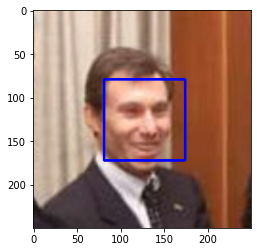

In [22]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [23]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__
    - 99% of the first 100 images in `human_files` have a detected human face.
    - 10% of the first 100 images in `dog_files` have a detected human face.

In [24]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.

detected_face_human = 0
detected_face_dog = 0

for human_img in human_files_short:
    if face_detector(human_img):
        detected_face_human += 1

for dog_img in dog_files_short:
    if face_detector(dog_img):
        detected_face_dog += 1

print("{0:.0%}".format(detected_face_human/100))
print("{0:.0%}".format(detected_face_dog/100))

100%
10%


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

__Answer:__ After testing performance of the multi-task convolutional neural network face detection (MTCNN) algorithm, these were the results:
    - 100% of the first 100 images in `human_files` have a detected human face.
    - 16% of the first 100 images in `dog_files` have a detected human face.
The previous implementation of OpenCV already achieved very high face detection in human images (99%) and at marginal rates in dog images (10%). The MTCNN implementation, although at 100% for human face detection, detects faces in more dog images (up 6%). Model performance, however, needs to be weighed against needed functionality. For instance, in a national security application there might be a requirement not to miss any images containing human faces, and in that scenario the MTCNN would be better suited to the task.

> Kaipeng Zhang, Zhanpeng Zhang, Zhifeng Li, and Yu Qiao. [Joint Face Detection and Alignment Using Multi-task Cascaded Convolutional Networks](https://kpzhang93.github.io/MTCNN_face_detection_alignment). In _IEEE Signal Processing Letters_, 2016.

In [47]:
import mtcnn

### (Optional) 
### DONE: Test performance of another face detection algorithm.
### Feel free to use as many code cells as needed.

# returns "True" if face is detected in image stored at img_path
def face_detector_deep_learning(img_path):
    
    # load image from file
    pixels = plt.imread(img_path)
    
    # create the detector, using default weights
    detector = MTCNN()
    
    # detect faces in the image
    faces = detector.detect_faces(pixels)
    
    return len(faces) > 0

In [48]:
human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## DONE: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.

detected_face_human = 0
detected_face_dog = 0

for human_img in human_files_short:
    if face_detector_deep_learning(human_img):
        detected_face_human += 1

for dog_img in dog_files_short:
    if face_detector_deep_learning(dog_img):
        detected_face_dog += 1

print(detected_face_human/100)
print(detected_face_dog/100)

1.0
0.16


---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [46]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /Users/supearnesh/.cache/torch/checkpoints/vgg16-397923af.pth


KeyboardInterrupt: 

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [ ]:
from PIL import Image
import torchvision.transforms as transforms

# Set PIL to be tolerant of image files that are truncated.
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    return None # predicted class index

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [ ]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    
    return None # true/false

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 


In [ ]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [ ]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="img/Brittany_02625.jpg" width="100"> | <img src="img/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="img/Curly-coated_retriever_03896.jpg" width="200"> | <img src="img/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="img/Labrador_retriever_06457.jpg" width="150"> | <img src="img/Labrador_retriever_06455.jpg" width="240"> | <img src="img/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [ ]:
import os
from torchvision import datasets

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes


**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
    
    def forward(self, x):
        ## Define forward behavior
        return x

#-#-# You do NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [ ]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = None

### TODO: select optimizer
optimizer_scratch = None

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [ ]:
# the following import is required for training to be robust to truncated images
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss

            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
            
    # return trained model
    return model


# train the model
model_scratch = train(100, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [ ]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [ ]:
## TODO: Specify data loaders


### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [ ]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 


if use_cuda:
    model_transfer = model_transfer.cuda()

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [ ]:
criterion_transfer = None
optimizer_transfer = None

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [ ]:
# train the model
model_transfer = # train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
#model_transfer.load_state_dict(torch.load('model_transfer.pt'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [ ]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [ ]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in data_transfer['train'].classes]

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    return None

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `dog_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](img/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [ ]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    


---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)

In [ ]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((human_files[:3], dog_files[:3])):
    run_app(file)